# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample:

* Emerging markets: Brazil (^BVSP), Russia (IMOEX.ME), India (^BSESN), Chile (^IPSA), Mexico (^MXX), China (^HSCE)

* Developed markets: Canada (^GSPTSE), France (^FCHI), Germany (^GDAXI), Japan (^N225), UK (^FTSE), USA (^GSPC)

In [ ]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [ ]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [ ]:
getSymbols(c("^BVSP", "IMOEX.ME", "^BSESN", "^IPSA", "^MXX", "^HSCE", 
             "^GSPTSE", "^FCHI", "^GDAXI", "^N225", "^FTSE", "^GSPC"), 
           from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^BVSP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“IMOEX.ME contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^BSESN contains missing values. Some functions will not work if objects contain missing values in the midd

[1] "^BVSP"    "IMOEX.ME" "^BSESN"   "^IPSA"    "^MXX"     "^HSCE"   
 [7] "^GSPTSE"  "^FCHI"    "^GDAXI"   "^N225"    "^FTSE"    "^GSPC"

**Checking data frequency**

In [ ]:
# Brazil
periodicity(BVSP)        

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
# Russia
periodicity(IMOEX.ME)     

Daily periodicity from 2013-03-05 to 2021-05-28 

In [ ]:
# India
periodicity(BSESN)

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
# Chile 
periodicity(IPSA)        

Daily periodicity from 2002-01-02 to 2021-05-28 

In [ ]:
# Mexico 
periodicity(MXX)         

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
 # China
periodicity(HSCE)        

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
# Canada
periodicity(GSPTSE)     

Daily periodicity from 2000-01-04 to 2021-05-28 

In [ ]:
# France
periodicity(FCHI)       

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
# Germany
periodicity(GDAXI)      

Daily periodicity from 2000-01-03 to 2021-05-28 

In [ ]:
# Japan
periodicity(N225)       

Daily periodicity from 2000-01-04 to 2021-05-31 

In [ ]:
# UK 
periodicity(FTSE)       

Daily periodicity from 2000-01-04 to 2021-05-28 

In [ ]:
# USA
periodicity(GSPC)       

Daily periodicity from 2000-01-03 to 2021-05-28 

**Identifying missing values (%)**

In [ ]:
# Brazil
round(prop.table(table(is.na(BVSP)))*100, digits = 2)       


FALSE  TRUE 
98.35  1.65 

In [ ]:
# Russia
round(prop.table(table(is.na(IMOEX.ME)))*100, digits = 2)   


FALSE  TRUE 
98.16  1.84 

In [ ]:
# India
round(prop.table(table(is.na(BSESN)))*100, digits = 2)


FALSE  TRUE 
98.34  1.66 

In [ ]:
# Chile
round(prop.table(table(is.na(IPSA)))*100, digits = 2)       


FALSE  TRUE 
88.55 11.45 

In [ ]:
# Mexico
round(prop.table(table(is.na(MXX)))*100, digits = 2)        


FALSE  TRUE 
98.66  1.34 

In [ ]:
# China
round(prop.table(table(is.na(HSCE)))*100, digits = 2)       


FALSE  TRUE 
97.67  2.33 

In [ ]:
# Canada
round(prop.table(table(is.na(GSPTSE)))*100, digits = 2)     


FALSE  TRUE 
99.17  0.83 

In [ ]:
# France
round(prop.table(table(is.na(FCHI)))*100, digits = 2)       


FALSE  TRUE 
99.35  0.65 

In [ ]:
# Germany
round(prop.table(table(is.na(GDAXI)))*100, digits = 2)      


FALSE  TRUE 
99.21  0.79 

In [ ]:
# Japan
round(prop.table(table(is.na(N225)))*100, digits = 2)       


FALSE  TRUE 
97.71  2.29 

In [ ]:
# UK
round(prop.table(table(is.na(FTSE)))*100, digits = 2)       


FALSE  TRUE 
98.83  1.17 

In [ ]:
# USA
round(prop.table(table(is.na(GSPC)))*100, digits = 2)       


FALSE 
  100 

**Removing missing values**

In [ ]:
# Brazil
BVSP <- na.omit(BVSP)    
round(prop.table(table(is.na(BVSP)))*100, digits = 2)         


FALSE 
  100 

In [ ]:
# Russia
IMOEX.ME <- na.omit(IMOEX.ME) 
round(prop.table(table(is.na(IMOEX.ME)))*100, digits = 2)    


FALSE 
  100 

In [ ]:
# India
BSESN <- na.omit(BSESN)  
round(prop.table(table(is.na(BSESN)))*100, digits = 2)         


FALSE 
  100 

In [ ]:
# Chile
IPSA <- na.omit(IPSA)        
round(prop.table(table(is.na(IPSA)))*100, digits = 2)     


FALSE 
  100 

In [ ]:
# Mexico
MXX <- na.omit(MXX)  
round(prop.table(table(is.na(MXX)))*100, digits = 2)             


FALSE 
  100 

In [ ]:
# China
HSCE <- na.omit(HSCE)   
round(prop.table(table(is.na(HSCE)))*100, digits = 2)          


FALSE 
  100 

In [ ]:
# Canada
GSPTSE <- na.omit(GSPTSE)        
round(prop.table(table(is.na(GSPTSE)))*100, digits = 2) 


FALSE 
  100 

In [ ]:
# France
GDAXI <- na.omit(GDAXI)  
round(prop.table(table(is.na(FCHI)))*100, digits = 2)         


FALSE  TRUE 
99.35  0.65 

In [ ]:
# Germany
FCHI <- na.omit(FCHI) 
round(prop.table(table(is.na(GDAXI)))*100, digits = 2)            


FALSE 
  100 

In [ ]:
# Japan
N225 <- na.omit(N225)  
round(prop.table(table(is.na(N225)))*100, digits = 2)           


FALSE 
  100 

In [ ]:
# UK
FTSE <- na.omit(FTSE) 
round(prop.table(table(is.na(FTSE)))*100, digits = 2)            


FALSE 
  100 

In [ ]:
# USA
GSPC <- na.omit(GSPC) 
round(prop.table(table(is.na(GSPC)))*100, digits = 2)                


FALSE 
  100 

**Removing unnecessary features**

In [ ]:
# Brazil
BVSP.df <- BVSP[,'BVSP.Close']                              
head(BVSP.df)

           BVSP.Close
2000-01-03      16930
2000-01-04      15851
2000-01-05      16245
2000-01-06      16107
2000-01-07      16309
2000-01-10      17022

In [ ]:
# Russia
IMOEX.ME.df <- IMOEX.ME[,'IMOEX.ME.Close']                 
head(IMOEX.ME.df)

           IMOEX.ME.Close
2013-03-05        1486.42
2013-03-06        1491.49
2013-03-07        1491.35
2013-03-11        1505.93
2013-03-12        1499.74
2013-03-13        1495.88

In [ ]:
# India 
BSESN.df <- BSESN[,'BSESN.Close']                          
head(BSESN.df)

           BSESN.Close
2000-01-03     5375.11
2000-01-04     5491.01
2000-01-05     5357.00
2000-01-06     5421.53
2000-01-07     5414.48
2000-01-10     5518.39

In [ ]:
# Chile
IPSA.df <- IPSA[,'IPSA.Close']                              
head(IPSA.df)

           IPSA.Close
2002-01-02    1185.75
2002-01-03    1195.93
2002-01-04    1203.38
2002-01-07    1188.95
2002-01-08    1168.01
2002-01-09    1148.13

In [ ]:
# Mexico
MXX.df <- MXX[,'MXX.Close']                                 
head(MXX.df)

           MXX.Close
2000-01-03   7077.71
2000-01-04   6675.27
2000-01-05   6764.31
2000-01-06   6751.65
2000-01-07   7047.09
2000-01-10   7333.70

In [ ]:
# China
HSCE.df <- HSCE[,'HSCE.Close']                              
head(HSCE.df)

           HSCE.Close
2000-01-03    1999.99
2000-01-04    2082.93
2000-01-05    1956.57
2000-01-06    1904.20
2000-01-07    2004.51
2000-01-10    2061.00

In [ ]:
# Canada 
GSPTSE.df <- GSPTSE[,'GSPTSE.Close']                       
head(GSPTSE.df)

           GSPTSE.Close
2000-01-04       8202.6
2000-01-05       8119.4
2000-01-06       8114.2
2000-01-07       8429.4
2000-01-10       8602.5
2000-01-11       8442.6

In [ ]:
# France
FCHI.df <- FCHI[,'FCHI.Close']                              
head(FCHI.df)

           FCHI.Close
2000-01-03    5917.37
2000-01-04    5672.02
2000-01-05    5479.70
2000-01-06    5450.11
2000-01-07    5539.61
2000-01-10    5646.12

In [ ]:
# Germany
GDAXI.df <- GDAXI[,'GDAXI.Close']                           
head(GDAXI.df)

           GDAXI.Close
2000-01-03     6750.76
2000-01-04     6586.95
2000-01-05     6502.07
2000-01-06     6474.92
2000-01-07     6780.96
2000-01-10     6925.52

In [ ]:
# Japan 
N225.df <- N225[,'N225.Close']                             
head(N225.df)

           N225.Close
2000-01-04   19002.86
2000-01-05   18542.55
2000-01-06   18168.27
2000-01-07   18193.41
2000-01-11   18850.92
2000-01-12   18677.42

In [ ]:
# UK
FTSE.df <- FTSE[,'FTSE.Close']                              
head(FTSE.df)

           FTSE.Close
2000-01-04     6665.9
2000-01-05     6535.9
2000-01-06     6447.2
2000-01-07     6504.8
2000-01-10     6607.7
2000-01-11     6518.9

In [ ]:
# USA
GSPC.df <- GSPC[,'GSPC.Close']                              
head(GSPC.df)

           GSPC.Close
2000-01-03    1455.22
2000-01-04    1399.42
2000-01-05    1402.11
2000-01-06    1403.45
2000-01-07    1441.47
2000-01-10    1457.60

**Calculating log-returns**

In [ ]:
# Brazil
return1 <- log(BVSP.df$BVSP.Close/Lag(BVSP.df$BVSP.Close, 1))*100                     
head(return1)

           BVSP.Close
2000-01-03         NA
2000-01-04 -6.5854606
2000-01-05  2.4552579
2000-01-06 -0.8531209
2000-01-07  1.2463143
2000-01-10  4.2789522

In [ ]:
# Russia
return2 <- log(IMOEX.ME.df$IMOEX.ME.Close/Lag(IMOEX.ME.df$IMOEX.ME.Close, 1))*100     
head(return2)

           IMOEX.ME.Close
2013-03-05             NA
2013-03-06    0.340503967
2013-03-07   -0.009387966
2013-03-11    0.972894949
2013-03-12   -0.411893033
2013-03-13   -0.257708731

In [ ]:
# India
return3 <- log(BSESN.df$BSESN.Close/Lag(BSESN.df$BSESN.Close, 1))*100                 
head(return3)

           BSESN.Close
2000-01-03          NA
2000-01-04   2.1333153
2000-01-05  -2.4708050
2000-01-06   1.1973907
2000-01-07  -0.1301181
2000-01-10   1.9009333

In [ ]:
# Chile
return4 <- log(IPSA.df$IPSA.Close/Lag(IPSA.df$IPSA.Close, 1))*100                     
head(return4)

           IPSA.Close
2002-01-02         NA
2002-01-03  0.8548685
2002-01-04  0.6210098
2002-01-07 -1.2063745
2002-01-08 -1.7769069
2002-01-09 -1.7166918

In [ ]:
# Mexico
return5 <- log(MXX.df$MXX.Close/Lag(MXX.df$MXX.Close, 1))*100                         
head(return5)

            MXX.Close
2000-01-03         NA
2000-01-04 -5.8540748
2000-01-05  1.3250614
2000-01-06 -0.1873365
2000-01-07  4.2827839
2000-01-10  3.9865447

In [ ]:
# China
return6 <- log(HSCE.df$HSCE.Close/Lag(HSCE.df$HSCE.Close, 1))*100                     
head(return6)

           HSCE.Close
2000-01-03         NA
2000-01-04   4.063335
2000-01-05  -6.258261
2000-01-06  -2.713097
2000-01-07   5.133770
2000-01-10   2.779166

In [ ]:
# Canada
return7 <- log(GSPTSE.df$GSPTSE.Close/Lag(GSPTSE.df$GSPTSE.Close, 1))*100             
head(return7)

           GSPTSE.Close
2000-01-04           NA
2000-01-05  -1.01948818
2000-01-06  -0.06406105
2000-01-07   3.81100042
2000-01-10   2.03272172
2000-01-11  -1.87625870

In [ ]:
# France
return8 <- log(FCHI.df$FCHI.Close/Lag(FCHI.df$FCHI.Close, 1))*100                     
head(return8)

           FCHI.Close
2000-01-03         NA
2000-01-04 -4.2346794
2000-01-05 -3.4494928
2000-01-06 -0.5414624
2000-01-07  1.6288310
2000-01-10  1.9044528

In [ ]:
# Germany
return9 <- log(GDAXI.df$GDAXI.Close/Lag(GDAXI.df$GDAXI.Close, 1))*100                 
head(return9)

           GDAXI.Close
2000-01-03          NA
2000-01-04   -2.456461
2000-01-05   -1.296989
2000-01-06   -0.418432
2000-01-07    4.618244
2000-01-10    2.109446

In [ ]:
# Japan
return10 <- log(N225.df$N225.Close/Lag(N225.df$N225.Close, 1))*100                    
head(return10)

           N225.Close
2000-01-04         NA
2000-01-05 -2.4521328
2000-01-06 -2.0391493
2000-01-07  0.1382809
2000-01-11  3.5502266
2000-01-12 -0.9246411

In [ ]:
# UK
return11 <- log(FTSE.df$FTSE.Close/Lag(FTSE.df$FTSE.Close, 1))*100                    
head(return11)

           FTSE.Close
2000-01-04         NA
2000-01-05 -1.9694921
2000-01-06 -1.3664084
2000-01-07  0.8894378
2000-01-10  1.5695329
2000-01-11 -1.3530030

In [ ]:
# USA
return12 <- log(GSPC.df$GSPC.Close/Lag(GSPC.df$GSPC.Close, 1))*100                    
head(return12)

            GSPC.Close
2000-01-03          NA
2000-01-04 -3.90991755
2000-01-05  0.19203377
2000-01-06  0.09552219
2000-01-07  2.67299501
2000-01-10  1.11278250

**Aggregating the data**

In [ ]:
# Brazil
BVSP.df$BVSP.Return <- return1                  
BVSP.df <- na.omit(BVSP.df)
head(BVSP.df)

           BVSP.Close BVSP.Return
2000-01-04      15851  -6.5854606
2000-01-05      16245   2.4552579
2000-01-06      16107  -0.8531209
2000-01-07      16309   1.2463143
2000-01-10      17022   4.2789522
2000-01-11      16573  -2.6731760

In [ ]:
# Russia
IMOEX.ME.df$IMOEX.ME.Return <- return2          
IMOEX.ME.df <- na.omit(IMOEX.ME.df)
head(IMOEX.ME.df)

           IMOEX.ME.Close IMOEX.ME.Return
2013-03-06        1491.49     0.340503967
2013-03-07        1491.35    -0.009387966
2013-03-11        1505.93     0.972894949
2013-03-12        1499.74    -0.411893033
2013-03-13        1495.88    -0.257708731
2013-03-14        1502.52     0.442904602

In [ ]:
# India
BSESN.df$BSESN.Return <- return3                
BSESN.df <- na.omit(BSESN.df)
head(BSESN.df)

           BSESN.Close BSESN.Return
2000-01-04     5491.01    2.1333153
2000-01-05     5357.00   -2.4708050
2000-01-06     5421.53    1.1973907
2000-01-07     5414.48   -0.1301181
2000-01-10     5518.39    1.9009333
2000-01-11     5296.30   -4.1077749

In [ ]:
# Chile
IPSA.df$IPSA.Return <- return4                  
IPSA.df <- na.omit(IPSA.df)
head(IPSA.df)

           IPSA.Close IPSA.Return
2002-01-03    1195.93   0.8548685
2002-01-04    1203.38   0.6210098
2002-01-07    1188.95  -1.2063745
2002-01-08    1168.01  -1.7769069
2002-01-09    1148.13  -1.7166918
2002-01-10    1152.04   0.3399781

In [ ]:
# Mexico
MXX.df$MXX.Return <- return5                    
MXX.df <- na.omit(MXX.df)
head(MXX.df)

           MXX.Close MXX.Return
2000-01-04   6675.27 -5.8540748
2000-01-05   6764.31  1.3250614
2000-01-06   6751.65 -0.1873365
2000-01-07   7047.09  4.2827839
2000-01-10   7333.70  3.9865447
2000-01-11   7143.13 -2.6329151

In [ ]:
# China
HSCE.df$HSCE.Return <- return6                  
HSCE.df <- na.omit(HSCE.df)
head(HSCE.df)

           HSCE.Close HSCE.Return
2000-01-04    2082.93    4.063335
2000-01-05    1956.57   -6.258261
2000-01-06    1904.20   -2.713097
2000-01-07    2004.51    5.133770
2000-01-10    2061.00    2.779166
2000-01-11    1996.30   -3.189581

In [ ]:
# Canada
GSPTSE.df$GSPTSE.Return <- return7              
GSPTSE.df <- na.omit(GSPTSE.df)
head(GSPTSE.df)

           GSPTSE.Close GSPTSE.Return
2000-01-05       8119.4   -1.01948818
2000-01-06       8114.2   -0.06406105
2000-01-07       8429.4    3.81100042
2000-01-10       8602.5    2.03272172
2000-01-11       8442.6   -1.87625870
2000-01-12       8360.0   -0.98318446

In [ ]:
# France
FCHI.df$FCHI.Return <- return8                  
FCHI.df <- na.omit(FCHI.df)
head(FCHI.df)

           FCHI.Close FCHI.Return
2000-01-04    5672.02  -4.2346794
2000-01-05    5479.70  -3.4494928
2000-01-06    5450.11  -0.5414624
2000-01-07    5539.61   1.6288310
2000-01-10    5646.12   1.9044528
2000-01-11    5613.90  -0.5722957

In [ ]:
# Germany
GDAXI.df$GDAXI.Return <- return9                
GDAXI.df <- na.omit(GDAXI.df)
head(GDAXI.df)

           GDAXI.Close GDAXI.Return
2000-01-04     6586.95   -2.4564608
2000-01-05     6502.07   -1.2969888
2000-01-06     6474.92   -0.4184320
2000-01-07     6780.96    4.6182439
2000-01-10     6925.52    2.1094463
2000-01-11     6891.25   -0.4960651

In [ ]:
# Japan
N225.df$N225.Return <- return10                 
N225.df <- na.omit(N225.df)
head(N225.df)

           N225.Close N225.Return
2000-01-05   18542.55  -2.4521328
2000-01-06   18168.27  -2.0391493
2000-01-07   18193.41   0.1382809
2000-01-11   18850.92   3.5502266
2000-01-12   18677.42  -0.9246411
2000-01-13   18833.29   0.8310695

In [ ]:
# UK
FTSE.df$FTSE.Return <- return11                 
FTSE.df <- na.omit(FTSE.df)
head(FTSE.df)

           FTSE.Close FTSE.Return
2000-01-05     6535.9  -1.9694921
2000-01-06     6447.2  -1.3664084
2000-01-07     6504.8   0.8894378
2000-01-10     6607.7   1.5695329
2000-01-11     6518.9  -1.3530030
2000-01-12     6532.8   0.2129977

In [ ]:
# USA 
GSPC.df$GSPC.Return <- return12                 
GSPC.df <- na.omit(GSPC.df)
head(GSPC.df)

           GSPC.Close GSPC.Return
2000-01-04    1399.42 -3.90991755
2000-01-05    1402.11  0.19203377
2000-01-06    1403.45  0.09552219
2000-01-07    1441.47  2.67299501
2000-01-10    1457.60  1.11278250
2000-01-11    1438.56 -1.31485768

**Identifying missing values (%)**

In [ ]:
# Brazil
round(prop.table(table(is.na(BVSP.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# Russia
round(prop.table(table(is.na(IMOEX.ME.df)))*100, digits = 2)    


FALSE 
  100 

In [ ]:
# India
round(prop.table(table(is.na(BSESN.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# Chile
round(prop.table(table(is.na(IPSA.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# Mexico
round(prop.table(table(is.na(MXX.df)))*100, digits = 2)        


FALSE 
  100 

In [ ]:
# China 
round(prop.table(table(is.na(HSCE.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# Canada
round(prop.table(table(is.na(GSPTSE.df)))*100, digits = 2)     


FALSE 
  100 

In [ ]:
# France 
round(prop.table(table(is.na(FCHI.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# Germany 
round(prop.table(table(is.na(GDAXI.df)))*100, digits = 2)      


FALSE 
  100 

In [ ]:
# Japan 
round(prop.table(table(is.na(N225.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# UK 
round(prop.table(table(is.na(FTSE.df)))*100, digits = 2)       


FALSE 
  100 

In [ ]:
# USA 
round(prop.table(table(is.na(GSPC.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [ ]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Prices chart**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to au

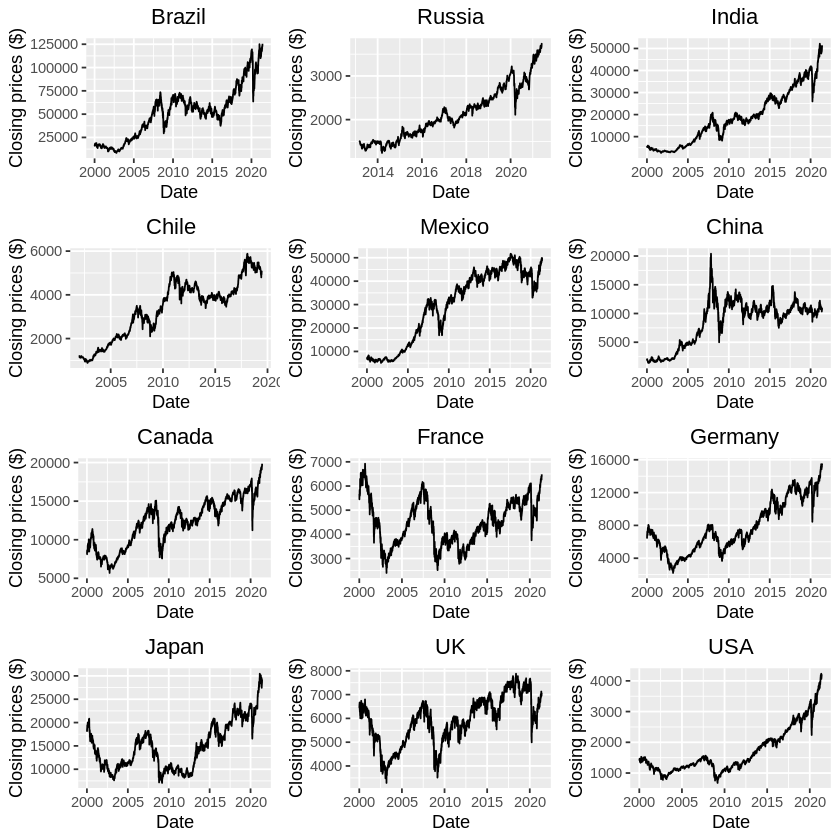

In [ ]:
# Brazil
graph1.1 <- ggplot(BVSP.df, 
                   aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Close'])) +
            geom_line(color = "black") +
            ggtitle("Brazil") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Russia
graph1.2 <- ggplot(IMOEX.ME.df, 
                   aes(x = index(IMOEX.ME.df), y = IMOEX.ME.df[,'IMOEX.ME.Close'])) +
            geom_line(color = "black") +
            ggtitle("Russia") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# India
graph1.3 <- ggplot(BSESN.df, 
                   aes(x = index(BSESN.df), y = BSESN.df[,'BSESN.Close'])) +
            geom_line(color = "black") +
            ggtitle("India") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Chile
graph1.4 <- ggplot(IPSA.df, 
                   aes(x = index(IPSA.df), y = IPSA.df[,'IPSA.Close'])) +
            geom_line(color = "black") +
            ggtitle("Chile") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Mexico
graph1.5 <- ggplot(MXX.df, 
                   aes(x = index(MXX.df), y = MXX.df[,'MXX.Close'])) +
            geom_line(color = "black") +
            ggtitle("Mexico") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# China
graph1.6 <- ggplot(HSCE.df, 
                   aes(x = index(HSCE.df), y = HSCE.df[,'HSCE.Close'])) +
            geom_line(color = "black") +
            ggtitle("China") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Canada
graph1.7 <- ggplot(GSPTSE.df, 
                   aes(x = index(GSPTSE.df), y = GSPTSE.df[,'GSPTSE.Close'])) +
            geom_line(color = "black") +
            ggtitle("Canada") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# France
graph1.8 <- ggplot(FCHI.df, 
                   aes(x = index(FCHI.df), y = FCHI.df[,'FCHI.Close'])) +
            geom_line(color = "black") +
            ggtitle("France") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Germany
graph1.9 <- ggplot(GDAXI.df, 
                   aes(x = index(GDAXI.df), y = GDAXI.df[,'GDAXI.Close'])) +
            geom_line(color = "black") +
            ggtitle("Germany") +
            xlab("Date") +
            ylab("Closing prices ($)") +
            theme(plot.title = element_text(hjust = 0.5))

# Japan
graph1.10 <- ggplot(N225.df, 
                    aes(x = index(N225.df), y = N225.df[,'N225.Close'])) +
             geom_line(color = "black") +
             ggtitle("Japan") +
             xlab("Date") +
             ylab("Closing prices ($)") +
             theme(plot.title = element_text(hjust = 0.5))

# UK
graph1.11 <- ggplot(FTSE.df, 
                    aes(x = index(FTSE.df), y = FTSE.df[,'FTSE.Close'])) +
             geom_line(color = "black") +
             ggtitle("UK") +
             xlab("Date") +
             ylab("Closing prices ($)") +
             theme(plot.title = element_text(hjust = 0.5))

# USA
graph1.12 <- ggplot(GSPC.df, 
                    aes(x = index(GSPC.df), y = GSPC.df[,'GSPC.Close'])) +
             geom_line(color = "black") +
             ggtitle("USA") +
             xlab("Date") +
             ylab("Closing prices ($)") +
             theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1.1, graph1.2, graph1.3, graph1.4, graph1.5, graph1.6,
             graph1.7, graph1.8, graph1.9, graph1.10, graph1.11, graph1.12,
             ncol = 3, nrow = 4)

**Return graphs**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to au

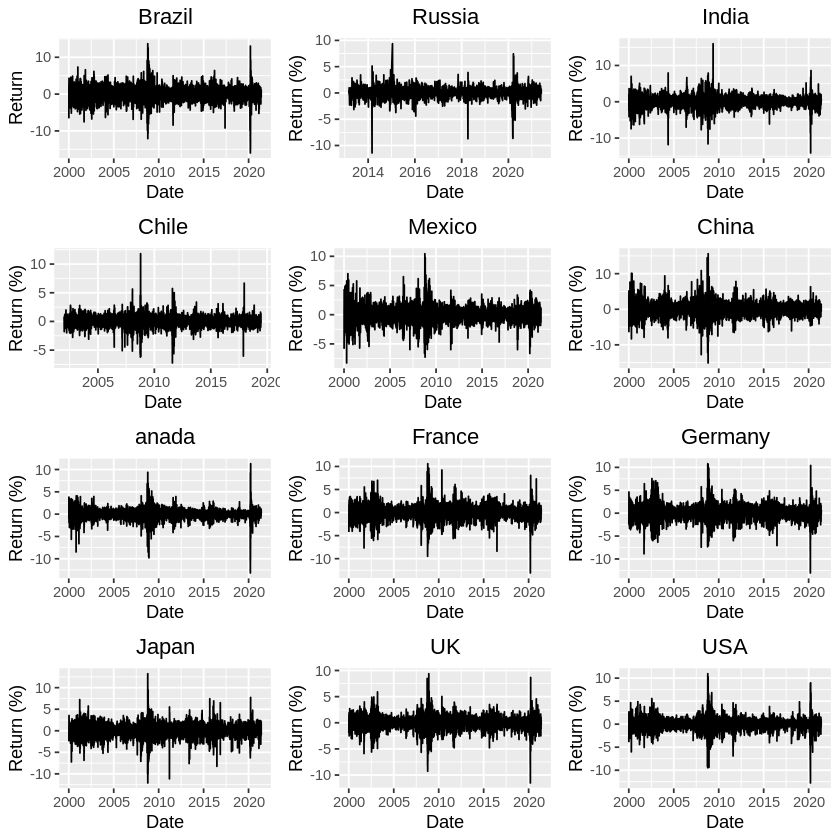

In [ ]:
# Brazil
graph2.1 <- ggplot(BVSP.df, 
                   aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Return'])) +
            geom_line(color = "black") +
            ggtitle("Brazil") +
            xlab("Date") +
            ylab("Return") +
            theme(plot.title = element_text(hjust = 0.5))

# Russia
graph2.2 <- ggplot(IMOEX.ME.df, 
                   aes(x = index(IMOEX.ME.df), y = IMOEX.ME.df[,'IMOEX.ME.Return'])) +
            geom_line(color = "black") +
            ggtitle("Russia") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# India
graph2.3 <- ggplot(BSESN.df, 
                   aes(x = index(BSESN.df), y = BSESN.df[,'BSESN.Return'])) +
            geom_line(color = "black") +
            ggtitle("India") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# Chile
graph2.4 <- ggplot(IPSA.df, 
                   aes(x = index(IPSA.df), y = IPSA.df[,'IPSA.Return'])) +
            geom_line(color = "black") +
            ggtitle("Chile") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# Mexico
graph2.5 <- ggplot(MXX.df, 
                   aes(x = index(MXX.df), y = MXX.df[,'MXX.Return'])) +
            geom_line(color = "black") +
            ggtitle("Mexico") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# China
graph2.6 <- ggplot(HSCE.df, 
                   aes(x = index(HSCE.df), y = HSCE.df[,'HSCE.Return'])) +
            geom_line(color = "black") +
            ggtitle("China") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# Canada
graph2.7 <- ggplot(GSPTSE.df, 
                   aes(x = index(GSPTSE.df), y = GSPTSE.df[,'GSPTSE.Return'])) +
            geom_line(color = "black") +
            ggtitle("anada") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# France
graph2.8 <- ggplot(FCHI.df, 
                   aes(x = index(FCHI.df), y = FCHI.df[,'FCHI.Return'])) +
            geom_line(color = "black") +
            ggtitle("France") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# Germany
graph2.9 <- ggplot(GDAXI.df, 
                   aes(x = index(GDAXI.df), y = GDAXI.df[,'GDAXI.Return'])) +
            geom_line(color = "black") +
            ggtitle("Germany") +
            xlab("Date") +
            ylab("Return (%)") +
            theme(plot.title = element_text(hjust = 0.5))

# Japan
graph2.10 <- ggplot(N225.df, 
                    aes(x = index(N225.df), y = N225.df[,'N225.Return'])) +
             geom_line(color = "black") +
             ggtitle("Japan") +
             xlab("Date") +
             ylab("Return (%)") +
             theme(plot.title = element_text(hjust = 0.5))

# UK
graph2.11 <- ggplot(FTSE.df, 
                    aes(x = index(FTSE.df), y = FTSE.df[,'FTSE.Return'])) +
             geom_line(color = "black") +
             ggtitle("UK") +
             xlab("Date") +
             ylab("Return (%)") +
             theme(plot.title = element_text(hjust = 0.5))

# USA
graph2.12 <- ggplot(GSPC.df, 
                    aes(x = index(GSPC.df), y = GSPC.df[,'GSPC.Return'])) +
             geom_line(color = "black") +
             ggtitle("USA") +
             xlab("Date") +
             ylab("Return (%)") +
             theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph2.1, graph2.2, graph2.3, graph2.4, graph2.5, graph2.6,
             graph2.7, graph2.8, graph2.9, graph2.10, graph2.11, graph2.12,
             ncol = 3, nrow = 4)

## 3. Descriptive statistic

In [ ]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Brazil**

In [ ]:
# mean
round(mean(BVSP.df$BVSP.Return), 5)                         

[1] 0.03786

In [ ]:
# sd
round(sd(BVSP.df$BVSP.Return), 5)                           

[1] 1.81042

In [ ]:
# skewness
round(skewness(BVSP.df$BVSP.Return), 5)                     

BVSP.Return 
   -0.36745

In [ ]:
# kurtosis
round(kurtosis(BVSP.df$BVSP.Return), 5)                     

BVSP.Return 
    9.53491

In [ ]:
# min
round(min(BVSP.df$BVSP.Return), 5)                          

[1] -15.99303

In [ ]:
# p5
round(quantile(BVSP.df$BVSP.Return, probs = 0.05), 5)       

5% 
-2.82133

In [ ]:
# p25
round(quantile(BVSP.df$BVSP.Return, probs = 0.25), 5)       

25% 
-0.92456

In [ ]:
# median
round(median(BVSP.df$BVSP.Return), 5)                       

[1] 0.07572

In [ ]:
# p75
round(quantile(BVSP.df$BVSP.Return, probs = 0.75), 5)       

75% 
1.07521

In [ ]:
# p95
round(quantile(BVSP.df$BVSP.Return, probs = 0.95), 5)       

95% 
2.67623

In [ ]:
# max
round(max(BVSP.df$BVSP.Return), 5)                          

[1] 13.67661

In [ ]:
# n observations
length(BVSP.df$BVSP.Return)                                 

[1] 5292

**Russia**

In [ ]:
# mean
round(mean(IMOEX.ME.df$IMOEX.ME.Return), 5)                         

[1] 0.04542

In [ ]:
# sd
round(sd(IMOEX.ME.df$IMOEX.ME.Return), 5)                           

[1] 1.17503

In [ ]:
# skewness
round(skewness(IMOEX.ME.df$IMOEX.ME.Return), 5)                     

IMOEX.ME.Return 
       -0.66222

In [ ]:
# kurtosis
round(kurtosis(IMOEX.ME.df$IMOEX.ME.Return), 5)                     

IMOEX.ME.Return 
       15.32385

In [ ]:
# min
round(min(IMOEX.ME.df$IMOEX.ME.Return), 5)                          

[1] -11.41892

In [ ]:
# p5
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.05), 5)       

5% 
-1.67556

In [ ]:
# p25
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.25), 5)       

25% 
-0.56428

In [ ]:
# median
round(median(IMOEX.ME.df$IMOEX.ME.Return), 5)                       

[1] 0.05013

In [ ]:
# p75
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.75), 5)       

75% 
0.6907

In [ ]:
# p95
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.95), 5)       

95% 
1.76039

In [ ]:
# max
round(max(IMOEX.ME.df$IMOEX.ME.Return), 5)                          

[1] 9.36696

In [ ]:
# n observations
length(IMOEX.ME.df$IMOEX.ME.Return)                                 

[1] 2026

**India**

In [ ]:
# mean
round(mean(BSESN.df$BSESN.Return), 5)                         

[1] 0.04287

In [ ]:
# sd
round(sd(BSESN.df$BSESN.Return), 5)                           

[1] 1.4715

In [ ]:
# skewness
round(skewness(BSESN.df$BSESN.Return), 5)                     

BSESN.Return 
    -0.37438

In [ ]:
# kurtosis
round(kurtosis(BSESN.df$BSESN.Return), 5)                     

BSESN.Return 
    12.12326

In [ ]:
# min
round(min(BSESN.df$BSESN.Return), 5)                          

[1] -14.10174

In [ ]:
# p5
round(quantile(BSESN.df$BSESN.Return, probs = 0.05), 5)       

5% 
-2.22485

In [ ]:
# p25
round(quantile(BSESN.df$BSESN.Return, probs = 0.25), 5)       

25% 
-0.62364

In [ ]:
# median
round(median(BSESN.df$BSESN.Return), 5)                       

[1] 0.0919

In [ ]:
# p75
round(quantile(BSESN.df$BSESN.Return, probs = 0.75), 5)       

75% 
0.76859

In [ ]:
# p95
round(quantile(BSESN.df$BSESN.Return, probs = 0.95), 5)       

95% 
2.1326

In [ ]:
# max
round(max(BSESN.df$BSESN.Return), 5)                          

[1] 15.98998

In [ ]:
# n observations
length(BSESN.df$BSESN.Return)                                 

[1] 5268

**Chile**

In [ ]:
# mean
round(mean(IPSA.df$IPSA.Return), 5)                         

[1] 0.03339

In [ ]:
# sd
round(sd(IPSA.df$IPSA.Return), 5)                           

[1] 0.96232

In [ ]:
# skewness
round(skewness(IPSA.df$IPSA.Return), 5)                     

IPSA.Return 
    0.02869

In [ ]:
# kurtosis
round(kurtosis(IPSA.df$IPSA.Return), 5)                     

IPSA.Return 
   13.33454

In [ ]:
# min
round(min(IPSA.df$IPSA.Return), 5)                          

[1] -7.23628

In [ ]:
# p5
round(quantile(IPSA.df$IPSA.Return, probs = 0.05), 5)       

5% 
-1.43174

In [ ]:
# p25
round(quantile(IPSA.df$IPSA.Return, probs = 0.25), 5)       

25% 
-0.45455

In [ ]:
# median
round(median(IPSA.df$IPSA.Return), 5)                       

[1] 0.04515

In [ ]:
# p75
round(quantile(IPSA.df$IPSA.Return, probs = 0.75), 5)       

75% 
0.54722

In [ ]:
# p95
round(quantile(IPSA.df$IPSA.Return, probs = 0.95), 5)       

95% 
1.44489

In [ ]:
# max
round(max(IPSA.df$IPSA.Return), 5)                          

[1] 11.80337

In [ ]:
# n observations
length(IPSA.df$IPSA.Return)                                 

[1] 4345

**Mexico**

In [ ]:
# mean
round(mean(MXX.df$MXX.Return), 5)                         

[1] 0.03644

In [ ]:
# sd
round(sd(MXX.df$MXX.Return), 5)                           

[1] 1.27774

In [ ]:
# skewness
round(skewness(MXX.df$MXX.Return), 5)                     

MXX.Return 
  -0.05174

In [ ]:
# kurtosis
round(kurtosis(MXX.df$MXX.Return), 5)                     

MXX.Return 
   8.17677

In [ ]:
# min
round(min(MXX.df$MXX.Return), 5)                          

[1] -8.26734

In [ ]:
# p5
round(quantile(MXX.df$MXX.Return, probs = 0.05), 5)       

5% 
-1.98797

In [ ]:
# p25
round(quantile(MXX.df$MXX.Return, probs = 0.25), 5)       

25% 
-0.5813

In [ ]:
# median
round(median(MXX.df$MXX.Return), 5)                       

[1] 0.06041

In [ ]:
# p75 
round(quantile(MXX.df$MXX.Return, probs = 0.75), 5)       

75% 
0.68617

In [ ]:
# p95
round(quantile(MXX.df$MXX.Return, probs = 0.95), 5)       

95% 
1.9432

In [ ]:
# max
round(max(MXX.df$MXX.Return), 5)                          

[1] 10.44071

In [ ]:
# n observations
length(MXX.df$MXX.Return)                                 

[1] 5367

**China**

In [ ]:
# mean
round(mean(HSCE.df$HSCE.Return), 5)                         

[1] 0.03223

In [ ]:
# sd
round(sd(HSCE.df$HSCE.Return), 5)                           

[1] 1.88967

In [ ]:
# skewness
round(skewness(HSCE.df$HSCE.Return), 5)                     

HSCE.Return 
    0.07225

In [ ]:
# kurtosis
round(kurtosis(HSCE.df$HSCE.Return), 5)                     

HSCE.Return 
    9.16024

In [ ]:
# min
round(min(HSCE.df$HSCE.Return), 5)                          

[1] -15.08731

In [ ]:
# p5
round(quantile(HSCE.df$HSCE.Return, probs = 0.05), 5)       

5% 
-2.92682

In [ ]:
# p25
round(quantile(HSCE.df$HSCE.Return, probs = 0.25), 5)       

25% 
-0.88086

In [ ]:
# median
round(median(HSCE.df$HSCE.Return), 5)                       

[1] 0.05038

In [ ]:
# p75
round(quantile(HSCE.df$HSCE.Return, probs = 0.75), 5)       

75% 
1.01238

In [ ]:
# p95
round(quantile(HSCE.df$HSCE.Return, probs = 0.95), 5)       

95% 
2.8014

In [ ]:
# max
round(max(HSCE.df$HSCE.Return), 5)                          

[1] 15.60564

In [ ]:
# n obserrvations
length(HSCE.df$HSCE.Return)

[1] 5230

**Canada**

In [ ]:
# mean
round(mean(GSPTSE.df$GSPTSE.Return), 5)                         

[1] 0.01644

In [ ]:
# sd
round(sd(GSPTSE.df$GSPTSE.Return), 5)                           

[1] 1.13031

In [ ]:
# skewness
round(skewness(GSPTSE.df$GSPTSE.Return), 5)                     

GSPTSE.Return 
      -0.9446

In [ ]:
# kurtosis
round(kurtosis(GSPTSE.df$GSPTSE.Return), 5)                      

GSPTSE.Return 
     19.87724

In [ ]:
# min
round(min(GSPTSE.df$GSPTSE.Return), 5)                          

[1] -13.1758

In [ ]:
# p5
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.05), 5)       

5% 
-1.68443

In [ ]:
# p25
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.25), 5)       

25% 
-0.43725

In [ ]:
# median
round(median(GSPTSE.df$GSPTSE.Return), 5)                       

[1] 0.07124

In [ ]:
# p75
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.75), 5)       

75% 
0.54763

In [ ]:
# p95
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.95), 5)       

95% 
1.48435

In [ ]:
# max
round(max(GSPTSE.df$GSPTSE.Return), 5)                          

[1] 11.29453

In [ ]:
# n observations
length(GSPTSE.df$GSPTSE.Return)

[1] 5377

**France**

In [ ]:
# mean
round(mean(FCHI.df$FCHI.Return), 5)                         

[1] 0.00167

In [ ]:
# sd
round(sd(FCHI.df$FCHI.Return), 5)                           

[1] 1.4369

In [ ]:
# skewness
round(skewness(FCHI.df$FCHI.Return), 5)                     

FCHI.Return 
   -0.20591

In [ ]:
# kurtosis
round(kurtosis(FCHI.df$FCHI.Return), 5)                     

FCHI.Return 
    9.38356

In [ ]:
# min
round(min(FCHI.df$FCHI.Return), 5)                          

[1] -13.09835

In [ ]:
# p5
round(quantile(FCHI.df$FCHI.Return, probs = 0.05), 5)       

5% 
-2.26946

In [ ]:
# p25
round(quantile(FCHI.df$FCHI.Return, probs = 0.25), 5)

25% 
-0.65317

In [ ]:
# median
round(median(FCHI.df$FCHI.Return), 5)                       

[1] 0.03977

In [ ]:
# p75
round(quantile(FCHI.df$FCHI.Return, probs = 0.75), 5)       

75% 
0.71368

In [ ]:
# p95
round(quantile(FCHI.df$FCHI.Return, probs = 0.95), 5)       

95% 
2.09744

In [ ]:
# max
round(max(FCHI.df$FCHI.Return), 5)                          

[1] 10.59459

In [ ]:
# n observations
length(FCHI.df$FCHI.Return)                                 

[1] 5466

**Germany**

In [ ]:
# mean
round(mean(GDAXI.df$GDAXI.Return), 5)                         

[1] 0.01534

In [ ]:
# sd
round(sd(GDAXI.df$GDAXI.Return), 5)                           

[1] 1.48328

In [ ]:
# skewness
round(skewness(GDAXI.df$GDAXI.Return), 5)                     

GDAXI.Return 
    -0.17302

In [ ]:
# kurtosis
round(kurtosis(GDAXI.df$GDAXI.Return), 5)                     

GDAXI.Return 
     8.79813

In [ ]:
# min
round(min(GDAXI.df$GDAXI.Return), 5)                          

[1] -13.05486

In [ ]:
# p5
round(quantile(GDAXI.df$GDAXI.Return, probs = 0.05), 5)       

5% 
-2.37929

In [ ]:
# p25
round(quantile(GDAXI.df$GDAXI.Return, probs = 0.25), 5)       

25% 
-0.65918

In [ ]:
# median
round(median(GDAXI.df$GDAXI.Return), 5)                       

[1] 0.07618

In [ ]:
# p75
round(quantile(GDAXI.df$GDAXI.Return, probs = 0.75), 5)       

75% 
0.74307

In [ ]:
# p95
round(quantile(GDAXI.df$GDAXI.Return, probs = 0.95), 5)       

95% 
2.241

In [ ]:
# max
round(max(GDAXI.df$GDAXI.Return), 5)                          

[1] 10.79747

In [ ]:
# n observations
length(GDAXI.df$GDAXI.Return)                                 

[1] 5428

**Japan**

In [ ]:
# mean
round(mean(N225.df$N225.Return), 5)                         

[1] 0.00797

In [ ]:
# sd
round(sd(N225.df$N225.Return), 5)                           

[1] 1.48828

In [ ]:
# skewness
round(skewness(N225.df$N225.Return), 5)                     

N225.Return 
   -0.38761

In [ ]:
# kurtosis
round(kurtosis(N225.df$N225.Return), 5)                     

N225.Return 
     9.3293

In [ ]:
# min
round(min(N225.df$N225.Return), 5)                          

[1] -12.11102

In [ ]:
# p5
round(quantile(N225.df$N225.Return, probs = 0.05), 5)       

5% 
-2.34001

In [ ]:
# p25
round(quantile(N225.df$N225.Return, probs = 0.25), 5)

25% 
-0.70387

In [ ]:
# median
round(median(N225.df$N225.Return), 5)                       

[1] 0.0432

In [ ]:
# p75
round(quantile(N225.df$N225.Return, probs = 0.75), 5)       

75% 
0.8023

In [ ]:
# p95
round(quantile(N225.df$N225.Return, probs = 0.95), 5)       

95% 
2.20438

In [ ]:
# max
round(max(N225.df$N225.Return), 5)                          

[1] 13.23459

In [ ]:
# n observations
length(N225.df$N225.Return)

[1] 5243

**UK**

In [ ]:
# mean
round(mean(FTSE.df$FTSE.Return), 5)                         

[1] 0.00097

In [ ]:
# sd
round(sd(FTSE.df$FTSE.Return), 5)                           

[1] 1.19615

In [ ]:
# skewness
round(skewness(FTSE.df$FTSE.Return), 5)                     

FTSE.Return 
   -0.32269

In [ ]:
# kurtosis
round(kurtosis(FTSE.df$FTSE.Return), 5)                     

FTSE.Return 
   10.81436

In [ ]:
# min
round(min(FTSE.df$FTSE.Return), 5)                          

[1] -11.51171

In [ ]:
# p5
round(quantile(FTSE.df$FTSE.Return, probs = 0.05), 5)       

5% 
-1.88314

In [ ]:
# p25
round(quantile(FTSE.df$FTSE.Return, probs = 0.25), 5)       

25% 
-0.54465

In [ ]:
# median
round(median(FTSE.df$FTSE.Return), 5)                       

[1] 0.03889

In [ ]:
# p75
round(quantile(FTSE.df$FTSE.Return, probs = 0.75), 5)       

75% 
0.59124

In [ ]:
# p95
round(quantile(FTSE.df$FTSE.Return, probs = 0.95), 5)       

95% 
1.79078

In [ ]:
# max
round(max(FTSE.df$FTSE.Return), 5)                          

[1] 9.38424

In [ ]:
# n observations
length(FTSE.df$FTSE.Return)                                 

[1] 5393

**USA**

In [ ]:
# mean
round(mean(GSPC.df$GSPC.Return), 5)                         

[1] 0.0197

In [ ]:
# sd
round(sd(GSPC.df$GSPC.Return), 5)                           

[1] 1.2497

In [ ]:
# skewness
round(skewness(GSPC.df$GSPC.Return), 5)                     

GSPC.Return 
   -0.39642

In [ ]:
# kurtosis
round(kurtosis(GSPC.df$GSPC.Return), 5)                     

GSPC.Return 
   13.94551

In [ ]:
# min
round(min(GSPC.df$GSPC.Return), 5)                          

[1] -12.76522

In [ ]:
# p5
round(quantile(GSPC.df$GSPC.Return, probs = 0.05), 5)       

5% 
-1.91186

In [ ]:
# p25
round(quantile(GSPC.df$GSPC.Return, probs = 0.25), 5)       

25% 
-0.47482

In [ ]:
# median
round(median(GSPC.df$GSPC.Return), 5)                       

[1] 0.06024

In [ ]:
# p75
round(quantile(GSPC.df$GSPC.Return, probs = 0.75), 5)       

75% 
0.58227

In [ ]:
# p95
round(quantile(GSPC.df$GSPC.Return, probs = 0.95), 5)       

95% 
1.70371

In [ ]:
# max
round(max(GSPC.df$GSPC.Return), 5)                          

[1] 10.9572

In [ ]:
# n observations
length(GSPC.df$GSPC.Return)

[1] 5385

## 4. Series normality analysis

In [ ]:
# Package
library(tseries)

In [ ]:
# Brazil
jarque.bera.test(BVSP.df$BVSP.Return)


	Jarque Bera Test

data:  BVSP.df$BVSP.Return
X-squared = 9535.5, df = 2, p-value < 2.2e-16


In [ ]:
# Russia
jarque.bera.test(IMOEX.ME.df$IMOEX.ME.Return)  


	Jarque Bera Test

data:  IMOEX.ME.df$IMOEX.ME.Return
X-squared = 12969, df = 2, p-value < 2.2e-16


In [ ]:
# India
jarque.bera.test(BSESN.df$BSESN.Return)


	Jarque Bera Test

data:  BSESN.df$BSESN.Return
X-squared = 18393, df = 2, p-value < 2.2e-16


In [ ]:
# Chile
jarque.bera.test(IPSA.df$IPSA.Return)    


	Jarque Bera Test

data:  IPSA.df$IPSA.Return
X-squared = 19336, df = 2, p-value < 2.2e-16


In [ ]:
# Mexico
jarque.bera.test(MXX.df$MXX.Return)


	Jarque Bera Test

data:  MXX.df$MXX.Return
X-squared = 5995.3, df = 2, p-value < 2.2e-16


In [ ]:
# China
jarque.bera.test(HSCE.df$HSCE.Return) 


	Jarque Bera Test

data:  HSCE.df$HSCE.Return
X-squared = 8274.2, df = 2, p-value < 2.2e-16


In [ ]:
# Canada
jarque.bera.test(GSPTSE.df$GSPTSE.Return)


	Jarque Bera Test

data:  GSPTSE.df$GSPTSE.Return
X-squared = 64616, df = 2, p-value < 2.2e-16


In [ ]:
# France
jarque.bera.test(FCHI.df$FCHI.Return)


	Jarque Bera Test

data:  FCHI.df$FCHI.Return
X-squared = 9319.4, df = 2, p-value < 2.2e-16


In [ ]:
# Germany
jarque.bera.test(GDAXI.df$GDAXI.Return)


	Jarque Bera Test

data:  GDAXI.df$GDAXI.Return
X-squared = 7630.4, df = 2, p-value < 2.2e-16


In [ ]:
# Japan
jarque.bera.test(N225.df$N225.Return)


	Jarque Bera Test

data:  N225.df$N225.Return
X-squared = 8882.7, df = 2, p-value < 2.2e-16


In [ ]:
# UK
jarque.bera.test(FTSE.df$FTSE.Return) 


	Jarque Bera Test

data:  FTSE.df$FTSE.Return
X-squared = 13815, df = 2, p-value < 2.2e-16


In [ ]:
# USA
jarque.bera.test(GSPC.df$GSPC.Return)


	Jarque Bera Test

data:  GSPC.df$GSPC.Return
X-squared = 27022, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [ ]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

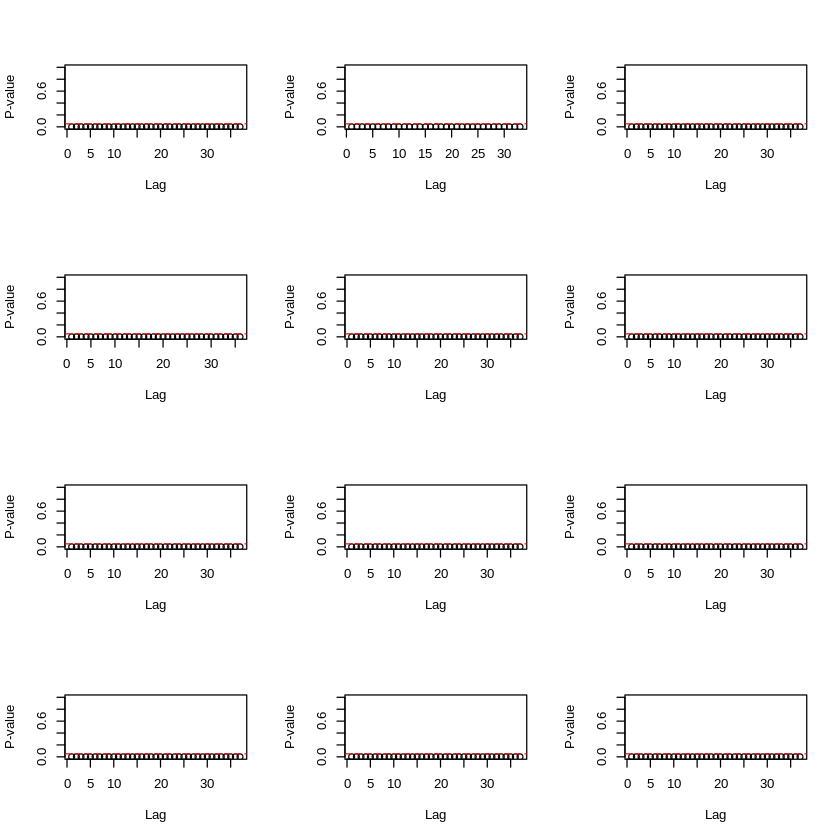

In [ ]:
par(mfrow=c(4,3))

# Brazil
McLeod.Li.test(y = BVSP.df$BVSP.Return)
# p-valor < 1% => ARCH effect

# Russia
McLeod.Li.test(y = IMOEX.ME.df$IMOEX.ME.Return)
# p-valor < 1% => ARCH effect

# India
McLeod.Li.test(y = BSESN.df$BSESN.Return)
# p-valor < 1% => ARCH effect

# Chile
McLeod.Li.test(y = IPSA.df$IPSA.Return)
# p-valor < 1% => ARCH effect

# Mexico
McLeod.Li.test(y = MXX.df$MXX.Return)
# p-valor < 1% => ARCH effect

# China
McLeod.Li.test(y = MXX.df$MXX.Return)
# p-valor < 1% => ARCH effect

# Canada
McLeod.Li.test(y = HSCE.df$HSCE.Return)
# p-valor < 1% => ARCH effect

# France
McLeod.Li.test(y = FCHI.df$FCHI.Return)
# p-valor < 1% => ARCH effect

# Germany
McLeod.Li.test(y = GDAXI.df$GDAXI.Return)
# p-valor < 1% => ARCH effect

# Japan
McLeod.Li.test(y = N225.df$N225.Return)
# p-valor < 1% => ARCH effect

# UK
McLeod.Li.test(y = FTSE.df$FTSE.Return)
# p-valor < 1% => ARCH effect

# USA
McLeod.Li.test(y = GSPC.df$GSPC.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [ ]:
# Brazil
ArchTest(BVSP.df$BVSP.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BVSP.df$BVSP.Return
Chi-squared = 1501.7, df = 12, p-value < 2.2e-16


In [ ]:
# Russia
ArchTest(IMOEX.ME.df$IMOEX.ME.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  IMOEX.ME.df$IMOEX.ME.Return
Chi-squared = 154.68, df = 12, p-value < 2.2e-16


In [ ]:
# India
ArchTest(BSESN.df$BSESN.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BSESN.df$BSESN.Return
Chi-squared = 753.94, df = 12, p-value < 2.2e-16


In [ ]:
# Chile
ArchTest(IPSA.df$IPSA.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  IPSA.df$IPSA.Return
Chi-squared = 755.48, df = 12, p-value < 2.2e-16


In [ ]:
# Mexico
ArchTest(MXX.df$MXX.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  MXX.df$MXX.Return
Chi-squared = 891.22, df = 12, p-value < 2.2e-16


In [ ]:
# China
ArchTest(HSCE.df$HSCE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  HSCE.df$HSCE.Return
Chi-squared = 1168.4, df = 12, p-value < 2.2e-16


In [ ]:
# Canada
ArchTest(GSPTSE.df$GSPTSE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GSPTSE.df$GSPTSE.Return
Chi-squared = 1514.9, df = 12, p-value < 2.2e-16


In [ ]:
# France
ArchTest(FCHI.df$FCHI.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  FCHI.df$FCHI.Return
Chi-squared = 937.07, df = 12, p-value < 2.2e-16


In [ ]:
# Germany
ArchTest(GDAXI.df$GDAXI.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GDAXI.df$GDAXI.Return
Chi-squared = 980.14, df = 12, p-value < 2.2e-16


In [ ]:
# Japan
ArchTest(N225.df$N225.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  N225.df$N225.Return
Chi-squared = 1173.7, df = 12, p-value < 2.2e-16


In [ ]:
# UK
ArchTest(FTSE.df$FTSE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  FTSE.df$FTSE.Return
Chi-squared = 1139.7, df = 12, p-value < 2.2e-16


In [ ]:
# USA
ArchTest(GSPC.df$GSPC.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GSPC.df$GSPC.Return
Chi-squared = 1614, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [ ]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [ ]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [ ]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Brazil
garch.fit1 <- ugarchfit(spec = garch.spec, data = BVSP.df$BVSP.Return)
round(garch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0624,0.0205,3.0436,0.0023
omega,0.0670,0.0117,5.7170,0.0000
alpha1,0.0741,0.0070,10.6042,0.0000
beta1,0.9028,0.0091,98.8926,0.0000
skew,0.8982,0.0162,55.3967,0.0000


In [ ]:
# Russia
garch.fit2 <- ugarchfit(spec = garch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(garch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0559,0.0226,2.4694,0.0135
omega,0.0669,0.0160,4.1830,0.0000
alpha1,0.0935,0.0153,6.1088,0.0000
beta1,0.8570,0.0229,37.4653,0.0000
skew,0.8652,0.0228,37.9160,0.0000


In [ ]:
# India
garch.fit3 <- ugarchfit(spec = garch.spec, data = BSESN.df$BSESN.Return)
round(garch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0798,0.0141,5.6564,0
omega,0.0246,0.0045,5.4566,0
alpha1,0.1038,0.0082,12.6681,0
beta1,0.8858,0.0086,103.0126,0
skew,0.9022,0.0154,58.5254,0


In [ ]:
# Chile
garch.fit4 <- ugarchfit(spec = garch.spec, data = IPSA.df$IPSA.Return)
round(garch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0507,0.0115,4.4147,0
omega,0.0292,0.0050,5.8163,0
alpha1,0.1436,0.0136,10.5587,0
beta1,0.8251,0.0160,51.4573,0
skew,0.9250,0.0182,50.8673,0


In [ ]:
# Mexico
garch.fit5 <- ugarchfit(spec = garch.spec, data = MXX.df$MXX.Return)
round(garch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0461,0.0129,3.5677,4e-04
omega,0.0154,0.0032,4.8158,0e+00
alpha1,0.0841,0.0074,11.3408,0e+00
beta1,0.9071,0.0079,114.1787,0e+00
skew,0.8956,0.0152,58.9336,0e+00


In [ ]:
# China
garch.fit6 <- ugarchfit(spec = garch.spec, data = HSCE.df$HSCE.Return)
round(garch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0469,0.0195,2.4077,0.0161
omega,0.0289,0.0067,4.3383,0.0000
alpha1,0.0677,0.0074,9.1853,0.0000
beta1,0.9234,0.0084,110.0363,0.0000
skew,0.9698,0.0165,58.6398,0.0000


In [ ]:
# Canada
garch.fit7 <- ugarchfit(spec = garch.spec, data = GSPTSE.df$GSPTSE.Return)
round(garch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0398,0.0092,4.3098,0
omega,0.0083,0.0016,5.0791,0
alpha1,0.1026,0.0078,13.1296,0
beta1,0.8904,0.0079,112.9356,0
skew,0.7924,0.0146,54.4370,0


In [ ]:
# France
garch.fit8 <- ugarchfit(spec = garch.spec, data = FCHI.df$FCHI.Return)
round(garch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0448,0.0135,3.3242,9e-04
omega,0.0234,0.0041,5.7730,0e+00
alpha1,0.1032,0.0088,11.6705,0e+00
beta1,0.8862,0.0092,95.9052,0e+00
skew,0.8890,0.0150,59.3199,0e+00


In [ ]:
# Germany
garch.fit9 <- ugarchfit(spec = garch.spec, data = GDAXI.df$GDAXI.Return)
round(garch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0583,0.0142,4.0959,0
omega,0.0241,0.0041,5.9350,0
alpha1,0.0899,0.0076,11.7525,0
beta1,0.8977,0.0083,107.9846,0
skew,0.8911,0.0148,60.0317,0


In [ ]:
# Japan
garch.fit10 <- ugarchfit(spec = garch.spec, data = N225.df$N225.Return)
round(garch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0444,0.0160,2.7827,0.0054
omega,0.0442,0.0075,5.8849,0.0000
alpha1,0.1093,0.0091,12.0211,0.0000
beta1,0.8717,0.0103,84.2403,0.0000
skew,0.8795,0.0154,56.9599,0.0000


In [ ]:
# UK
garch.fit11 <- ugarchfit(spec = garch.spec, data = FTSE.df$FTSE.Return)
round(garch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0277,0.0110,2.5205,0.0117
omega,0.0180,0.0032,5.7039,0.0000
alpha1,0.1096,0.0097,11.2536,0.0000
beta1,0.8766,0.0106,82.6499,0.0000
skew,0.8803,0.0154,57.0217,0.0000


In [ ]:
# USA
garch.fit12 <- ugarchfit(spec = garch.spec, data = GSPC.df$GSPC.Return)
round(garch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0509,0.0107,4.7756,0
omega,0.0206,0.0028,7.3417,0
alpha1,0.1216,0.0093,13.0908,0
beta1,0.8627,0.0096,90.0286,0
skew,0.8510,0.0143,59.3819,0


**Extracting variance series from the Linear GARCH model**

In [ ]:
# Brazil
var.garch1 <- ts(garch.fit1@fit$sigma^2)
head(var.garch1)

BVSP.df$BVSP.VolGARCH <- as.numeric(var.garch1)
head(BVSP.df)

[1] 3.277609 6.298761 6.177523 5.706156 5.322318 6.188571

           BVSP.Close BVSP.Return BVSP.VolGARCH
2000-01-04      15851  -6.5854606      3.277609
2000-01-05      16245   2.4552579      6.298761
2000-01-06      16107  -0.8531209      6.177523
2000-01-07      16309   1.2463143      5.706156
2000-01-10      17022   4.2789522      5.322318
2000-01-11      16573  -2.6731760      6.188571

In [ ]:
# Russia
var.garch2 <- ts(garch.fit2@fit$sigma^2)
head(var.garch2)

IMOEX.ME.df$IMOEX.ME.VolGARCH <- as.numeric(var.garch2)
head(IMOEX.ME.df)

[1] 1.3801311 1.2572619 1.1447826 1.1266210 1.0528805 0.9784195

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH
2013-03-06        1491.49     0.340503967         1.3801311
2013-03-07        1491.35    -0.009387966         1.2572619
2013-03-11        1505.93     0.972894949         1.1447826
2013-03-12        1499.74    -0.411893033         1.1266210
2013-03-13        1495.88    -0.257708731         1.0528805
2013-03-14        1502.52     0.442904602         0.9784195

In [ ]:
# India
var.garch3 <- ts(garch.fit3@fit$sigma^2)
head(var.garch3)

BSESN.df$BSESN.VolGARCH <- as.numeric(var.garch3)
head(BSESN.df)

[1] 2.166259 2.381375 2.809551 2.643061 2.370466 2.468778

           BSESN.Close BSESN.Return BSESN.VolGARCH
2000-01-04     5491.01    2.1333153       2.166259
2000-01-05     5357.00   -2.4708050       2.381375
2000-01-06     5421.53    1.1973907       2.809551
2000-01-07     5414.48   -0.1301181       2.643061
2000-01-10     5518.39    1.9009333       2.370466
2000-01-11     5296.30   -4.1077749       2.468778

In [ ]:
# Chile
var.garch4 <- ts(garch.fit4@fit$sigma^2)
head(var.garch4)

IPSA.df$IPSA.VolGARCH <- as.numeric(var.garch4)
head(IPSA.df)

[1] 0.9261441 0.8861994 0.8070974 0.9219910 1.2694330 1.5250164

           IPSA.Close IPSA.Return IPSA.VolGARCH
2002-01-03    1195.93   0.8548685     0.9261441
2002-01-04    1203.38   0.6210098     0.8861994
2002-01-07    1188.95  -1.2063745     0.8070974
2002-01-08    1168.01  -1.7769069     0.9219910
2002-01-09    1148.13  -1.7166918     1.2694330
2002-01-10    1152.04   0.3399781     1.5250164

In [ ]:
# Mexico
var.garch5 <- ts(garch.fit5@fit$sigma^2)
head(var.garch5)

MXX.df$MXX.VolGARCH <- as.numeric(var.garch5)
head(MXX.df)

[1] 1.632403 4.423465 4.165572 3.798674 4.970572 5.829942

           MXX.Close MXX.Return MXX.VolGARCH
2000-01-04   6675.27 -5.8540748     1.632403
2000-01-05   6764.31  1.3250614     4.423465
2000-01-06   6751.65 -0.1873365     4.165572
2000-01-07   7047.09  4.2827839     3.798674
2000-01-10   7333.70  3.9865447     4.970572
2000-01-11   7143.13 -2.6329151     5.829942

In [ ]:
# China
var.garch6 <- ts(garch.fit6@fit$sigma^2)
head(var.garch6)

HSCE.df$HSCE.VolGARCH <- as.numeric(var.garch6)
head(HSCE.df)

[1] 3.570397 4.418573 6.801911 6.826031 8.084936 8.000468

           HSCE.Close HSCE.Return HSCE.VolGARCH
2000-01-04    2082.93    4.063335      3.570397
2000-01-05    1956.57   -6.258261      4.418573
2000-01-06    1904.20   -2.713097      6.801911
2000-01-07    2004.51    5.133770      6.826031
2000-01-10    2061.00    2.779166      8.084936
2000-01-11    1996.30   -3.189581      8.000468

In [ ]:
# Canada
var.garch7 <- ts(garch.fit7@fit$sigma^2)
head(var.garch7)

GSPTSE.df$GSPTSE.VolGARCH <- as.numeric(var.garch7)
head(GSPTSE.df)

[1] 1.277901 1.261229 1.132384 2.475374 2.619771 2.717546

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH
2000-01-05       8119.4   -1.01948818        1.277901
2000-01-06       8114.2   -0.06406105        1.261229
2000-01-07       8429.4    3.81100042        1.132384
2000-01-10       8602.5    2.03272172        2.475374
2000-01-11       8442.6   -1.87625870        2.619771
2000-01-12       8360.0   -0.98318446        2.717546

In [ ]:
# France
var.garch8 <- ts(garch.fit8@fit$sigma^2)
head(var.garch8)

FCHI.df$FCHI.VolGARCH <- as.numeric(var.garch8)
head(FCHI.df)

[1] 2.066153 3.744785 4.602261 4.137226 3.948640 3.879494

           FCHI.Close FCHI.Return FCHI.VolGARCH
2000-01-04    5672.02  -4.2346794      2.066153
2000-01-05    5479.70  -3.4494928      3.744785
2000-01-06    5450.11  -0.5414624      4.602261
2000-01-07    5539.61   1.6288310      4.137226
2000-01-10    5646.12   1.9044528      3.948640
2000-01-11    5613.90  -0.5722957      3.879494

In [ ]:
# Germany
var.garch9 <- ts(garch.fit9@fit$sigma^2)
head(var.garch9)

GDAXI.df$GDAXI.VolGARCH <- as.numeric(var.garch9)
head(GDAXI.df)

[1] 2.201554 2.568852 2.495182 2.284362 3.943878 3.942566

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH
2000-01-04     6586.95   -2.4564608       2.201554
2000-01-05     6502.07   -1.2969888       2.568852
2000-01-06     6474.92   -0.4184320       2.495182
2000-01-07     6780.96    4.6182439       2.284362
2000-01-10     6925.52    2.1094463       3.943878
2000-01-11     6891.25   -0.4960651       3.942566

In [ ]:
# Japan
var.garch10 <- ts(garch.fit10@fit$sigma^2)
head(var.garch10)

N225.df$N225.VolGARCH <- as.numeric(var.garch10)
head(N225.df)

[1] 2.215884 2.657107 2.834981 2.516488 3.581336 3.268783

           N225.Close N225.Return N225.VolGARCH
2000-01-05   18542.55  -2.4521328      2.215884
2000-01-06   18168.27  -2.0391493      2.657107
2000-01-07   18193.41   0.1382809      2.834981
2000-01-11   18850.92   3.5502266      2.516488
2000-01-12   18677.42  -0.9246411      3.581336
2000-01-13   18833.29   0.8310695      3.268783

In [ ]:
# UK
var.garch11 <- ts(garch.fit11@fit$sigma^2)
head(var.garch11)

FTSE.df$FTSE.VolGARCH <- as.numeric(var.garch11)
head(FTSE.df)

[1] 1.431234 1.709884 1.729926 1.615821 1.694996 1.712798

           FTSE.Close FTSE.Return FTSE.VolGARCH
2000-01-05     6535.9  -1.9694921      1.431234
2000-01-06     6447.2  -1.3664084      1.709884
2000-01-07     6504.8   0.8894378      1.729926
2000-01-10     6607.7   1.5695329      1.615821
2000-01-11     6518.9  -1.3530030      1.694996
2000-01-12     6532.8   0.2129977      1.712798

In [ ]:
# USA
var.garch12 <- ts(garch.fit12@fit$sigma^2)
head(var.garch12)

GSPC.df$GSPC.VolGARCH <- as.numeric(var.garch12)
head(GSPC.df)

[1] 1.562444 3.275383 2.848623 2.478283 2.994258 2.740737

           GSPC.Close GSPC.Return GSPC.VolGARCH
2000-01-04    1399.42 -3.90991755      1.562444
2000-01-05    1402.11  0.19203377      3.275383
2000-01-06    1403.45  0.09552219      2.848623
2000-01-07    1441.47  2.67299501      2.478283
2000-01-10    1457.60  1.11278250      2.994258
2000-01-11    1438.56 -1.31485768      2.740737

**EGARCH model**

In [ ]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Brazil
egarch.fit1 <- ugarchfit(spec = egarch.spec, data = BVSP.df$BVSP.Return)
round(egarch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0242,0.0206,1.1712,0.2415
omega,0.0286,0.0021,13.5055,0.0000
alpha1,-0.0789,0.0071,-11.0606,0.0000
beta1,0.9731,0.0008,1176.9478,0.0000
gamma1,0.1347,0.0109,12.3417,0.0000
skew,0.9035,0.0164,55.2487,0.0000


In [ ]:
# Russia
egarch.fit2 <- ugarchfit(spec = egarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(egarch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0400,0.0334,1.1997,0.2303
omega,0.0120,0.0051,2.3744,0.0176
alpha1,-0.0930,0.0135,-6.9072,0.0000
beta1,0.9588,0.0083,114.8396,0.0000
gamma1,0.1512,0.0216,6.9904,0.0000
skew,0.8894,0.0238,37.3476,0.0000


In [ ]:
# India
egarch.fit3 <- ugarchfit(spec = egarch.spec, data = BSESN.df$BSESN.Return)
round(egarch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0420,0.0136,3.0881,0.002
omega,0.0147,0.0023,6.4503,0.000
alpha1,-0.0816,0.0072,-11.2761,0.000
beta1,0.9771,0.0001,14819.8237,0.000
gamma1,0.2020,0.0007,283.9893,0.000
skew,0.9053,0.0156,58.2091,0.000


In [ ]:
# Chile
egarch.fit4 <- ugarchfit(spec = egarch.spec, data = IPSA.df$IPSA.Return)
round(egarch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0377,0.0115,3.2861,0.0010
omega,-0.0082,0.0037,-2.2496,0.0245
alpha1,-0.0564,0.0089,-6.3492,0.0000
beta1,0.9625,0.0061,158.2442,0.0000
gamma1,0.2410,0.0197,12.2252,0.0000
skew,0.9520,0.0188,50.6827,0.0000


In [ ]:
# Mexico
egarch.fit5 <- ugarchfit(spec = egarch.spec, data = MXX.df$MXX.Return)
round(egarch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0163,0.0110,1.4835,0.138
omega,0.0078,0.0018,4.4054,0.000
alpha1,-0.0800,0.0068,-11.6996,0.000
beta1,0.9847,0.0008,1232.3511,0.000
gamma1,0.1505,0.0111,13.6061,0.000
skew,0.8999,0.0154,58.2692,0.000


In [ ]:
# China
egarch.fit6 <- ugarchfit(spec = egarch.spec, data = HSCE.df$HSCE.Return)
round(egarch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0301,0.0195,1.5416,0.1232
omega,0.0175,0.0019,9.4612,0.0000
alpha1,-0.0191,0.0061,-3.1190,0.0018
beta1,0.9866,0.0010,1013.0106,0.0000
gamma1,0.1560,0.0141,11.0929,0.0000
skew,0.9793,0.0167,58.6910,0.0000


In [ ]:
# Canada
egarch.fit7 <- ugarchfit(spec = egarch.spec, data = GSPTSE.df$GSPTSE.Return)
round(egarch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0166,0.0081,2.0360,0.0418
omega,-0.0033,0.0019,-1.7167,0.0860
alpha1,-0.0990,0.0070,-14.2139,0.0000
beta1,0.9834,0.0008,1284.3050,0.0000
gamma1,0.1512,0.0104,14.4987,0.0000
skew,0.7897,0.0147,53.7248,0.0000


In [ ]:
# France
egarch.fit8 <- ugarchfit(spec = egarch.spec, data = FCHI.df$FCHI.Return)
round(egarch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0105,0.0120,-0.8767,0.3806
omega,0.0094,0.0022,4.3542,0.0000
alpha1,-0.1468,0.0072,-20.3409,0.0000
beta1,0.9794,0.0008,1222.9446,0.0000
gamma1,0.1063,0.0100,10.6834,0.0000
skew,0.8658,0.0150,57.6852,0.0000


In [ ]:
# Germany
egarch.fit9 <- ugarchfit(spec = egarch.spec, data = GDAXI.df$GDAXI.Return)
round(egarch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0058,0.0134,0.4316,0.666
omega,0.0122,0.0021,5.8414,0.000
alpha1,-0.1229,0.0068,-17.9892,0.000
beta1,0.9782,0.0008,1224.8263,0.000
gamma1,0.1185,0.0096,12.4012,0.000
skew,0.8766,0.0150,58.6125,0.000


In [ ]:
# Japan
egarch.fit10 <- ugarchfit(spec = egarch.spec, data = N225.df$N225.Return)
round(egarch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0061,0.0158,0.3887,0.6975
omega,0.0256,0.0038,6.7194,0.0000
alpha1,-0.1000,0.0091,-10.9347,0.0000
beta1,0.9623,0.0046,211.1707,0.0000
gamma1,0.1938,0.0138,14.0211,0.0000
skew,0.8894,0.0155,57.2574,0.0000


In [ ]:
# UK
egarch.fit11 <- ugarchfit(spec = egarch.spec, data = FTSE.df$FTSE.Return)
round(egarch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0142,0.0104,-1.3683,0.1712
omega,0.0013,0.0020,0.6538,0.5132
alpha1,-0.1252,0.0065,-19.2878,0.0000
beta1,0.9820,0.0008,1251.6418,0.0000
gamma1,0.1150,0.0105,10.9063,0.0000
skew,0.8598,0.0155,55.4027,0.0000


In [ ]:
# USA
egarch.fit12 <- ugarchfit(spec = egarch.spec, data = GSPC.df$GSPC.Return)
round(egarch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0093,0.0099,0.9381,0.3482
omega,0.0029,0.0025,1.1741,0.2404
alpha1,-0.1423,0.0071,-20.1072,0.0000
beta1,0.9732,0.0010,982.5144,0.0000
gamma1,0.1522,0.0107,14.1646,0.0000
skew,0.8256,0.0141,58.3881,0.0000


**Extracting variance series from the EGARCH model**

In [ ]:
# Brazil
var.egarch1 <- ts(egarch.fit1@fit$sigma^2)
head(var.egarch1)

BVSP.df$BVSP.VolEGARCH <- as.numeric(var.egarch1)
head(BVSP.df)

[1] 3.277192 6.399338 5.935152 5.645890 5.124696 5.032972

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192
2000-01-05      16245   2.4552579      6.298761       6.399338
2000-01-06      16107  -0.8531209      6.177523       5.935152
2000-01-07      16309   1.2463143      5.706156       5.645890
2000-01-10      17022   4.2789522      5.322318       5.124696
2000-01-11      16573  -2.6731760      6.188571       5.032972

In [ ]:
# Russia
var.egarch2 <- ts(egarch.fit2@fit$sigma^2)
head(var.egarch2)

IMOEX.ME.df$IMOEX.ME.VolEGARCH <- as.numeric(var.egarch2)
head(IMOEX.ME.df)

[1] 1.380051 1.239935 1.114465 1.047735 1.044846 1.004544

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544

In [ ]:
# India
var.egarch3 <- ts(egarch.fit3@fit$sigma^2)
head(var.egarch3)

BSESN.df$BSESN.VolEGARCH <- as.numeric(var.egarch3)
head(BSESN.df)

[1] 2.164897 2.179960 2.996571 2.734981 2.377325 2.327459

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459

In [ ]:
# Chile
var.egarch4 <- ts(egarch.fit4@fit$sigma^2)
head(var.egarch4)

IPSA.df$IPSA.VolEGARCH <- as.numeric(var.egarch4)
head(IPSA.df)

[1] 0.9258637 0.8887805 0.8188759 1.0160928 1.4193308 1.7761724

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724

In [ ]:
# Mexico
var.egarch5 <- ts(egarch.fit5@fit$sigma^2)
head(var.egarch5)

MXX.df$MXX.VolEGARCH <- as.numeric(var.egarch5)
head(MXX.df)

[1] 1.632716 4.175794 3.820384 3.426617 3.536260 3.598185

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716
2000-01-05   6764.31  1.3250614     4.423465      4.175794
2000-01-06   6751.65 -0.1873365     4.165572      3.820384
2000-01-07   7047.09  4.2827839     3.798674      3.426617
2000-01-10   7333.70  3.9865447     4.970572      3.536260
2000-01-11   7143.13 -2.6329151     5.829942      3.598185

In [ ]:
# China
var.egarch6 <- ts(egarch.fit6@fit$sigma^2)
head(var.egarch6)

HSCE.df$HSCE.VolEGARCH <- as.numeric(var.egarch6)
head(HSCE.df)

[1] 3.570186 4.224213 6.361614 6.745900 7.732180 7.739514

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186
2000-01-05    1956.57   -6.258261      4.418573       4.224213
2000-01-06    1904.20   -2.713097      6.801911       6.361614
2000-01-07    2004.51    5.133770      6.826031       6.745900
2000-01-10    2061.00    2.779166      8.084936       7.732180
2000-01-11    1996.30   -3.189581      8.000468       7.739514

In [ ]:
# Canada
var.egarch7 <- ts(egarch.fit7@fit$sigma^2)
head(var.egarch7)

GSPTSE.df$GSPTSE.VolEGARCH <- as.numeric(var.egarch7)
head(GSPTSE.df)

[1] 1.277354 1.413267 1.262294 1.324593 1.275902 1.706944

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944

In [ ]:
# France
var.egarch8 <- ts(egarch.fit8@fit$sigma^2)
head(var.egarch8)

FCHI.df$FCHI.VolEGARCH <- as.numeric(var.egarch8)
head(FCHI.df)

[1] 2.064440 3.968702 5.536609 5.247166 4.567961 3.959094

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440
2000-01-05    5479.70  -3.4494928      3.744785       3.968702
2000-01-06    5450.11  -0.5414624      4.602261       5.536609
2000-01-07    5539.61   1.6288310      4.137226       5.247166
2000-01-10    5646.12   1.9044528      3.948640       4.567961
2000-01-11    5613.90  -0.5722957      3.879494       3.959094

In [ ]:
# Germany
var.egarch9 <- ts(egarch.fit9@fit$sigma^2)
head(var.egarch9)

GDAXI.df$GDAXI.VolEGARCH <- as.numeric(var.egarch9)
head(GDAXI.df)

[1] 2.199800 2.972842 3.208279 3.049738 2.708921 2.427100

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100

In [ ]:
# Japan
var.egarch10 <- ts(egarch.fit10@fit$sigma^2)
head(var.egarch10)

N225.df$N225.VolEGARCH <- as.numeric(var.egarch10)
head(N225.df)

[1] 2.214560 3.068747 3.643429 3.069932 3.126832 3.072939

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560
2000-01-06   18168.27  -2.0391493      2.657107       3.068747
2000-01-07   18193.41   0.1382809      2.834981       3.643429
2000-01-11   18850.92   3.5502266      2.516488       3.069932
2000-01-12   18677.42  -0.9246411      3.581336       3.126832
2000-01-13   18833.29   0.8310695      3.268783       3.072939

In [ ]:
# UK
var.egarch11 <- ts(egarch.fit11@fit$sigma^2)
head(var.egarch11)

FTSE.df$FTSE.VolEGARCH <- as.numeric(var.egarch11)
head(FTSE.df)

[1] 1.430749 1.923120 2.194379 1.963975 1.751946 2.020005

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749
2000-01-06     6447.2  -1.3664084      1.709884       1.923120
2000-01-07     6504.8   0.8894378      1.729926       2.194379
2000-01-10     6607.7   1.5695329      1.615821       1.963975
2000-01-11     6518.9  -1.3530030      1.694996       1.751946
2000-01-12     6532.8   0.2129977      1.712798       2.020005

In [ ]:
# USA
var.egarch12 <- ts(egarch.fit12@fit$sigma^2)
head(var.egarch12)

GSPC.df$GSPC.VolEGARCH <- as.numeric(var.egarch12)
head(GSPC.df)

[1] 1.561579 3.450468 2.967254 2.560819 2.254439 1.973304

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579
2000-01-05    1402.11  0.19203377      3.275383       3.450468
2000-01-06    1403.45  0.09552219      2.848623       2.967254
2000-01-07    1441.47  2.67299501      2.478283       2.560819
2000-01-10    1457.60  1.11278250      2.994258       2.254439
2000-01-11    1438.56 -1.31485768      2.740737       1.973304

**GJR-GARCH model**

In [ ]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [ ]:
# Brazil
gjrgarch.fit1 <- ugarchfit(spec = gjrgarch.spec, data = BVSP.df$BVSP.Return)
round(gjrgarch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0295,0.0207,1.4268,0.1536
omega,0.0792,0.0123,6.4331,0.0000
alpha1,0.0177,0.0066,2.6719,0.0075
beta1,0.9045,0.0095,95.2275,0.0000
gamma1,0.0985,0.0125,7.8685,0.0000
skew,0.9031,0.0164,54.9798,0.0000


In [ ]:
# Russia
gjrgarch.fit2 <- ugarchfit(spec = gjrgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(gjrgarch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0396,0.0226,1.7546,0.0793
omega,0.0580,0.0126,4.6161,0.0000
alpha1,0.0290,0.0125,2.3125,0.0208
beta1,0.8766,0.0189,46.2781,0.0000
gamma1,0.1014,0.0206,4.9241,0.0000
skew,0.8763,0.0234,37.4615,0.0000


In [ ]:
# India
gjrgarch.fit3 <- ugarchfit(spec = gjrgarch.spec, data = BSESN.df$BSESN.Return)
round(gjrgarch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0511,0.0142,3.5883,3e-04
omega,0.0301,0.0047,6.3526,0e+00
alpha1,0.0444,0.0072,6.1650,0e+00
beta1,0.8851,0.0085,103.5595,0e+00
gamma1,0.1100,0.0133,8.2974,0e+00
skew,0.9098,0.0156,58.3990,0e+00


In [ ]:
# Chile
gjrgarch.fit4 <- ugarchfit(spec = gjrgarch.spec, data = IPSA.df$IPSA.Return)
round(gjrgarch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0374,0.0117,3.1998,0.0014
omega,0.0297,0.0046,6.4294,0.0000
alpha1,0.0782,0.0128,6.1290,0.0000
beta1,0.8383,0.0149,56.4413,0.0000
gamma1,0.0975,0.0158,6.1587,0.0000
skew,0.9415,0.0187,50.3178,0.0000


In [ ]:
# Mexico
gjrgarch.fit5 <- ugarchfit(spec = gjrgarch.spec, data = MXX.df$MXX.Return)
round(gjrgarch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0240,0.0130,1.8523,0.0640
omega,0.0170,0.0033,5.2113,0.0000
alpha1,0.0233,0.0063,3.7105,0.0002
beta1,0.9154,0.0083,110.8758,0.0000
gamma1,0.1010,0.0116,8.7316,0.0000
skew,0.9013,0.0156,57.8652,0.0000


In [ ]:
# China
gjrgarch.fit6 <- ugarchfit(spec = gjrgarch.spec, data = HSCE.df$HSCE.Return)
round(gjrgarch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0333,0.0199,1.6749,0.0940
omega,0.0333,0.0072,4.6013,0.0000
alpha1,0.0540,0.0072,7.4532,0.0000
beta1,0.9205,0.0087,106.1327,0.0000
gamma1,0.0299,0.0090,3.3139,0.0009
skew,0.9733,0.0166,58.4748,0.0000


In [ ]:
# Canada
gjrgarch.fit7 <- ugarchfit(spec = gjrgarch.spec, data = GSPTSE.df$GSPTSE.Return)
round(gjrgarch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0188,0.0095,1.9862,0.0470
omega,0.0109,0.0016,6.7205,0.0000
alpha1,0.0212,0.0074,2.8638,0.0042
beta1,0.9026,0.0071,126.5378,0.0000
gamma1,0.1211,0.0125,9.7167,0.0000
skew,0.7904,0.0146,54.0535,0.0000


In [ ]:
# France
gjrgarch.fit8 <- ugarchfit(spec = gjrgarch.spec, data = FCHI.df$FCHI.Return)
round(gjrgarch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0021,0.0134,-0.1585,0.8741
omega,0.0241,0.0034,7.1672,0.0000
alpha1,0.0000,0.0077,0.0000,1.0000
beta1,0.9019,0.0092,98.3649,0.0000
gamma1,0.1713,0.0141,12.1306,0.0000
skew,0.8686,0.0151,57.5814,0.0000


In [ ]:
# Germany
gjrgarch.fit9 <- ugarchfit(spec = gjrgarch.spec, data = GDAXI.df$GDAXI.Return)
round(gjrgarch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0133,0.0142,0.9386,0.348
omega,0.0264,0.0037,7.0733,0.000
alpha1,0.0000,0.0070,0.0000,1.000
beta1,0.9108,0.0091,100.2881,0.000
gamma1,0.1465,0.0129,11.3139,0.000
skew,0.8746,0.0150,58.4784,0.000


In [ ]:
# Japan
gjrgarch.fit10 <- ugarchfit(spec = gjrgarch.spec, data = N225.df$N225.Return)
round(gjrgarch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0120,0.0162,0.7414,0.4584
omega,0.0562,0.0079,7.1579,0.0000
alpha1,0.0408,0.0076,5.3803,0.0000
beta1,0.8684,0.0101,85.8214,0.0000
gamma1,0.1267,0.0147,8.6448,0.0000
skew,0.8808,0.0155,56.8307,0.0000


In [ ]:
# UK
gjrgarch.fit11 <- ugarchfit(spec = gjrgarch.spec, data = FTSE.df$FTSE.Return)
round(gjrgarch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0103,0.0111,-0.9264,0.3543
omega,0.0195,0.0027,7.1727,0.0000
alpha1,0.0000,0.0073,0.0000,1.0000
beta1,0.8997,0.0095,94.4873,0.0000
gamma1,0.1650,0.0144,11.4935,0.0000
skew,0.8633,0.0155,55.7649,0.0000


In [ ]:
# USA
gjrgarch.fit12 <- ugarchfit(spec = gjrgarch.spec, data = GSPC.df$GSPC.Return)
round(gjrgarch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0069,0.0109,0.6363,0.5246
omega,0.0207,0.0028,7.4571,0.0000
alpha1,0.0000,0.0082,0.0000,1.0000
beta1,0.8920,0.0119,74.9524,0.0000
gamma1,0.1783,0.0146,12.2360,0.0000
skew,0.8291,0.0142,58.5176,0.0000


**Extracting variance series from the GJR-GARCH model**

In [ ]:
# Brazil
var.gjrgarch1 <- ts(gjrgarch.fit1@fit$sigma^2)
head(var.gjrgarch1)

BVSP.df$BVSP.VolGJRGARCH <- as.numeric(var.gjrgarch1)
head(BVSP.df)

[1] 3.277075 8.130356 7.537732 6.987840 6.426158 6.212222

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222

In [ ]:
# Russia
var.gjrgarch2 <- ts(gjrgarch.fit2@fit$sigma^2)
head(var.gjrgarch2)

IMOEX.ME.df$IMOEX.ME.VolGJRGARCH <- as.numeric(var.gjrgarch2)
head(IMOEX.ME.df)

[1] 1.3800563 1.2704289 1.1720180 1.1106681 1.0582319 0.9972139

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH
2013-03-06            1.3800563
2013-03-07            1.2704289
2013-03-11            1.1720180
2013-03-12            1.1106681
2013-03-13            1.0582319
2013-03-14            0.9972139

In [ ]:
# India
var.gjrgarch3 <- ts(gjrgarch.fit3@fit$sigma^2)
head(var.gjrgarch3)

BSESN.df$BSESN.VolGJRGARCH <- as.numeric(var.gjrgarch3)
head(BSESN.df)

[1] 2.164963 2.139051 2.905626 2.660315 2.389856 2.297492

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH
2000-01-04          2.164963
2000-01-05          2.139051
2000-01-06          2.905626
2000-01-07          2.660315
2000-01-10          2.389856
2000-01-11          2.297492

In [ ]:
# Chile
var.gjrgarch4 <- ts(gjrgarch.fit4@fit$sigma^2)
head(var.gjrgarch4)

IPSA.df$IPSA.VolGJRGARCH <- as.numeric(var.gjrgarch4)
head(IPSA.df)

[1] 0.9258608 0.8581546 0.7757753 0.9519266 1.4061983 1.7492611

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611

In [ ]:
# Mexico
var.gjrgarch5 <- ts(gjrgarch.fit5@fit$sigma^2)
head(var.gjrgarch5)

MXX.df$MXX.VolGJRGARCH <- as.numeric(var.gjrgarch5)
head(MXX.df)

[1] 1.632463 5.804576 5.370097 4.938503 4.960077 4.923131

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131

In [ ]:
# China
var.gjrgarch6 <- ts(gjrgarch.fit6@fit$sigma^2)
head(var.gjrgarch6)

HSCE.df$HSCE.VolGJRGARCH <- as.numeric(var.gjrgarch6)
head(HSCE.df)

[1] 3.570182 4.195973 7.215493 7.307511 8.163489 7.954361

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361

In [ ]:
# Canada
var.gjrgarch7 <- ts(gjrgarch.fit7@fit$sigma^2)
head(var.gjrgarch7)

GSPTSE.df$GSPTSE.VolGJRGARCH <- as.numeric(var.gjrgarch7)
head(GSPTSE.df)

[1] 1.277360 1.317148 1.200654 1.399604 1.360140 1.749437

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH
2000-01-05           1.277360
2000-01-06           1.317148
2000-01-07           1.200654
2000-01-10           1.399604
2000-01-11           1.360140
2000-01-12           1.749437

In [ ]:
# France
var.gjrgarch8 <- ts(gjrgarch.fit8@fit$sigma^2)
head(var.gjrgarch8)

FCHI.df$FCHI.VolGJRGARCH <- as.numeric(var.gjrgarch8)
head(FCHI.df)

[1] 2.064305 4.954507 6.528264 5.961776 5.401035 4.895303

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303

In [ ]:
# Germany
var.gjrgarch9 <- ts(gjrgarch.fit9@fit$sigma^2)
head(var.gjrgarch9)

GDAXI.df$GDAXI.VolGJRGARCH <- as.numeric(var.gjrgarch9)
head(GDAXI.df)

[1] 2.199712 2.923496 2.940783 2.732356 2.515208 2.317420

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH
2000-01-04          2.199712
2000-01-05          2.923496
2000-01-06          2.940783
2000-01-07          2.732356
2000-01-10          2.515208
2000-01-11          2.317420

In [ ]:
# Japan
var.gjrgarch10 <- ts(gjrgarch.fit10@fit$sigma^2)
head(var.gjrgarch10)

N225.df$N225.VolGJRGARCH <- as.numeric(var.gjrgarch10)
head(N225.df)

[1] 2.214573 2.996916 3.363791 2.977970 3.153658 2.941857

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857

In [ ]:
# UK
var.gjrgarch11 <- ts(gjrgarch.fit11@fit$sigma^2)
head(var.gjrgarch11)

FTSE.df$FTSE.VolGJRGARCH <- as.numeric(var.gjrgarch11)
head(FTSE.df)

[1] 1.430645 1.939904 2.068285 1.880439 1.711428 1.856751

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751

In [ ]:
# USA
var.gjrgarch12 <- ts(gjrgarch.fit12@fit$sigma^2)
head(var.gjrgarch12)

GSPC.df$GSPC.VolGJRGARCH <- as.numeric(var.gjrgarch12)
head(GSPC.df)

[1] 1.561633 4.148382 3.721119 3.339993 3.000022 2.696762

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762

## 7. Realized GARCH model estimation

In [ ]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [ ]:
# Brazil
realgarch.fit1 <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                            solver = 'hybrid', 
                            realizedVol = BVSP.df$BVSP.VolGARCH)
round(realgarch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,-0.0030,0.0376,-0.0802,0.9361
alpha1,0.9846,0.0369,26.6937,0.0000
beta1,0.0279,0.0136,2.0540,0.0400
eta11,0.0038,0.0015,2.5567,0.0106
eta21,0.0031,0.0008,4.0805,0.0000
delta,0.9687,0.0336,28.8301,0.0000
lambda,0.1058,0.0010,102.8768,0.0000
skew,0.8949,0.0159,56.2821,0.0000
xi,0.0207,0.0374,0.5554,0.5786


In [ ]:
# Russia
realgarch.fit2 <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                            solver = 'hybrid', 
                            realizedVol = IMOEX.ME.df$IMOEX.ME.VolGARCH)
round(realgarch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0239,0.0312,0.7643,0.4447
alpha1,0.9832,0.0666,14.7641,0.0000
beta1,0.0157,0.0223,0.7044,0.4812
eta11,0.0160,0.0032,4.9610,0.0000
eta21,0.0048,0.0009,5.5143,0.0000
delta,0.9606,0.0612,15.7094,0.0000
lambda,0.1399,0.0022,63.6509,0.0000
skew,0.8814,0.0222,39.7165,0.0000
xi,-0.0189,0.0309,-0.6115,0.5409


In [ ]:
# India
realgarch.fit3 <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                            solver = 'hybrid', 
                            realizedVol = BSESN.df$BSESN.VolGARCH)
round(realgarch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0340,0.0212,1.6068,0.1081
alpha1,0.9746,0.0274,35.6229,0.0000
beta1,0.0053,0.0138,0.3856,0.6998
eta11,0.0053,0.0020,2.6518,0.0080
eta21,0.0078,0.0010,7.8962,0.0000
delta,1.0041,0.0245,40.9003,0.0000
lambda,0.1447,0.0014,102.6416,0.0000
skew,0.8966,0.0149,60.1928,0.0000
xi,-0.0288,0.0217,-1.3300,0.1835


In [ ]:
# Chile
realgarch.fit4 <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                            solver = 'hybrid', 
                            realizedVol = IPSA.df$IPSA.VolGARCH)
round(realgarch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0173,0.0244,0.7077,0.4791
alpha1,0.9463,0.0345,27.3907,0.0000
beta1,0.0000,0.0159,0.0000,1.0000
eta11,0.0031,0.0027,1.1228,0.2615
eta21,0.0152,0.0015,10.3155,0.0000
delta,1.0158,0.0335,30.3233,0.0000
lambda,0.1796,0.0019,93.1624,0.0000
skew,0.9195,0.0172,53.4231,0.0000
xi,-0.0326,0.0243,-1.3402,0.1802


In [ ]:
# Mexico
realgarch.fit5 <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                            solver = 'hybrid', 
                            realizedVol = MXX.df$MXX.VolGARCH)
round(realgarch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0208,0.0195,1.0672,0.2859
alpha1,1.0000,0.0292,34.3044,0.0000
beta1,0.0000,0.0136,0.0000,1.0000
eta11,0.0039,0.0017,2.3427,0.0191
eta21,0.0061,0.0009,6.9001,0.0000
delta,0.9868,0.0252,39.1469,0.0000
lambda,0.1212,0.0012,103.6016,0.0000
skew,0.8897,0.0149,59.7856,0.0000
xi,-0.0186,0.0193,-0.9653,0.3344


In [ ]:
# China
realgarch.fit6 <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                            solver = 'hybrid', 
                            realizedVol = HSCE.df$HSCE.VolGARCH)
round(realgarch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0036,0.0317,0.1151,0.9084
alpha1,0.9944,0.0300,33.1290,0.0000
beta1,0.0101,0.0137,0.7382,0.4604
eta11,0.0033,0.0014,2.3862,0.0170
eta21,0.0034,0.0008,4.4025,0.0000
delta,0.9862,0.0264,37.3577,0.0000
lambda,0.0992,0.0010,102.2730,0.0000
skew,0.9691,0.0163,59.2928,0.0000
xi,0.0048,0.0316,0.1519,0.8793


In [ ]:
# Canada
realgarch.fit7 <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                            solver = 'hybrid', 
                            realizedVol = GSPTSE.df$GSPTSE.VolGARCH)
round(realgarch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0236,0.0200,1.1804,0.2378
alpha1,0.9800,0.0239,41.0089,0.0000
beta1,0.0092,0.0135,0.6780,0.4978
eta11,0.0018,0.0020,0.8967,0.3699
eta21,0.0062,0.0011,5.8838,0.0000
delta,0.9989,0.0203,49.2780,0.0000
lambda,0.1432,0.0014,103.7014,0.0000
skew,0.7880,0.0142,55.4705,0.0000
xi,-0.0287,0.0200,-1.4342,0.1515


In [ ]:
# France
realgarch.fit8 <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                            solver = 'hybrid', 
                            realizedVol = FCHI.df$FCHI.VolGARCH)
round(realgarch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0131,0.0199,0.6605,0.5090
alpha1,0.9583,0.0264,36.2880,0.0000
beta1,0.0316,0.0136,2.3282,0.0199
eta11,0.0028,0.0020,1.4235,0.1546
eta21,0.0050,0.0010,4.7614,0.0000
delta,0.9945,0.0237,42.0371,0.0000
lambda,0.1443,0.0014,104.5557,0.0000
skew,0.8889,0.0147,60.3718,0.0000
xi,-0.0083,0.0205,-0.4036,0.6865


In [ ]:
# Germany
realgarch.fit9 <- ugarchfit(realgarch.spec, GDAXI.df$GDAXI.Return,
                            solver = 'hybrid', 
                            realizedVol = GDAXI.df$GDAXI.VolGARCH)
round(realgarch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0053,0.0204,0.2575,0.7968
alpha1,0.9695,0.0267,36.2663,0.0000
beta1,0.0387,0.0134,2.8894,0.0039
eta11,0.0001,0.0017,0.0462,0.9632
eta21,0.0031,0.0010,3.1834,0.0015
delta,0.9787,0.0234,41.8597,0.0000
lambda,0.1271,0.0012,104.1919,0.0000
skew,0.8855,0.0145,60.8917,0.0000
xi,-0.0003,0.0209,-0.0144,0.9885


In [ ]:
# Japan
realgarch.fit10 <- ugarchfit(realgarch.spec, N225.df$N225.Return,
                             solver = 'hybrid',
                             realizedVol = N225.df$N225.VolGARCH)
round(realgarch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0434,0.0243,1.7866,0.0740
alpha1,0.9373,0.0319,29.4075,0.0000
beta1,0.0205,0.0138,1.4834,0.1380
eta11,0.0109,0.0021,5.1892,0.0000
eta21,0.0097,0.0010,9.6353,0.0000
delta,1.0179,0.0314,32.3684,0.0000
lambda,0.1489,0.0015,102.3994,0.0000
skew,0.8867,0.0149,59.5842,0.0000
xi,-0.0316,0.0260,-1.2139,0.2248


In [ ]:
# UK
realgarch.fit11 <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                             solver = 'hybrid', 
                             realizedVol = FTSE.df$FTSE.VolGARCH)
round(realgarch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0152,0.0189,0.8078,0.4192
alpha1,0.9847,0.0264,37.2594,0.0000
beta1,0.0099,0.0138,0.7149,0.4747
eta11,0.0030,0.0020,1.4898,0.1363
eta21,0.0089,0.0012,7.6142,0.0000
delta,0.9888,0.0227,43.5199,0.0000
lambda,0.1477,0.0014,103.8557,0.0000
skew,0.8812,0.0151,58.4345,0.0000
xi,-0.0167,0.0187,-0.8917,0.3726


In [ ]:
# USA
realgarch.fit12 <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                             solver = 'hybrid', 
                             realizedVol = GSPC.df$GSPC.VolGARCH)
round(realgarch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0221,0.0185,1.2000,0.2301
alpha1,0.9651,0.0242,39.8624,0.0000
beta1,0.0325,0.0134,2.4269,0.0152
eta11,0.0058,0.0024,2.4316,0.0150
eta21,0.0092,0.0012,7.9106,0.0000
delta,0.9846,0.0206,47.7914,0.0000
lambda,0.1681,0.0016,103.7741,0.0000
skew,0.8373,0.0138,60.6382,0.0000
xi,-0.0247,0.0187,-1.3237,0.1856


**Extracting variance series from the Realized Linear GARCH model**

In [ ]:
# Brazil
var.realgarch1 <- ts(realgarch.fit1@fit$sigma^2)
head(var.realgarch1)

BVSP.df$BVSP.VolRealGARCH <- as.numeric(var.realgarch1)
head(BVSP.df)

[1] 3.278438 3.316379 6.311362 6.303794 5.829734 5.431581

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH
2000-01-04          3.278438
2000-01-05          3.316379
2000-01-06          6.311362
2000-01-07          6.303794
2000-01-10          5.829734
2000-01-11          5.431581

In [ ]:
# Russia
var.realgarch2 <- ts(realgarch.fit2@fit$sigma^2)
head(var.realgarch2)

IMOEX.ME.df$IMOEX.ME.VolRealGARCH <- as.numeric(var.realgarch2)
head(IMOEX.ME.df)

[1] 1.382085 1.412958 1.289637 1.174432 1.154415 1.079795

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH
2013-03-06            1.3800563              1.382085
2013-03-07            1.2704289              1.412958
2013-03-11            1.1720180              1.289637
2013-03-12            1.1106681              1.174432
2013-03-13            1.0582319              1.154415
2013-03-14            0.9972139              1.079795

In [ ]:
# India
var.realgarch3 <- ts(realgarch.fit3@fit$sigma^2)
head(var.realgarch3)

BSESN.df$BSESN.VolRealGARCH <- as.numeric(var.realgarch3)
head(BSESN.df)

[1] 2.166734 2.206592 2.420114 2.844669 2.682558 2.411807

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH
2000-01-04          2.164963           2.166734
2000-01-05          2.139051           2.206592
2000-01-06          2.905626           2.420114
2000-01-07          2.660315           2.844669
2000-01-10          2.389856           2.682558
2000-01-11          2.297492           2.411807

In [ ]:
# Chile
var.realgarch4 <- ts(realgarch.fit4@fit$sigma^2)
head(var.realgarch4)

IPSA.df$IPSA.VolRealGARCH <- as.numeric(var.realgarch4)
head(IPSA.df)

[1] 0.9269597 0.9461651 0.9075039 0.8306623 0.9421497 1.2750919

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH
2002-01-03         0.9269597
2002-01-04         0.9461651
2002-01-07         0.9075039
2002-01-08         0.8306623
2002-01-09         0.9421497
2002-01-10         1.2750919

In [ ]:
# Mexico
var.realgarch5 <- ts(realgarch.fit5@fit$sigma^2)
head(var.realgarch5)

MXX.df$MXX.VolRealGARCH <- as.numeric(var.realgarch5)
head(MXX.df)

[1] 1.633637 1.666676 4.516329 4.253024 3.878424 5.074922

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH
2000-01-04         1.633637
2000-01-05         1.666676
2000-01-06         4.516329
2000-01-07         4.253024
2000-01-10         3.878424
2000-01-11         5.074922

In [ ]:
# China
var.realgarch6 <- ts(realgarch.fit6@fit$sigma^2)
head(var.realgarch6)

HSCE.df$HSCE.VolRealGARCH <- as.numeric(var.realgarch6)
head(HSCE.df)

[1] 3.571220 3.604252 4.455577 6.857083 6.911398 8.178962

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH
2000-01-04          3.571220
2000-01-05          3.604252
2000-01-06          4.455577
2000-01-07          6.857083
2000-01-10          6.911398
2000-01-11          8.178962

In [ ]:
# Canada
var.realgarch7 <- ts(realgarch.fit7@fit$sigma^2)
head(var.realgarch7)

GSPTSE.df$GSPTSE.VolRealGARCH <- as.numeric(var.realgarch7)
head(GSPTSE.df)

[1] 1.277624 1.304981 1.288544 1.159271 2.492384 2.653374

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH
2000-01-05           1.277360            1.277624
2000-01-06           1.317148            1.304981
2000-01-07           1.200654            1.288544
2000-01-10           1.399604            1.159271
2000-01-11           1.360140            2.492384
2000-01-12           1.749437            2.653374

In [ ]:
# France
var.realgarch8 <- ts(realgarch.fit8@fit$sigma^2)
head(var.realgarch8)

FCHI.df$FCHI.VolRealGARCH <- as.numeric(var.realgarch8)
head(FCHI.df)

[1] 2.064294 2.078169 3.675137 4.559487 4.145180 3.952007

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH
2000-01-04          2.064294
2000-01-05          2.078169
2000-01-06          3.675137
2000-01-07          4.559487
2000-01-10          4.145180
2000-01-11          3.952007

In [ ]:
# Germany
var.realgarch9 <- ts(realgarch.fit9@fit$sigma^2)
head(var.realgarch9)

GDAXI.df$GDAXI.VolRealGARCH <- as.numeric(var.realgarch9)
head(GDAXI.df)

[1] 2.199943 2.227434 2.588077 2.530748 2.321163 3.927978

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH
2000-01-04          2.199712           2.199943
2000-01-05          2.923496           2.227434
2000-01-06          2.940783           2.588077
2000-01-07          2.732356           2.530748
2000-01-10          2.515208           2.321163
2000-01-11          2.317420           3.927978

In [ ]:
# Japan
var.realgarch10 <- ts(realgarch.fit10@fit$sigma^2)
head(var.realgarch10)

N225.df$N225.VolRealGARCH <- as.numeric(var.realgarch10)
head(N225.df)

[1] 2.214620 2.237489 2.653178 2.829147 2.533482 3.518623

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH
2000-01-05          2.214620
2000-01-06          2.237489
2000-01-07          2.653178
2000-01-11          2.829147
2000-01-12          2.533482
2000-01-13          3.518623

In [ ]:
# UK
var.realgarch11 <- ts(realgarch.fit11@fit$sigma^2)
head(var.realgarch11)

FTSE.df$FTSE.VolRealGARCH <- as.numeric(var.realgarch11)
head(FTSE.df)

[1] 1.430519 1.450373 1.728273 1.751244 1.637655 1.715508

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH
2000-01-05          1.430519
2000-01-06          1.450373
2000-01-07          1.728273
2000-01-10          1.751244
2000-01-11          1.637655
2000-01-12          1.715508

In [ ]:
# USA
var.realgarch12 <- ts(realgarch.fit12@fit$sigma^2)
head(var.realgarch12)

GSPC.df$GSPC.VolRealGARCH <- as.numeric(var.realgarch12)
head(GSPC.df)

[1] 1.561858 1.595718 3.262143 2.917984 2.541764 3.037107

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH
2000-01-04          1.561858
2000-01-05          1.595718
2000-01-06          3.262143
2000-01-07          2.917984
2000-01-10          2.541764
2000-01-11          3.037107

**Realized EGARCH**

In [ ]:
# Brazil
realegarch.fit1 <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                             solver = 'hybrid',
                             realizedVol = BVSP.df$BVSP.VolEGARCH)
round(realegarch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0127,0.0352,0.3616,0.7177
alpha1,0.9788,0.0344,28.4835,0.0000
beta1,0.0201,0.0137,1.4728,0.1408
eta11,0.0036,0.0017,2.1494,0.0316
eta21,0.0051,0.0009,5.8745,0.0000
delta,0.9770,0.0313,31.1640,0.0000
lambda,0.1208,0.0012,102.8753,0.0000
skew,0.8998,0.0160,56.1440,0.0000
xi,0.0097,0.0354,0.2738,0.7842


In [ ]:
# Russia
realegarch.fit2 <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                             solver = 'hybrid',
                             realizedVol = IMOEX.ME.df$IMOEX.ME.VolEGARCH)
round(realegarch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0191,0.0310,0.6145,0.5389
alpha1,1.0000,0.0624,16.0206,0.0000
beta1,0.0160,0.0234,0.6852,0.4932
eta11,0.0081,0.0033,2.4520,0.0142
eta21,0.0052,0.0010,4.9704,0.0000
delta,0.9441,0.0547,17.2742,0.0000
lambda,0.1448,0.0023,63.6535,0.0000
skew,0.8936,0.0228,39.1363,0.0000
xi,-0.0144,0.0300,-0.4800,0.6312


In [ ]:
# India
realegarch.fit3 <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                             solver = 'hybrid',
                             realizedVol = BSESN.df$BSESN.VolEGARCH)
round(realegarch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0262,0.0210,1.2507,0.2111
alpha1,0.9930,0.0267,37.1503,0.0000
beta1,0.0021,0.0136,0.1525,0.8788
eta11,-0.0005,0.0022,-0.2115,0.8325
eta21,0.0086,0.0011,7.8475,0.0000
delta,0.9849,0.0229,43.0278,0.0000
lambda,0.1593,0.0016,102.6430,0.0000
skew,0.8993,0.0151,59.5781,0.0000
xi,-0.0191,0.0209,-0.9146,0.3604


In [ ]:
# Chile
realegarch.fit4 <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                             solver = 'hybrid',
                             realizedVol = IPSA.df$IPSA.VolEGARCH)
round(realegarch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0324,0.0245,1.3232,0.1858
alpha1,1.0000,0.0347,28.8254,0.0000
beta1,0.0000,0.0158,0.0000,1.0000
eta11,-0.0089,0.0025,-3.5752,0.0003
eta21,0.0133,0.0014,9.5829,0.0000
delta,0.9652,0.0297,32.5250,0.0000
lambda,0.1639,0.0018,93.0294,0.0000
skew,0.9363,0.0176,53.3205,0.0000
xi,-0.0445,0.0230,-1.9324,0.0533


In [ ]:
# Mexico
realegarch.fit5 <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                             solver = 'hybrid',
                             realizedVol = MXX.df$MXX.VolEGARCH)
round(realegarch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0273,0.0195,1.3997,0.1616
alpha1,0.9623,0.0274,35.0924,0.0000
beta1,0.0000,0.0136,0.0000,1.0000
eta11,-0.0037,0.0018,-2.0325,0.0421
eta21,0.0070,0.0010,7.2435,0.0000
delta,1.0229,0.0256,39.9282,0.0000
lambda,0.1302,0.0013,103.5520,0.0000
skew,0.8789,0.0149,59.1049,0.0000
xi,-0.0257,0.0200,-1.2804,0.2004


In [ ]:
# China
realegarch.fit6 <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                             solver = 'hybrid',
                             realizedVol = HSCE.df$HSCE.VolEGARCH)
round(realegarch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0012,0.0307,0.0392,0.9687
alpha1,0.9791,0.0291,33.6171,0.0000
beta1,0.0275,0.0138,1.9947,0.0461
eta11,0.0017,0.0014,1.2165,0.2238
eta21,0.0036,0.0008,4.4921,0.0000
delta,0.9831,0.0257,38.2588,0.0000
lambda,0.1024,0.0010,102.2734,0.0000
skew,0.9783,0.0165,59.4260,0.0000
xi,0.0081,0.0311,0.2616,0.7936


In [ ]:
# Canada
realegarch.fit7 <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                             solver = 'hybrid',
                             realizedVol = GSPTSE.df$GSPTSE.VolEGARCH)
round(realegarch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0265,0.0201,1.3176,0.1876
alpha1,1.0000,0.0231,43.2780,0.0000
beta1,0.0000,0.0135,0.0000,1.0000
eta11,0.0013,0.0022,0.5944,0.5522
eta21,0.0096,0.0012,8.3053,0.0000
delta,0.9859,0.0185,53.1575,0.0000
lambda,0.1517,0.0015,103.6588,0.0000
skew,0.7873,0.0144,54.8250,0.0000
xi,-0.0320,0.0196,-1.6334,0.1024


In [ ]:
# France
realegarch.fit8 <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                             solver = 'hybrid',
                             realizedVol = FCHI.df$FCHI.VolEGARCH)
round(realegarch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0254,0.0198,1.2835,0.1993
alpha1,0.9762,0.0247,39.5748,0.0000
beta1,0.0030,0.0137,0.2190,0.8267
eta11,0.0059,0.0023,2.5475,0.0108
eta21,0.0109,0.0012,8.9390,0.0000
delta,1.0005,0.0212,47.1414,0.0000
lambda,0.1690,0.0016,104.5548,0.0000
skew,0.8775,0.0148,59.1406,0.0000
xi,-0.0198,0.0200,-0.9932,0.3206


In [ ]:
# Germany
realegarch.fit9 <- ugarchfit(realgarch.spec, GDAXI.df$GDAXI.Return,
                             solver = 'hybrid',
                             realizedVol = GDAXI.df$GDAXI.VolEGARCH)
round(realegarch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0176,0.0205,0.8591,0.3903
alpha1,0.9972,0.0254,39.2811,0.0000
beta1,0.0000,0.0136,0.0000,1.0000
eta11,0.0023,0.0021,1.1173,0.2638
eta21,0.0095,0.0012,7.9190,0.0000
delta,0.9849,0.0212,46.4849,0.0000
lambda,0.1519,0.0015,104.1896,0.0000
skew,0.8776,0.0147,59.6990,0.0000
xi,-0.0110,0.0203,-0.5443,0.5862


In [ ]:
# Japan
realegarch.fit10 <- ugarchfit(realgarch.spec, N225.df$N225.Return,
                              solver = 'hybrid',
                              realizedVol = N225.df$N225.VolEGARCH)
round(realegarch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0303,0.0232,1.3071,0.1912
alpha1,0.9411,0.0300,31.3419,0.0000
beta1,0.0354,0.0138,2.5696,0.0102
eta11,0.0108,0.0024,4.6088,0.0000
eta21,0.0108,0.0012,9.2810,0.0000
delta,0.9922,0.0283,35.1143,0.0000
lambda,0.1679,0.0016,102.3979,0.0000
skew,0.8978,0.0152,59.1831,0.0000
xi,-0.0152,0.0243,-0.6263,0.5311


In [ ]:
# UK
realegarch.fit11 <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                              solver = 'hybrid',
                              realizedVol = FTSE.df$FTSE.VolEGARCH)
round(realegarch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0165,0.0191,0.8635,0.3878
alpha1,1.0000,0.0250,40.0361,0.0000
beta1,0.0000,0.0138,0.0000,1.0000
eta11,0.0059,0.0021,2.7923,0.0052
eta21,0.0127,0.0012,10.2683,0.0000
delta,0.9826,0.0203,48.3401,0.0000
lambda,0.1514,0.0015,103.8473,0.0000
skew,0.8658,0.0153,56.6429,0.0000
xi,-0.0183,0.0186,-0.9866,0.3238


In [ ]:
# USA
realegarch.fit12 <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                              solver = 'hybrid',
                              realizedVol = GSPC.df$GSPC.VolEGARCH)
round(realegarch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0241,0.0187,1.2890,0.1974
alpha1,0.9681,0.0228,42.4160,0.0000
beta1,0.0228,0.0135,1.6968,0.0897
eta11,0.0154,0.0027,5.7537,0.0000
eta21,0.0129,0.0013,10.1255,0.0000
delta,0.9872,0.0188,52.5123,0.0000
lambda,0.1878,0.0018,103.7698,0.0000
skew,0.8273,0.0139,59.6305,0.0000
xi,-0.0278,0.0187,-1.4858,0.1373


**Extracting variance series from the Realized EGARCH model**

In [ ]:
# Brazil
var.realegarch1 <- ts(realegarch.fit1@fit$sigma^2)
head(var.realegarch1)

BVSP.df$BVSP.VolRealEGARCH <- as.numeric(var.realegarch1)
head(BVSP.df)

[1] 3.278438 3.314794 6.382861 6.007974 5.714271 5.192206

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH
2000-01-04          3.278438           3.278438
2000-01-05          3.316379           3.314794
2000-01-06          6.311362           6.382861
2000-01-07          6.303794           6.007974
2000-01-10          5.829734           5.714271
2000-01-11          5.431581           5.192206

In [ ]:
# Russia
var.realegarch2 <- ts(realegarch.fit2@fit$sigma^2)
head(var.realegarch2)

IMOEX.ME.df$IMOEX.ME.VolRealEGARCH <- as.numeric(var.realegarch2)
head(IMOEX.ME.df)

[1] 1.382085 1.413910 1.270819 1.140275 1.070142 1.066108

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3800563              1.382085               1.382085
2013-03-07            1.2704289              1.412958               1.413910
2013-03-11            1.1720180              1.289637               1.270819
2013-03-12            1.1106681              1.174432               1.140275
2013-03-13            1.0582319              1.154415         

In [ ]:
# India
var.realegarch3 <- ts(realegarch.fit3@fit$sigma^2)
head(var.realegarch3)

BSESN.df$BSESN.VolRealEGARCH <- as.numeric(var.realegarch3)
head(BSESN.df)

[1] 2.166734 2.213968 2.229363 3.057702 2.794394 2.430900

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.164963           2.166734            2.166734
2000-01-05          2.139051           2.206592            2.213968
2000-01-06          2.905626           2.420114            2.229363
2000-01-07          2.660315           2.844669            3.057702
2000-01-10          2.389856           2.682558            2.794394
2000-01-11          2.297492           2.411807            2.430900

In [ ]:
# Chile
var.realegarch4 <- ts(realegarch.fit4@fit$sigma^2)
head(var.realegarch4)

IPSA.df$IPSA.VolRealEGARCH <- as.numeric(var.realegarch4)
head(IPSA.df)

[1] 0.9269597 0.9563712 0.9180661 0.8458581 1.0495734 1.4660981

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH IPSA.VolRealEGARCH
2002-01-03         0.9269597          0.9269597
2002-01-04         0.9461651          0.9563712
2002-01-07         0.9075039          0.9180661
2002-01-08         0.8306623          0.8458581
2002-01-09         0.9421497          1.0495734
2002-01-10         1.2750919          1.4660981

In [ ]:
# Mexico
var.realegarch5 <- ts(realegarch.fit5@fit$sigma^2)
head(var.realegarch5)

MXX.df$MXX.VolRealEGARCH <- as.numeric(var.realegarch5)
head(MXX.df)

[1] 1.633637 1.647230 4.066518 3.732894 3.361889 3.465349

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH MXX.VolRealEGARCH
2000-01-04         1.633637          1.633637
2000-01-05         1.666676          1.647230
2000-01-06         4.516329          4.066518
2000-01-07         4.253024          3.732894
2000-01-10         3.878424          3.361889
2000-01-11         5.074922          3.465349

In [ ]:
# China
var.realegarch6 <- ts(realegarch.fit6@fit$sigma^2)
head(var.realegarch6)

HSCE.df$HSCE.VolRealEGARCH <- as.numeric(var.realegarch6)
head(HSCE.df)

[1] 3.571220 3.604951 4.251507 6.377159 6.829899 7.820959

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH HSCE.VolRealEGARCH
2000-01-04          3.571220           3.571220
2000-01-05          3.604252           3.604951
2000-01-06          4.455577           4.251507
2000-01-07          6.857083           6.377159
2000-01-10          6.911398           6.829899
2000-01-11          8.178962           7.820959

In [ ]:
# Canada
var.realegarch7 <- ts(realegarch.fit7@fit$sigma^2)
head(var.realegarch7)

GSPTSE.df$GSPTSE.VolRealEGARCH <- as.numeric(var.realegarch7)
head(GSPTSE.df)

[1] 1.277624 1.311711 1.451279 1.296246 1.360221 1.310220

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.304981             1.311711
2000-01-07           1.200654            1.288544             1.451279
2000-01-10           1.399604            1.159271             1.296246
2000-01-11           1.360140            2.492384             1.360221
2000-01-12           1.749437            2.653374             1.310220

In [ ]:
# France
var.realegarch8 <- ts(realegarch.fit8@fit$sigma^2)
head(var.realegarch8)

FCHI.df$FCHI.VolRealEGARCH <- as.numeric(var.realegarch8)
head(FCHI.df)

[1] 2.064294 2.085953 3.948356 5.475284 5.200783 4.541826

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH FCHI.VolRealEGARCH
2000-01-04          2.064294           2.064294
2000-01-05          2.078169           2.085953
2000-01-06          3.675137           3.948356
2000-01-07          4.559487           5.475284
2000-01-10          4.145180           5.200783
2000-01-11          3.952007           4.541826

In [ ]:
# Germany
var.realegarch9 <- ts(realegarch.fit9@fit$sigma^2)
head(var.realegarch9)

GDAXI.df$GDAXI.VolRealEGARCH <- as.numeric(var.realegarch9)
head(GDAXI.df)

[1] 2.199943 2.234030 3.016564 3.254770 3.094370 2.749475

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH GDAXI.VolRealEGARCH
2000-01-04          2.199712           2.199943            2.199943
2000-01-05          2.923496           2.227434            2.234030
2000-01-06          2.940783           2.588077            3.016564
2000-01-07          2.732356           2.530748            3.254770
2000-01-10          2.515208           2.321163            3.094370
2000-01-11          2.317420           3.927978            2.749475

In [ ]:
# Japan
var.realegarch10 <- ts(realegarch.fit10@fit$sigma^2)
head(var.realegarch10)

N225.df$N225.VolRealEGARCH <- as.numeric(var.realegarch10)
head(N225.df)

[1] 2.214620 2.240325 3.046597 3.619911 3.099914 3.136689

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH N225.VolRealEGARCH
2000-01-05          2.214620           2.214620
2000-01-06          2.237489           2.240325
2000-01-07          2.653178           3.046597
2000-01-11          2.829147           3.619911
2000-01-12          2.533482           3.099914
2000-01-13          3.518623           3.136689

In [ ]:
# UK
var.realegarch11 <- ts(realegarch.fit11@fit$sigma^2)
head(var.realegarch11)

FTSE.df$FTSE.VolRealEGARCH <- as.numeric(var.realegarch11)
head(FTSE.df)

[1] 1.430519 1.454527 1.955079 2.230846 1.996613 1.781061

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH
2000-01-05          1.430519           1.430519
2000-01-06          1.450373           1.454527
2000-01-07          1.728273           1.955079
2000-01-10          1.751244           2.230846
2000-01-11          1.637655           1.996613
2000-01-12          1.715508           1.781061

In [ ]:
# USA
var.realegarch12 <- ts(realegarch.fit12@fit$sigma^2)
head(var.realegarch12)

GSPC.df$GSPC.VolRealEGARCH <- as.numeric(var.realegarch12)
head(GSPC.df)

[1] 1.561858 1.593167 3.433938 3.019779 2.610746 2.300094

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH
2000-01-04          1.561858           1.561858
2000-01-05          1.595718           1.593167
2000-01-06          3.262143           3.433938
2000-01-07          2.917984           3.019779
2000-01-10          2.541764           2.610746
2000-01-11          3.037107           2.300094

**Realized GJR-GARCH**

In [ ]:
# Brazil
realgjrgarch.fit1 <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                               solver = 'hybrid',
                               realizedVol = BVSP.df$BVSP.VolGJRGARCH)
round(realgjrgarch.fit1@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0206,0.0368,0.5589,0.5762
alpha1,0.9775,0.0361,27.0846,0.0000
beta1,0.0110,0.0136,0.8123,0.4166
eta11,0.0039,0.0017,2.2715,0.0231
eta21,0.0046,0.0009,5.1194,0.0000
delta,0.9871,0.0337,29.2839,0.0000
lambda,0.1231,0.0012,102.8760,0.0000
skew,0.8990,0.0161,55.7879,0.0000
xi,0.0020,0.0374,0.0541,0.9569


In [ ]:
# Russia
realgjrgarch.fit2 <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                               solver = 'hybrid',
                               realizedVol = IMOEX.ME.df$IMOEX.ME.VolGJRGARCH)
round(realgjrgarch.fit2@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0246,0.0315,0.7811,0.4347
alpha1,0.9712,0.0649,14.9757,0.0000
beta1,0.0029,0.0228,0.1263,0.8995
eta11,0.0126,0.0033,3.7871,0.0002
eta21,0.0055,0.0010,5.6152,0.0000
delta,0.9869,0.0619,15.9465,0.0000
lambda,0.1445,0.0023,63.6546,0.0000
skew,0.8886,0.0226,39.2536,0.0000
xi,-0.0205,0.0316,-0.6490,0.5164


In [ ]:
# India
realgjrgarch.fit3 <- ugarchfit(realgarch.spec, BSESN.df$BSESN.Return,
                               solver = 'hybrid',
                               realizedVol = BSESN.df$BSESN.VolGJRGARCH)
round(realgjrgarch.fit3@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0335,0.0211,1.5900,0.1118
alpha1,0.9708,0.0270,35.9430,0.0000
beta1,0.0014,0.0137,0.1022,0.9186
eta11,-0.0002,0.0022,-0.0727,0.9420
eta21,0.0082,0.0011,7.4775,0.0000
delta,1.0090,0.0245,41.1805,0.0000
lambda,0.1604,0.0016,102.6436,0.0000
skew,0.9037,0.0151,59.7395,0.0000
xi,-0.0274,0.0216,-1.2673,0.2050


In [ ]:
# Chile
realgjrgarch.fit4 <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                               solver = 'hybrid',
                               realizedVol = IPSA.df$IPSA.VolGJRGARCH)
round(realgjrgarch.fit4@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0151,0.0245,0.6156,0.5382
alpha1,0.9523,0.0347,27.4057,0.0000
beta1,0.0000,0.0159,0.0000,1.0000
eta11,-0.0070,0.0026,-2.6506,0.0080
eta21,0.0147,0.0014,10.1492,0.0000
delta,1.0122,0.0333,30.3590,0.0000
lambda,0.1732,0.0019,93.0604,0.0000
skew,0.9264,0.0175,53.0384,0.0000
xi,-0.0292,0.0244,-1.1964,0.2315


In [ ]:
# Mexico
realgjrgarch.fit5 <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                               solver = 'hybrid',
                               realizedVol = MXX.df$MXX.VolGJRGARCH)
round(realgjrgarch.fit5@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0233,0.0195,1.1969,0.2314
alpha1,0.9764,0.0283,34.5406,0.0000
beta1,0.0000,0.0135,0.0000,1.0000
eta11,-0.0018,0.0018,-0.9571,0.3385
eta21,0.0071,0.0010,7.1920,0.0000
delta,1.0082,0.0256,39.3271,0.0000
lambda,0.1331,0.0013,103.5424,0.0000
skew,0.8886,0.0151,58.8982,0.0000
xi,-0.0213,0.0197,-1.0817,0.2794


In [ ]:
# China
realgjrgarch.fit6 <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                               solver = 'hybrid',
                               realizedVol = HSCE.df$HSCE.VolGJRGARCH)
round(realgjrgarch.fit6@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0030,0.0317,0.0959,0.9236
alpha1,0.9938,0.0301,32.9908,0.0000
beta1,0.0114,0.0138,0.8258,0.4089
eta11,0.0024,0.0014,1.6974,0.0896
eta21,0.0038,0.0008,4.7423,0.0000
delta,0.9845,0.0265,37.2209,0.0000
lambda,0.1031,0.0010,102.2726,0.0000
skew,0.9722,0.0164,59.2496,0.0000
xi,0.0063,0.0316,0.1989,0.8423


In [ ]:
# Canada
realgjrgarch.fit7 <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                               solver = 'hybrid',
                               realizedVol = GSPTSE.df$GSPTSE.VolGJRGARCH)
round(realgjrgarch.fit7@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0175,0.0203,0.8649,0.3871
alpha1,0.9824,0.0238,41.3365,0.0000
beta1,0.0000,0.0136,0.0000,1.0000
eta11,0.0004,0.0023,0.1688,0.8659
eta21,0.0085,0.0012,7.1467,0.0000
delta,1.0031,0.0202,49.7033,0.0000
lambda,0.1581,0.0015,103.6769,0.0000
skew,0.7855,0.0144,54.6848,0.0000
xi,-0.0235,0.0201,-1.1685,0.2426


In [ ]:
# France
realgjrgarch.fit8 <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                               solver = 'hybrid',
                               realizedVol = FCHI.df$FCHI.VolGJRGARCH)
round(realgjrgarch.fit8@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0251,0.0199,1.2602,0.2076
alpha1,0.9596,0.0252,38.0483,0.0000
beta1,0.0037,0.0136,0.2731,0.7848
eta11,0.0043,0.0024,1.8059,0.0709
eta21,0.0099,0.0013,7.6720,0.0000
delta,1.0169,0.0229,44.4640,0.0000
lambda,0.1747,0.0017,104.5540,0.0000
skew,0.8757,0.0149,58.8958,0.0000
xi,-0.0196,0.0205,-0.9590,0.3376


In [ ]:
# Germany
realgjrgarch.fit9 <- ugarchfit(realgarch.spec, GDAXI.df$GDAXI.Return,
                               solver = 'hybrid',
                               realizedVol = GDAXI.df$GDAXI.VolGJRGARCH)
round(realgjrgarch.fit9@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0174,0.0207,0.8420,0.3998
alpha1,0.9852,0.0261,37.6991,0.0000
beta1,0.0026,0.0135,0.1944,0.8459
eta11,0.0010,0.0021,0.4553,0.6489
eta21,0.0078,0.0012,6.3715,0.0000
delta,0.9945,0.0227,43.7394,0.0000
lambda,0.1547,0.0015,104.1918,0.0000
skew,0.8743,0.0147,59.3880,0.0000
xi,-0.0110,0.0207,-0.5283,0.5973


In [ ]:
# Japan
realgjrgarch.fit10 <- ugarchfit(realgarch.spec, N225.df$N225.Return, 
                                solver = 'hybrid',
                                realizedVol = N225.df$N225.VolGJRGARCH)
round(realgjrgarch.fit10@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0469,0.0238,1.9727,0.0485
alpha1,0.9186,0.0309,29.6934,0.0000
beta1,0.0240,0.0138,1.7429,0.0813
eta11,0.0116,0.0024,4.8201,0.0000
eta21,0.0112,0.0012,9.4993,0.0000
delta,1.0288,0.0314,32.7699,0.0000
lambda,0.1708,0.0017,102.3987,0.0000
skew,0.8881,0.0151,58.8259,0.0000
xi,-0.0335,0.0259,-1.2919,0.1964


In [ ]:
# UK
realgjrgarch.fit11 <- ugarchfit(realgarch.spec, FTSE.df$FTSE.Return,
                                solver = 'hybrid',
                                realizedVol = FTSE.df$FTSE.VolGJRGARCH)
round(realgjrgarch.fit11@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0150,0.0191,0.7865,0.4316
alpha1,0.9799,0.0257,38.1772,0.0000
beta1,0.0000,0.0139,0.0000,1.0000
eta11,0.0056,0.0023,2.4091,0.0160
eta21,0.0142,0.0014,10.3682,0.0000
delta,0.9996,0.0222,45.0428,0.0000
lambda,0.1669,0.0016,103.8453,0.0000
skew,0.8680,0.0152,56.9488,0.0000
xi,-0.0174,0.0189,-0.9199,0.3576


In [ ]:
# USA
realgjrgarch.fit12 <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                                solver = 'hybrid',
                                realizedVol = GSPC.df$GSPC.VolGJRGARCH)
round(realgjrgarch.fit12@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0174,0.0189,0.9181,0.3586
alpha1,0.9708,0.0238,40.7064,0.0000
beta1,0.0107,0.0134,0.7999,0.4238
eta11,0.0127,0.0027,4.7945,0.0000
eta21,0.0123,0.0013,9.4900,0.0000
delta,0.9974,0.0204,49.0047,0.0000
lambda,0.1872,0.0018,103.7729,0.0000
skew,0.8280,0.0139,59.3713,0.0000
xi,-0.0207,0.0190,-1.0944,0.2738


**Extracting variance series from the Realized GJR-GARCH model**

In [ ]:
# Brazil
var.realgjrgarch1 <- ts(realgjrgarch.fit1@fit$sigma^2)
head(var.realgjrgarch1)

BVSP.df$BVSP.VolRealGJRGARCH <- as.numeric(var.realgjrgarch1)
head(BVSP.df)

[1] 3.278438 3.300075 8.022242 7.523652 6.981738 6.427358

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

In [ ]:
# Russia
var.realgjrgarch2 <- ts(realgjrgarch.fit2@fit$sigma^2)
head(var.realgjrgarch2)

IMOEX.ME.df$IMOEX.ME.VolRealGJRGARCH <- as.numeric(var.realgjrgarch2)
head(IMOEX.ME.df)

[1] 1.382085 1.402669 1.294377 1.196606 1.135467 1.083203

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3800563              1.382085               1.382085
2013-03-07            1.2704289              1.412958               1.413910
2013-03-11            1.1720180              1.289637               1.270819
2013-03-12            1.1106681              1.174432               1.140275
2013-03-13            1.0582319              1.154415         

In [ ]:
# India
var.realgjrgarch3 <- ts(realgjrgarch.fit3@fit$sigma^2)
head(var.realgjrgarch3)

BSESN.df$BSESN.VolRealGJRGARCH <- as.numeric(var.realgjrgarch3)
head(BSESN.df)

[1] 2.166734 2.191150 2.165720 2.915609 2.677450 2.412505

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.164963           2.166734            2.166734
2000-01-05          2.139051           2.206592            2.213968
2000-01-06          2.905626           2.420114            2.229363
2000-01-07          2.660315           2.844669            3.057702
2000-01-10          2.389856           2.682558            2.794394
2000-01-11          2.297492           2.411807            2.430900
           BSESN.VolRealGJRGARCH
2000-01-04            

In [ ]:
# Chile
var.realgjrgarch4 <- ts(realgjrgarch.fit4@fit$sigma^2)
head(var.realgjrgarch4)

IPSA.df$IPSA.VolRealGJRGARCH <- as.numeric(var.realgjrgarch4)
head(IPSA.df)

[1] 0.9269597 0.9433979 0.8775837 0.7971691 0.9686732 1.4045419

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461651          0.9563712            0.9433979
2002-01-07         0.9075039          0.9180661            0.8775837
2002-01-08         0.8306623          0.8458581            0.7971691
2002-01-09         0.9421497          1.0495734            0.9686732
2002-01-10         1.27509

In [ ]:
# Mexico
var.realgjrgarch5 <- ts(realgjrgarch.fit5@fit$sigma^2)
head(var.realgjrgarch5)

MXX.df$MXX.VolRealGJRGARCH <- as.numeric(var.realgjrgarch5)
head(MXX.df)

[1] 1.633637 1.651786 5.700397 5.283388 4.868360 4.889126

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.633637          1.633637            1.633637
2000-01-05         1.666676          1.647230            1.651786
2000-01-06         4.516329          4.066518            5.700397
2000-01-07         4.253024          3.732894            5.283388
2000-01-10         3.878424          3.361889            4.868360
2000-01-11         5.074922          3.465349            4.889126

In [ ]:
# China
var.realgjrgarch6 <- ts(realgjrgarch.fit6@fit$sigma^2)
head(var.realgjrgarch6)

HSCE.df$HSCE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch6)
head(HSCE.df)

[1] 3.571220 3.605091 4.233246 7.268643 7.406308 8.269989

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.571220           3.571220             3.571220
2000-01-05          3.604252           3.604951             3.605091
2000-01-06          4.455577           4.251507             4.233246
2000-01-07          6.857083           6.377159             7.268643
2000-01-10          6.911398           6.829899             7.406308
2000-01-11          8.1789

In [ ]:
# Canada
var.realgjrgarch7 <- ts(realgjrgarch.fit7@fit$sigma^2)
head(var.realgjrgarch7)

GSPTSE.df$GSPTSE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch7)
head(GSPTSE.df)

[1] 1.277624 1.294356 1.333954 1.217954 1.415950 1.376717

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.304981             1.311711
2000-01-07           1.200654            1.288544             1.451279
2000-01-10           1.399604            1.159271             1.296246
2000-01-11           1.360140            2.492384             1.360221
2000-01-12           1.749437            2.653374             1.310220
      

In [ ]:
# France
var.realgjrgarch8 <- ts(realgjrgarch.fit8@fit$sigma^2)
head(var.realgjrgarch8)

FCHI.df$FCHI.VolRealGJRGARCH <- as.numeric(var.realgjrgarch8)
head(FCHI.df)

[1] 2.064294 2.061287 4.775382 6.242038 5.727031 5.207436

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078169           2.085953             2.061287
2000-01-06          3.675137           3.948356             4.775382
2000-01-07          4.559487           5.475284             6.242038
2000-01-10          4.145180           5.200783             5.727031
2000-01-11          3.9520

In [ ]:
# Germany
var.realgjrgarch9 <- ts(realgjrgarch.fit9@fit$sigma^2)
head(var.realgjrgarch9)

GDAXI.df$GDAXI.VolRealGJRGARCH <- as.numeric(var.realgjrgarch9)
head(GDAXI.df)

[1] 2.199943 2.216873 2.933956 2.953215 2.746947 2.531268

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH GDAXI.VolRealEGARCH
2000-01-04          2.199712           2.199943            2.199943
2000-01-05          2.923496           2.227434            2.234030
2000-01-06          2.940783           2.588077            3.016564
2000-01-07          2.732356           2.530748            3.254770
2000-01-10          2.515208           2.321163            3.094370
2000-01-11          2.317420           3.927978            2.749475
           GDAXI.VolRealGJRGARCH
2000-01-04            

In [ ]:
# Japan
var.realgjrgarch10 <- ts(realgjrgarch.fit10@fit$sigma^2)
head(var.realgjrgarch10)

N225.df$N225.VolRealGJRGARCH <- as.numeric(var.realgjrgarch10)
head(N225.df)

[1] 2.214620 2.217418 2.927859 3.277330 2.938287 3.089038

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH N225.VolRealEGARCH N225.VolRealGJRGARCH
2000-01-05          2.214620           2.214620             2.214620
2000-01-06          2.237489           2.240325             2.217418
2000-01-07          2.653178           3.046597             2.927859
2000-01-11          2.829147           3.619911             3.277330
2000-01-12          2.533482           3.099914             2.938287
2000-01-13          3.5186

In [ ]:
# UK
var.realgjrgarch11 <- ts(realgjrgarch.fit11@fit$sigma^2)
head(var.realgjrgarch11)

FTSE.df$FTSE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch11)
head(FTSE.df)

[1] 1.430519 1.441900 1.943241 2.069178 1.884853 1.718694

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450373           1.454527             1.441900
2000-01-07          1.728273           1.955079             1.943241
2000-01-10          1.751244           2.230846             2.069178
2000-01-11          1.637655           1.996613             1.884853
2000-01-12          1.7155

In [ ]:
# USA
var.realgjrgarch12 <- ts(realgjrgarch.fit12@fit$sigma^2)
head(var.realgjrgarch12)

GSPC.df$GSPC.VolRealGJRGARCH <- as.numeric(var.realgjrgarch12)
head(GSPC.df)

[1] 1.561858 1.575993 4.069327 3.699301 3.327480 2.994744

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595718           1.593167             1.575993
2000-01-06          3.262143           3.433938             4.069327
2000-01-07          2.917984           3.019779             3.699301
2000-01-10          2.541764           2.610746             3.327480
2000-01-11          3.0371

## 8. Markov-Switching GARCH estimation

In [ ]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

In [ ]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [ ]:
# Brazil
msgarch.fit1 <- FitML(msgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgarch.fit1)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0351     0.0101   3.4763 2.542e-04
alpha1_1   0.0502     0.0130   3.8659 5.534e-05
beta_1     0.9298     0.0040 232.3847    <1e-16
xi_1       0.9351     0.0212  44.1838    <1e-16
alpha0_2   1.4578     0.9263   1.5739 5.776e-02
alpha1_2   0.2163     0.5752   0.3760 3.535e-01
beta_2     0.7704     0.0416  18.5273    <1e-16
xi_2       0.7102     0.1176   6.0396 7.724e-10
P_1_1      0.9776     0.2614   3.7404 9.185e-05
P_2_1      0.5015     0.0241  20.7953    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Russia
msgarch.fit2 <- FitML(msgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msgarch.fit2)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0209     0.0057   3.6950 1.099e-04
alpha1_1   0.0315     0.0129   2.4501 7.141e-03
beta_1     0.9409     0.0065 143.7091    <1e-16
xi_1       0.9557     0.0318  30.0156    <1e-16
alpha0_2   5.0707   166.3717   0.0305 4.878e-01
alpha1_2   0.0000     0.0029   0.0102 4.959e-01
beta_2     0.6891    10.1999   0.0676 4.731e-01
xi_2       0.9302     0.1660   5.6024 1.057e-08
P_1_1      0.9956     0.0738  13.4850    <1e-16
P_2_1      0.1837     0.0028  65.9343    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# India
msgarch.fit3 <- FitML(msgarch.spec, data = BSESN.df$BSESN.Return)    
summary(msgarch.fit3)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0201     0.0037   5.3899 3.525e-08
alpha1_1   0.0675     0.0143   4.7248 1.152e-06
beta_1     0.9095     0.0039 235.9652    <1e-16
xi_1       0.8921     0.0191  46.7319    <1e-16
alpha0_2   1.2446     0.7286   1.7081 4.381e-02
alpha1_2   0.1860     0.3086   0.6028 2.733e-01
beta_2     0.8017     0.0216  37.1145    <1e-16
xi_2       1.0009     0.1058   9.4611    <1e-16
P_1_1      0.9854     0.0837  11.7685    <1e-16
P_2_1      0.3394     0.0078  43.2743    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Chile
msgarch.fit4 <- FitML(msgarch.spec, data = IPSA.df$IPSA.Return)    
summary(msgarch.fit4)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0032     0.0028   1.1688 1.212e-01
alpha1_1   0.0380     0.0194   1.9597 2.501e-02
beta_1     0.9292     0.0076 122.9597    <1e-16
xi_1       1.0164     0.0550  18.4876    <1e-16
alpha0_2   0.0907     0.0429   2.1128 1.731e-02
alpha1_2   0.2613     0.1773   1.4739 7.025e-02
beta_2     0.7281     0.0080  91.5452    <1e-16
xi_2       0.8463     0.0361  23.4182    <1e-16
P_1_1      0.5490     0.1609   3.4123 3.221e-04
P_2_1      0.4386     0.1416   3.0978 9.749e-04
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Mexico
msgarch.fit5 <- FitML(msgarch.spec, data = MXX.df$MXX.Return)    
summary(msgarch.fit5)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0016     0.0030   0.5444 2.931e-01
alpha1_1   0.0426     0.0248   1.7176 4.293e-02
beta_1     0.9072     0.0198  45.8577    <1e-16
xi_1       0.9647     0.0562  17.1640    <1e-16
alpha0_2   0.0445     0.0135   3.2908 4.995e-04
alpha1_2   0.0950     0.0612   1.5513 6.042e-02
beta_2     0.9034     0.0010 930.5226    <1e-16
xi_2       0.8496     0.0232  36.6867    <1e-16
P_1_1      0.4325     0.1119   3.8649 5.557e-05
P_2_1      0.4226     0.0905   4.6689 1.514e-06
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# China
msgarch.fit6 <- FitML(msgarch.spec, data = HSCE.df$HSCE.Return)    
summary(msgarch.fit6)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0094     0.0029   3.2657 5.459e-04
alpha1_1   0.0121     0.0060   2.0179 2.180e-02
beta_1     0.9755     0.0026 376.4370    <1e-16
xi_1       0.9590     0.0277  34.5623    <1e-16
alpha0_2   0.1322     0.0425   3.1085 9.400e-04
alpha1_2   0.0568     0.0346   1.6432 5.017e-02
beta_2     0.9393     0.0021 453.6268    <1e-16
xi_2       0.9809     0.0366  26.8114    <1e-16
P_1_1      0.9651     0.0249  38.7307    <1e-16
P_2_1      0.0915     0.0103   8.9002    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Canada
msgarch.fit7 <- FitML(msgarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msgarch.fit7)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error      t value Pr(>|t|)
alpha0_1   0.0065          0 1.947060e+21   <1e-16
alpha1_1   0.0984          0 4.018064e+21   <1e-16
beta_1     0.8884          0 1.071619e+23   <1e-16
xi_1       0.8105          0 4.959334e+20   <1e-16
alpha0_2   0.6028          0 1.029225e+20   <1e-16
alpha1_2   0.3404          0 2.118218e+20   <1e-16
beta_2     0.6298          0 1.298498e+22   <1e-16
xi_2       0.1272          0 5.433100e+07   <1e-16
P_1_1      0.9610          0 1.112583e+24   <1e-16
P_2_1      0.9813          0 2.784956e+22   <1e-16
------------------------------------------
Tra

In [ ]:
# France
msgarch.fit8 <- FitML(msgarch.spec, data = FCHI.df$FCHI.Return)    
summary(msgarch.fit8)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0004     0.0032   0.1225 4.513e-01
alpha1_1   0.0661     0.0174   3.7885 7.579e-05
beta_1     0.9161     0.0038 239.2157    <1e-16
xi_1       0.8996     0.0262  34.3052    <1e-16
alpha0_2   0.3001     0.1149   2.6116 4.506e-03
alpha1_2   0.2495     0.1968   1.2678 1.024e-01
beta_2     0.7457     0.0047 157.7132    <1e-16
xi_2       0.8611     0.0404  21.2910    <1e-16
P_1_1      0.7332     0.0373  19.6765    <1e-16
P_2_1      0.9193     0.2331   3.9434 4.017e-05
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Germany
msgarch.fit9 <- FitML(msgarch.spec, data = GDAXI.df$GDAXI.Return)    
summary(msgarch.fit9)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0109 4.957e-01
alpha1_1   0.0296     0.0280   1.0561 1.455e-01
beta_1     0.8781     0.0406  21.6200    <1e-16
xi_1       0.8927     0.0753  11.8616    <1e-16
alpha0_2   0.0460     0.0080   5.7440 4.622e-09
alpha1_2   0.1045     0.0471   2.2192 1.324e-02
beta_2     0.8928     0.0013 714.0995    <1e-16
xi_2       0.8384     0.0196  42.8317    <1e-16
P_1_1      0.0759     0.1978   0.3839 3.505e-01
P_2_1      0.3205     0.0164  19.5025    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# Japan
msgarch.fit10 <- FitML(msgarch.spec, data = N225.df$N225.Return)    
summary(msgarch.fit10)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0159 4.937e-01
alpha1_1   0.0189     0.0069   2.7346 3.123e-03
beta_1     0.9594     0.0044 217.1301    <1e-16
xi_1       1.0019     0.0454  22.0887    <1e-16
alpha0_2   0.1630     0.0366   4.4577 4.143e-06
alpha1_2   0.1879     0.0846   2.2208 1.318e-02
beta_2     0.8058     0.0033 242.1187    <1e-16
xi_2       0.7928     0.0260  30.5490    <1e-16
P_1_1      0.3092     0.1229   2.5168 5.921e-03
P_2_1      0.5813     0.0694   8.3740    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# UK
msgarch.fit11 <- FitML(msgarch.spec, data = FTSE.df$FTSE.Return)    
summary(msgarch.fit11)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0026     0.0007   3.5292 2.084e-04
alpha1_1   0.0098     0.0045   2.1941 1.412e-02
beta_1     0.9787     0.0019 504.1397    <1e-16
xi_1       0.9659     0.0317  30.4766    <1e-16
alpha0_2   0.0654     0.0201   3.2491 5.789e-04
alpha1_2   0.1272     0.0639   1.9915 2.321e-02
beta_2     0.8595     0.0072 119.3166    <1e-16
xi_2       0.8501     0.0319  26.6429    <1e-16
P_1_1      0.9704     0.0163  59.5832    <1e-16
P_2_1      0.0469     0.0097   4.8568 5.966e-07
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [ ]:
# USA
msgarch.fit12 <- FitML(msgarch.spec, data = GSPC.df$GSPC.Return)    
summary(msgarch.fit12)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0275 4.890e-01
alpha1_1   0.0344     0.0182   1.8863 2.963e-02
beta_1     0.8538     0.0262  32.5418    <1e-16
xi_1       0.8346     0.0691  12.0747    <1e-16
alpha0_2   0.0403     0.0060   6.6972 1.062e-11
alpha1_2   0.1404     0.0666   2.1070 1.756e-02
beta_2     0.8569     0.0014 601.7753    <1e-16
xi_2       0.7886     0.0186  42.4369    <1e-16
P_1_1      0.0855     0.1588   0.5384 2.952e-01
P_2_1      0.3533     0.0170  20.7456    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

**Extracting variance series from the MS GARCH model**

In [ ]:
# Brazil
var.msgarch1 <- ts(Volatility(msgarch.fit1))
head(var.msgarch1)

BVSP.df$BVSP.VolMSGARCH <- as.numeric(var.msgarch1)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.519228 2.781641 2.483674 2.274973 2.173013 2.625170

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

In [ ]:
# Russia
var.msgarch2 <- ts(Volatility(msgarch.fit2))
head(var.msgarch2)

IMOEX.ME.df$IMOEX.ME.VolMSGARCH <- as.numeric(var.msgarch2)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.0588333 1.0494623 0.9204476 0.9133475 0.8926739 0.8790603

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3800563              1.382085               1.382085
2013-03-07            1.2704289              1.412958               1.413910
2013-03-11            1.1720180              1.289637               1.270819
2013-03-12            1.1106681              1.174432               1.140275
2013-03-13            1.0582319              1.154415         

In [ ]:
# India
var.msgarch3 <- ts(Volatility(msgarch.fit3))
head(var.msgarch3)

BSESN.df$BSESN.VolMSGARCH <- as.numeric(var.msgarch3)
head(BSESN.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.241012 2.125252 2.237020 1.636450 1.451107 1.516391

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.164963           2.166734            2.166734
2000-01-05          2.139051           2.206592            2.213968
2000-01-06          2.905626           2.420114            2.229363
2000-01-07          2.660315           2.844669            3.057702
2000-01-10          2.389856           2.682558            2.794394
2000-01-11          2.297492           2.411807            2.430900
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH
2000-

In [ ]:
# Chile
var.msgarch4 <- ts(Volatility(msgarch.fit4))
head(var.msgarch4)

IPSA.df$IPSA.VolMSGARCH <- as.numeric(var.msgarch4)
head(IPSA.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.100639 1.838732 1.588840 1.536008 1.520136 1.494262

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461651          0.9563712            0.9433979
2002-01-07         0.9075039          0.9180661            0.8775837
2002-01-08         0.8306623          0.8458581            0.7971691
2002-01-09         0.9421497          1.0495734            0.9686732
2002-01-10         1.27509

In [ ]:
# Mexico
var.msgarch5 <- ts(Volatility(msgarch.fit5))
head(var.msgarch5)

MXX.df$MXX.VolMSGARCH <- as.numeric(var.msgarch5)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
4.031248 4.146953 3.954491 3.759410 3.779852 3.753189

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.633637          1.633637            1.633637
2000-01-05         1.666676          1.647230            1.651786
2000-01-06         4.516329          4.066518            5.700397
2000-01-07         4.253024          3.732894            5.283388
2000-01-10         3.878424          3.361889            4.868360
2000-01-11         5.074922          3.465349            4.889126
           MX

In [ ]:
# China
var.msgarch6 <- ts(Volatility(msgarch.fit6))
head(var.msgarch6)

HSCE.df$HSCE.VolMSGARCH <- as.numeric(var.msgarch6)
head(HSCE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.159134 3.137096 5.526866 5.301528 5.380186 5.149558

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.571220           3.571220             3.571220
2000-01-05          3.604252           3.604951             3.605091
2000-01-06          4.455577           4.251507             4.233246
2000-01-07          6.857083           6.377159             7.268643
2000-01-10          6.911398           6.829899             7.406308
2000-01-11          8.1789

In [ ]:
# Canada
var.msgarch7 <- ts(Volatility(msgarch.fit7))
head(var.msgarch7)

GSPTSE.df$GSPTSE.VolMSGARCH <- as.numeric(var.msgarch7)
head(GSPTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.118349 1.025666 0.913356 1.432517 1.533578 1.551233

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.304981             1.311711
2000-01-07           1.200654            1.288544             1.451279
2000-01-10           1.399604            1.159271             1.296246
2000-01-11           1.360140            2.492384             1.360221
2000-01-12           1.749437            2.653374             1.310220
      

In [ ]:
# France
var.msgarch8 <- ts(Volatility(msgarch.fit8))
head(var.msgarch8)

FCHI.df$FCHI.VolMSGARCH <- as.numeric(var.msgarch8)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.765358 3.545075 2.614987 3.087046 2.689069 2.441523

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078169           2.085953             2.061287
2000-01-06          3.675137           3.948356             4.775382
2000-01-07          4.559487           5.475284             6.242038
2000-01-10          4.145180           5.200783             5.727031
2000-01-11          3.9520

In [ ]:
# Germany
var.msgarch9 <- ts(Volatility(msgarch.fit9))
head(var.msgarch9)

GDAXI.df$GDAXI.VolMSGARCH <- as.numeric(var.msgarch9)
head(GDAXI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.573838 3.457113 3.180643 3.338452 3.116711 3.053637

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH GDAXI.VolRealEGARCH
2000-01-04          2.199712           2.199943            2.199943
2000-01-05          2.923496           2.227434            2.234030
2000-01-06          2.940783           2.588077            3.016564
2000-01-07          2.732356           2.530748            3.254770
2000-01-10          2.515208           2.321163            3.094370
2000-01-11          2.317420           3.927978            2.749475
           GDAXI.VolRealGJRGARCH GDAXI.VolMSGARCH
2000-

In [ ]:
# Japan
var.msgarch10 <- ts(Volatility(msgarch.fit10))
head(var.msgarch10)

N225.df$N225.VolMSGARCH <- as.numeric(var.msgarch10)
head(N225.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.747716 3.474446 2.823638 3.215745 2.541923 2.805237

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH N225.VolRealEGARCH N225.VolRealGJRGARCH
2000-01-05          2.214620           2.214620             2.214620
2000-01-06          2.237489           2.240325             2.217418
2000-01-07          2.653178           3.046597             2.927859
2000-01-11          2.829147           3.619911             3.277330
2000-01-12          2.533482           3.099914             2.938287
2000-01-13          3.5186

In [ ]:
# UK
var.msgarch11 <- ts(Volatility(msgarch.fit11))
head(var.msgarch11)

FTSE.df$FTSE.VolMSGARCH <- as.numeric(var.msgarch11)
head(FTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.424779 1.414919 1.842387 1.725783 1.885482 1.827492

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450373           1.454527             1.441900
2000-01-07          1.728273           1.955079             1.943241
2000-01-10          1.751244           2.230846             2.069178
2000-01-11          1.637655           1.996613             1.884853
2000-01-12          1.7155

In [ ]:
# USA
var.msgarch12 <- ts(Volatility(msgarch.fit12))
head(var.msgarch12)

GSPC.df$GSPC.VolMSGARCH <- as.numeric(var.msgarch12)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.276600 3.305077 3.274656 2.966528 2.645949 2.681865

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595718           1.593167             1.575993
2000-01-06          3.262143           3.433938             4.069327
2000-01-07          2.917984           3.019779             3.699301
2000-01-10          2.541764           2.610746             3.327480
2000-01-11          3.0371

**MS EGARCH**

In [ ]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [ ]:
# Brazil
msegarch.fit1 <- FitML(msegarch.spec, data = BVSP.df$BVSP.Return)    
summary(msegarch.fit1)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0102     0.0033   3.1312 8.704e-04
alpha1_1   0.0732     0.0118   6.1960 2.895e-10
alpha2_1  -0.0561     0.0078  -7.2196 2.608e-13
beta_1     0.9859     0.0033 299.0567    <1e-16
xi_1       0.9253     0.0210  44.0053    <1e-16
alpha0_2   0.1211     0.0343   3.5286 2.089e-04
alpha1_2   0.0511     0.0376   1.3584 8.716e-02
alpha2_2  -0.2282     0.0499  -4.5724 2.410e-06
beta_2     0.9506     0.0155  61.3541    <1e-16
xi_2       0.8898     0.0717  12.4103    <1e-16
P_1_1      0.9910     0.0403  24.5829    <1e-16
P_2_1      0.1132     0.0036  3

In [ ]:
# Russia
msegarch.fit2 <- FitML(msegarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msegarch.fit2)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0031     0.0020  -1.5584 5.956e-02
alpha1_1   0.0784     0.0151   5.2024 9.838e-08
alpha2_1  -0.0353     0.0109  -3.2452 5.869e-04
beta_1     0.9803     0.0050 197.1743    <1e-16
xi_1       0.9580     0.0334  28.7021    <1e-16
alpha0_2   0.1624     0.1329   1.2221 1.108e-01
alpha1_2  -0.0958     0.0821  -1.1658 1.218e-01
alpha2_2  -0.3601     0.1863  -1.9329 2.663e-02
beta_2     0.9035     0.0566  15.9534    <1e-16
xi_2       0.8432     0.1761   4.7893 8.366e-07
P_1_1      0.9944     0.0682  14.5740    <1e-16
P_2_1      0.1347     0.0035  3

In [ ]:
# India
msegarch.fit3 <- FitML(msegarch.spec, data = BSESN.df$BSESN.Return)    
summary(msegarch.fit3)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0027     0.0023   1.1774 1.195e-01
alpha1_1   0.1344     0.0197   6.8252 4.390e-12
alpha2_1  -0.0829     0.0093  -8.9379    <1e-16
beta_1     0.9786     0.0031 318.5561    <1e-16
xi_1       0.8902     0.0204  43.6321    <1e-16
alpha0_2   0.1392     0.0418   3.3331 4.295e-04
alpha1_2   0.2122     0.0748   2.8365 2.280e-03
alpha2_2  -0.1604     0.0585  -2.7431 3.043e-03
beta_2     0.9700     0.0177  54.6809    <1e-16
xi_2       0.9332     0.0801  11.6490    <1e-16
P_1_1      0.9826     0.0866  11.3418    <1e-16
P_2_1      0.2637     0.0131  2

In [ ]:
# Chile
msegarch.fit4 <- FitML(msegarch.spec, data = IPSA.df$IPSA.Return)    
summary(msegarch.fit4)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0263     0.0054  -4.8881 5.091e-07
alpha1_1   0.1382     0.0228   6.0740 6.238e-10
alpha2_1  -0.0584     0.0102  -5.7393 4.754e-09
beta_1     0.9642     0.0067 144.0015    <1e-16
xi_1       0.9459     0.0252  37.5996    <1e-16
alpha0_2   0.0830     0.0203   4.0982 2.082e-05
alpha1_2   0.2053     0.0545   3.7689 8.199e-05
alpha2_2  -0.1013     0.0353  -2.8687 2.061e-03
beta_2     0.9771     0.0112  87.5322    <1e-16
xi_2       0.8546     0.0719  11.8924    <1e-16
P_1_1      0.9746     0.0873  11.1640    <1e-16
P_2_1      0.1979     0.0135  1

In [ ]:
# Mexico
msegarch.fit5 <- FitML(msegarch.spec, data = MXX.df$MXX.Return)    
summary(msegarch.fit5)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0383     0.0112  -3.4201 3.129e-04
alpha1_1   0.1289     0.0203   6.3403 1.147e-10
alpha2_1  -0.0638     0.0135  -4.7169 1.197e-06
beta_1     0.9860     0.0060 164.6270    <1e-16
xi_1       0.9536     0.0418  22.8214    <1e-16
alpha0_2   0.0450     0.0098   4.6083 2.030e-06
alpha1_2   0.1690     0.0281   6.0182 8.816e-10
alpha2_2  -0.0939     0.0165  -5.6953 6.157e-09
beta_2     0.9854     0.0039 254.6999    <1e-16
xi_2       0.8067     0.0337  23.9466    <1e-16
P_1_1      0.5320     0.0960   5.5407 1.507e-08
P_2_1      0.6214     0.0944   

In [ ]:
# China
msegarch.fit6 <- FitML(msegarch.spec, data = HSCE.df$HSCE.Return)    
summary(msegarch.fit6)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0022     0.0018  -1.2074 1.136e-01
alpha1_1   0.0640     0.0154   4.1476 1.680e-05
alpha2_1  -0.0318     0.0108  -2.9509 1.584e-03
beta_1     0.9921     0.0024 420.0224    <1e-16
xi_1       0.9375     0.0264  35.4703    <1e-16
alpha0_2   0.0553     0.0127   4.3457 6.942e-06
alpha1_2   0.1068     0.0254   4.2103 1.275e-05
alpha2_2  -0.0395     0.0150  -2.6342 4.216e-03
beta_2     0.9845     0.0045 219.2904    <1e-16
xi_2       0.9950     0.0440  22.6159    <1e-16
P_1_1      0.9649     0.0335  28.7631    <1e-16
P_2_1      0.1240     0.0109  1

In [ ]:
# Canada
msegarch.fit7 <- FitML(msegarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msegarch.fit7)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0123     0.0029  -4.2674 9.890e-06
alpha1_1   0.0890     0.0130   6.8243 4.417e-12
alpha2_1  -0.1143     0.0104 -11.0387    <1e-16
beta_1     0.9828     0.0027 367.3950    <1e-16
xi_1       0.7674     0.0209  36.7688    <1e-16
alpha0_2   0.0297     0.0063   4.6768 1.457e-06
alpha1_2   0.0862     0.0225   3.8278 6.464e-05
alpha2_2  -0.1678     0.0267  -6.2855 1.634e-10
beta_2     0.9804     0.0038 254.9361    <1e-16
xi_2       0.7478     0.0395  18.9436    <1e-16
P_1_1      0.9879     0.0216  45.8115    <1e-16
P_2_1      0.0528     0.0047  1

In [ ]:
# France
msegarch.fit8 <- FitML(msegarch.spec, data = FCHI.df$FCHI.Return)    
summary(msegarch.fit8)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0146     0.0041  -3.6085 1.540e-04
alpha1_1   0.1256     0.0132   9.5479    <1e-16
alpha2_1  -0.1846     0.0139 -13.2756    <1e-16
beta_1     0.9819     0.0033 299.7742    <1e-16
xi_1       0.8652     0.0264  32.7784    <1e-16
alpha0_2   0.0074     0.0022   3.3014 4.810e-04
alpha1_2   0.0203     0.0067   3.0487 1.149e-03
alpha2_2  -0.0599     0.0173  -3.4622 2.679e-04
beta_2     0.9952     0.0012 815.2669    <1e-16
xi_2       0.8187     0.0469  17.4541    <1e-16
P_1_1      0.7373     0.0386  19.0882    <1e-16
P_2_1      0.8756     0.1375   

In [ ]:
# Germany
msegarch.fit9 <- FitML(msegarch.spec, data = GDAXI.df$GDAXI.Return)    
summary(msegarch.fit9)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0039     0.0032  -1.2339 1.086e-01
alpha1_1   0.0509     0.0146   3.4826 2.483e-04
alpha2_1  -0.2061     0.0174 -11.8417    <1e-16
beta_1     0.9392     0.0104  90.0883    <1e-16
xi_1       0.8619     0.0205  41.9768    <1e-16
alpha0_2   0.0258     0.0044   5.8664 2.227e-09
alpha1_2   0.0632     0.0256   2.4709 6.739e-03
alpha2_2  -0.1296     0.0125 -10.3399    <1e-16
beta_2     0.9786     0.0034 284.8050    <1e-16
xi_2       0.8757     0.0289  30.2643    <1e-16
P_1_1      0.9949     0.0035 280.4687    <1e-16
P_2_1      0.0083     0.0026   

In [ ]:
# Japan
msegarch.fit10 <- FitML(msegarch.spec, data = N225.df$N225.Return)    
summary(msegarch.fit10)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0012     0.0028  -0.4404 3.298e-01
alpha1_1   0.0763     0.0152   5.0220 2.556e-07
alpha2_1  -0.1271     0.0155  -8.1772 1.110e-16
beta_1     0.9761     0.0051 190.7424    <1e-16
xi_1       0.8972     0.0234  38.4151    <1e-16
alpha0_2   0.0648     0.0139   4.6755 1.466e-06
alpha1_2   0.0990     0.0284   3.4876 2.437e-04
alpha2_2  -0.1248     0.0179  -6.9628 1.667e-12
beta_2     0.9691     0.0110  88.1827    <1e-16
xi_2       0.8201     0.0377  21.7733    <1e-16
P_1_1      0.9833     0.0194  50.6213    <1e-16
P_2_1      0.0651     0.0050  1

In [ ]:
# UK
msegarch.fit11 <- FitML(msegarch.spec, data = FTSE.df$FTSE.Return)    
summary(msegarch.fit11)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0112     0.0023  -4.9797 3.183e-07
alpha1_1   0.0748     0.0152   4.9119 4.510e-07
alpha2_1  -0.1408     0.0132 -10.6680    <1e-16
beta_1     0.9868     0.0022 444.2524    <1e-16
xi_1       0.8725     0.0239  36.5156    <1e-16
alpha0_2   0.0239     0.0071   3.3603 3.892e-04
alpha1_2   0.0633     0.0227   2.7876 2.655e-03
alpha2_2  -0.1583     0.0262  -6.0470 7.377e-10
beta_2     0.9813     0.0053 185.9664    <1e-16
xi_2       0.8220     0.0446  18.4253    <1e-16
P_1_1      0.9691     0.0661  14.6551    <1e-16
P_2_1      0.1398     0.0169   

In [ ]:
# USA
msegarch.fit12 <- FitML(msegarch.spec, data = GSPC.df$GSPC.Return)    
summary(msegarch.fit12)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0338     0.0049  -6.9405 1.953e-12
alpha1_1   0.0720     0.0054  13.2351    <1e-16
alpha2_1  -0.1580     0.0095 -16.5812    <1e-16
beta_1     0.9859     0.0029 341.6300    <1e-16
xi_1       0.8631     0.0358  24.1029    <1e-16
alpha0_2   0.0481     0.0089   5.4055 3.231e-08
alpha1_2   0.1686     0.0288   5.8612 2.297e-09
alpha2_2  -0.1473     0.0171  -8.5986    <1e-16
beta_2     0.9735     0.0048 200.8249    <1e-16
xi_2       0.6798     0.0314  21.6569    <1e-16
P_1_1      0.4868     0.0676   7.2038 2.929e-13
P_2_1      0.6783     0.0610  1

**Extracting variance series from the MS EGARCH model**

In [ ]:
# Brazil
var.msegarch1 <- ts(Volatility(msegarch.fit1))
head(var.msegarch1)

BVSP.df$BVSP.VolMSEGARCH <- as.numeric(var.msegarch1)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.663138 2.160653 2.058091 1.965085 1.869909 2.045523

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

In [ ]:
# Russia
var.msegarch2 <- ts(Volatility(msegarch.fit2))
head(var.msegarch2)

IMOEX.ME.df$IMOEX.ME.VolMSEGARCH <- as.numeric(var.msegarch2)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.0158922 0.9983857 0.9283794 0.9102659 0.8999418 0.8858033

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3800563              1.382085               1.382085
2013-03-07            1.2704289              1.412958               1.413910
2013-03-11            1.1720180              1.289637               1.270819
2013-03-12            1.1106681              1.174432               1.140275
2013-03-13            1.0582319              1.154415         

In [ ]:
# India
var.msegarch3 <- ts(Volatility(msegarch.fit3))
head(var.msegarch3)

BSESN.df$BSESN.VolMSEGARCH <- as.numeric(var.msegarch3)
head(BSESN.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.737330 2.558552 2.806326 1.895912 1.631736 1.643977

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.164963           2.166734            2.166734
2000-01-05          2.139051           2.206592            2.213968
2000-01-06          2.905626           2.420114            2.229363
2000-01-07          2.660315           2.844669            3.057702
2000-01-10          2.389856           2.682558            2.794394
2000-01-11          2.297492           2.411807            2.430900
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH BSESN

In [ ]:
# Chile
var.msegarch4 <- ts(Volatility(msegarch.fit4))
head(var.msegarch4)

IPSA.df$IPSA.VolMSEGARCH <- as.numeric(var.msegarch4)
head(IPSA.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.162350 2.020076 1.271078 1.300721 1.689552 1.740414

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461651          0.9563712            0.9433979
2002-01-07         0.9075039          0.9180661            0.8775837
2002-01-08         0.8306623          0.8458581            0.7971691
2002-01-09         0.9421497          1.0495734            0.9686732
2002-01-10         1.27509

In [ ]:
# Mexico
var.msegarch5 <- ts(Volatility(msegarch.fit5))
head(var.msegarch5)

MXX.df$MXX.VolMSEGARCH <- as.numeric(var.msegarch5)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.079331 3.776898 3.594809 3.375275 3.171730 3.102269

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.633637          1.633637            1.633637
2000-01-05         1.666676          1.647230            1.651786
2000-01-06         4.516329          4.066518            5.700397
2000-01-07         4.253024          3.732894            5.283388
2000-01-10         3.878424          3.361889            4.868360
2000-01-11         5.074922          3.465349            4.889126
           MX

In [ ]:
# China
var.msegarch6 <- ts(Volatility(msegarch.fit6))
head(var.msegarch6)

HSCE.df$HSCE.VolMSEGARCH <- as.numeric(var.msegarch6)
head(HSCE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.915036 2.872767 5.707082 5.470485 5.574355 5.236884

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.571220           3.571220             3.571220
2000-01-05          3.604252           3.604951             3.605091
2000-01-06          4.455577           4.251507             4.233246
2000-01-07          6.857083           6.377159             7.268643
2000-01-10          6.911398           6.829899             7.406308
2000-01-11          8.1789

In [ ]:
# Canada
var.msegarch7 <- ts(Volatility(msegarch.fit7))
head(var.msegarch7)

GSPTSE.df$GSPTSE.VolMSEGARCH <- as.numeric(var.msegarch7)
head(GSPTSE.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.1170588 1.1806587 0.9516159 1.8626318 1.7263424 1.9122403

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.304981             1.311711
2000-01-07           1.200654            1.288544             1.451279
2000-01-10           1.399604            1.159271             1.296246
2000-01-11           1.360140            2.492384             1.360221
2000-01-12           1.749437            2.653374             1.310220
      

In [ ]:
# France
var.msegarch8 <- ts(Volatility(msegarch.fit8))
head(var.msegarch8)

FCHI.df$FCHI.VolMSEGARCH <- as.numeric(var.msegarch8)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.192784 1.860985 2.237171 2.190422 2.036836 1.891863

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078169           2.085953             2.061287
2000-01-06          3.675137           3.948356             4.775382
2000-01-07          4.559487           5.475284             6.242038
2000-01-10          4.145180           5.200783             5.727031
2000-01-11          3.9520

In [ ]:
# Germany
var.msegarch9 <- ts(Volatility(msegarch.fit9))
head(var.msegarch9)

GDAXI.df$GDAXI.VolMSEGARCH <- as.numeric(var.msegarch9)
head(GDAXI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.362239 1.624952 1.696384 1.633254 1.813508 1.734197

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH GDAXI.VolRealEGARCH
2000-01-04          2.199712           2.199943            2.199943
2000-01-05          2.923496           2.227434            2.234030
2000-01-06          2.940783           2.588077            3.016564
2000-01-07          2.732356           2.530748            3.254770
2000-01-10          2.515208           2.321163            3.094370
2000-01-11          2.317420           3.927978            2.749475
           GDAXI.VolRealGJRGARCH GDAXI.VolMSGARCH GDAXI

In [ ]:
# Japan
var.msegarch10 <- ts(Volatility(msegarch.fit10))
head(var.msegarch10)

N225.df$N225.VolMSEGARCH <- as.numeric(var.msegarch10)
head(N225.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.553255 1.744290 1.927610 1.631720 2.301666 2.053157

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH N225.VolRealEGARCH N225.VolRealGJRGARCH
2000-01-05          2.214620           2.214620             2.214620
2000-01-06          2.237489           2.240325             2.217418
2000-01-07          2.653178           3.046597             2.927859
2000-01-11          2.829147           3.619911             3.277330
2000-01-12          2.533482           3.099914             2.938287
2000-01-13          3.5186

In [ ]:
# UK
var.msegarch11 <- ts(Volatility(msegarch.fit11))
head(var.msegarch11)

FTSE.df$FTSE.VolMSEGARCH <- as.numeric(var.msegarch11)
head(FTSE.df)

t=1       t=2       t=3       t=4       t=5       t=6 
0.9996194 1.1866476 1.3023449 1.1580736 1.1574857 1.2777177

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450373           1.454527             1.441900
2000-01-07          1.728273           1.955079             1.943241
2000-01-10          1.751244           2.230846             2.069178
2000-01-11          1.637655           1.996613             1.884853
2000-01-12          1.7155

In [ ]:
# USA
var.msegarch12 <- ts(Volatility(msegarch.fit12))
head(var.msegarch12)

GSPC.df$GSPC.VolMSEGARCH <- as.numeric(var.msegarch12)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.644407 2.184163 2.094221 1.951170 1.655597 1.693123

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595718           1.593167             1.575993
2000-01-06          3.262143           3.433938             4.069327
2000-01-07          2.917984           3.019779             3.699301
2000-01-10          2.541764           2.610746             3.327480
2000-01-11          3.0371

**MS GJR-GARCH**

In [ ]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [ ]:
# Brazil
msgjrgarch.fit1 <- FitML(msgjrgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgjrgarch.fit1)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0105     0.0173   0.6047 2.727e-01
alpha1_1   0.0197     0.0089   2.2172 1.330e-02
alpha2_1   0.0646     0.0286   2.2551 1.206e-02
beta_1     0.9328     0.0064 145.4129    <1e-16
xi_1       0.9876     0.0448  22.0612    <1e-16
alpha0_2   0.8856     0.4686   1.8899 2.939e-02
alpha1_2   0.0000     0.0002   0.0837 4.666e-01
alpha2_2   0.4893     0.2485   1.9685 2.450e-02
beta_2     0.6459     0.0663   9.7420    <1e-16
xi_2       0.7347     0.0578  12.7126    <1e-16
P_1_1      0.6567     0.0030 215.9706    <1e-16
P_2_1      0.9965     9.385

In [ ]:
# Russia
msgjrgarch.fit2 <- FitML(msgjrgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msgjrgarch.fit2)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0232     0.0059   3.9352 4.157e-05
alpha1_1   0.0219     0.0103   2.1320 1.650e-02
alpha2_1   0.0241     0.0151   1.5920 5.569e-02
beta_1     0.9361     0.0067 139.0252    <1e-16
xi_1       0.9532     0.0321  29.7313    <1e-16
alpha0_2   0.7456     1.3969   0.5338 2.968e-01
alpha1_2   0.0000     0.0008   0.0057 4.977e-01
alpha2_2   0.0561     0.1304   0.4305 3.334e-01
beta_2     0.9366     0.1050   8.9174    <1e-16
xi_2       0.8619     0.1683   5.1208 1.521e-07
P_1_1      0.9947     0.0910  10.9252    <1e-16
P_2_1      0.1985     0.003

In [ ]:
# India
msgjrgarch.fit3 <- FitML(msgjrgarch.spec, data = BSESN.df$BSESN.Return)    
summary(msgjrgarch.fit3)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error      t value Pr(>|t|)
alpha0_1   0.0274          0 4.202374e+21   <1e-16
alpha1_1   0.0247          0 4.450625e+21   <1e-16
alpha2_1   0.1329          0 3.050972e+21   <1e-16
beta_1     0.8844          0 1.154551e+23   <1e-16
xi_1       0.8729          0 1.812014e+21   <1e-16
alpha0_2   3.9984          0 3.256772e+21   <1e-16
alpha1_2   0.9993          0 1.467564e+11   <1e-16
alpha2_2   0.0001          0 1.094224e+08   <1e-16
beta_2     0.0005          0 3.598616e+26   <1e-16
xi_2       0.9806          0 5.649195e+21   <1e-16
P_1_1      0.9506          0 3.808567e+24 

In [ ]:
# Chile
msgjrgarch.fit4 <- FitML(msgjrgarch.spec, data = IPSA.df$IPSA.Return)    
summary(msgjrgarch.fit4)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error t value  Pr(>|t|)
alpha0_1   0.0347     0.0055  6.3120 1.378e-10
alpha1_1   0.0345     0.0141  2.4421 7.301e-03
alpha2_1   0.1149     0.0229  5.0093 2.732e-07
beta_1     0.8498     0.0098 86.8711    <1e-16
xi_1       0.9514     0.0228 41.6432    <1e-16
alpha0_2   1.5498     0.5472  2.8323 2.311e-03
alpha1_2   0.0007     0.0132  0.0553 4.780e-01
alpha2_2   0.3590     0.2513  1.4284 7.659e-02
beta_2     0.3524     0.1577  2.2348 1.272e-02
xi_2       0.8625     0.0731 11.7928    <1e-16
P_1_1      0.9932     0.0306 32.4740    <1e-16
P_2_1      0.0877     0.0031 28.6385   

In [ ]:
# Mexico
msgjrgarch.fit5 <- FitML(msgjrgarch.spec, data = MXX.df$MXX.Return)    
summary(msgjrgarch.fit5)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0266 4.894e-01
alpha1_1   0.0172     0.0078   2.1948 1.409e-02
alpha2_1   0.0523     0.0123   4.2410 1.112e-05
beta_1     0.9458     0.0024 387.3852    <1e-16
xi_1       1.0353     0.0426  24.3176    <1e-16
alpha0_2   0.1745     0.0473   3.6884 1.129e-04
alpha1_2   0.0078     0.0242   0.3210 3.741e-01
alpha2_2   0.4125     0.1183   3.4884 2.430e-04
beta_2     0.7571     0.0131  57.8232    <1e-16
xi_2       0.7788     0.0345  22.5753    <1e-16
P_1_1      0.6030     0.0538  11.2156    <1e-16
P_2_1      0.7749     0.126

In [ ]:
# China
msgjrgarch.fit6 <- FitML(msgjrgarch.spec, data = HSCE.df$HSCE.Return)    
summary(msgjrgarch.fit6)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0111     0.0045   2.4347 7.453e-03
alpha1_1   0.0062     0.0059   1.0551 1.457e-01
alpha2_1   0.0148     0.0120   1.2383 1.078e-01
beta_1     0.9728     0.0043 225.0894    <1e-16
xi_1       0.9454     0.0271  34.8444    <1e-16
alpha0_2   0.1250     0.0374   3.3410 4.174e-04
alpha1_2   0.0153     0.0154   0.9936 1.602e-01
alpha2_2   0.0638     0.0281   2.2731 1.151e-02
beta_2     0.9485     0.0025 376.2806    <1e-16
xi_2       1.0043     0.0380  26.4430    <1e-16
P_1_1      0.9696     0.0216  44.9596    <1e-16
P_2_1      0.0813     0.010

In [ ]:
# Canada
msgjrgarch.fit7 <- FitML(msgjrgarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msgjrgarch.fit7)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error   t value  Pr(>|t|)
alpha0_1   0.0290     0.0073    3.9930 3.262e-05
alpha1_1   0.0000     0.0003    0.0733 4.708e-01
alpha2_1   0.1147     0.0292    3.9234 4.365e-05
beta_1     0.9004     0.0116   77.4377    <1e-16
xi_1       0.8159     0.0260   31.4398    <1e-16
alpha0_2   0.0069     0.0017    4.1426 1.717e-05
alpha1_2   0.0042     0.0117    0.3579 3.602e-01
alpha2_2   0.1532     0.0264    5.8133 3.062e-09
beta_2     0.9080     0.0024  379.9579    <1e-16
xi_2       0.7283     0.0198   36.8521    <1e-16
P_1_1      0.9987     0.0008 1271.1998    <1e-16
P_2_1      0.00

In [ ]:
# France
msgjrgarch.fit8 <- FitML(msgjrgarch.spec, data = FCHI.df$FCHI.Return)    
summary(msgjrgarch.fit8)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0600     0.0097   6.1538 3.782e-10
alpha1_1   0.0000     0.0001   0.0505 4.798e-01
alpha2_1   0.2528     0.0417   6.0585 6.869e-10
beta_1     0.8099     0.0149  54.3070    <1e-16
xi_1       0.8355     0.0261  32.0365    <1e-16
alpha0_2   0.0530     0.0130   4.0677 2.374e-05
alpha1_2   0.0000     0.0004   0.0922 4.633e-01
alpha2_2   0.1408     0.0271   5.2037 9.768e-08
beta_2     0.9096     0.0054 169.0940    <1e-16
xi_2       0.9220     0.0272  33.9117    <1e-16
P_1_1      0.9975     0.0013 752.6287    <1e-16
P_2_1      0.0026     0.001

In [ ]:
# Germany
msgjrgarch.fit9 <- FitML(msgjrgarch.spec, data = GDAXI.df$GDAXI.Return)    
summary(msgjrgarch.fit9)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0612     0.0099   6.1578 3.689e-10
alpha1_1   0.0000     0.0001   0.0293 4.883e-01
alpha2_1   0.2066     0.0347   5.9552 1.299e-09
beta_1     0.8388     0.0118  71.3449    <1e-16
xi_1       0.8632     0.0214  40.2454    <1e-16
alpha0_2   0.0504     0.0145   3.4663 2.639e-04
alpha1_2   0.0000     0.0003   0.0572 4.772e-01
alpha2_2   0.1271     0.0257   4.9529 3.656e-07
beta_2     0.9209     0.0049 186.9518    <1e-16
xi_2       0.8944     0.0297  30.0996    <1e-16
P_1_1      0.9975     0.0017 591.7737    <1e-16
P_2_1      0.0035     0.001

In [ ]:
# Japan
msgjrgarch.fit10 <- FitML(msgjrgarch.spec, data = N225.df$N225.Return)    
summary(msgjrgarch.fit10)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0181     0.0068   2.6699 3.793e-03
alpha1_1   0.0001     0.0031   0.0313 4.875e-01
alpha2_1   0.2738     0.0613   4.4640 4.022e-06
beta_1     0.8215     0.0119  69.1251    <1e-16
xi_1       0.9816     0.0393  24.9973    <1e-16
alpha0_2   0.0626     0.0351   1.7844 3.718e-02
alpha1_2   0.0555     0.0357   1.5523 6.029e-02
alpha2_2   0.0001     0.0016   0.0902 4.641e-01
beta_2     0.9299     0.0067 138.7468    <1e-16
xi_2       0.7484     0.0545  13.7378    <1e-16
P_1_1      0.4859     0.0786   6.1841 3.122e-10
P_2_1      0.6911     0.140

In [ ]:
# UK
msgjrgarch.fit11 <- FitML(msgjrgarch.spec, data = FTSE.df$FTSE.Return)    
summary(msgjrgarch.fit11)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error      t value  Pr(>|t|)
alpha0_1   0.0157     0.0034 4.605600e+00 2.057e-06
alpha1_1   0.0000     0.0001 2.540000e-02 4.899e-01
alpha2_1   0.2606     0.0395 6.595600e+00 2.118e-11
beta_1     0.8359     0.0081 1.025881e+02    <1e-16
xi_1       0.8631     0.0285 3.032120e+01    <1e-16
alpha0_2   0.0036     0.0013 2.676300e+00 3.722e-03
alpha1_2   0.0000     0.0001 1.740000e-02 4.931e-01
alpha2_2   0.0276     0.0087 3.189900e+00 7.116e-04
beta_2     0.9838     0.0008 1.173371e+03    <1e-16
xi_2       0.8231     0.0395 2.082090e+01    <1e-16
P_1_1      0.5544     0.0000 3.

In [ ]:
# USA
msgjrgarch.fit12 <- FitML(msgjrgarch.spec, data = GSPC.df$GSPC.Return)    
summary(msgjrgarch.fit12)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0053     0.0025   2.1357 1.635e-02
alpha1_1   0.0000     0.0001   0.0275 4.890e-01
alpha2_1   0.3562     0.0548   6.5005 4.002e-11
beta_1     0.7857     0.0145  54.2832    <1e-16
xi_1       0.8493     0.0348  24.4179    <1e-16
alpha0_2   0.0134     0.0040   3.3378 4.223e-04
alpha1_2   0.0000     0.0001   0.0150 4.940e-01
alpha2_2   0.0660     0.0242   2.7243 3.222e-03
beta_2     0.9602     0.0022 433.9260    <1e-16
xi_2       0.7564     0.0322  23.5007    <1e-16
P_1_1      0.4465     0.0695   6.4254 6.575e-11
P_2_1      0.6855     0.088

**Extracting variance series from the MS GJR-GARCH model**

In [ ]:
# Brazil
var.msgjrgarch1 <- ts(Volatility(msgjrgarch.fit1))
head(var.msgjrgarch1)

BVSP.df$BVSP.VolMSGJRGARCH <- as.numeric(var.msgjrgarch1)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.850624 3.278781 2.902409 2.633716 2.327751 2.095988

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

In [ ]:
# Russia
var.msgjrgarch2 <- ts(Volatility(msgjrgarch.fit2))
head(var.msgjrgarch2)

IMOEX.ME.df$IMOEX.ME.VolMSGJRGARCH <- as.numeric(var.msgjrgarch2)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.1573391 1.1395587 0.9581754 0.9400725 0.9166367 0.9013425

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3801311           1.380051
2013-03-07        1491.35    -0.009387966         1.2572619           1.239935
2013-03-11        1505.93     0.972894949         1.1447826           1.114465
2013-03-12        1499.74    -0.411893033         1.1266210           1.047735
2013-03-13        1495.88    -0.257708731         1.0528805           1.044846
2013-03-14        1502.52     0.442904602         0.9784195           1.004544
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3800563              1.382085               1.382085
2013-03-07            1.2704289              1.412958               1.413910
2013-03-11            1.1720180              1.289637               1.270819
2013-03-12            1.1106681              1.174432               1.140275
2013-03-13            1.0582319              1.154415         

In [ ]:
# India
var.msgjrgarch3 <- ts(Volatility(msgjrgarch.fit3))
head(var.msgjrgarch3)

BSESN.df$BSESN.VolMSGJRGARCH <- as.numeric(var.msgjrgarch3)
head(BSESN.df)

t=1       t=2       t=3       t=4       t=5       t=6 
43.126843  1.629034  1.590307  1.464494  1.373687  1.402664

           BSESN.Close BSESN.Return BSESN.VolGARCH BSESN.VolEGARCH
2000-01-04     5491.01    2.1333153       2.166259        2.164897
2000-01-05     5357.00   -2.4708050       2.381375        2.179960
2000-01-06     5421.53    1.1973907       2.809551        2.996571
2000-01-07     5414.48   -0.1301181       2.643061        2.734981
2000-01-10     5518.39    1.9009333       2.370466        2.377325
2000-01-11     5296.30   -4.1077749       2.468778        2.327459
           BSESN.VolGJRGARCH BSESN.VolRealGARCH BSESN.VolRealEGARCH
2000-01-04          2.164963           2.166734            2.166734
2000-01-05          2.139051           2.206592            2.213968
2000-01-06          2.905626           2.420114            2.229363
2000-01-07          2.660315           2.844669            3.057702
2000-01-10          2.389856           2.682558            2.794394
2000-01-11          2.297492           2.411807            2.430900
           BSESN.VolRealGJRGARCH BSESN.VolMSGARCH BSESN

In [ ]:
# Chile
var.msgjrgarch4 <- ts(Volatility(msgjrgarch.fit4))
head(var.msgjrgarch4)

IPSA.df$IPSA.VolMSGJRGARCH <- as.numeric(var.msgjrgarch4)
head(IPSA.df)

t=1       t=2       t=3       t=4       t=5       t=6 
0.9001960 0.8567934 0.7963010 0.9186154 1.1967925 1.3338303

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261441      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887805        0.8581546
2002-01-07    1188.95  -1.2063745     0.8070974      0.8188759        0.7757753
2002-01-08    1168.01  -1.7769069     0.9219910      1.0160928        0.9519266
2002-01-09    1148.13  -1.7166918     1.2694330      1.4193308        1.4061983
2002-01-10    1152.04   0.3399781     1.5250164      1.7761724        1.7492611
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461651          0.9563712            0.9433979
2002-01-07         0.9075039          0.9180661            0.8775837
2002-01-08         0.8306623          0.8458581            0.7971691
2002-01-09         0.9421497          1.0495734            0.9686732
2002-01-10         1.27509

In [ ]:
# Mexico
var.msgjrgarch5 <- ts(Volatility(msgjrgarch.fit5))
head(var.msgjrgarch5)

MXX.df$MXX.VolMSGJRGARCH <- as.numeric(var.msgjrgarch5)
head(MXX.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.937946 3.612099 3.309112 2.951381 2.341663 2.255110

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.632403      1.632716        1.632463
2000-01-05   6764.31  1.3250614     4.423465      4.175794        5.804576
2000-01-06   6751.65 -0.1873365     4.165572      3.820384        5.370097
2000-01-07   7047.09  4.2827839     3.798674      3.426617        4.938503
2000-01-10   7333.70  3.9865447     4.970572      3.536260        4.960077
2000-01-11   7143.13 -2.6329151     5.829942      3.598185        4.923131
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.633637          1.633637            1.633637
2000-01-05         1.666676          1.647230            1.651786
2000-01-06         4.516329          4.066518            5.700397
2000-01-07         4.253024          3.732894            5.283388
2000-01-10         3.878424          3.361889            4.868360
2000-01-11         5.074922          3.465349            4.889126
           MX

In [ ]:
# China
var.msgjrgarch6 <- ts(Volatility(msgjrgarch.fit6))
head(var.msgjrgarch6)

HSCE.df$HSCE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch6)
head(HSCE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.909357 2.868626 5.227537 5.041044 5.070780 4.853094

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.570397       3.570186         3.570182
2000-01-05    1956.57   -6.258261      4.418573       4.224213         4.195973
2000-01-06    1904.20   -2.713097      6.801911       6.361614         7.215493
2000-01-07    2004.51    5.133770      6.826031       6.745900         7.307511
2000-01-10    2061.00    2.779166      8.084936       7.732180         8.163489
2000-01-11    1996.30   -3.189581      8.000468       7.739514         7.954361
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.571220           3.571220             3.571220
2000-01-05          3.604252           3.604951             3.605091
2000-01-06          4.455577           4.251507             4.233246
2000-01-07          6.857083           6.377159             7.268643
2000-01-10          6.911398           6.829899             7.406308
2000-01-11          8.1789

In [ ]:
# Canada
var.msgjrgarch7 <- ts(Volatility(msgjrgarch.fit7))
head(var.msgjrgarch7)

GSPTSE.df$GSPTSE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch7)
head(GSPTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.951475 1.901404 1.479325 2.251577 2.151159 2.182048

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475374         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275902
2000-01-12       8360.0   -0.98318446        2.717546         1.706944
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.304981             1.311711
2000-01-07           1.200654            1.288544             1.451279
2000-01-10           1.399604            1.159271             1.296246
2000-01-11           1.360140            2.492384             1.360221
2000-01-12           1.749437            2.653374             1.310220
      

In [ ]:
# France
var.msgjrgarch8 <- ts(Volatility(msgjrgarch.fit8))
head(var.msgjrgarch8)

FCHI.df$FCHI.VolMSGJRGARCH <- as.numeric(var.msgjrgarch8)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.435226 2.329000 2.658127 2.481141 2.312343 2.155181

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744785       3.968702         4.954507
2000-01-06    5450.11  -0.5414624      4.602261       5.536609         6.528264
2000-01-07    5539.61   1.6288310      4.137226       5.247166         5.961776
2000-01-10    5646.12   1.9044528      3.948640       4.567961         5.401035
2000-01-11    5613.90  -0.5722957      3.879494       3.959094         4.895303
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078169           2.085953             2.061287
2000-01-06          3.675137           3.948356             4.775382
2000-01-07          4.559487           5.475284             6.242038
2000-01-10          4.145180           5.200783             5.727031
2000-01-11          3.9520

In [ ]:
# Germany
var.msgjrgarch9 <- ts(Volatility(msgjrgarch.fit9))
head(var.msgjrgarch9)

GDAXI.df$GDAXI.VolMSGJRGARCH <- as.numeric(var.msgjrgarch9)
head(GDAXI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.544755 1.801594 1.776198 1.654464 1.927820 1.873291

           GDAXI.Close GDAXI.Return GDAXI.VolGARCH GDAXI.VolEGARCH
2000-01-04     6586.95   -2.4564608       2.201554        2.199800
2000-01-05     6502.07   -1.2969888       2.568852        2.972842
2000-01-06     6474.92   -0.4184320       2.495182        3.208279
2000-01-07     6780.96    4.6182439       2.284362        3.049738
2000-01-10     6925.52    2.1094463       3.943878        2.708921
2000-01-11     6891.25   -0.4960651       3.942566        2.427100
           GDAXI.VolGJRGARCH GDAXI.VolRealGARCH GDAXI.VolRealEGARCH
2000-01-04          2.199712           2.199943            2.199943
2000-01-05          2.923496           2.227434            2.234030
2000-01-06          2.940783           2.588077            3.016564
2000-01-07          2.732356           2.530748            3.254770
2000-01-10          2.515208           2.321163            3.094370
2000-01-11          2.317420           3.927978            2.749475
           GDAXI.VolRealGJRGARCH GDAXI.VolMSGARCH GDAXI

In [ ]:
# Japan
var.msgjrgarch10 <- ts(Volatility(msgjrgarch.fit10))
head(var.msgjrgarch10)

N225.df$N225.VolMSGJRGARCH <- as.numeric(var.msgjrgarch10)
head(N225.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.448605 1.745716 1.869246 1.770709 1.725223 1.735269

           N225.Close N225.Return N225.VolGARCH N225.VolEGARCH N225.VolGJRGARCH
2000-01-05   18542.55  -2.4521328      2.215884       2.214560         2.214573
2000-01-06   18168.27  -2.0391493      2.657107       3.068747         2.996916
2000-01-07   18193.41   0.1382809      2.834981       3.643429         3.363791
2000-01-11   18850.92   3.5502266      2.516488       3.069932         2.977970
2000-01-12   18677.42  -0.9246411      3.581336       3.126832         3.153658
2000-01-13   18833.29   0.8310695      3.268783       3.072939         2.941857
           N225.VolRealGARCH N225.VolRealEGARCH N225.VolRealGJRGARCH
2000-01-05          2.214620           2.214620             2.214620
2000-01-06          2.237489           2.240325             2.217418
2000-01-07          2.653178           3.046597             2.927859
2000-01-11          2.829147           3.619911             3.277330
2000-01-12          2.533482           3.099914             2.938287
2000-01-13          3.5186

In [ ]:
# UK
var.msgjrgarch11 <- ts(Volatility(msgjrgarch.fit11))
head(var.msgjrgarch11)

FTSE.df$FTSE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch11)
head(FTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.170894 1.424627 1.487652 1.419725 1.336997 1.427413

           FTSE.Close FTSE.Return FTSE.VolGARCH FTSE.VolEGARCH FTSE.VolGJRGARCH
2000-01-05     6535.9  -1.9694921      1.431234       1.430749         1.430645
2000-01-06     6447.2  -1.3664084      1.709884       1.923120         1.939904
2000-01-07     6504.8   0.8894378      1.729926       2.194379         2.068285
2000-01-10     6607.7   1.5695329      1.615821       1.963975         1.880439
2000-01-11     6518.9  -1.3530030      1.694996       1.751946         1.711428
2000-01-12     6532.8   0.2129977      1.712798       2.020005         1.856751
           FTSE.VolRealGARCH FTSE.VolRealEGARCH FTSE.VolRealGJRGARCH
2000-01-05          1.430519           1.430519             1.430519
2000-01-06          1.450373           1.454527             1.441900
2000-01-07          1.728273           1.955079             1.943241
2000-01-10          1.751244           2.230846             2.069178
2000-01-11          1.637655           1.996613             1.884853
2000-01-12          1.7155

In [ ]:
# USA
var.msgjrgarch12 <- ts(Volatility(msgjrgarch.fit12))
head(var.msgjrgarch12)

GSPC.df$GSPC.VolMSGJRGARCH <- as.numeric(var.msgjrgarch12)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.489905 2.362672 2.196829 2.055679 1.919118 1.830647

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275383       3.450468         4.148382
2000-01-06    1403.45  0.09552219      2.848623       2.967254         3.721119
2000-01-07    1441.47  2.67299501      2.478283       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994258       2.254439         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973304         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595718           1.593167             1.575993
2000-01-06          3.262143           3.433938             4.069327
2000-01-07          2.917984           3.019779             3.699301
2000-01-10          2.541764           2.610746             3.327480
2000-01-11          3.0371

## 9. Sample split: in-sample (70%) and out-sample (30%)

**Brazil**

In [ ]:
# Total number of lines 
nrow(BVSP.df)                

[1] 5292

In [ ]:
# Cut-line
round(nrow(BVSP.df)*0.7, digits = 0)

[1] 3704

In [ ]:
# In-sample
BVSP.df.in <- BVSP.df[1:round(nrow(BVSP.df)*0.7, digits = 0),]
dim(BVSP.df.in)

[1] 3704   11

In [ ]:
# Out-sample
BVSP.df.out <- BVSP.df[(round(nrow(BVSP.df)*0.7, digits = 0)+1):nrow(BVSP.df),]
dim(BVSP.df.out)

[1] 1588   11

**Russia**

In [ ]:
# Total number of lines 
nrow(IMOEX.ME.df)

[1] 2026

In [ ]:
# Cut-line 
round(nrow(IMOEX.ME.df)*0.7, digits = 0)

[1] 1418

In [ ]:
# In-sample
IMOEX.ME.df.in <- IMOEX.ME.df[1:round(nrow(IMOEX.ME.df)*0.7, digits = 0),]
dim(IMOEX.ME.df.in)

[1] 1418   11

In [ ]:
# Out-sample
IMOEX.ME.df.out <- IMOEX.ME.df[(round(nrow(IMOEX.ME.df)*0.7, digits = 0)+1):nrow(IMOEX.ME.df),]
dim(IMOEX.ME.df.out)

[1] 608  11

**India**

In [ ]:
# Total number of lines 
nrow(BSESN.df)    

[1] 5268

In [ ]:
# Cut-line 
round(nrow(BSESN.df)*0.7, digits = 0)

[1] 3688

In [ ]:
# In-sample
BSESN.df.in <- BSESN.df[1:round(nrow(BSESN.df)*0.7, digits = 0),]
dim(BSESN.df.in)

[1] 3688   11

In [ ]:
# Out-sample
BSESN.df.out <- BSESN.df[(round(nrow(BSESN.df)*0.7, digits = 0)+1):nrow(BSESN.df),]
dim(BSESN.df.out)

[1] 1580   11

**Chile**

In [ ]:
# Total number of lines 
nrow(IPSA.df)

[1] 4345

In [ ]:
# Cut-line 
round(nrow(IPSA.df)*0.7, digits = 0)

[1] 3042

In [ ]:
# In-sample
IPSA.df.in <- IPSA.df[1:round(nrow(IPSA.df)*0.7, digits = 0),]
dim(IPSA.df.in)

[1] 3042   11

In [ ]:
# Out-sample
IPSA.df.out <- IPSA.df[(round(nrow(IPSA.df)*0.7, digits = 0)+1):nrow(IPSA.df),]
dim(IPSA.df.out)

[1] 1303   11

**Mexico**

In [ ]:
# Total number of lines
nrow(MXX.df)   

[1] 5367

In [ ]:
# Cut-line 
round(nrow(MXX.df)*0.7, digits = 0)

[1] 3757

In [ ]:
# In-sample
MXX.df.in <- MXX.df[1:round(nrow(MXX.df)*0.7, digits = 0),]
dim(MXX.df.in)

[1] 3757   11

In [ ]:
# Out-sample
MXX.df.out <- MXX.df[(round(nrow(MXX.df)*0.7, digits = 0)+1):nrow(MXX.df),]
dim(MXX.df.out)

[1] 1610   11

**China**

In [ ]:
# Total number of lines 
nrow(HSCE.df) 

[1] 5230

In [ ]:
# Cut-line 
round(nrow(HSCE.df)*0.7, digits = 0)

[1] 3661

In [ ]:
# In-sample
HSCE.df.in <- HSCE.df[1:round(nrow(HSCE.df)*0.7, digits = 0),]
dim(HSCE.df.in)

[1] 3661   11

In [ ]:
# Out-sample
HSCE.df.out <- HSCE.df[(round(nrow(HSCE.df)*0.7, digits = 0)+1):nrow(HSCE.df),]
dim(HSCE.df.out)

[1] 1569   11

**Canada**

In [ ]:
# Total number of lines 
nrow(GSPTSE.df) 

[1] 5377

In [ ]:
# Cut-line 
round(nrow(GSPTSE.df)*0.7, digits = 0)

[1] 3764

In [ ]:
# In-sample
GSPTSE.df.in <- GSPTSE.df[1:round(nrow(GSPTSE.df)*0.7, digits = 0),]
dim(GSPTSE.df.in)

[1] 3764   11

In [ ]:
# Out-sample
GSPTSE.df.out <- GSPTSE.df[(round(nrow(GSPTSE.df)*0.7, digits = 0)+1):nrow(GSPTSE.df),]
dim(GSPTSE.df.out)

[1] 1613   11

**France**

In [ ]:
# Total number of lines 
nrow(FCHI.df) 

[1] 5466

In [ ]:
# Cut-line 
round(nrow(FCHI.df)*0.7, digits = 0)

[1] 3826

In [ ]:
# In-sample
FCHI.df.in <- FCHI.df[1:round(nrow(FCHI.df)*0.7, digits = 0),]
dim(FCHI.df.in)

[1] 3826   11

In [ ]:
# Out-sample
FCHI.df.out <- FCHI.df[(round(nrow(FCHI.df)*0.7, digits = 0)+1):nrow(FCHI.df),]
dim(FCHI.df.out)

[1] 1640   11

**Germany**

In [ ]:
# Total number of lines 
nrow(GDAXI.df)

[1] 5428

In [ ]:
# Cut-line 
round(nrow(GDAXI.df)*0.7, digits = 0)

[1] 3800

In [ ]:
# In-sample
GDAXI.df.in <- GDAXI.df[1:round(nrow(GDAXI.df)*0.7, digits = 0),]
dim(GDAXI.df.in)

[1] 3800   11

In [ ]:
# Out-sample
GDAXI.df.out <- GDAXI.df[(round(nrow(GDAXI.df)*0.7, digits = 0)+1):nrow(GDAXI.df),]
dim(GDAXI.df.out)

[1] 1628   11

**Japan**

In [ ]:
# Total number of lines 
nrow(N225.df) 

[1] 5243

In [ ]:
# Cut-line 
round(nrow(N225.df)*0.7, digits = 0)

[1] 3670

In [ ]:
# In-sample
N225.df.in <- N225.df[1:round(nrow(N225.df)*0.7, digits = 0),]
dim(N225.df.in)

[1] 3670   11

In [ ]:
# Out-sample
N225.df.out <- N225.df[(round(nrow(N225.df)*0.7, digits = 0)+1):nrow(N225.df),]
dim(N225.df.out)

[1] 1573   11

**UK**

In [ ]:
# Total number of lines
nrow(FTSE.df) 

[1] 5393

In [ ]:
# Cut-line 
round(nrow(FTSE.df)*0.7, digits = 0)

[1] 3775

In [ ]:
# In-sample
FTSE.df.in <- FTSE.df[1:round(nrow(FTSE.df)*0.7, digits = 0),]
dim(FTSE.df.in)

[1] 3775   11

In [ ]:
# Out-sample
FTSE.df.out <- FTSE.df[(round(nrow(FTSE.df)*0.7, digits = 0)+1):nrow(FTSE.df),]
dim(FTSE.df.out)

[1] 1618   11

**USA**

In [ ]:
# Total number of lines
nrow(GSPC.df) 

[1] 5385

In [ ]:
# Cut-line
round(nrow(GSPC.df)*0.7, digits = 0)

[1] 3769

In [ ]:
# In-sample
GSPC.df.in <- GSPC.df[1:round(nrow(GSPC.df)*0.7, digits = 0),]
dim(GSPC.df.in)

[1] 3769   11

In [ ]:
# Out-sample
GSPC.df.out <- GSPC.df[(round(nrow(GSPC.df)*0.7, digits = 0)+1):nrow(GSPC.df),]
dim(GSPC.df.out)

[1] 1616   11

# 10. Forecast - GARCH models

In [ ]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## 10.1. Linear GARCH

### (a) Brazil

**Forecast**

In [ ]:
garch.spec.pred1 <- garch.spec
setfixed(garch.spec.pred1) <- as.list(coef(garch.fit1))

In [ ]:
# Model adjustment
garch.fit.pred1 <- ugarchfit(garch.spec,
                             BVSP.df$BVSP.Return,
                             out.sample = dim(BVSP.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred1a <- ugarchforecast(garch.fit.pred1,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1])

garch.forecast1a <- xts(sigma(garch.pred1a)[1,],
                       move(as.Date(names(sigma(garch.pred1a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred1b <- ugarchforecast(garch.spec.pred1,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1],
                               data = BVSP.df$BVSP.Return,
                               out.sample = dim(BVSP.df.out)[1])

garch.forecast1b <- xts(sigma(garch.pred1b)[1,],
                       move(as.Date(names(sigma(garch.pred1b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred1 <- ugarchfilter(garch.spec.pred1,
                                 data = BVSP.df$BVSP.Return,
                                 n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

garch.filt1 <- tail(sigma(garch.filt.pred1), dim(BVSP.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt1) <- 'filter'
colnames(garch.forecast1a) <- 'forecast1'
colnames(garch.forecast1b) <- 'forecast2'

garch.ftest1 <- cbind(garch.filt1, garch.forecast1a, garch.forecast1b)
head(round(garch.ftest1, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.1477    2.1678    2.1477
2014-12-19 2.0617    2.0942    2.0617
2014-12-22 2.0720    2.1040    2.0720
2014-12-23 2.0001    2.0422    2.0001
2014-12-26 1.9586    2.0062    1.9586
2014-12-29 1.9249    1.9751    1.9249

In [ ]:
sigma.garch.pred1a <- ts(garch.forecast1a[-1,])
sigma.garch.pred1b <- ts(garch.forecast1b[-1,])
sigma.garch.true1 <- ts(BVSP.df.out$BVSP.VolGARCH)

sigma.garch1 <- na.omit(cbind(sigma.garch.pred1a, sigma.garch.pred1b, sigma.garch.true1))
head(sigma.garch1)

,sigma.garch.pred1a,sigma.garch.pred1b,sigma.garch.true1
1,2.094176,2.061689,4.612556
2,2.104005,2.072001,4.250562
3,2.042246,2.000053,4.293190
4,2.006214,1.958646,4.000212
5,1.975098,1.924943,3.836295
6,1.918799,1.860952,3.705407


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 1a
garch.error1a <- sigma.garch1[,'sigma.garch.pred1a'] - sigma.garch1[,'sigma.garch.true1']
head(garch.error1a)

A Time Series:
[1] -2.518380 -2.146557 -2.250943 -1.993998 -1.861197 -1.786608

In [ ]:
# Forecast Error - Forecast 1b
garch.error1b <- sigma.garch1[,'sigma.garch.pred1b'] - sigma.garch1[,'sigma.garch.true1']
head(garch.error1b)

A Time Series:
[1] -2.550867 -2.178561 -2.293137 -2.041566 -1.911351 -1.844455

In [ ]:
# Mean Square Error Loss - Forecast 1a
garch.mse1a <- MSE(sigma.garch1[,'sigma.garch.pred1a'], sigma.garch1[,'sigma.garch.true1'])
round(garch.mse1a, digits = 3)     

[1] 20.976

In [ ]:
# Mean Square Error Loss - Forecast 1b
garch.mse1b <- MSE(sigma.garch1[,'sigma.garch.pred1b'], sigma.garch1[,'sigma.garch.true1'])
round(garch.mse1b, digits = 3) 

[1] 21.051

In [ ]:
# Mean Absolute Error Loss - Forecast 1a
garch.mae1a <- MAE(sigma.garch1[,'sigma.garch.pred1a'], sigma.garch1[,'sigma.garch.true1'])
round(garch.mae1a, digits = 3)

[1] 1.361

In [ ]:
# Mean Absolute Error Loss - Forecast 1b
garch.mae1b <- MAE(sigma.garch1[,'sigma.garch.pred1b'], sigma.garch1[,'sigma.garch.true1'])
round(garch.mae1b, digits = 3)

[1] 1.378

In [ ]:
# Root Mean Square Error Loss - Forecast 1a
garch.rmse1a <- RMSE(sigma.garch1[,'sigma.garch.pred1a'], sigma.garch1[,'sigma.garch.true1'])
round(garch.rmse1a, digits = 3)

[1] 4.58

In [ ]:
# Root Mean Square Error Loss - Forecast 1b
garch.rmse1b <- RMSE(sigma.garch1[,'sigma.garch.pred1b'], sigma.garch1[,'sigma.garch.true1'])
round(garch.rmse1b, digits = 3)

[1] 4.588

In [ ]:
# Quasi-likelihood loss function - forecast 1a
h1 <- BVSP.df.out$BVSP.VolGARCH

h.hat1a <- garch.forecast1a[-1,]     
garch.qlike1a <- mean(log(sqrt(h1)) + h.hat1a/sqrt(h1))
round(garch.qlike1a, digits = 5) 

[1] 1.40877

In [ ]:
# Quasi-likelihood loss function - forecast 1b
h.hat1b <- garch.forecast1b[-1,]
garch.qlike1b <- mean(log(sqrt(h1)) + h.hat1b/sqrt(h1))
round(garch.qlike1b, digits = 5)   

[1] 1.39994

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f1a <- garch.forecast1a
f1b <- garch.forecast1b
y1 <- BVSP.df.out$BVSP.VolGARCH

DM.test(f1a, f1b, y1, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f1a and f1b and y1
statistic = -0.80494, forecast horizon = 1, p-value = 0.4209
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e1a <- garch.error1a
e1b <- garch.error1b

dm.test(e1a, e1b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1ae1b
DM = -1.6188, Forecast horizon = 1, Loss function power = 2, p-value =
0.1057
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1a
garch.qlike1a <- mean(LossVol(sigma.garch1[,'sigma.garch.true1'], sigma.garch1[,'sigma.garch.pred1a'],
                             which = "QLIKE"))
round(garch.qlike1a, digits = 3)

[1] 3.73

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike1b <- mean(LossVol(sigma.garch1[,'sigma.garch.true1'], sigma.garch1[,'sigma.garch.pred1b'],
                             which = "QLIKE"))
round(garch.qlike1b, digits = 3)

[1] 3.781

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1a
garch.logloss1a <- LogLoss(sigma.garch1[,'sigma.garch.pred1a'], sigma.garch1[,'sigma.garch.true1'])
round(garch.logloss1a, digits = 3)

[1] -67.003

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1b
garch.logloss1b <- LogLoss(sigma.garch1[,'sigma.garch.pred1b'], sigma.garch1[,'sigma.garch.true1'])
round(garch.logloss1b, digits = 3)

[1] -67.003

In [ ]:
# Linear regression to assess forecast performance - forecast 1a
garch.model1a <- lm(sigma.garch.true1 ~ sigma.garch.pred1a, data = sigma.garch1)

round(coeftest(garch.model1a, NeweyWest(garch.model1a, lag = bwNeweyWest(garch.model1a), prewhite = F)), 3)

round(summary(garch.model1a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.652      1.167  -6.557 < 2.2e-16 ***
sigma.garch.pred1a    6.692      0.785   8.521 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.881

In [ ]:
# Linear regression to assess forecast performance - forecast 1b
garch.model1b <- lm(sigma.garch.true1 ~ sigma.garch.pred1b, data = sigma.garch1)

round(coeftest(garch.model1b, NeweyWest(garch.model1b, lag = bwNeweyWest(garch.model1b), prewhite = F)), 3)

round(summary(garch.model1b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.797      1.056  -7.380 < 2.2e-16 ***
sigma.garch.pred1b    6.852      0.716   9.574 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.896

### (b) Russia 

**Forecast**

In [ ]:
garch.spec.pred2 <- garch.spec
setfixed(garch.spec.pred2) <- as.list(coef(garch.fit2))

In [ ]:
# Model adjustment
garch.fit.pred2 <- ugarchfit(garch.spec,
                             IMOEX.ME.df$IMOEX.ME.Return,
                             out.sample = dim(IMOEX.ME.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred2a <- ugarchforecast(garch.fit.pred2,
                               n.ahead = 1,
                               n.roll = dim(IMOEX.ME.df.out)[1])

garch.forecast2a <- xts(sigma(garch.pred2a)[1,],
                       move(as.Date(names(sigma(garch.pred2a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred2b <- ugarchforecast(garch.spec.pred2,
                               n.ahead = 1,
                               n.roll = dim(IMOEX.ME.df.out)[1],
                               data = IMOEX.ME.df$IMOEX.ME.Return,
                               out.sample = dim(IMOEX.ME.df.out)[1])

garch.forecast2b <- xts(sigma(garch.pred2b)[1,],
                       move(as.Date(names(sigma(garch.pred2b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred2 <- ugarchfilter(garch.spec.pred2,
                                 data = IMOEX.ME.df$IMOEX.ME.Return,
                                 n.old = nrow(IMOEX.ME.df) - dim(IMOEX.ME.df.out)[1])

garch.filt2 <- tail(sigma(garch.filt.pred2), dim(IMOEX.ME.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt2) <- 'filter'
colnames(garch.forecast2a) <- 'forecast1'
colnames(garch.forecast2b) <- 'forecast2'

garch.ftest2 <- cbind(garch.filt2, garch.forecast2a, garch.forecast2b)
head(round(garch.ftest2, digits = 4))

           filter forecast1 forecast2
2018-12-17 1.0179    1.0360    1.0179
2018-12-18 0.9825    1.0041    0.9825
2018-12-19 0.9547    0.9809    0.9547
2018-12-20 0.9254    0.9585    0.9254
2018-12-21 0.8995    0.9385    0.8995
2018-12-24 0.8767    0.9220    0.8767

In [ ]:
sigma.garch.pred2a <- ts(garch.forecast2a[-1,])
sigma.garch.pred2b <- ts(garch.forecast2b[-1,])
sigma.garch.true2 <- ts(IMOEX.ME.df.out$IMOEX.ME.VolGARCH)

sigma.garch2 <- na.omit(cbind(sigma.garch.pred2a, sigma.garch.pred2b, sigma.garch.true2))
head(sigma.garch2)

,sigma.garch.pred2a,sigma.garch.pred2b,sigma.garch.true2
1,1.0041479,0.9824876,1.0361408
2,0.9809440,0.9547478,0.9652820
3,0.9584732,0.9253667,0.9115433
4,0.9384871,0.8994719,0.8563035
5,0.9219587,0.8767031,0.8090497
6,0.9657382,0.9183615,0.7686083


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 2a
garch.error2a <- sigma.garch2[,'sigma.garch.pred2a'] - sigma.garch2[,'sigma.garch.true2']
head(garch.error2a)

A Time Series:
[1] -0.03199288  0.01566207  0.04692993  0.08218359  0.11290899  0.19712991

In [ ]:
# Forecast Error - Forecast 2b
garch.error2b <- sigma.garch2[,'sigma.garch.pred2b'] - sigma.garch2[,'sigma.garch.true2']
head(garch.error2b)

A Time Series:
[1] -0.05365316 -0.01053420  0.01382341  0.04316839  0.06765336  0.14975316

In [ ]:
# Mean Square Error Loss - Forecast 2a
garch.mse2a <- MSE(sigma.garch2[,'sigma.garch.pred2a'], sigma.garch2[,'sigma.garch.true2'])
round(garch.mse2a, digits = 3)     

[1] 2.575

In [ ]:
# Mean Square Error Loss - Forecast 2b
garch.mse2b <- MSE(sigma.garch2[,'sigma.garch.pred2b'], sigma.garch2[,'sigma.garch.true2'])
round(garch.mse2b, digits = 3) 

[1] 2.365

In [ ]:
# Mean Absolute Error Loss - Forecast 2a
garch.mae2a <- MAE(sigma.garch2[,'sigma.garch.pred2a'], sigma.garch2[,'sigma.garch.true2'])
round(garch.mae2a, digits = 3)

[1] 0.516

In [ ]:
# Mean Absolute Error Loss - Forecast 2b
garch.mae2b <- MAE(sigma.garch2[,'sigma.garch.pred2b'], sigma.garch2[,'sigma.garch.true2'])
round(garch.mae2b, digits = 3)

[1] 0.46

In [ ]:
# Root Mean Square Error Loss - Forecast 2a
garch.rmse2a <- RMSE(sigma.garch2[,'sigma.garch.pred2a'], sigma.garch2[,'sigma.garch.true2'])
round(garch.rmse2a, digits = 3)

[1] 1.605

In [ ]:
# Root Mean Square Error Loss - Forecast 2b
garch.rmse2b <- RMSE(sigma.garch2[,'sigma.garch.pred2b'], sigma.garch2[,'sigma.garch.true2'])
round(garch.rmse2b, digits = 3)

[1] 1.538

In [ ]:
# Quasi-likelihood loss function - forecast 2a
h2 <- IMOEX.ME.df.out$IMOEX.ME.VolGARCH

h.hat2a <- garch.forecast2a[-1,]     
garch.qlike2a <- mean(log(sqrt(h2)) + h.hat2a/sqrt(h2))
round(garch.qlike2a, digits = 5) 

[1] 1.08521

In [ ]:
# Quasi-likelihood loss function - forecast 2b
h.hat2b <- garch.forecast2b[-1,]
garch.qlike2b <- mean(log(sqrt(h2)) + h.hat1b/sqrt(h2))
round(garch.qlike2b, digits = 5)   

[1] 1.53069

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f2a <- garch.forecast2a
f2b <- garch.forecast2b
y2 <- IMOEX.ME.df.out$IMOEX.ME.VolGARCH

DM.test(f2a, f2b, y2, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f2a and f2b and y2
statistic = 5.5408, forecast horizon = 1, p-value = 3.01e-08
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e2a <- garch.error2a
e2b <- garch.error2b

dm.test(e2a, e2b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e2ae2b
DM = 5.4676, Forecast horizon = 1, Loss function power = 2, p-value =
6.672e-08
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2a
garch.qlike2a <- mean(LossVol(sigma.garch2[,'sigma.garch.true2'], sigma.garch2[,'sigma.garch.pred2a'],
                             which = "QLIKE"))
round(garch.qlike2a, digits = 3)

[1] 1.702

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2b
garch.qlike2b <- mean(LossVol(sigma.garch2[,'sigma.garch.true2'], sigma.garch2[,'sigma.garch.pred2b'],
                             which = "QLIKE"))
round(garch.qlike2b, digits = 3)

[1] 1.556

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 2a
garch.logloss2a <- LogLoss(sigma.garch2[,'sigma.garch.pred2a'], sigma.garch2[,'sigma.garch.true2'])
round(garch.logloss2a, digits = 3)

[1] -18.456

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 2b
garch.logloss2b <- LogLoss(sigma.garch2[,'sigma.garch.pred2b'], sigma.garch2[,'sigma.garch.true2'])
round(garch.logloss2b, digits = 3)

[1] -18.682

In [ ]:
# Linear regression to assess forecast performance - forecast 2a
garch.model2a <- lm(sigma.garch.true2 ~ sigma.garch.pred2a, data = sigma.garch2)

round(coeftest(garch.model2a, NeweyWest(garch.model2a, lag = bwNeweyWest(garch.model2a), prewhite = F)), 3)

round(summary(garch.model2a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.745      0.413  -9.058 < 2.2e-16 ***
sigma.garch.pred2a    4.602      0.403  11.432 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.901

In [ ]:
# Linear regression to assess forecast performance - forecast 2b
garch.model2b <- lm(sigma.garch.true2 ~ sigma.garch.pred2b, data = sigma.garch2)

round(coeftest(garch.model2b, NeweyWest(garch.model2b, lag = bwNeweyWest(garch.model2b), prewhite = F)), 3)

round(summary(garch.model2b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.836      0.320  -8.873 < 2.2e-16 ***
sigma.garch.pred2b    3.887      0.321  12.106 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.912

### (c) India

**Forecast**

In [ ]:
garch.spec.pred3 <- garch.spec
setfixed(garch.spec.pred3) <- as.list(coef(garch.fit3))

In [ ]:
# Model adjustment
garch.fit.pred3 <- ugarchfit(garch.spec,
                             BSESN.df$BSESN.Return,
                             out.sample = dim(BSESN.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred3a <- ugarchforecast(garch.fit.pred3,
                               n.ahead = 1,
                               n.roll = dim(BSESN.df.out)[1])

garch.forecast3a <- xts(sigma(garch.pred3a)[1,],
                       move(as.Date(names(sigma(garch.pred3a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred3b <- ugarchforecast(garch.spec.pred3,
                               n.ahead = 1,
                               n.roll = dim(BSESN.df.out)[1],
                               data = BSESN.df$BSESN.Return,
                               out.sample = dim(BSESN.df.out)[1])

garch.forecast3b <- xts(sigma(garch.pred3b)[1,],
                       move(as.Date(names(sigma(garch.pred3b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred3 <- ugarchfilter(garch.spec.pred3,
                                 data = BSESN.df$BSESN.Return,
                                 n.old = nrow(BSESN.df) - dim(BSESN.df.out)[1])

garch.filt3 <- tail(sigma(garch.filt.pred3), dim(BSESN.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt3) <- 'filter'
colnames(garch.forecast3a) <- 'forecast1'
colnames(garch.forecast3b) <- 'forecast2'

garch.ftest3 <- cbind(garch.filt3, garch.forecast3a, garch.forecast3b)
head(round(garch.ftest3, digits = 4))

           filter forecast1 forecast2
2014-12-16 0.8207    0.8767    0.8207
2014-12-17 1.0323    1.0858    1.0323
2014-12-18 0.9905    1.0424    0.9905
2014-12-19 1.0570    1.1043    1.0570
2014-12-22 1.0412    1.0857    1.0412
2014-12-23 1.0558    1.0974    1.0558

In [ ]:
sigma.garch.pred3a <- ts(garch.forecast3a[-1,])
sigma.garch.pred3b <- ts(garch.forecast3b[-1,])
sigma.garch.true3 <- ts(BSESN.df.out$BSESN.VolGARCH)

sigma.garch3 <- na.omit(cbind(sigma.garch.pred3a, sigma.garch.pred3b, sigma.garch.true3))
head(sigma.garch3)

,sigma.garch.pred3a,sigma.garch.pred3b,sigma.garch.true3
1,1.085767,1.0323356,0.6734766
2,1.042405,0.9904986,1.0657169
3,1.104322,1.0569775,0.9810876
4,1.085663,1.0412033,1.1172014
5,1.097359,1.0558401,1.0841043
6,1.078794,1.0375357,1.1147983


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 3a
garch.error3a <- sigma.garch3[,'sigma.garch.pred3a'] - sigma.garch3[,'sigma.garch.true3']
head(garch.error3a)

A Time Series:
[1]  0.41229018 -0.02331140  0.12323431 -0.03153819  0.01325428 -0.03600460

In [ ]:
# Forecast Error - Forecast 3b
garch.error3b <- sigma.garch3[,'sigma.garch.pred3b'] - sigma.garch3[,'sigma.garch.true3']
head(garch.error3b)

A Time Series:
[1]  0.35885906 -0.07521821  0.07588991 -0.07599805 -0.02826427 -0.07726260

In [ ]:
# Mean Square Error Loss - Forecast 3a
garch.mse3a <- MSE(sigma.garch3[,'sigma.garch.pred3a'], sigma.garch3[,'sigma.garch.true3'])
round(garch.mse3a, digits = 3)     

[1] 6.136

In [ ]:
# Mean Square Error Loss - Forecast 3b
garch.mse3b <- MSE(sigma.garch3[,'sigma.garch.pred3b'], sigma.garch3[,'sigma.garch.true3'])
round(garch.mse3b, digits = 3) 

[1] 6.098

In [ ]:
# Mean Absolute Error Loss - Forecast 3a
garch.mae3a <- MAE(sigma.garch3[,'sigma.garch.pred3a'], sigma.garch3[,'sigma.garch.true3'])
round(garch.mae3a, digits = 3)

[1] 0.6

In [ ]:
# Mean Absolute Error Loss - Forecast 3b
garch.mae3b <- MAE(sigma.garch3[,'sigma.garch.pred3b'], sigma.garch3[,'sigma.garch.true3'])
round(garch.mae3b, digits = 3)

[1] 0.575

In [ ]:
# Root Mean Square Error Loss - Forecast 3a
garch.rmse3a <- RMSE(sigma.garch3[,'sigma.garch.pred3a'], sigma.garch3[,'sigma.garch.true3'])
round(garch.rmse3a, digits = 3)

[1] 2.477

In [ ]:
# Root Mean Square Error Loss - Forecast 3b
garch.rmse3b <- RMSE(sigma.garch3[,'sigma.garch.pred3b'], sigma.garch3[,'sigma.garch.true3'])
round(garch.rmse3b, digits = 3)

[1] 2.469

In [ ]:
# Quasi-likelihood loss function - forecast 3a
h3 <- BSESN.df.out$BSESN.VolGARCH

h.hat3a <- garch.forecast3a[-1,]     
garch.qlike3a <- mean(log(sqrt(h3)) + h.hat3a/sqrt(h3))
round(garch.qlike3a, digits = 5) 

[1] 1.01414

In [ ]:
# Quasi-likelihood loss function - forecast 3b
h.hat3b <- garch.forecast3b[-1,]
garch.qlike3b <- mean(log(sqrt(h3)) + h.hat3b/sqrt(h3))
round(garch.qlike3b, digits = 5)   

[1] 0.96916

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f3a <- garch.forecast3a
f3b <- garch.forecast3b
y3 <- BSESN.df.out$BSESN.VolGARCH

DM.test(f3a, f3b, y3, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f3a and f3b and y3
statistic = 4.377, forecast horizon = 1, p-value = 1.203e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e3a <- garch.error3a
e3b <- garch.error3b

dm.test(e3a, e3b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e3ae3b
DM = 5.1894, Forecast horizon = 1, Loss function power = 2, p-value =
2.383e-07
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3a
garch.qlike3a <- mean(LossVol(sigma.garch3[,'sigma.garch.true3'], sigma.garch3[,'sigma.garch.pred3a'],
                             which = "QLIKE"))
round(garch.qlike3a, digits = 3)

[1] 1.438

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3b
garch.qlike3b <- mean(LossVol(sigma.garch3[,'sigma.garch.true3'], sigma.garch3[,'sigma.garch.pred3b'],
                             which = "QLIKE"))
round(garch.qlike3b, digits = 3)

[1] 1.398

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 3a
garch.logloss3a <- LogLoss(sigma.garch3[,'sigma.garch.pred3a'], sigma.garch3[,'sigma.garch.true3'])
round(garch.logloss3a, digits = 3)

[1] -21.298

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 3b
garch.logloss3b <- LogLoss(sigma.garch3[,'sigma.garch.pred3b'], sigma.garch3[,'sigma.garch.true3'])
round(garch.logloss3b, digits = 3)

[1] -21.377

In [ ]:
# Linear regression to assess forecast performance - forecast 3a
garch.model3a <- lm(sigma.garch.true3 ~ sigma.garch.pred3a, data = sigma.garch3)

round(coeftest(garch.model3a, NeweyWest(garch.model3a, lag = bwNeweyWest(garch.model3a), prewhite = F)), 3)

round(summary(garch.model3a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.955      0.583  -6.785 < 2.2e-16 ***
sigma.garch.pred3a    4.971      0.578   8.606 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.877

In [ ]:
# Linear regression to assess forecast performance - forecast 3b
garch.model3b <- lm(sigma.garch.true3 ~ sigma.garch.pred3b, data = sigma.garch3)

round(coeftest(garch.model3b, NeweyWest(garch.model3b, lag = bwNeweyWest(garch.model3b), prewhite = F)), 3)

round(summary(garch.model3b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.601      0.579  -6.217 < 2.2e-16 ***
sigma.garch.pred3b    4.806      0.596   8.058 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.87

### (d) Chile

**Forecast**

In [ ]:
garch.spec.pred4 <- garch.spec
setfixed(garch.spec.pred4) <- as.list(coef(garch.fit4))

In [ ]:
# Model adjustment
garch.fit.pred4 <- ugarchfit(garch.spec,
                             IPSA.df$IPSA.Return,
                             out.sample = dim(IPSA.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred4a <- ugarchforecast(garch.fit.pred4,
                               n.ahead = 1,
                               n.roll = dim(IPSA.df.out)[1])

garch.forecast4a <- xts(sigma(garch.pred4a)[1,],
                       move(as.Date(names(sigma(garch.pred4a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred4b <- ugarchforecast(garch.spec.pred4,
                               n.ahead = 1,
                               n.roll = dim(IPSA.df.out)[1],
                               data = IPSA.df$IPSA.Return,
                               out.sample = dim(IPSA.df.out)[1])

garch.forecast4b <- xts(sigma(garch.pred4b)[1,],
                       move(as.Date(names(sigma(garch.pred4b)[1,])), by = 1))             

In [ ]:
# Model filtering
garch.filt.pred4 <- ugarchfilter(garch.spec.pred4,
                                 data = IPSA.df$IPSA.Return,
                                 n.old = nrow(IPSA.df) - dim(IPSA.df.out)[1])

garch.filt4 <- tail(sigma(garch.filt.pred4), dim(IPSA.df.out)[1])        

In [ ]:
# Comparative
colnames(garch.filt4) <- 'filter'
colnames(garch.forecast4a) <- 'forecast1'
colnames(garch.forecast4b) <- 'forecast2'

garch.ftest4 <- cbind(garch.filt4, garch.forecast4a, garch.forecast4b)
head(round(garch.ftest4, digits = 4))

           filter forecast1 forecast2
2014-03-13 0.8989    0.9164    0.8989
2014-03-14 0.8363    0.8515    0.8363
2014-03-17 0.8089    0.8249    0.8089
2014-03-18 0.7770    0.7904    0.7770
2014-03-19 0.8389    0.8502    0.8389
2014-03-20 0.8685    0.8834    0.8685

In [ ]:
sigma.garch.pred4a <- ts(garch.forecast4a[-1,])
sigma.garch.pred4b <- ts(garch.forecast4b[-1,])
sigma.garch.true4 <- ts(IPSA.df.out$IPSA.VolGARCH)

sigma.garch4 <- na.omit(cbind(sigma.garch.pred4a, sigma.garch.pred4b, sigma.garch.true4))
head(sigma.garch4)

,sigma.garch.pred4a,sigma.garch.pred4b,sigma.garch.true4
1,0.8515467,0.8362575,0.8079784
2,0.8248559,0.8088583,0.6993266
3,0.7903953,0.7769767,0.6542518
4,0.8502226,0.8388888,0.6036928
5,0.8833904,0.8685010,0.7037345
6,0.8353937,0.8229026,0.7542940


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 4a
garch.error4a <- sigma.garch4[,'sigma.garch.pred4a'] - sigma.garch4[,'sigma.garch.true4']
head(garch.error4a)

A Time Series:
[1] 0.04356835 0.12552926 0.13614346 0.24652978 0.17965594 0.08109969

In [ ]:
# Forecast Error - Forecast 4b
garch.error4b <- sigma.garch4[,'sigma.garch.pred4b'] - sigma.garch4[,'sigma.garch.true4']
head(garch.error4b)

A Time Series:
[1] 0.02827914 0.10953169 0.12272491 0.23519604 0.16476654 0.06860861

In [ ]:
# Mean Square Error Loss - Forecast 4a
garch.mse4a <- MSE(sigma.garch4[,'sigma.garch.pred4a'], sigma.garch4[,'sigma.garch.true4'])
round(garch.mse4a, digits = 3)     

[1] 0.163

In [ ]:
# Mean Square Error Loss - Forecast 4b
garch.mse4b <- MSE(sigma.garch4[,'sigma.garch.pred4b'], sigma.garch4[,'sigma.garch.true4'])
round(garch.mse4b, digits = 3) 

[1] 0.16

In [ ]:
# Mean Absolute Error Loss - Forecast 4a
garch.mae4a <- MAE(sigma.garch4[,'sigma.garch.pred4a'], sigma.garch4[,'sigma.garch.true4'])
round(garch.mae4a, digits = 3)

[1] 0.249

In [ ]:
# Mean Absolute Error Loss - Forecast 4b
garch.mae4b <- MAE(sigma.garch4[,'sigma.garch.pred4b'], sigma.garch4[,'sigma.garch.true4'])
round(garch.mae4b, digits = 3)

[1] 0.239

In [ ]:
# Root Mean Square Error Loss - Forecast 4a
garch.rmse4a <- RMSE(sigma.garch4[,'sigma.garch.pred4a'], sigma.garch4[,'sigma.garch.true4'])
round(garch.rmse4a, digits = 3)

[1] 0.404

In [ ]:
# Root Mean Square Error Loss - Forecast 4b
garch.rmse4b <- RMSE(sigma.garch4[,'sigma.garch.pred4b'], sigma.garch4[,'sigma.garch.true4'])
round(garch.rmse4b, digits = 3)

[1] 0.4

In [ ]:
# Quasi-likelihood loss function - forecast 4a
h4 <- IPSA.df.out$IPSA.VolGARCH

h.hat4a <- garch.forecast4a[-1,]     
garch.qlike4a <- mean(log(sqrt(h4)) + h.hat4a/sqrt(h4))
round(garch.qlike4a, digits = 5) 

[1] 0.68779

In [ ]:
# Quasi-likelihood loss function - forecast 4b
h.hat4b <- garch.forecast4b[-1,]
garch.qlike4b <- mean(log(sqrt(h4)) + h.hat4b/sqrt(h4))
round(garch.qlike4b, digits = 5)   

[1] 0.66991

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f4a <- garch.forecast4a
f4b <- garch.forecast4b
y4 <- IPSA.df.out$IPSA.VolGARCH

DM.test(f4a, f4b, y4, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f4a and f4b and y4
statistic = 3.8346, forecast horizon = 1, p-value = 0.0001257
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e4a <- garch.error4a
e4b <- garch.error4b

dm.test(e4a, e4b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e4ae4b
DM = 5.2337, Forecast horizon = 1, Loss function power = 2, p-value =
1.935e-07
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4a
garch.qlike4a <- mean(LossVol(sigma.garch4[,'sigma.garch.true4'], sigma.garch4[,'sigma.garch.pred4a'],
                             which = "QLIKE"))
round(garch.qlike4a, digits = 3)

[1] -0.017

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4b
garch.qlike4b <- mean(LossVol(sigma.garch4[,'sigma.garch.true4'], sigma.garch4[,'sigma.garch.pred4b'],
                             which = "QLIKE"))
round(garch.qlike4b, digits = 3)

[1] -0.033

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 4a
garch.logloss4a <- LogLoss(sigma.garch4[,'sigma.garch.pred4a'], sigma.garch4[,'sigma.garch.true4'])
round(garch.logloss4a, digits = 3)

[1] -1.627

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 4b
garch.logloss4b <- LogLoss(sigma.garch4[,'sigma.garch.pred4b'], sigma.garch4[,'sigma.garch.true4'])
round(garch.logloss4b, digits = 3)

[1] -1.641

In [ ]:
# Linear regression to assess forecast performance - forecast 4a
garch.model4a <- lm(sigma.garch.true4 ~ sigma.garch.pred4a, data = sigma.garch4)

round(coeftest(garch.model4a, NeweyWest(garch.model4a, lag = bwNeweyWest(garch.model4a), prewhite = F)), 3)

round(summary(garch.model4a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -1.008      0.153  -6.601 < 2.2e-16 ***
sigma.garch.pred4a    2.134      0.213  10.025 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.773

In [ ]:
# Linear regression to assess forecast performance - forecast 4b
garch.model4b <- lm(sigma.garch.true4 ~ sigma.garch.pred4b, data = sigma.garch4)

round(coeftest(garch.model4b, NeweyWest(garch.model4b, lag = bwNeweyWest(garch.model4b), prewhite = F)), 3)

round(summary(garch.model4b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -0.998      0.151  -6.617 < 2.2e-16 ***
sigma.garch.pred4b    2.158      0.214  10.087 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.775

### (e) Mexico

**Forecast**

In [ ]:
garch.spec.pred5 <- garch.spec
setfixed(garch.spec.pred5) <- as.list(coef(garch.fit5))

In [ ]:
# Model adjustment
garch.fit.pred5 <- ugarchfit(garch.spec,
                             MXX.df$MXX.Return,
                             out.sample = dim(MXX.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred5a <- ugarchforecast(garch.fit.pred5,
                               n.ahead = 1,
                               n.roll = dim(MXX.df.out)[1])

garch.forecast5a <- xts(sigma(garch.pred5a)[1,],
                       move(as.Date(names(sigma(garch.pred5a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred5b <- ugarchforecast(garch.spec.pred5,
                               n.ahead = 1,
                               n.roll = dim(MXX.df.out)[1],
                               data = MXX.df$MXX.Return,
                               out.sample = dim(MXX.df.out)[1])

garch.forecast5b <- xts(sigma(garch.pred5b)[1,],
                       move(as.Date(names(sigma(garch.pred5b)[1,])), by = 1))                  

In [ ]:
# Model filtering
garch.filt.pred5 <- ugarchfilter(garch.spec.pred5,
                                 data = MXX.df$MXX.Return,
                                 n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

garch.filt5 <- tail(sigma(garch.filt.pred5), dim(MXX.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt5) <- 'filter'
colnames(garch.forecast5a) <- 'forecast1'
colnames(garch.forecast5b) <- 'forecast2'

garch.ftest5 <- cbind(garch.filt5, garch.forecast5a, garch.forecast5b)
head(round(garch.ftest5, digits = 4))

           filter forecast1 forecast2
2014-12-31 1.3371    1.3408    1.3371
2015-01-02 1.2815    1.2905    1.2815
2015-01-05 1.4196    1.4196    1.4196
2015-01-06 1.5376    1.5316    1.5376
2015-01-07 1.4772    1.4771    1.4772
2015-01-08 1.4492    1.4512    1.4492

In [ ]:
sigma.garch.pred5a <- ts(garch.forecast5a[-1,])
sigma.garch.pred5b <- ts(garch.forecast5b[-1,])
sigma.garch.true5 <- ts(MXX.df.out$MXX.VolGARCH)

sigma.garch5 <- na.omit(cbind(sigma.garch.pred5a, sigma.garch.pred5b, sigma.garch.true5))
head(sigma.garch5)

,sigma.garch.pred5a,sigma.garch.pred5b,sigma.garch.true5
1,1.290504,1.281549,1.787831
2,1.419628,1.419594,1.642368
3,1.531582,1.537574,2.015246
4,1.477149,1.477160,2.364134
5,1.451167,1.449174,2.182003
6,1.441997,1.440129,2.100106


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 5a
garch.error5a <- sigma.garch5[,'sigma.garch.pred5a'] - sigma.garch5[,'sigma.garch.true5']
head(garch.error5a)

A Time Series:
[1] -0.4973268 -0.2227395 -0.4836641 -0.8869847 -0.7308359 -0.6581083

In [ ]:
# Forecast Error - Forecast 5b
garch.error5b <- sigma.garch5[,'sigma.garch.pred5b'] - sigma.garch5[,'sigma.garch.true5']
head(garch.error5b)

A Time Series:
[1] -0.5062816 -0.2227739 -0.4776723 -0.8869734 -0.7328287 -0.6599765

In [ ]:
# Mean Square Error Loss - Forecast 5a
garch.mse5a <- MSE(sigma.garch5[,'sigma.garch.pred5a'], sigma.garch5[,'sigma.garch.true5'])
round(garch.mse5a, digits = 3)     

[1] 0.617

In [ ]:
# Mean Square Error Loss - Forecast 5b
garch.mse5b <- MSE(sigma.garch5[,'sigma.garch.pred5b'], sigma.garch5[,'sigma.garch.true5'])
round(garch.mse5b, digits = 3) 

[1] 0.615

In [ ]:
# Mean Absolute Error Loss - Forecast 5a
garch.mae5a <- MAE(sigma.garch5[,'sigma.garch.pred5a'], sigma.garch5[,'sigma.garch.true5'])
round(garch.mae5a, digits = 3)

[1] 0.331

In [ ]:
# Mean Absolute Error Loss - Forecast 5b
garch.mae5b <- MAE(sigma.garch5[,'sigma.garch.pred5b'], sigma.garch5[,'sigma.garch.true5'])
round(garch.mae5b, digits = 3)

[1] 0.325

In [ ]:
# Root Mean Square Error Loss - Forecast 5a
garch.rmse5a <- RMSE(sigma.garch5[,'sigma.garch.pred5a'], sigma.garch5[,'sigma.garch.true5'])
round(garch.rmse5a, digits = 3)

[1] 0.785

In [ ]:
# Root Mean Square Error Loss - Forecast 5b
garch.rmse5b <- RMSE(sigma.garch5[,'sigma.garch.pred5b'], sigma.garch5[,'sigma.garch.true5'])
round(garch.rmse5b, digits = 3)

[1] 0.784

In [ ]:
# Quasi-likelihood loss function - forecast 5a
h5 <- MXX.df.out$MXX.VolGARCH

h.hat5a <- garch.forecast5a[-1,]     
garch.qlike5a <- mean(log(sqrt(h5)) + h.hat5a/sqrt(h5))
round(garch.qlike5a, digits = 5) 

[1] 0.94105

In [ ]:
# Quasi-likelihood loss function - forecast 5b
h.hat5b <- garch.forecast5b[-1,]
garch.qlike5b <- mean(log(sqrt(h5)) + h.hat5b/sqrt(h5))
round(garch.qlike5b, digits = 5)   

[1] 0.9256

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f5a <- garch.forecast5a
f5b <- garch.forecast5b
y5 <- MXX.df.out$MXX.VolGARCH

DM.test(f5a, f5b, y5, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f5a and f5b and y5
statistic = 2.5961, forecast horizon = 1, p-value = 0.009429
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e5a <- garch.error5a
e5b <- garch.error5b

dm.test(e5a, e5b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e5ae5b
DM = 1.1184, Forecast horizon = 1, Loss function power = 2, p-value =
0.2636
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5a
garch.qlike5a <- mean(LossVol(sigma.garch5[,'sigma.garch.true5'], sigma.garch5[,'sigma.garch.pred5a'],
                             which = "QLIKE"))
round(garch.qlike5a, digits = 3)

[1] 0.97

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5b
garch.qlike5b <- mean(LossVol(sigma.garch5[,'sigma.garch.true5'], sigma.garch5[,'sigma.garch.pred5b'],
                             which = "QLIKE"))
round(garch.qlike5b, digits = 3)

[1] 0.964

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 5a
garch.logloss5a <- LogLoss(sigma.garch5[,'sigma.garch.pred5a'], sigma.garch5[,'sigma.garch.true5'])
round(garch.logloss5a, digits = 3)

[1] -10.939

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 5b
garch.logloss5b <- LogLoss(sigma.garch5[,'sigma.garch.pred5b'], sigma.garch5[,'sigma.garch.true5'])
round(garch.logloss5b, digits = 3)

[1] -10.921

In [ ]:
# Linear regression to assess forecast performance - forecast 5a
garch.model5a <- lm(sigma.garch.true5 ~ sigma.garch.pred5a, data = sigma.garch5)

round(coeftest(garch.model5a, NeweyWest(garch.model5a, lag = bwNeweyWest(garch.model5a), prewhite = F)), 3)

round(summary(garch.model5a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -1.779      0.243  -7.318 < 2.2e-16 ***
sigma.garch.pred5a    2.901      0.262  11.063 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.911

In [ ]:
# Linear regression to assess forecast performance - forecast 5b
garch.model5b <- lm(sigma.garch.true5 ~ sigma.garch.pred5b, data = sigma.garch5)

round(coeftest(garch.model5b, NeweyWest(garch.model5b, lag = bwNeweyWest(garch.model5b), prewhite = F)), 3)

round(summary(garch.model5b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -1.712      0.235  -7.274 < 2.2e-16 ***
sigma.garch.pred5b    2.871      0.258  11.137 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.909

### (f) China

**Forecast**

In [ ]:
garch.spec.pred6 <- garch.spec
setfixed(garch.spec.pred6) <- as.list(coef(garch.fit6))

In [ ]:
# Model adjustment
garch.fit.pred6 <- ugarchfit(garch.spec,
                             HSCE.df$HSCE.Return,
                             out.sample = dim(HSCE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred6a <- ugarchforecast(garch.fit.pred6,
                               n.ahead = 1,
                               n.roll = dim(HSCE.df.out)[1])

garch.forecast6a <- xts(sigma(garch.pred6a)[1,],
                       move(as.Date(names(sigma(garch.pred6a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred6b <- ugarchforecast(garch.spec.pred6,
                               n.ahead = 1,
                               n.roll = dim(HSCE.df.out)[1],
                               data = HSCE.df$HSCE.Return,
                               out.sample = dim(HSCE.df.out)[1])

garch.forecast6b <- xts(sigma(garch.pred6b)[1,],
                       move(as.Date(names(sigma(garch.pred6b)[1,])), by = 1))  

In [ ]:
# Model filtering
garch.filt.pred6 <- ugarchfilter(garch.spec.pred6,
                                 data = HSCE.df$HSCE.Return,
                                 n.old = nrow(HSCE.df) - dim(HSCE.df.out)[1])

garch.filt6 <- tail(sigma(garch.filt.pred6), dim(HSCE.df.out)[1])         

In [ ]:
# Comparative
colnames(garch.filt6) <- 'filter'
colnames(garch.forecast6a) <- 'forecast1'
colnames(garch.forecast6b) <- 'forecast2'

garch.ftest6 <- cbind(garch.filt6, garch.forecast6a, garch.forecast6b)
head(round(garch.ftest6, digits = 4))

           filter forecast1 forecast2
2015-01-14 1.5449    1.5552    1.5449
2015-01-15 1.5000    1.5089    1.5000
2015-01-16 1.5003    1.5085    1.5003
2015-01-19 1.4741    1.4831    1.4741
2015-01-20 1.9577    2.0034    1.9577
2015-01-21 1.9771    2.0203    1.9771

In [ ]:
sigma.garch.pred6a <- ts(garch.forecast6a[-1,])
sigma.garch.pred6b <- ts(garch.forecast6b[-1,])
sigma.garch.true6 <- ts(HSCE.df.out$HSCE.VolGARCH)

sigma.garch6 <- na.omit(cbind(sigma.garch.pred6a, sigma.garch.pred6b, sigma.garch.true6))
head(sigma.garch6)

,sigma.garch.pred6a,sigma.garch.pred6b,sigma.garch.true6
1,1.508933,1.500010,2.386830
2,1.508453,1.500262,2.250030
3,1.483108,1.474135,2.250787
4,2.003415,1.957667,2.173073
5,2.020277,1.977122,3.832460
6,2.040647,1.999699,3.909011


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 6a
garch.error6a <- sigma.garch6[,'sigma.garch.pred6a'] - sigma.garch6[,'sigma.garch.true6']
head(garch.error6a)

A Time Series:
[1] -0.8778973 -0.7415774 -0.7676784 -0.1696579 -1.8121825 -1.8683642

In [ ]:
# Forecast Error - Forecast 6b
garch.error6b <- sigma.garch6[,'sigma.garch.pred6b'] - sigma.garch6[,'sigma.garch.true6']
head(garch.error6b)

A Time Series:
[1] -0.8868198 -0.7497682 -0.7766520 -0.2154064 -1.8553378 -1.9093117

In [ ]:
# Mean Square Error Loss - Forecast 6a
garch.mse6a <- MSE(sigma.garch6[,'sigma.garch.pred6a'], sigma.garch6[,'sigma.garch.true6'])
round(garch.mse6a, digits = 3)     

[1] 1.131

In [ ]:
# Mean Square Error Loss - Forecast 6b
garch.mse6b <- MSE(sigma.garch6[,'sigma.garch.pred6b'], sigma.garch6[,'sigma.garch.true6'])
round(garch.mse6b, digits = 3) 

[1] 1.172

In [ ]:
# Mean Absolute Error Loss - Forecast 6a
garch.mae6a <- MAE(sigma.garch6[,'sigma.garch.pred6a'], sigma.garch6[,'sigma.garch.true6'])
round(garch.mae6a, digits = 3)

[1] 0.652

In [ ]:
# Mean Absolute Error Loss - Forecast 6b
garch.mae6b <- MAE(sigma.garch6[,'sigma.garch.pred6b'], sigma.garch6[,'sigma.garch.true6'])
round(garch.mae6b, digits = 3)

[1] 0.671

In [ ]:
# Root Mean Square Error Loss - Forecast 6a
garch.rmse6a <- RMSE(sigma.garch6[,'sigma.garch.pred6a'], sigma.garch6[,'sigma.garch.true6'])
round(garch.rmse6a, digits = 3)

[1] 1.063

In [ ]:
# Root Mean Square Error Loss - Forecast 6b
garch.rmse6b <- RMSE(sigma.garch6[,'sigma.garch.pred6b'], sigma.garch6[,'sigma.garch.true6'])
round(garch.rmse6b, digits = 3)

[1] 1.083

In [ ]:
# Quasi-likelihood loss function - forecast 6a
h6 <- HSCE.df.out$HSCE.VolGARCH

h.hat6a <- garch.forecast6a[-1,]     
garch.qlike6a <- mean(log(sqrt(h6)) + h.hat6a/sqrt(h6))
round(garch.qlike6a, digits = 5) 

[1] 1.30723

In [ ]:
# Quasi-likelihood loss function - forecast 6b
h.hat6b <- garch.forecast6b[-1,]
garch.qlike6b <- mean(log(sqrt(h6)) + h.hat6b/sqrt(h6))
round(garch.qlike6b, digits = 5)   

[1] 1.29064

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f6a <- garch.forecast6a
f6b <- garch.forecast6b
y6 <- HSCE.df.out$HSCE.VolGARCH

DM.test(f6a, f6b, y6, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f6a and f6b and y6
statistic = -17.337, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e6a <- garch.error6a
e6b <- garch.error6b

dm.test(e6a, e6b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e6ae6b
DM = -17.443, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 6a
garch.qlike6a <- mean(LossVol(sigma.garch6[,'sigma.garch.true6'], sigma.garch6[,'sigma.garch.pred6a'],
                             which = "QLIKE"))
round(garch.qlike6a, digits = 3)

[1] 2.602

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike6b <- mean(LossVol(sigma.garch6[,'sigma.garch.true6'], sigma.garch6[,'sigma.garch.pred6b'],
                             which = "QLIKE"))
round(garch.qlike6b, digits = 3)

[1] 2.635

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 6a
garch.logloss6a <- LogLoss(sigma.garch6[,'sigma.garch.pred6a'], sigma.garch6[,'sigma.garch.true6'])
round(garch.logloss6a, digits = 3)

[1] -35.978

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 6b
garch.logloss6b <- LogLoss(sigma.garch6[,'sigma.garch.pred6b'], sigma.garch6[,'sigma.garch.true6'])
round(garch.logloss6b, digits = 3)

[1] -35.983

In [ ]:
# Linear regression to assess forecast performance - forecast 6a
garch.model6a <- lm(sigma.garch.true6 ~ sigma.garch.pred6a, data = sigma.garch6)

round(coeftest(garch.model6a, NeweyWest(garch.model6a, lag = bwNeweyWest(garch.model6a), prewhite = F)), 3)

round(summary(garch.model6a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.354      0.157 -14.994 < 2.2e-16 ***
sigma.garch.pred6a    3.132      0.120  26.172 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.936

In [ ]:
# Linear regression to assess forecast performance - forecast 6b
garch.model6b <- lm(sigma.garch.true6 ~ sigma.garch.pred6b, data = sigma.garch6)

round(coeftest(garch.model6b, NeweyWest(garch.model6b, lag = bwNeweyWest(garch.model6b), prewhite = F)), 3)

round(summary(garch.model6b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.379      0.161 -14.803 < 2.2e-16 ***
sigma.garch.pred6b    3.202      0.124  25.823 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.938

### (g) Canada

**Forecast**

In [ ]:
garch.spec.pred7 <- garch.spec
setfixed(garch.spec.pred7) <- as.list(coef(garch.fit7))

In [ ]:
# Model adjustment
garch.fit.pred7 <- ugarchfit(garch.spec,
                             GSPTSE.df$GSPTSE.Return,
                             out.sample = dim(GSPTSE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred7a <- ugarchforecast(garch.fit.pred7,
                               n.ahead = 1,
                               n.roll = dim(GSPTSE.df.out)[1])

garch.forecast7a <- xts(sigma(garch.pred7a)[1,],
                       move(as.Date(names(sigma(garch.pred7a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred7b <- ugarchforecast(garch.spec.pred7,
                               n.ahead = 1,
                               n.roll = dim(GSPTSE.df.out)[1],
                               data = GSPTSE.df$GSPTSE.Return,
                               out.sample = dim(GSPTSE.df.out)[1])

garch.forecast7b <- xts(sigma(garch.pred7b)[1,],
                       move(as.Date(names(sigma(garch.pred7b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred7 <- ugarchfilter(garch.spec.pred7,
                                 data = GSPTSE.df$GSPTSE.Return,
                                 n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

garch.filt7 <- tail(sigma(garch.filt.pred7), dim(GSPTSE.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt7) <- 'filter'
colnames(garch.forecast7a) <- 'forecast1'
colnames(garch.forecast7b) <- 'forecast2'

garch.ftest7 <- cbind(garch.filt7, garch.forecast7a, garch.forecast7b)
head(round(garch.ftest7, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1867    1.1484    1.1867
2014-12-24 1.1749    1.1417    1.1749
2014-12-29 1.1126    1.0967    1.1126
2014-12-30 1.0592    1.0575    1.0592
2014-12-31 1.0057    1.0179    1.0057
2015-01-02 0.9538    0.9788    0.9538

In [ ]:
sigma.garch.pred7a <- ts(garch.forecast7a[-1,])
sigma.garch.pred7b <- ts(garch.forecast7b[-1,])
sigma.garch.true7 <- ts(GSPTSE.df.out$GSPTSE.VolGARCH)

sigma.garch7 <- na.omit(cbind(sigma.garch.pred7a, sigma.garch.pred7b, sigma.garch.true7))
head(sigma.garch7)

,sigma.garch.pred7a,sigma.garch.pred7b,sigma.garch.true7
1,1.1417403,1.1749361,1.4083000
2,1.0967061,1.1126044,1.3804749
3,1.0575473,1.0591901,1.2378885
4,1.0178843,1.0056970,1.1218836
5,0.9788430,0.9537882,1.0114264
6,0.9657026,0.9389405,0.9097119


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 7a
garch.error7a <- sigma.garch7[,'sigma.garch.pred7a'] - sigma.garch7[,'sigma.garch.true7']
head(garch.error7a)

A Time Series:
[1] -0.26655977 -0.28376881 -0.18034116 -0.10399935 -0.03258331  0.05599079

In [ ]:
# Forecast Error - Forecast 7b
garch.error7b <- sigma.garch7[,'sigma.garch.pred7b'] - sigma.garch7[,'sigma.garch.true7']
head(garch.error7b)

A Time Series:
[1] -0.23336392 -0.26787050 -0.17869841 -0.11618666 -0.05763819  0.02922860

In [ ]:
# Mean Square Error Loss - Forecast 7a
garch.mse7a <- MSE(sigma.garch7[,'sigma.garch.pred7a'], sigma.garch7[,'sigma.garch.true7'])
round(garch.mse7a, digits = 3)     

[1] 10.631

In [ ]:
# Mean Square Error Loss - Forecast 7b
garch.mse7b <- MSE(sigma.garch7[,'sigma.garch.pred7b'], sigma.garch7[,'sigma.garch.true7'])
round(garch.mse7b, digits = 3) 

[1] 10.419

In [ ]:
# Mean Absolute Error Loss - Forecast 7a
garch.mae7a <- MAE(sigma.garch7[,'sigma.garch.pred7a'], sigma.garch7[,'sigma.garch.true7'])
round(garch.mae7a, digits = 3)

[1] 0.671

In [ ]:
# Mean Absolute Error Loss - Forecast 7b
garch.mae7b <- MAE(sigma.garch7[,'sigma.garch.pred7b'], sigma.garch7[,'sigma.garch.true7'])
round(garch.mae7b, digits = 3)

[1] 0.654

In [ ]:
# Root Mean Square Error Loss - Forecast 7a
garch.rmse7a <- RMSE(sigma.garch7[,'sigma.garch.pred7a'], sigma.garch7[,'sigma.garch.true7'])
round(garch.rmse7a, digits = 3)

[1] 3.26

In [ ]:
# Root Mean Square Error Loss - Forecast 7b
garch.rmse7b <- RMSE(sigma.garch7[,'sigma.garch.pred7b'], sigma.garch7[,'sigma.garch.true7'])
round(garch.rmse7b, digits = 3)

[1] 3.228

In [ ]:
# Quasi-likelihood loss function - forecast 7a
h7 <- GSPTSE.df.out$GSPTSE.VolGARCH

h.hat7a <- garch.forecast7a[-1,]     
garch.qlike7a <- mean(log(sqrt(h7)) + h.hat7a/sqrt(h7))
round(garch.qlike7a, digits = 5) 

[1] 0.66506

In [ ]:
# Quasi-likelihood loss function - forecast 7b
h.hat7b <- garch.forecast7b[-1,]
garch.qlike7b <- mean(log(sqrt(h7)) + h.hat7b/sqrt(h7))
round(garch.qlike7b, digits = 5)   

[1] 0.62942

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f7a <- garch.forecast7a
f7b <- garch.forecast7b
y7 <- GSPTSE.df.out$GSPTSE.VolGARCH

DM.test(f7a, f7b, y7, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f7a and f7b and y7
statistic = 3.2097, forecast horizon = 1, p-value = 0.001329
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e7a <- garch.error7a
e7b <- garch.error7b

dm.test(e7a, e7b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e7ae7b
DM = 2.9793, Forecast horizon = 1, Loss function power = 2, p-value =
0.002933
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7a
garch.qlike7a <- mean(LossVol(sigma.garch7[,'sigma.garch.true7'], sigma.garch7[,'sigma.garch.pred7a'],
                             which = "QLIKE"))
round(garch.qlike7a, digits = 3)

[1] 0.459

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7b
garch.qlike7b <- mean(LossVol(sigma.garch7[,'sigma.garch.true7'], sigma.garch7[,'sigma.garch.pred7b'],
                             which = "QLIKE"))
round(garch.qlike7b, digits = 3)

[1] 0.377

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 7a
garch.logloss7a <- LogLoss(sigma.garch7[,'sigma.garch.pred7a'], sigma.garch7[,'sigma.garch.true7'])
round(garch.logloss7a, digits = 3)

[1] -19.703

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 7b
garch.logloss7b <- LogLoss(sigma.garch7[,'sigma.garch.pred7b'], sigma.garch7[,'sigma.garch.true7'])
round(garch.logloss7b, digits = 3)

[1] -19.725

In [ ]:
# Linear regression to assess forecast performance - forecast 7a
garch.model7a <- lm(sigma.garch.true7 ~ sigma.garch.pred7a, data = sigma.garch7)

round(coeftest(garch.model7a, NeweyWest(garch.model7a, lag = bwNeweyWest(garch.model7a), prewhite = F)), 3)

round(summary(garch.model7a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.327      0.416  -7.992 < 2.2e-16 ***
sigma.garch.pred7a    5.429      0.578   9.399 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.843

In [ ]:
# Linear regression to assess forecast performance - forecast 7b
garch.model7b <- lm(sigma.garch.true7 ~ sigma.garch.pred7b, data = sigma.garch7)

round(coeftest(garch.model7b, NeweyWest(garch.model7b, lag = bwNeweyWest(garch.model7b), prewhite = F)), 3)

round(summary(garch.model7b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.119      0.439  -7.101 < 2.2e-16 ***
sigma.garch.pred7b    5.286      0.620   8.526 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.867

### (h) France

**Forecast**

In [ ]:
garch.spec.pred8 <- garch.spec
setfixed(garch.spec.pred8) <- as.list(coef(garch.fit8))

In [ ]:
# Model adjustment
garch.fit.pred8 <- ugarchfit(garch.spec,
                             FCHI.df$FCHI.Return,
                             out.sample = dim(FCHI.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred8a <- ugarchforecast(garch.fit.pred8,
                               n.ahead = 1,
                               n.roll = dim(FCHI.df.out)[1])

garch.forecast8a <- xts(sigma(garch.pred8a)[1,],
                       move(as.Date(names(sigma(garch.pred8a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred8b <- ugarchforecast(garch.spec.pred8,
                               n.ahead = 1,
                               n.roll = dim(FCHI.df.out)[1],
                               data = FCHI.df$FCHI.Return,
                               out.sample = dim(FCHI.df.out)[1])

garch.forecast8b <- xts(sigma(garch.pred8b)[1,],
                       move(as.Date(names(sigma(garch.pred8b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred8 <- ugarchfilter(garch.spec.pred8,
                                 data = FCHI.df$FCHI.Return,
                                 n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

garch.filt8 <- tail(sigma(garch.filt.pred8), dim(FCHI.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt8) <- 'filter'
colnames(garch.forecast8a) <- 'forecast1'
colnames(garch.forecast8b) <- 'forecast2'

garch.ftest8 <- cbind(garch.filt8, garch.forecast8a, garch.forecast8b)
head(round(garch.ftest8, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.5542    1.5461    1.5542
2014-12-30 1.4787    1.4850    1.4787
2014-12-31 1.5073    1.5078    1.5073
2015-01-02 1.4398    1.4528    1.4398
2015-01-05 1.3744    1.3983    1.3744
2015-01-06 1.7033    1.6685    1.7033

In [ ]:
sigma.garch.pred8a <- ts(garch.forecast8a[-1,])
sigma.garch.pred8b <- ts(garch.forecast8b[-1,])
sigma.garch.true8 <- ts(FCHI.df.out$FCHI.VolGARCH)

sigma.garch8 <- na.omit(cbind(sigma.garch.pred8a, sigma.garch.pred8b, sigma.garch.true8))
head(sigma.garch8)

,sigma.garch.pred8a,sigma.garch.pred8b,sigma.garch.true8
1,1.484963,1.478674,2.415459
2,1.507761,1.507279,2.186478
3,1.452779,1.439821,2.271889
4,1.398281,1.374379,2.073084
5,1.668520,1.703303,1.888918
6,1.608331,1.627448,2.901241


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 8a
garch.error8a <- sigma.garch8[,'sigma.garch.pred8a'] - sigma.garch8[,'sigma.garch.true8']
head(garch.error8a)

A Time Series:
[1] -0.9304958 -0.6787165 -0.8191108 -0.6748027 -0.2203978 -1.2929104

In [ ]:
# Forecast Error - Forecast 8b
garch.error8b <- sigma.garch8[,'sigma.garch.pred8b'] - sigma.garch8[,'sigma.garch.true8']
head(garch.error8b)

A Time Series:
[1] -0.9367846 -0.6791991 -0.8320686 -0.6987047 -0.1856149 -1.2737927

In [ ]:
# Mean Square Error Loss - Forecast 8a
garch.mse8a <- MSE(sigma.garch8[,'sigma.garch.pred8a'], sigma.garch8[,'sigma.garch.true8'])
round(garch.mse8a, digits = 3)     

[1] 4.268

In [ ]:
# Mean Square Error Loss - Forecast 8b
garch.mse8b <- MSE(sigma.garch8[,'sigma.garch.pred8b'], sigma.garch8[,'sigma.garch.true8'])
round(garch.mse8b, digits = 3) 

[1] 4.234

In [ ]:
# Mean Absolute Error Loss - Forecast 8a
garch.mae8a <- MAE(sigma.garch8[,'sigma.garch.pred8a'], sigma.garch8[,'sigma.garch.true8'])
round(garch.mae8a, digits = 3)

[1] 0.676

In [ ]:
# Mean Absolute Error Loss - Forecast 8b
garch.mae8b <- MAE(sigma.garch8[,'sigma.garch.pred8b'], sigma.garch8[,'sigma.garch.true8'])
round(garch.mae8b, digits = 3)

[1] 0.674

In [ ]:
# Root Mean Square Error Loss - Forecast 8a
garch.rmse8a <- RMSE(sigma.garch8[,'sigma.garch.pred8a'], sigma.garch8[,'sigma.garch.true8'])
round(garch.rmse8a, digits = 3)

[1] 2.066

In [ ]:
# Root Mean Square Error Loss - Forecast 8b
garch.rmse8b <- RMSE(sigma.garch8[,'sigma.garch.pred8b'], sigma.garch8[,'sigma.garch.true8'])
round(garch.rmse8b, digits = 3)

[1] 2.058

In [ ]:
# Quasi-likelihood loss function - forecast 8a
h8 <- FCHI.df.out$FCHI.VolGARCH

h.hat8a <- garch.forecast8a[-1,]     
garch.qlike8a <- mean(log(sqrt(h8)) + h.hat8a/sqrt(h8))
round(garch.qlike8a, digits = 5) 

[1] 1.05844

In [ ]:
# Quasi-likelihood loss function - forecast 8b
h.hat8b <- garch.forecast8b[-1,]
garch.qlike8b <- mean(log(sqrt(h8)) + h.hat8b/sqrt(h8))
round(garch.qlike8b, digits = 5)   

[1] 1.04631

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f8a <- garch.forecast8a
f8b <- garch.forecast8b
y8 <- FCHI.df.out$FCHI.VolGARCH

DM.test(f8a, f8b, y8, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f8a and f8b and y8
statistic = 2.7072, forecast horizon = 1, p-value = 0.006785
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e8a <- garch.error8a
e8b <- garch.error8b

dm.test(e8a, e8b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e8ae8b
DM = 1.9616, Forecast horizon = 1, Loss function power = 2, p-value =
0.04998
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8a
garch.qlike8a <- mean(LossVol(sigma.garch8[,'sigma.garch.true8'], sigma.garch8[,'sigma.garch.pred8a'],
                             which = "QLIKE"))
round(garch.qlike8a, digits = 3)

[1] 1.79

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8b
garch.qlike8b <- mean(LossVol(sigma.garch8[,'sigma.garch.true8'], sigma.garch8[,'sigma.garch.pred8b'],
                             which = "QLIKE"))
round(garch.qlike8b, digits = 3)

[1] 1.781

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 8a
garch.logloss8a <- LogLoss(sigma.garch8[,'sigma.garch.pred8a'], sigma.garch8[,'sigma.garch.true8'])
round(garch.logloss8a, digits = 3)

[1] -28.242

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 8b
garch.logloss8b <- LogLoss(sigma.garch8[,'sigma.garch.pred8b'], sigma.garch8[,'sigma.garch.true8'])
round(garch.logloss8b, digits = 3)

[1] -28.249

In [ ]:
# Linear regression to assess forecast performance - forecast 8a
garch.model8a <- lm(sigma.garch.true8 ~ sigma.garch.pred8a, data = sigma.garch8)

round(coeftest(garch.model8a, NeweyWest(garch.model8a, lag = bwNeweyWest(garch.model8a), prewhite = F)), 3)

round(summary(garch.model8a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.007      0.613  -4.907 < 2.2e-16 ***
sigma.garch.pred8a    4.039      0.580   6.965 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.844

In [ ]:
# Linear regression to assess forecast performance - forecast 8b
garch.model8b <- lm(sigma.garch.true8 ~ sigma.garch.pred8b, data = sigma.garch8)

round(coeftest(garch.model8b, NeweyWest(garch.model8b, lag = bwNeweyWest(garch.model8b), prewhite = F)), 3)

round(summary(garch.model8b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.898      0.581  -4.990 < 2.2e-16 ***
sigma.garch.pred8b    3.978      0.555   7.166 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.848

### (i) Germany

**Forecast**

In [ ]:
garch.spec.pred9 <- garch.spec
setfixed(garch.spec.pred9) <- as.list(coef(garch.fit9))

In [ ]:
# Model adjustment
garch.fit.pred9 <- ugarchfit(garch.spec,
                             GDAXI.df$GDAXI.Return,
                             out.sample = dim(GDAXI.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred9a <- ugarchforecast(garch.fit.pred9,
                               n.ahead = 1,
                               n.roll = dim(GDAXI.df.out)[1])

garch.forecast9a <- xts(sigma(garch.pred9a)[1,],
                       move(as.Date(names(sigma(garch.pred9a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred9b <- ugarchforecast(garch.spec.pred9,
                               n.ahead = 1,
                               n.roll = dim(GDAXI.df.out)[1],
                               data = GDAXI.df$GDAXI.Return,
                               out.sample = dim(GDAXI.df.out)[1])

garch.forecast9b <- xts(sigma(garch.pred9b)[1,],
                       move(as.Date(names(sigma(garch.pred9b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred9 <- ugarchfilter(garch.spec.pred9,
                                 data = GDAXI.df$GDAXI.Return,
                                 n.old = nrow(GDAXI.df) - dim(GDAXI.df.out)[1])

garch.filt9 <- tail(sigma(garch.filt.pred9), dim(GDAXI.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt9) <- 'filter'
colnames(garch.forecast9a) <- 'forecast1'
colnames(garch.forecast9b) <- 'forecast2'

garch.ftest9 <- cbind(garch.filt9, garch.forecast9a, garch.forecast9b)
head(round(garch.ftest9, digits = 4))

           filter forecast1 forecast2
2014-12-12 1.1969    1.2003    1.1969
2014-12-15 1.4214    1.4226    1.4214
2014-12-16 1.5966    1.5971    1.5966
2014-12-17 1.6791    1.6793    1.6791
2014-12-18 1.6003    1.6029    1.6003
2014-12-19 1.7254    1.7269    1.7254

In [ ]:
sigma.garch.pred9a <- ts(garch.forecast9a[-1,])
sigma.garch.pred9b <- ts(garch.forecast9b[-1,])
sigma.garch.true9 <- ts(GDAXI.df.out$GDAXI.VolGARCH)

sigma.garch9 <- na.omit(cbind(sigma.garch.pred9a, sigma.garch.pred9b, sigma.garch.true9))
head(sigma.garch9)

,sigma.garch.pred9a,sigma.garch.pred9b,sigma.garch.true9
1,1.422623,1.421411,1.432486
2,1.597055,1.596622,2.020408
3,1.679291,1.679092,2.549203
4,1.602937,1.600341,2.819350
5,1.726860,1.725385,2.561092
6,1.648516,1.644602,2.976952


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 9a
garch.error9a <- sigma.garch9[,'sigma.garch.pred9a'] - sigma.garch9[,'sigma.garch.true9']
head(garch.error9a)

A Time Series:
[1] -0.009862427 -0.423353508 -0.869911970 -1.216412103 -0.834231591
[6] -1.328436011

In [ ]:
# Forecast Error - Forecast 9b
garch.error9b <- sigma.garch9[,'sigma.garch.pred9b'] - sigma.garch9[,'sigma.garch.true9']
head(garch.error9b)

A Time Series:
[1] -0.01107528 -0.42378587 -0.87011069 -1.21900843 -0.83570725 -1.33235000

In [ ]:
# Mean Square Error Loss - Forecast 9a
garch.mse9a <- MSE(sigma.garch9[,'sigma.garch.pred9a'], sigma.garch9[,'sigma.garch.true9'])
round(garch.mse9a, digits = 3)     

[1] 3.435

In [ ]:
# Mean Square Error Loss - Forecast 9b
garch.mse9b <- MSE(sigma.garch9[,'sigma.garch.pred9b'], sigma.garch9[,'sigma.garch.true9'])
round(garch.mse9b, digits = 3) 

[1] 3.463

In [ ]:
# Mean Absolute Error Loss - Forecast 9a
garch.mae9a <- MAE(sigma.garch9[,'sigma.garch.pred9a'], sigma.garch9[,'sigma.garch.true9'])
round(garch.mae9a, digits = 3)

[1] 0.651

In [ ]:
# Mean Absolute Error Loss - Forecast 9b
garch.mae9b <- MAE(sigma.garch9[,'sigma.garch.pred9b'], sigma.garch9[,'sigma.garch.true9'])
round(garch.mae9b, digits = 3)

[1] 0.658

In [ ]:
# Root Mean Square Error Loss - Forecast 9a
garch.rmse9a <- RMSE(sigma.garch9[,'sigma.garch.pred9a'], sigma.garch9[,'sigma.garch.true9'])
round(garch.rmse9a, digits = 3)

[1] 1.853

In [ ]:
# Root Mean Square Error Loss - Forecast 9b
garch.rmse9b <- RMSE(sigma.garch9[,'sigma.garch.pred9b'], sigma.garch9[,'sigma.garch.true9'])
round(garch.rmse9b, digits = 3)

[1] 1.861

In [ ]:
# Quasi-likelihood loss function - forecast 9a
h9 <- GDAXI.df.out$GDAXI.VolGARCH

h.hat9a <- garch.forecast9a[-1,]     
garch.qlike9a <- mean(log(sqrt(h9)) + h.hat9a/sqrt(h9))
round(garch.qlike9a, digits = 5) 

[1] 1.11317

In [ ]:
# Quasi-likelihood loss function - forecast 9b
h.hat9b <- garch.forecast9b[-1,]
garch.qlike9b <- mean(log(sqrt(h9)) + h.hat9b/sqrt(h9))
round(garch.qlike9b, digits = 5)   

[1] 1.11135

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f9a <- garch.forecast9a
f9b <- garch.forecast9b
y9 <- GDAXI.df.out$GDAXI.VolGARCH

DM.test(f9a, f9b, y9, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f9a and f9b and y9
statistic = -8.7877, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e9a <- garch.error9a
e9b <- garch.error9b

dm.test(e9a, e9b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e9ae9b
DM = -8.9047, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9a
garch.qlike9a <- mean(LossVol(sigma.garch9[,'sigma.garch.true9'], sigma.garch9[,'sigma.garch.pred9a'],
                             which = "QLIKE"))
round(garch.qlike9a, digits = 3)

[1] 1.973

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9b
garch.qlike9b <- mean(LossVol(sigma.garch9[,'sigma.garch.true9'], sigma.garch9[,'sigma.garch.pred9b'],
                             which = "QLIKE"))
round(garch.qlike9b, digits = 3)

[1] 1.991

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 9a
garch.logloss9a <- LogLoss(sigma.garch9[,'sigma.garch.pred9a'], sigma.garch9[,'sigma.garch.true9'])
round(garch.logloss9a, digits = 3)

[1] -29.381

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 9b
garch.logloss9b <- LogLoss(sigma.garch9[,'sigma.garch.pred9b'], sigma.garch9[,'sigma.garch.true9'])
round(garch.logloss9b, digits = 3)

[1] -29.374

In [ ]:
# Linear regression to assess forecast performance - forecast 9a
garch.model9a <- lm(sigma.garch.true9 ~ sigma.garch.pred9a, data = sigma.garch9)

round(coeftest(garch.model9a, NeweyWest(garch.model9a, lag = bwNeweyWest(garch.model9a), prewhite = F)), 3)

round(summary(garch.model9a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.890      0.546  -5.288 < 2.2e-16 ***
sigma.garch.pred9a    3.839      0.492   7.801 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.861

In [ ]:
# Linear regression to assess forecast performance - forecast 9b
garch.model9b <- lm(sigma.garch.true9 ~ sigma.garch.pred9b, data = sigma.garch9)

round(coeftest(garch.model9b, NeweyWest(garch.model9b, lag = bwNeweyWest(garch.model9b), prewhite = F)), 3)

round(summary(garch.model9b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.944      0.547  -5.385 < 2.2e-16 ***
sigma.garch.pred9b    3.899      0.494   7.894 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.863

### (j) Japan

**Forecast**

In [ ]:
garch.spec.pred10 <- garch.spec
setfixed(garch.spec.pred10) <- as.list(coef(garch.fit10))

In [ ]:
# Model adjustment
garch.fit.pred10 <- ugarchfit(garch.spec,
                              N225.df$N225.Return,
                              out.sample = dim(N225.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred10a <- ugarchforecast(garch.fit.pred10,
                                n.ahead = 1,
                                n.roll = dim(N225.df.out)[1])

garch.forecast10a <- xts(sigma(garch.pred10a)[1,],
                         move(as.Date(names(sigma(garch.pred10a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred10b <- ugarchforecast(garch.spec.pred10,
                               n.ahead = 1,
                               n.roll = dim(N225.df.out)[1],
                               data = N225.df$N225.Return,
                               out.sample = dim(N225.df.out)[1])

garch.forecast10b <- xts(sigma(garch.pred10b)[1,],
                         move(as.Date(names(sigma(garch.pred10b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred10 <- ugarchfilter(garch.spec.pred10,
                                  data = N225.df$N225.Return,
                                  n.old = nrow(N225.df) - dim(N225.df.out)[1])

garch.filt10 <- tail(sigma(garch.filt.pred10), dim(N225.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt10) <- 'filter'
colnames(garch.forecast10a) <- 'forecast1'
colnames(garch.forecast10b) <- 'forecast2'

garch.ftest10 <- cbind(garch.filt10, garch.forecast10a, garch.forecast10b)
head(round(garch.ftest10, digits = 4))

           filter forecast1 forecast2
2014-12-19 1.4288    1.4238    1.4288
2014-12-22 1.5527    1.5390    1.5527
2014-12-24 1.4649    1.4629    1.4649
2014-12-25 1.4387    1.4416    1.4387
2014-12-26 1.3632    1.3751    1.3632
2014-12-29 1.2900    1.3100    1.2900

In [ ]:
sigma.garch.pred10a <- ts(garch.forecast10a[-1,])
sigma.garch.pred10b <- ts(garch.forecast10b[-1,])
sigma.garch.true10 <- ts(N225.df.out$N225.VolGARCH)

sigma.garch10 <- na.omit(cbind(sigma.garch.pred10a, sigma.garch.pred10b, sigma.garch.true10))
head(sigma.garch10)

,sigma.garch.pred10a,sigma.garch.pred10b,sigma.garch.true10
1,1.538989,1.552712,2.041446
2,1.462903,1.464916,2.410915
3,1.441635,1.438669,2.145979
4,1.375075,1.363185,2.069768
5,1.310036,1.290009,1.858272
6,1.260809,1.235889,1.664122


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 10a
garch.error10a <- sigma.garch10[,'sigma.garch.pred10a'] - sigma.garch10[,'sigma.garch.true10']
head(garch.error10a)

A Time Series:
[1] -0.5024566 -0.9480120 -0.7043438 -0.6946939 -0.5482363 -0.4033129

In [ ]:
# Forecast Error - Forecast 10b
garch.error10b <- sigma.garch10[,'sigma.garch.pred10b'] - sigma.garch10[,'sigma.garch.true10']
head(garch.error10b)

A Time Series:
[1] -0.4887335 -0.9459988 -0.7073100 -0.7065838 -0.5682637 -0.4282336

In [ ]:
# Mean Square Error Loss - Forecast 10a
garch.mse10a <- MSE(sigma.garch10[,'sigma.garch.pred10a'], sigma.garch10[,'sigma.garch.true10'])
round(garch.mse10a, digits = 3)     

[1] 2.03

In [ ]:
# Mean Square Error Loss - Forecast 10b
garch.mse10b <- MSE(sigma.garch10[,'sigma.garch.pred10b'], sigma.garch10[,'sigma.garch.true10'])
round(garch.mse10b, digits = 3) 

[1] 2.036

In [ ]:
# Mean Absolute Error Loss - Forecast 10a
garch.mae10a <- MAE(sigma.garch10[,'sigma.garch.pred10a'], sigma.garch10[,'sigma.garch.true10'])
round(garch.mae10a, digits = 3)

[1] 0.629

In [ ]:
# Mean Absolute Error Loss - Forecast 10b
garch.mae10b <- MAE(sigma.garch10[,'sigma.garch.pred10b'], sigma.garch10[,'sigma.garch.true10'])
round(garch.mae10b, digits = 3)

[1] 0.635

In [ ]:
# Root Mean Square Error Loss - Forecast 10a
garch.rmse10a <- RMSE(sigma.garch10[,'sigma.garch.pred10a'], sigma.garch10[,'sigma.garch.true10'])
round(garch.rmse10a, digits = 3)

[1] 1.425

In [ ]:
# Root Mean Square Error Loss - Forecast 10b
garch.rmse10b <- RMSE(sigma.garch10[,'sigma.garch.pred10b'], sigma.garch10[,'sigma.garch.true10'])
round(garch.rmse10b, digits = 3)

[1] 1.427

In [ ]:
# Quasi-likelihood loss function - forecast 10a
h10 <- N225.df.out$N225.VolGARCH

h.hat10a <- garch.forecast10a[-1,]     
garch.qlike10a <- mean(log(sqrt(h10)) + h.hat10a/sqrt(h10))
round(garch.qlike10a, digits = 5) 

[1] 1.16794

In [ ]:
# Quasi-likelihood loss function - forecast 10b
h.hat10b <- garch.forecast10b[-1,]
garch.qlike10b <- mean(log(sqrt(h10)) + h.hat10b/sqrt(h10))
round(garch.qlike10b, digits = 5)   

[1] 1.15526

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f10a <- garch.forecast10a
f10b <- garch.forecast10b
y10 <- N225.df.out$N225.VolGARCH

DM.test(f10a, f10b, y10, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f10a and f10b and y10
statistic = 1.1435, forecast horizon = 1, p-value = 0.2528
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e1a <- garch.error1a
e1b <- garch.error1b

dm.test(e1a, e1b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1ae1b
DM = -1.6188, Forecast horizon = 1, Loss function power = 2, p-value =
0.1057
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10a
garch.qlike10a <- mean(LossVol(sigma.garch10[,'sigma.garch.true10'], sigma.garch10[,'sigma.garch.pred10a'],
                               which = "QLIKE"))
round(garch.qlike10a, digits = 3)

[1] 2.126

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10b
garch.qlike10b <- mean(LossVol(sigma.garch10[,'sigma.garch.true10'], sigma.garch10[,'sigma.garch.pred10b'],
                               which = "QLIKE"))
round(garch.qlike10b, digits = 3)

[1] 2.136

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 10a
garch.logloss10a <- LogLoss(sigma.garch10[,'sigma.garch.pred10a'], sigma.garch10[,'sigma.garch.true10'])
round(garch.logloss10a, digits = 3)

[1] -29.454

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 10b
garch.logloss10b <- LogLoss(sigma.garch10[,'sigma.garch.pred10b'], sigma.garch10[,'sigma.garch.true10'])
round(garch.logloss10b, digits = 3)

[1] -29.419

In [ ]:
# Linear regression to assess forecast performance - forecast 10a
garch.model10a <- lm(sigma.garch.true10 ~ sigma.garch.pred10a, data = sigma.garch10)

round(coeftest(garch.model10a, NeweyWest(garch.model10a, lag = bwNeweyWest(garch.model10a), prewhite = F)), 3)

round(summary(garch.model10a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.523      0.257  -9.831 < 2.2e-16 ***
sigma.garch.pred10a    3.433      0.223  15.422 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

In [ ]:
# Linear regression to assess forecast performance - forecast 10b
garch.model10b <- lm(sigma.garch.true10 ~ sigma.garch.pred10b, data = sigma.garch10)

round(coeftest(garch.model10b, NeweyWest(garch.model10b, lag = bwNeweyWest(garch.model10b), prewhite = F)), 3)

round(summary(garch.model10b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.431      0.252  -9.645 < 2.2e-16 ***
sigma.garch.pred10b    3.395      0.222  15.282 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.886

### (k) UK

**Forecast**

In [ ]:
garch.spec.pred11 <- garch.spec
setfixed(garch.spec.pred11) <- as.list(coef(garch.fit11))

In [ ]:
# Model adjustment
garch.fit.pred11 <- ugarchfit(garch.spec,
                              FTSE.df$FTSE.Return,
                              out.sample = dim(FTSE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred11a <- ugarchforecast(garch.fit.pred11,
                                n.ahead = 1,
                                n.roll = dim(FTSE.df.out)[1])

garch.forecast11a <- xts(sigma(garch.pred11a)[1,],
                        move(as.Date(names(sigma(garch.pred11a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred11b <- ugarchforecast(garch.spec.pred11,
                                n.ahead = 1,
                                n.roll = dim(FTSE.df.out)[1],
                                data = FTSE.df$FTSE.Return,
                                out.sample = dim(FTSE.df.out)[1])

garch.forecast11b <- xts(sigma(garch.pred11b)[1,],
                         move(as.Date(names(sigma(garch.pred11b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred11 <- ugarchfilter(garch.spec.pred11,
                                  data = FTSE.df$FTSE.Return,
                                  n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

garch.filt11 <- tail(sigma(garch.filt.pred11), dim(FTSE.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt11) <- 'filter'
colnames(garch.forecast11a) <- 'forecast1'
colnames(garch.forecast11b) <- 'forecast2'

garch.ftest11 <- cbind(garch.filt11, garch.forecast11a, garch.forecast11b)
head(round(garch.ftest11, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.2217    1.2331    1.2217
2015-01-02 1.2342    1.2431    1.2342
2015-01-05 1.1633    1.1788    1.1633
2015-01-06 1.2890    1.2912    1.2890
2015-01-07 1.2444    1.2505    1.2444
2015-01-08 1.2027    1.2142    1.2027

In [ ]:
sigma.garch.pred11a <- ts(garch.forecast11a[-1,])
sigma.garch.pred11b <- ts(garch.forecast11b[-1,])
sigma.garch.true11 <- ts(FTSE.df.out$FTSE.VolGARCH)

sigma.garch11 <- na.omit(cbind(sigma.garch.pred11a, sigma.garch.pred11b, sigma.garch.true11))
head(sigma.garch11)

,sigma.garch.pred11a,sigma.garch.pred11b,sigma.garch.true11
1,1.243148,1.234238,1.492631
2,1.178820,1.163339,1.523344
3,1.291181,1.289049,1.353358
4,1.250548,1.244367,1.661647
5,1.214200,1.202727,1.548449
6,1.364493,1.363225,1.446552


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 11a
garch.error11a <- sigma.garch11[,'sigma.garch.pred11a'] - sigma.garch11[,'sigma.garch.true11']
head(garch.error11a)

A Time Series:
[1] -0.24948299 -0.34452364 -0.06217691 -0.41109865 -0.33424905 -0.08205885

In [ ]:
# Forecast Error - Forecast 11b
garch.error11b <- sigma.garch11[,'sigma.garch.pred11b'] - sigma.garch11[,'sigma.garch.true11']
head(garch.error11b)

A Time Series:
[1] -0.25839261 -0.36000440 -0.06430941 -0.41727985 -0.34572216 -0.08332633

In [ ]:
# Mean Square Error Loss - Forecast 11a
garch.mse11a <- MSE(sigma.garch11[,'sigma.garch.pred11a'], sigma.garch11[,'sigma.garch.true11'])
round(garch.mse11a, digits = 3)     

[1] 2.343

In [ ]:
# Mean Square Error Loss - Forecast 11b
garch.mse11b <- MSE(sigma.garch11[,'sigma.garch.pred11b'], sigma.garch11[,'sigma.garch.true11'])
round(garch.mse11b, digits = 3) 

[1] 2.367

In [ ]:
# Mean Absolute Error Loss - Forecast 11a
garch.mae11a <- MAE(sigma.garch11[,'sigma.garch.pred11a'], sigma.garch11[,'sigma.garch.true11'])
round(garch.mae11a, digits = 3)

[1] 0.473

In [ ]:
# Mean Absolute Error Loss - Forecast 11b
garch.mae11b <- MAE(sigma.garch11[,'sigma.garch.pred11b'], sigma.garch11[,'sigma.garch.true11'])
round(garch.mae11b, digits = 3)

[1] 0.48

In [ ]:
# Root Mean Square Error Loss - Forecast 11a
garch.rmse11a <- RMSE(sigma.garch11[,'sigma.garch.pred11a'], sigma.garch11[,'sigma.garch.true11'])
round(garch.rmse11a, digits = 3)

[1] 1.531

In [ ]:
# Root Mean Square Error Loss - Forecast 11b
garch.rmse11b <- RMSE(sigma.garch11[,'sigma.garch.pred11b'], sigma.garch11[,'sigma.garch.true11'])
round(garch.rmse11b, digits = 3)

[1] 1.539

In [ ]:
# Quasi-likelihood loss function - forecast 11a
h11 <- FTSE.df.out$FTSE.VolGARCH

h.hat11a <- garch.forecast11a[-1,]     
garch.qlike11a <- mean(log(sqrt(h11)) + h.hat11a/sqrt(h11))
round(garch.qlike11a, digits = 5) 

[1] 0.89118

In [ ]:
# Quasi-likelihood loss function - forecast 11b
h.hat11b <- garch.forecast11b[-1,]
garch.qlike11b <- mean(log(sqrt(h11)) + h.hat11b/sqrt(h11))
round(garch.qlike11b, digits = 5)   

[1] 0.88941

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f11a <- garch.forecast11a
f11b <- garch.forecast11b
y11 <- FTSE.df.out$FTSE.VolGARCH

DM.test(f11a, f11b, y11, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f11a and f11b and y11
statistic = -2.8149, forecast horizon = 1, p-value = 0.004879
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e11a <- garch.error11a
e11b <- garch.error11b

dm.test(e11a, e11b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e11ae11b
DM = -4.3605, Forecast horizon = 1, Loss function power = 2, p-value =
1.38e-05
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11a
garch.qlike11a <- mean(LossVol(sigma.garch11[,'sigma.garch.true11'], sigma.garch11[,'sigma.garch.pred11a'],
                             which = "QLIKE"))
round(garch.qlike11a, digits = 3)

[1] 0.994

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11b
garch.qlike11b <- mean(LossVol(sigma.garch11[,'sigma.garch.true11'], sigma.garch11[,'sigma.garch.pred11b'],
                             which = "QLIKE"))
round(garch.qlike11b, digits = 3)

[1] 1.013

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 11a
garch.logloss11a <- LogLoss(sigma.garch11[,'sigma.garch.pred11a'], sigma.garch11[,'sigma.garch.true11'])
round(garch.logloss11a, digits = 3)

[1] -16.552

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 11b
garch.logloss11b <- LogLoss(sigma.garch11[,'sigma.garch.pred11b'], sigma.garch11[,'sigma.garch.true11'])
round(garch.logloss11b, digits = 3)

[1] -16.529

In [ ]:
# Linear regression to assess forecast performance - forecast 11a
garch.model11a <- lm(sigma.garch.true11 ~ sigma.garch.pred11a, data = sigma.garch11)

round(coeftest(garch.model11a, NeweyWest(garch.model11a, lag = bwNeweyWest(garch.model11a), prewhite = F)), 3)

round(summary(garch.model11a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.252      0.442  -5.093 < 2.2e-16 ***
sigma.garch.pred11a    3.531      0.494   7.145 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.845

In [ ]:
# Linear regression to assess forecast performance - forecast 11b
garch.model11b <- lm(sigma.garch.true11 ~ sigma.garch.pred11b, data = sigma.garch11)

round(coeftest(garch.model11b, NeweyWest(garch.model11b, lag = bwNeweyWest(garch.model11b), prewhite = F)), 3)

round(summary(garch.model11b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.308      0.439  -5.253 < 2.2e-16 ***
sigma.garch.pred11b    3.606      0.493   7.316 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.849

### (l) USA

**Forecast**

In [ ]:
garch.spec.pred12 <- garch.spec
setfixed(garch.spec.pred12) <- as.list(coef(garch.fit12))

In [ ]:
# Model adjustment
garch.fit.pred12 <- ugarchfit(garch.spec,
                              GSPC.df$GSPC.Return,
                              out.sample = dim(GSPC.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
garch.pred12a <- ugarchforecast(garch.fit.pred12,
                                n.ahead = 1,
                                n.roll = dim(GSPC.df.out)[1])

garch.forecast12a <- xts(sigma(garch.pred12a)[1,],
                         move(as.Date(names(sigma(garch.pred12a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
garch.pred12b <- ugarchforecast(garch.spec.pred12,
                                n.ahead = 1,
                                n.roll = dim(GSPC.df.out)[1],
                                data = GSPC.df$GSPC.Return,
                                out.sample = dim(GSPC.df.out)[1])

garch.forecast12b <- xts(sigma(garch.pred12b)[1,],
                         move(as.Date(names(sigma(garch.pred12b)[1,])), by = 1))                              

In [ ]:
# Model filtering
garch.filt.pred12 <- ugarchfilter(garch.spec.pred12,
                                  data = GSPC.df$GSPC.Return,
                                  n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

garch.filt12 <- tail(sigma(garch.filt.pred12), dim(GSPC.df.out)[1])                                 

In [ ]:
# Comparative
colnames(garch.filt12) <- 'filter'
colnames(garch.forecast12a) <- 'forecast1'
colnames(garch.forecast12b) <- 'forecast2'

garch.ftest12 <- cbind(garch.filt12, garch.forecast12a, garch.forecast12b)
head(round(garch.ftest12, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.9655    0.9660    0.9655
2014-12-30 0.9083    0.9225    0.9083
2014-12-31 0.8763    0.8965    0.8763
2015-01-02 0.9092    0.9185    0.9092
2015-01-05 0.8571    0.8781    0.8571
2015-01-06 1.0446    1.0189    1.0446

In [ ]:
sigma.garch.pred12a <- ts(garch.forecast12a[-1,])
sigma.garch.pred12b <- ts(garch.forecast12b[-1,])
sigma.garch.true12 <- ts(GSPC.df.out$GSPC.VolGARCH)

sigma.garch12 <- na.omit(cbind(sigma.garch.pred12a, sigma.garch.pred12b, sigma.garch.true12))
head(sigma.garch12)

,sigma.garch.pred12a,sigma.garch.pred12b,sigma.garch.true12
1,0.9224816,0.9082770,0.9322560
2,0.8964959,0.8762598,0.8249672
3,0.9184577,0.9092205,0.7678312
4,0.8781448,0.8570970,0.8266820
5,1.0189045,1.0445563,0.7346153
6,1.0132100,1.0345141,1.0910978


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 12a
garch.error12a <- sigma.garch12[,'sigma.garch.pred12a'] - sigma.garch12[,'sigma.garch.true12']
head(garch.error12a)

A Time Series:
[1] -0.009774424  0.071528761  0.150626582  0.051462767  0.284289136
[6] -0.077887798

In [ ]:
# Forecast Error - Forecast 12b
garch.error12b <- sigma.garch12[,'sigma.garch.pred12b'] - sigma.garch12[,'sigma.garch.true12']
head(garch.error12b)

A Time Series:
[1] -0.02397900  0.05129257  0.14138938  0.03041504  0.30994097 -0.05658370

In [ ]:
# Mean Square Error Loss - Forecast 12a
garch.mse12a <- MSE(sigma.garch12[,'sigma.garch.pred12a'], sigma.garch12[,'sigma.garch.true12'])
round(garch.mse12a, digits = 3)     

[1] 8.855

In [ ]:
# Mean Square Error Loss - Forecast 12b
garch.mse12b <- MSE(sigma.garch12[,'sigma.garch.pred12b'], sigma.garch12[,'sigma.garch.true12'])
round(garch.mse12b, digits = 3) 

[1] 8.773

In [ ]:
# Mean Absolute Error Loss - Forecast 12a
garch.mae12a <- MAE(sigma.garch12[,'sigma.garch.pred12a'], sigma.garch12[,'sigma.garch.true12'])
round(garch.mae12a, digits = 3)

[1] 0.688

In [ ]:
# Mean Absolute Error Loss - Forecast 12b
garch.mae12b <- MAE(sigma.garch12[,'sigma.garch.pred12b'], sigma.garch12[,'sigma.garch.true12'])
round(garch.mae12b, digits = 3)

[1] 0.681

In [ ]:
# Root Mean Square Error Loss - Forecast 12a
garch.rmse12a <- RMSE(sigma.garch12[,'sigma.garch.pred12a'], sigma.garch12[,'sigma.garch.true12'])
round(garch.rmse12a, digits = 3)

[1] 2.976

In [ ]:
# Root Mean Square Error Loss - Forecast 12b
garch.rmse12b <- RMSE(sigma.garch12[,'sigma.garch.pred12b'], sigma.garch12[,'sigma.garch.true12'])
round(garch.rmse12b, digits = 3)

[1] 2.962

In [ ]:
# Quasi-likelihood loss function - forecast 12a
h12 <- GSPC.df.out$GSPC.VolGARCH

h.hat12a <- garch.forecast12a[-1,]     
garch.qlike12a <- mean(log(sqrt(h12)) + h.hat12a/sqrt(h12))
round(garch.qlike12a, digits = 5) 

[1] 0.84936

In [ ]:
# Quasi-likelihood loss function - forecast 12b
h.hat12b <- garch.forecast12b[-1,]
garch.qlike12b <- mean(log(sqrt(h12)) + h.hat12b/sqrt(h12))
round(garch.qlike12b, digits = 5)   

[1] 0.83267

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f12a <- garch.forecast12a
f12b <- garch.forecast12b
y12 <- GSPC.df.out$GSPC.VolGARCH

DM.test(f12a, f12b, y12, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f12a and f12b and y12
statistic = 2.1803, forecast horizon = 1, p-value = 0.02923
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e12a <- garch.error12a
e12b <- garch.error12b

dm.test(e12a, e12b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e12ae12b
DM = 1.6958, Forecast horizon = 1, Loss function power = 2, p-value =
0.09011
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12a
garch.qlike12a <- mean(LossVol(sigma.garch12[,'sigma.garch.true12'], sigma.garch12[,'sigma.garch.pred12a'],
                               which = "QLIKE"))
round(garch.qlike12a, digits = 3)

[1] 1.079

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12b
garch.qlike12b <- mean(LossVol(sigma.garch12[,'sigma.garch.true12'], sigma.garch12[,'sigma.garch.pred12b'],
                               which = "QLIKE"))
round(garch.qlike12b, digits = 3)

[1] 1.057

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 12a
garch.logloss12a <- LogLoss(sigma.garch12[,'sigma.garch.pred12a'], sigma.garch12[,'sigma.garch.true12'])
round(garch.logloss12a, digits = 3)

[1] -23.857

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 12b
garch.logloss12b <- LogLoss(sigma.garch12[,'sigma.garch.pred12b'], sigma.garch12[,'sigma.garch.true12'])
round(garch.logloss12b, digits = 3)

[1] -23.867

In [ ]:
# Linear regression to assess forecast performance - forecast 12a
garch.model12a <- lm(sigma.garch.true12 ~ sigma.garch.pred12a, data = sigma.garch12)

round(coeftest(garch.model12a, NeweyWest(garch.model12a, lag = bwNeweyWest(garch.model12a), prewhite = F)), 3)

round(summary(garch.model12a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -3.405      0.721  -4.719 < 2.2e-16 ***
sigma.garch.pred12a    4.916      0.821   5.991 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.82

In [ ]:
# Linear regression to assess forecast performance - forecast 12b
garch.model12b <- lm(sigma.garch.true12 ~ sigma.garch.pred12b, data = sigma.garch12)

round(coeftest(garch.model12b, NeweyWest(garch.model12b, lag = bwNeweyWest(garch.model12b), prewhite = F)), 3)

round(summary(garch.model12b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -3.304      0.625  -5.289 < 2.2e-16 ***
sigma.garch.pred12b    4.867      0.719   6.769 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.833

## 10.2. EGARCH

### (a) Brazil

**Forecast**

In [ ]:
egarch.spec.pred1 <- egarch.spec
setfixed(egarch.spec.pred1) <- as.list(coef(egarch.fit1))

In [ ]:
# Model adjustment
egarch.fit.pred1 <- ugarchfit(egarch.spec,
                              BVSP.df$BVSP.Return,
                              out.sample = dim(BVSP.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred1a <- ugarchforecast(egarch.fit.pred1,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1])

egarch.forecast1a <- xts(sigma(egarch.pred1a)[1,],
                         move(as.Date(names(sigma(egarch.pred1a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred1b <- ugarchforecast(egarch.spec.pred1,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1],
                                data = BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1])

egarch.forecast1b <- xts(sigma(egarch.pred1b)[1,],
                         move(as.Date(names(sigma(egarch.pred1b)[1,])), by = 1))                              

In [ ]:
# Model filtering
egarch.filt.pred1 <- ugarchfilter(egarch.spec.pred1,
                                  data = BVSP.df$BVSP.Return,
                                  n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

egarch.filt1 <- tail(sigma(egarch.filt.pred1), dim(BVSP.df.out)[1])                                 

In [ ]:
# Comparative
colnames(egarch.filt1) <- 'filter'
colnames(egarch.forecast1a) <- 'forecast1'
colnames(egarch.forecast1b) <- 'forecast2'

egarch.ftest1 <- cbind(egarch.filt1, egarch.forecast1a, egarch.forecast1b)
head(round(egarch.ftest1, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2794    2.3151    2.2794
2014-12-19 2.1911    2.2383    2.1911
2014-12-22 2.1244    2.1789    2.1244
2014-12-23 2.0254    2.0913    2.0254
2014-12-26 1.9502    2.0229    1.9502
2014-12-29 1.9989    2.0631    1.9989

In [ ]:
sigma.egarch.pred1a <- ts(egarch.forecast1a[-1,])
sigma.egarch.pred1b <- ts(egarch.forecast1b[-1,])
sigma.egarch.true1 <- ts(BVSP.df.out$BVSP.VolEGARCH)

sigma.egarch1 <- na.omit(cbind(sigma.egarch.pred1a, sigma.egarch.pred1b, sigma.egarch.true1))
head(sigma.egarch1)

,sigma.egarch.pred1a,sigma.egarch.pred1b,sigma.egarch.true1
1,2.238324,2.191107,5.195683
2,2.178901,2.124372,4.800948
3,2.091286,2.025405,4.512957
4,2.022900,1.950204,4.102263
5,2.063057,1.998877,3.803295
6,1.982182,1.908976,3.995508


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 1a
egarch.error1a <- sigma.egarch1[,'sigma.egarch.pred1a'] - sigma.egarch1[,'sigma.egarch.true1']
head(egarch.error1a)

A Time Series:
[1] -2.957360 -2.622047 -2.421671 -2.079363 -1.740239 -2.013326

In [ ]:
# Forecast Error - Forecast 1b
egarch.error1b <- sigma.egarch1[,'sigma.egarch.pred1b'] - sigma.egarch1[,'sigma.egarch.true1']
head(egarch.error1b)

A Time Series:
[1] -3.004577 -2.676576 -2.487552 -2.152060 -1.804419 -2.086532

In [ ]:
# Mean Square Error Loss - Forecast 1a
egarch.mse1a <- MSE(sigma.egarch1[,'sigma.egarch.pred1a'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.mse1a, digits = 3)     

[1] 12.801

In [ ]:
# Mean Square Error Loss - Forecast 1b
egarch.mse1b <- MSE(sigma.egarch1[,'sigma.egarch.pred1b'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.mse1b, digits = 3) 

[1] 12.883

In [ ]:
# Mean Absolute Error Loss - Forecast 1a
egarch.mae1a <- MAE(sigma.egarch1[,'sigma.egarch.pred1a'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.mae1a, digits = 3)

[1] 1.213

In [ ]:
# Mean Absolute Error Loss - Forecast 1b
egarch.mae1b <- MAE(sigma.egarch1[,'sigma.egarch.pred1b'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.mae1b, digits = 3)

[1] 1.22

In [ ]:
# Root Mean Square Error Loss - Forecast 1a
egarch.rmse1a <- RMSE(sigma.egarch1[,'sigma.egarch.pred1a'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.rmse1a, digits = 3)

[1] 3.578

In [ ]:
# Root Mean Square Error Loss - Forecast 1b
egarch.rmse1b <- RMSE(sigma.egarch1[,'sigma.egarch.pred1b'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.rmse1b, digits = 3)

[1] 3.589

In [ ]:
# Quasi-likelihood loss function - forecast 1a
h1 <- BVSP.df.out$BVSP.VolEGARCH

h.hat1a <- egarch.forecast1a[-1,]     
egarch.qlike1a <- mean(log(sqrt(h1)) + h.hat1a/sqrt(h1))
round(egarch.qlike1a, digits = 5) 

[1] 1.38414

In [ ]:
# Quasi-likelihood loss function - forecast 1b
h.hat1b <- egarch.forecast1b[-1,]
egarch.qlike1b <- mean(log(sqrt(h1)) + h.hat1b/sqrt(h1))
round(egarch.qlike1b, digits = 5) 

[1] 1.38396

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f1a <- egarch.forecast1a
f1b <- egarch.forecast1b
y1 <- BVSP.df.out$BVSP.VolEGARCH

DM.test(f1a, f1b, y1, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f1a and f1b and y1
statistic = -0.98075, forecast horizon = 1, p-value = 0.3267
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e1a <- egarch.error1a
e1b <- egarch.error1b

dm.test(e1a, e1b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1ae1b
DM = -2.071, Forecast horizon = 1, Loss function power = 2, p-value =
0.03852
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1a
egarch.qlike1a <- mean(LossVol(sigma.egarch1[,'sigma.egarch.true1'], sigma.egarch1[,'sigma.egarch.pred1a'],
                               which = "QLIKE"))
round(egarch.qlike1a, digits = 3)

[1] 3.529

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
egarch.qlike1b <- mean(LossVol(sigma.egarch1[,'sigma.egarch.true1'], sigma.egarch1[,'sigma.egarch.pred1b'],
                               which = "QLIKE"))
round(egarch.qlike1b, digits = 3)

[1] 3.562

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1a
egarch.logloss1a <- LogLoss(sigma.egarch1[,'sigma.egarch.pred1a'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.logloss1a, digits = 3)

[1] -60.419

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1b
egarch.logloss1b <- LogLoss(sigma.egarch1[,'sigma.egarch.pred1b'], sigma.egarch1[,'sigma.egarch.true1'])
round(egarch.logloss1b, digits = 3)

[1] -60.418

In [ ]:
# Linear regression to assess forecast performance - forecast 1a
egarch.model1a <- lm(sigma.egarch.true1 ~ sigma.egarch.pred1a, data = sigma.egarch1)

round(coeftest(egarch.model1a, NeweyWest(egarch.model1a, lag = bwNeweyWest(egarch.model1a), prewhite = F)), 3)

round(summary(egarch.model1a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.181      1.288  -4.800 < 2.2e-16 ***
sigma.egarch.pred1a    5.788      0.875   6.612 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.849

In [ ]:
# Linear regression to assess forecast performance - forecast 1b
egarch.model1b <- lm(sigma.egarch.true1 ~ sigma.egarch.pred1b, data = sigma.egarch1)

round(coeftest(egarch.model1b, NeweyWest(egarch.model1b, lag = bwNeweyWest(egarch.model1b), prewhite = F)), 3)

round(summary(egarch.model1b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.420      1.225  -5.241 < 2.2e-16 ***
sigma.egarch.pred1b    5.957      0.831   7.170 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.855

### (b) Russia

**Forecast**

In [ ]:
egarch.spec.pred2 <- egarch.spec
setfixed(egarch.spec.pred2) <- as.list(coef(egarch.fit2))

In [ ]:
# Model adjustment
egarch.fit.pred2 <- ugarchfit(egarch.spec,
                              IMOEX.ME.df$IMOEX.ME.Return,
                              out.sample = dim(IMOEX.ME.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred2a <- ugarchforecast(egarch.fit.pred2,
                                n.ahead = 1,
                                n.roll = dim(IMOEX.ME.df.out)[1])

egarch.forecast2a <- xts(sigma(egarch.pred2a)[1,],
                         move(as.Date(names(sigma(egarch.pred2a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred2b <- ugarchforecast(egarch.spec.pred2,
                                n.ahead = 1,
                                n.roll = dim(IMOEX.ME.df.out)[1],
                                data = IMOEX.ME.df$IMOEX.ME.Return,
                                out.sample = dim(IMOEX.ME.df.out)[1])

egarch.forecast2b <- xts(sigma(egarch.pred2b)[1,],
                         move(as.Date(names(sigma(egarch.pred2b)[1,])), by = 1)) 

In [ ]:
# Model filtering
egarch.filt.pred2 <- ugarchfilter(egarch.spec.pred2,
                                  data = IMOEX.ME.df$IMOEX.ME.Return,
                                  n.old = nrow(IMOEX.ME.df) - dim(IMOEX.ME.df.out)[1])

egarch.filt2 <- tail(sigma(egarch.filt.pred2), dim(IMOEX.ME.df.out)[1])   

In [ ]:
# Comparative
colnames(egarch.filt2) <- 'filter'
colnames(egarch.forecast2a) <- 'forecast1'
colnames(egarch.forecast2b) <- 'forecast2'

egarch.ftest2 <- cbind(egarch.filt2, egarch.forecast2a, egarch.forecast2b)
head(round(egarch.ftest2, digits = 4))

           filter forecast1 forecast2
2018-12-17 1.1387    1.1492    1.1387
2018-12-18 1.1099    1.1194    1.1099
2018-12-19 1.0956    1.1049    1.0956
2018-12-20 1.0424    1.0531    1.0424
2018-12-21 1.0187    1.0301    1.0187
2018-12-24 0.9973    1.0097    0.9973

In [ ]:
sigma.egarch.pred2a <- ts(egarch.forecast2a[-1,])
sigma.egarch.pred2b <- ts(egarch.forecast2b[-1,])
sigma.egarch.true2 <- ts(IMOEX.ME.df.out$IMOEX.ME.VolEGARCH)

sigma.egarch2 <- na.omit(cbind(sigma.egarch.pred2a, sigma.egarch.pred2b, sigma.egarch.true2))
head(sigma.egarch2)

,sigma.egarch.pred2a,sigma.egarch.pred2b,sigma.egarch.true2
1,1.119406,1.1098768,1.2965638
2,1.104932,1.0956304,1.2318266
3,1.053101,1.0423897,1.2004060
4,1.030072,1.0186803,1.0865764
5,1.009742,0.9973403,1.0377096
6,1.096554,1.0817651,0.9946878


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 2a
egarch.error2a <- sigma.egarch2[,'sigma.egarch.pred2a'] - sigma.egarch2[,'sigma.egarch.true2']
head(egarch.error2a)

A Time Series:
[1] -0.17715737 -0.12689471 -0.14730538 -0.05650459 -0.02796811  0.10186660

In [ ]:
# Forecast Error - Forecast 2b
egarch.error2b <- sigma.egarch2[,'sigma.egarch.pred2b'] - sigma.egarch2[,'sigma.egarch.true2']
head(egarch.error2b)

A Time Series:
[1] -0.18668692 -0.13619618 -0.15801623 -0.06789605 -0.04036928  0.08707730

In [ ]:
# Mean Square Error Loss - Forecast 2a
egarch.mse2a <- MSE(sigma.egarch2[,'sigma.egarch.pred2a'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.mse2a, digits = 3)   

[1] 1.571

In [ ]:
# Mean Square Error Loss - Forecast 2b
egarch.mse2b <- MSE(sigma.egarch2[,'sigma.egarch.pred2b'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.mse2b, digits = 3) 

[1] 1.447

In [ ]:
# Mean Absolute Error Loss - Forecast 2a
egarch.mae2a <- MAE(sigma.egarch2[,'sigma.egarch.pred2a'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.mae2a, digits = 3)

[1] 0.43

In [ ]:
# Mean Absolute Error Loss - Forecast 2b
egarch.mae2b <- MAE(sigma.egarch2[,'sigma.egarch.pred2b'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.mae2b, digits = 3)

[1] 0.395

In [ ]:
# Root Mean Square Error Loss - Forecast 2a
egarch.rmse2a <- RMSE(sigma.egarch2[,'sigma.egarch.pred2a'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.rmse2a, digits = 3)

[1] 1.253

In [ ]:
# Root Mean Square Error Loss - Forecast 2b
egarch.rmse2b <- RMSE(sigma.egarch2[,'sigma.egarch.pred2b'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.rmse2b, digits = 3)

[1] 1.203

In [ ]:
# Quasi-likelihood loss function - forecast 2a
h2 <- IMOEX.ME.df.out$IMOEX.ME.VolEGARCH

h.hat2a <- egarch.forecast2a[-1,]     
egarch.qlike2a <- mean(log(sqrt(h2)) + h.hat2a/sqrt(h2))
round(egarch.qlike2a, digits = 5) 

[1] 1.04364

In [ ]:
# Quasi-likelihood loss function - forecast 2b
h.hat2b <- egarch.forecast2b[-1,]
egarch.qlike2b <- mean(log(sqrt(h2)) + h.hat1b/sqrt(h2))
round(egarch.qlike2b, digits = 5) 

[1] 1.5132

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f2a <- egarch.forecast2a
f2b <- egarch.forecast2b
y2 <- IMOEX.ME.df.out$IMOEX.ME.VolEGARCH

DM.test(f2a, f2b, y2, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f2a and f2b and y2
statistic = 5.0897, forecast horizon = 1, p-value = 3.585e-07
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e2a <- egarch.error2a
e2b <- egarch.error2b

dm.test(e2a, e2b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e2ae2b
DM = 5.0314, Forecast horizon = 1, Loss function power = 2, p-value =
6.424e-07
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2a
egarch.qlike2a <- mean(LossVol(sigma.egarch2[,'sigma.egarch.true2'], sigma.egarch2[,'sigma.egarch.pred2a'],
                               which = "QLIKE"))
round(egarch.qlike2a, digits = 3)

[1] 1.469

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2b
egarch.qlike2b <- mean(LossVol(sigma.egarch2[,'sigma.egarch.true2'], sigma.egarch2[,'sigma.egarch.pred2b'],
                               which = "QLIKE"))
round(egarch.qlike2b, digits = 3)

[1] 1.375

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 2a
egarch.logloss2a <- LogLoss(sigma.egarch2[,'sigma.egarch.pred2a'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.logloss2a, digits = 3)

[1] -15.436

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 2b
egarch.logloss2b <- LogLoss(sigma.egarch2[,'sigma.egarch.pred2b'], sigma.egarch2[,'sigma.egarch.true2'])
round(egarch.logloss2b, digits = 3)

[1] -15.522

In [ ]:
# Linear regression to assess forecast performance - forecast 2a
egarch.model2a <- lm(sigma.egarch.true2 ~ sigma.egarch.pred2a, data = sigma.egarch2)

round(coeftest(egarch.model2a, NeweyWest(egarch.model2a, lag = bwNeweyWest(egarch.model2a), prewhite = F)), 3)

round(summary(egarch.model2a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.975      0.412  -7.212 < 2.2e-16 ***
sigma.egarch.pred2a    3.963      0.412   9.607 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.867

In [ ]:
# Linear regression to assess forecast performance - forecast 2b
egarch.model2b <- lm(sigma.egarch.true2 ~ sigma.egarch.pred2b, data = sigma.egarch2)

round(coeftest(egarch.model2b, NeweyWest(egarch.model2b, lag = bwNeweyWest(egarch.model2b), prewhite = F)), 3)

round(summary(egarch.model2b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.386      0.331  -7.214 < 2.2e-16 ***
sigma.egarch.pred2b    3.475      0.336  10.333 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.885

### (c) India

**Forecast**

In [ ]:
egarch.spec.pred3 <- egarch.spec
setfixed(egarch.spec.pred3) <- as.list(coef(egarch.fit3))

In [ ]:
# Model adjustment
egarch.fit.pred3 <- ugarchfit(egarch.spec,
                              BSESN.df$BSESN.Return,
                              out.sample = dim(BSESN.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred3a <- ugarchforecast(egarch.fit.pred3,
                                n.ahead = 1,
                                n.roll = dim(BSESN.df.out)[1])

egarch.forecast3a <- xts(sigma(egarch.pred3a)[1,],
                         move(as.Date(names(sigma(egarch.pred3a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred3b <- ugarchforecast(egarch.spec.pred3,
                                n.ahead = 1,
                                n.roll = dim(BSESN.df.out)[1],
                                data = BSESN.df$BSESN.Return,
                                out.sample = dim(BSESN.df.out)[1])

egarch.forecast3b <- xts(sigma(egarch.pred3b)[1,],
                         move(as.Date(names(sigma(egarch.pred3b)[1,])), by = 1))  

In [ ]:
# Model filtering
egarch.filt.pred3 <- ugarchfilter(egarch.spec.pred3,
                                  data = BSESN.df$BSESN.Return,
                                  n.old = nrow(BSESN.df) - dim(BSESN.df.out)[1])

egarch.filt3 <- tail(sigma(egarch.filt.pred3), dim(BSESN.df.out)[1]) 

In [ ]:
# Comparative
colnames(egarch.filt3) <- 'filter'
colnames(egarch.forecast3a) <- 'forecast1'
colnames(egarch.forecast3b) <- 'forecast2'

egarch.ftest3 <- cbind(egarch.filt3, egarch.forecast3a, egarch.forecast3b)
head(round(egarch.ftest3, digits = 4))

           filter forecast1 forecast2
2014-12-16 0.9458    1.0002    0.9458
2014-12-17 1.1934    1.2617    1.1934
2014-12-18 1.1458    1.2065    1.1458
2014-12-19 1.1489    1.2114    1.1489
2014-12-22 1.1133    1.1717    1.1133
2014-12-23 1.0987    1.1565    1.0987

In [ ]:
sigma.egarch.pred3a <- ts(egarch.forecast3a[-1,])
sigma.egarch.pred3b <- ts(egarch.forecast3b[-1,])
sigma.egarch.true3 <- ts(BSESN.df.out$BSESN.VolEGARCH)

sigma.egarch3 <- na.omit(cbind(sigma.egarch.pred3a, sigma.egarch.pred3b, sigma.egarch.true3))
head(sigma.egarch3)

,sigma.egarch.pred3a,sigma.egarch.pred3b,sigma.egarch.true3
1,1.261687,1.193371,0.8945078
2,1.206469,1.145799,1.4241354
3,1.211374,1.148909,1.3128550
4,1.171705,1.113300,1.3199923
5,1.156485,1.098708,1.2394369
6,1.178567,1.122344,1.2071592


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 3a
egarch.error3a <- sigma.egarch3[,'sigma.egarch.pred3a'] - sigma.egarch3[,'sigma.egarch.true3']
head(egarch.error3a)

A Time Series:
[1]  0.36717942 -0.21766645 -0.10148092 -0.14828773 -0.08295221 -0.02859213

In [ ]:
# Forecast Error - Forecast 3b
egarch.error3b <- sigma.egarch3[,'sigma.egarch.pred3b'] - sigma.egarch3[,'sigma.egarch.true3']
head(egarch.error3b)

A Time Series:
[1]  0.29886360 -0.27833656 -0.16394582 -0.20669224 -0.14072898 -0.08481512

In [ ]:
# Mean Square Error Loss - Forecast 3a
egarch.mse3a <- MSE(sigma.egarch3[,'sigma.egarch.pred3a'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.mse3a, digits = 3) 

[1] 4.298

In [ ]:
# Mean Square Error Loss - Forecast 3b
egarch.mse3b <- MSE(sigma.egarch3[,'sigma.egarch.pred3b'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.mse3b, digits = 3) 

[1] 4.265

In [ ]:
# Mean Absolute Error Loss - Forecast 3a
egarch.mae3a <- MAE(sigma.egarch3[,'sigma.egarch.pred3a'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.mae3a, digits = 3)

[1] 0.529

In [ ]:
# Mean Absolute Error Loss - Forecast 3b
egarch.mae3b <- MAE(sigma.egarch3[,'sigma.egarch.pred3b'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.mae3b, digits = 3)

[1] 0.517

In [ ]:
# Root Mean Square Error Loss - Forecast 3a
egarch.rmse3a <- RMSE(sigma.egarch3[,'sigma.egarch.pred3a'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.rmse3a, digits = 3)

[1] 2.073

In [ ]:
# Root Mean Square Error Loss - Forecast 3b
egarch.rmse3b <- RMSE(sigma.egarch3[,'sigma.egarch.pred3b'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.rmse3b, digits = 3)

[1] 2.065

In [ ]:
# Quasi-likelihood loss function - forecast 3a
h3 <- BSESN.df.out$BSESN.VolEGARCH

h.hat3a <- egarch.forecast3a[-1,]     
egarch.qlike3a <- mean(log(sqrt(h3)) + h.hat3a/sqrt(h3))
round(egarch.qlike3a, digits = 5) 

[1] 1.01529

In [ ]:
# Quasi-likelihood loss function - forecast 3b
h.hat3b <- egarch.forecast3b[-1,]
egarch.qlike3b <- mean(log(sqrt(h3)) + h.hat3b/sqrt(h3))
round(egarch.qlike3b, digits = 5)   

[1] 0.97146

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f3a <- egarch.forecast3a
f3b <- egarch.forecast3b
y3 <- BSESN.df.out$BSESN.VolEGARCH

DM.test(f3a, f3b, y3, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f3a and f3b and y3
statistic = 2.0799, forecast horizon = 1, p-value = 0.03754
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e3a <- egarch.error3a
e3b <- egarch.error3b

dm.test(e3a, e3b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e3ae3b
DM = 3.3841, Forecast horizon = 1, Loss function power = 2, p-value =
0.0007315
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3a
egarch.qlike3a <- mean(LossVol(sigma.egarch3[,'sigma.egarch.true3'], sigma.egarch3[,'sigma.egarch.pred3a'],
                               which = "QLIKE"))
round(egarch.qlike3a, digits = 3)

[1] 1.391

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3b
egarch.qlike3b <- mean(LossVol(sigma.egarch3[,'sigma.egarch.true3'], sigma.egarch3[,'sigma.egarch.pred3b'],
                               which = "QLIKE"))
round(egarch.qlike3b, digits = 3)

[1] 1.36

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 3a
egarch.logloss3a <- LogLoss(sigma.egarch3[,'sigma.egarch.pred3a'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.logloss3a, digits = 3)

[1] -19.414

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 3b
egarch.logloss3b <- LogLoss(sigma.egarch3[,'sigma.egarch.pred3b'], sigma.egarch3[,'sigma.egarch.true3'])
round(egarch.logloss3b, digits = 3)

[1] -19.488

In [ ]:
# Linear regression to assess forecast performance - forecast 3a
egarch.model3a <- lm(sigma.egarch.true3 ~ sigma.egarch.pred3a, data = sigma.egarch3)

round(coeftest(egarch.model3a, NeweyWest(egarch.model3a, lag = bwNeweyWest(egarch.model3a), prewhite = F)), 3)

round(summary(egarch.model3a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -3.396      0.683  -4.975 < 2.2e-16 ***
sigma.egarch.pred3a    4.400      0.671   6.560 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.822

In [ ]:
# Linear regression to assess forecast performance - forecast 3b
egarch.model3b <- lm(sigma.egarch.true3 ~ sigma.egarch.pred3b, data = sigma.egarch3)

round(coeftest(egarch.model3b, NeweyWest(egarch.model3b, lag = bwNeweyWest(egarch.model3b), prewhite = F)), 3)

round(summary(egarch.model3b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -3.149      0.634  -4.963 < 2.2e-16 ***
sigma.egarch.pred3b    4.323      0.646   6.693 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.831

### (d) Chile

**Forecast**

In [ ]:
egarch.spec.pred4 <- egarch.spec
setfixed(egarch.spec.pred4) <- as.list(coef(egarch.fit4))

In [ ]:
# Model adjustment
egarch.fit.pred4 <- ugarchfit(egarch.spec,
                              IPSA.df$IPSA.Return,
                              out.sample = dim(IPSA.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred4a <- ugarchforecast(egarch.fit.pred4,
                                n.ahead = 1,
                                n.roll = dim(IPSA.df.out)[1])

egarch.forecast4a <- xts(sigma(egarch.pred4a)[1,],
                         move(as.Date(names(sigma(egarch.pred4a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred4b <- ugarchforecast(egarch.spec.pred4,
                                n.ahead = 1,
                                n.roll = dim(IPSA.df.out)[1],
                                data = IPSA.df$IPSA.Return,
                                out.sample = dim(IPSA.df.out)[1])

egarch.forecast4b <- xts(sigma(egarch.pred4b)[1,],
                         move(as.Date(names(sigma(egarch.pred4b)[1,])), by = 1))   

In [ ]:
# Model filtering
egarch.filt.pred4 <- ugarchfilter(egarch.spec.pred4,
                                  data = IPSA.df$IPSA.Return,
                                  n.old = nrow(IPSA.df) - dim(IPSA.df.out)[1])

egarch.filt4 <- tail(sigma(egarch.filt.pred4), dim(IPSA.df.out)[1])        

In [ ]:
# Comparative
colnames(egarch.filt4) <- 'filter'
colnames(egarch.forecast4a) <- 'forecast1'
colnames(egarch.forecast4b) <- 'forecast2'

egarch.ftest4 <- cbind(egarch.filt4, egarch.forecast4a, egarch.forecast4b)
head(round(egarch.ftest4, digits = 4))

           filter forecast1 forecast2
2014-03-13 0.9836    1.0176    0.9836
2014-03-14 0.9045    0.9278    0.9045
2014-03-17 0.9013    0.9270    0.9013
2014-03-18 0.8618    0.8798    0.8618
2014-03-19 0.8840    0.8969    0.8840
2014-03-20 0.9490    0.9739    0.9490

In [ ]:
sigma.egarch.pred4a <- ts(egarch.forecast4a[-1,])
sigma.egarch.pred4b <- ts(egarch.forecast4b[-1,])
sigma.egarch.true4 <- ts(IPSA.df.out$IPSA.VolEGARCH)

sigma.egarch4 <- na.omit(cbind(sigma.egarch.pred4a, sigma.egarch.pred4b, sigma.egarch.true4))
head(sigma.egarch4)

,sigma.egarch.pred4a,sigma.egarch.pred4b,sigma.egarch.true4
1,0.9277559,0.9044937,0.9675509
2,0.9270269,0.9012718,0.8181089
3,0.8797954,0.8618428,0.8122908
4,0.8969199,0.8840405,0.7427730
5,0.9738966,0.9489637,0.7815276
6,0.9137597,0.8972942,0.9005321


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 4a
egarch.error4a <- sigma.egarch4[,'sigma.egarch.pred4a'] - sigma.egarch4[,'sigma.egarch.true4']
head(egarch.error4a)

A Time Series:
[1] -0.03979508  0.10891797  0.06750464  0.15414685  0.19236904  0.01322765

In [ ]:
# Forecast Error - Forecast 4b
egarch.error4b <- sigma.egarch4[,'sigma.egarch.pred4b'] - sigma.egarch4[,'sigma.egarch.true4']
head(egarch.error4b)

A Time Series:
[1] -0.063057212  0.083162840  0.049552016  0.141267478  0.167436097
[6] -0.003237863

In [ ]:
# Mean Square Error Loss - Forecast 4a
egarch.mse4a <- MSE(sigma.egarch4[,'sigma.egarch.pred4a'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.mse4a, digits = 3) 

[1] 0.085

In [ ]:
# Mean Square Error Loss - Forecast 4b
egarch.mse4b <- MSE(sigma.egarch4[,'sigma.egarch.pred4b'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.mse4b, digits = 3) 

[1] 0.077

In [ ]:
# Mean Absolute Error Loss - Forecast 4a
egarch.mae4a <- MAE(sigma.egarch4[,'sigma.egarch.pred4a'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.mae4a, digits = 3)

[1] 0.228

In [ ]:
# Mean Absolute Error Loss - Forecast 4b
egarch.mae4b <- MAE(sigma.egarch4[,'sigma.egarch.pred4b'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.mae4b, digits = 3)

[1] 0.21

In [ ]:
# Root Mean Square Error Loss - Forecast 4a
egarch.rmse4a <- RMSE(sigma.egarch4[,'sigma.egarch.pred4a'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.rmse4a, digits = 3)

[1] 0.291

In [ ]:
# Root Mean Square Error Loss - Forecast 4b
egarch.rmse4b <- RMSE(sigma.egarch4[,'sigma.egarch.pred4b'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.rmse4b, digits = 3)

[1] 0.278

In [ ]:
# Quasi-likelihood loss function - forecast 4a
h4 <- IPSA.df.out$IPSA.VolEGARCH

h.hat4a <- egarch.forecast4a[-1,]     
egarch.qlike4a <- mean(log(sqrt(h4)) + h.hat4a/sqrt(h4))
round(egarch.qlike4a, digits = 5) 

[1] 0.70712

In [ ]:
# Quasi-likelihood loss function - forecast 4b
h.hat4b <- egarch.forecast4b[-1,]
egarch.qlike4b <- mean(log(sqrt(h4)) + h.hat4b/sqrt(h4))
round(egarch.qlike4b, digits = 5)   

[1] 0.67675

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f4a <- egarch.forecast4a
f4b <- egarch.forecast4b
y4 <- IPSA.df.out$IPSA.VolEGARCH

DM.test(f4a, f4b, y4, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f4a and f4b and y4
statistic = 4.2501, forecast horizon = 1, p-value = 2.137e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e4a <- egarch.error4a
e4b <- egarch.error4b

dm.test(e4a, e4b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e4ae4b
DM = 7.0673, Forecast horizon = 1, Loss function power = 2, p-value =
2.567e-12
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4a
egarch.qlike4a <- mean(LossVol(sigma.egarch4[,'sigma.egarch.true4'], sigma.egarch4[,'sigma.egarch.pred4a'],
                               which = "QLIKE"))
round(egarch.qlike4a, digits = 3)

[1] -0.009

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4b
egarch.qlike4b <- mean(LossVol(sigma.egarch4[,'sigma.egarch.true4'], sigma.egarch4[,'sigma.egarch.pred4b'],
                               which = "QLIKE"))
round(egarch.qlike4b, digits = 3)

[1] -0.037

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 4a
egarch.logloss4a <- LogLoss(sigma.egarch4[,'sigma.egarch.pred4a'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.logloss4a, digits = 3)

[1] -0.535

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 4b
egarch.logloss4b <- LogLoss(sigma.egarch4[,'sigma.egarch.pred4b'], sigma.egarch4[,'sigma.egarch.true4'])
round(egarch.logloss4b, digits = 3)

[1] -0.593

In [ ]:
# Linear regression to assess forecast performance - forecast 4a
egarch.model4a <- lm(sigma.egarch.true4 ~ sigma.egarch.pred4a, data = sigma.egarch4)

round(coeftest(egarch.model4a, NeweyWest(egarch.model4a, lag = bwNeweyWest(egarch.model4a), prewhite = F)), 3)

round(summary(egarch.model4a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -0.729      0.116  -6.301 < 2.2e-16 ***
sigma.egarch.pred4a    1.724      0.160  10.805 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.782

In [ ]:
# Linear regression to assess forecast performance - forecast 4b
egarch.model4b <- lm(sigma.egarch.true4 ~ sigma.egarch.pred4b, data = sigma.egarch4)

round(coeftest(egarch.model4b, NeweyWest(egarch.model4b, lag = bwNeweyWest(egarch.model4b), prewhite = F)), 3)

round(summary(egarch.model4b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -0.750      0.116  -6.464 < 2.2e-16 ***
sigma.egarch.pred4b    1.803      0.164  11.010 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.804

### (e) Mexico

**Forecast**

In [ ]:
egarch.spec.pred5 <- egarch.spec
setfixed(egarch.spec.pred5) <- as.list(coef(egarch.fit5))

In [ ]:
# Model adjustment
egarch.fit.pred5 <- ugarchfit(egarch.spec,
                              MXX.df$MXX.Return,
                              out.sample = dim(MXX.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred5a <- ugarchforecast(egarch.fit.pred5,
                                n.ahead = 1,
                                n.roll = dim(MXX.df.out)[1])

egarch.forecast5a <- xts(sigma(egarch.pred5a)[1,],
                         move(as.Date(names(sigma(egarch.pred5a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred5b <- ugarchforecast(egarch.spec.pred5,
                                n.ahead = 1,
                                n.roll = dim(MXX.df.out)[1],
                                data = MXX.df$MXX.Return,
                                out.sample = dim(MXX.df.out)[1])

egarch.forecast5b <- xts(sigma(egarch.pred5b)[1,],
                         move(as.Date(names(sigma(egarch.pred5b)[1,])), by = 1))  

In [ ]:
# Model filtering
egarch.filt.pred5 <- ugarchfilter(egarch.spec.pred5,
                                  data = MXX.df$MXX.Return,
                                  n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

egarch.filt5 <- tail(sigma(egarch.filt.pred5), dim(MXX.df.out)[1])      

In [ ]:
# Comparative
colnames(egarch.filt5) <- 'filter'
colnames(egarch.forecast5a) <- 'forecast1'
colnames(egarch.forecast5b) <- 'forecast2'

egarch.ftest5 <- cbind(egarch.filt5, egarch.forecast5a, egarch.forecast5b)
head(round(egarch.ftest5, digits = 4))

           filter forecast1 forecast2
2014-12-31 1.2211    1.2457    1.2211
2015-01-02 1.1602    1.1857    1.1602
2015-01-05 1.3935    1.4213    1.3935
2015-01-06 1.6062    1.6371    1.6062
2015-01-07 1.5256    1.5562    1.5256
2015-01-08 1.4716    1.4968    1.4716

In [ ]:
sigma.egarch.pred5a <- ts(egarch.forecast5a[-1,])
sigma.egarch.pred5b <- ts(egarch.forecast5b[-1,])
sigma.egarch.true5 <- ts(MXX.df.out$MXX.VolEGARCH)

sigma.egarch5 <- na.omit(cbind(sigma.egarch.pred5a, sigma.egarch.pred5b, sigma.egarch.true5))
head(sigma.egarch5)

,sigma.egarch.pred5a,sigma.egarch.pred5b,sigma.egarch.true5
1,1.185729,1.160169,1.491040
2,1.421330,1.393474,1.345992
3,1.637130,1.606229,1.941769
4,1.556162,1.525610,2.579971
5,1.496841,1.471613,2.327485
6,1.447876,1.429616,2.165644


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 5a
egarch.error5a <- sigma.egarch5[,'sigma.egarch.pred5a'] - sigma.egarch5[,'sigma.egarch.true5']
head(egarch.error5a)

A Time Series:
[1] -0.30531108  0.07533814 -0.30463952 -1.02380960 -0.83064440 -0.71776803

In [ ]:
# Forecast Error - Forecast 5b
egarch.error5b <- sigma.egarch5[,'sigma.egarch.pred5b'] - sigma.egarch5[,'sigma.egarch.true5']
head(egarch.error5b)

A Time Series:
[1] -0.33087114  0.04748201 -0.33554010 -1.05436172 -0.85587252 -0.73602801

In [ ]:
# Mean Square Error Loss - Forecast 5a
egarch.mse5a <- MSE(sigma.egarch5[,'sigma.egarch.pred5a'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.mse5a, digits = 3) 

[1] 0.779

In [ ]:
# Mean Square Error Loss - Forecast 5b
egarch.mse5b <- MSE(sigma.egarch5[,'sigma.egarch.pred5b'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.mse5b, digits = 3) 

[1] 0.785

In [ ]:
# Mean Absolute Error Loss - Forecast 5a
egarch.mae5a <- MAE(sigma.egarch5[,'sigma.egarch.pred5a'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.mae5a, digits = 3)

[1] 0.346

In [ ]:
# Mean Absolute Error Loss - Forecast 5b
egarch.mae5b <- MAE(sigma.egarch5[,'sigma.egarch.pred5b'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.mae5b, digits = 3)

[1] 0.335

In [ ]:
# Root Mean Square Error Loss - Forecast 5a
egarch.rmse5a <- RMSE(sigma.egarch5[,'sigma.egarch.pred5a'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.rmse5a, digits = 3)

[1] 0.882

In [ ]:
# Root Mean Square Error Loss - Forecast 5b
egarch.rmse5b <- RMSE(sigma.egarch5[,'sigma.egarch.pred5b'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.rmse5b, digits = 3)

[1] 0.886

In [ ]:
# Quasi-likelihood loss function - forecast 5a
h5 <- MXX.df.out$MXX.VolEGARCH

h.hat5a <- egarch.forecast5a[-1,]     
egarch.qlike5a <- mean(log(sqrt(h5)) + h.hat5a/sqrt(h5))
round(egarch.qlike5a, digits = 5)

[1] 0.98181

In [ ]:
# Quasi-likelihood loss function - forecast 5b
h.hat5b <- egarch.forecast5b[-1,]
egarch.qlike5b <- mean(log(sqrt(h5)) + h.hat5b/sqrt(h5))
round(egarch.qlike5b, digits = 5) 

[1] 0.94652

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f5a <- egarch.forecast5a
f5b <- egarch.forecast5b
y5 <- MXX.df.out$MXX.VolEGARCH

DM.test(f5a, f5b, y5, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f5a and f5b and y5
statistic = -4.751, forecast horizon = 1, p-value = 2.024e-06
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e5a <- egarch.error5a
e5b <- egarch.error5b

dm.test(e5a, e5b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e5ae5b
DM = -4.7354, Forecast horizon = 1, Loss function power = 2, p-value =
2.378e-06
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5a
egarch.qlike5a <- mean(LossVol(sigma.egarch5[,'sigma.egarch.true5'], sigma.egarch5[,'sigma.egarch.pred5a'],
                               which = "QLIKE"))
round(egarch.qlike5a, digits = 3)

[1] 1.068

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5b
egarch.qlike5b <- mean(LossVol(sigma.egarch5[,'sigma.egarch.true5'], sigma.egarch5[,'sigma.egarch.pred5b'],
                               which = "QLIKE"))
round(egarch.qlike5b, digits = 3)

[1] 1.058

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 5a
egarch.logloss5a <- LogLoss(sigma.egarch5[,'sigma.egarch.pred5a'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.logloss5a, digits = 3)

[1] -11.776

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 5b
egarch.logloss5b <- LogLoss(sigma.egarch5[,'sigma.egarch.pred5b'], sigma.egarch5[,'sigma.egarch.true5'])
round(egarch.logloss5b, digits = 3)

[1] -11.849

In [ ]:
# Linear regression to assess forecast performance - forecast 5a
egarch.model5a <- lm(sigma.egarch.true5 ~ sigma.egarch.pred5a, data = sigma.egarch5)

round(coeftest(egarch.model5a, NeweyWest(egarch.model5a, lag = bwNeweyWest(egarch.model5a), prewhite = F)), 3)

round(summary(egarch.model5a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.974      0.323  -6.116 < 2.2e-16 ***
sigma.egarch.pred5a    3.026      0.333   9.101 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

In [ ]:
# Linear regression to assess forecast performance - forecast 5b
egarch.model5b <- lm(sigma.egarch.true5 ~ sigma.egarch.pred5b, data = sigma.egarch5)

round(coeftest(egarch.model5b, NeweyWest(egarch.model5b, lag = bwNeweyWest(egarch.model5b), prewhite = F)), 3)

round(summary(egarch.model5b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -1.869      0.313  -5.971 < 2.2e-16 ***
sigma.egarch.pred5b    3.017      0.333   9.051 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

### (f) China

**Forecast**

In [ ]:
egarch.spec.pred6 <- egarch.spec
setfixed(egarch.spec.pred6) <- as.list(coef(egarch.fit6))

In [ ]:
# Model adjustment
egarch.fit.pred6 <- ugarchfit(egarch.spec,
                              HSCE.df$HSCE.Return,
                              out.sample = dim(HSCE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred6a <- ugarchforecast(egarch.fit.pred6,
                                n.ahead = 1,
                                n.roll = dim(HSCE.df.out)[1])

egarch.forecast6a <- xts(sigma(egarch.pred6a)[1,],
                         move(as.Date(names(sigma(egarch.pred6a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred6b <- ugarchforecast(egarch.spec.pred6,
                                n.ahead = 1,
                                n.roll = dim(HSCE.df.out)[1],
                                data = HSCE.df$HSCE.Return,
                                out.sample = dim(HSCE.df.out)[1])

egarch.forecast6b <- xts(sigma(egarch.pred6b)[1,],
                         move(as.Date(names(sigma(egarch.pred6b)[1,])), by = 1))  

In [ ]:
# Model filtering
egarch.filt.pred6 <- ugarchfilter(egarch.spec.pred6,
                                  data = HSCE.df$HSCE.Return,
                                  n.old = nrow(HSCE.df) - dim(HSCE.df.out)[1])

egarch.filt6 <- tail(sigma(egarch.filt.pred6), dim(HSCE.df.out)[1]) 

In [ ]:
# Comparative
colnames(egarch.filt6) <- 'filter'
colnames(egarch.forecast6a) <- 'forecast1'
colnames(garch.forecast6b) <- 'forecast2'

egarch.ftest6 <- cbind(egarch.filt6, egarch.forecast6a, egarch.forecast6b)
head(round(egarch.ftest6, digits = 4))

           filter forecast1 egarch.forecast6b
2015-01-14 1.4458    1.4539            1.4458
2015-01-15 1.4044    1.4137            1.4044
2015-01-16 1.4240    1.4311            1.4240
2015-01-19 1.4258    1.4387            1.4258
2015-01-20 1.8437    1.9098            1.8437
2015-01-21 1.8852    1.9446            1.8852

In [ ]:
sigma.egarch.pred6a <- ts(egarch.forecast6a[-1,])
sigma.egarch.pred6b <- ts(egarch.forecast6b[-1,])
sigma.egarch.true6 <- ts(HSCE.df.out$HSCE.VolEGARCH)

sigma.egarch6 <- na.omit(cbind(sigma.egarch.pred6a, sigma.egarch.pred6b, sigma.egarch.true6))
head(sigma.egarch6)

,sigma.egarch.pred6a,sigma.egarch.pred6b,sigma.egarch.true6
1,1.413748,1.404367,2.090462
2,1.431120,1.424005,1.972246
3,1.438704,1.425835,2.027789
4,1.909775,1.843655,2.033006
5,1.944592,1.885152,3.399064
6,1.981052,1.927782,3.553797


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 6a
egarch.error6a <- sigma.egarch6[,'sigma.egarch.pred6a'] - sigma.egarch6[,'sigma.egarch.true6']
head(egarch.error6a)

A Time Series:
[1] -0.6767138 -0.5411257 -0.5890850 -0.1232309 -1.4544721 -1.5727448

In [ ]:
# Forecast Error - Forecast 6b
egarch.error6b <- sigma.egarch6[,'sigma.egarch.pred6b'] - sigma.egarch6[,'sigma.egarch.true6']
head(egarch.error6b)

A Time Series:
[1] -0.6860952 -0.5482411 -0.6019542 -0.1893506 -1.5139119 -1.6260149

In [ ]:
# Mean Square Error Loss - Forecast 6a
egarch.mse6a <- MSE(sigma.egarch6[,'sigma.egarch.pred6a'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.mse6a, digits = 3) 

[1] 1.282

In [ ]:
# Mean Square Error Loss - Forecast 6b
egarch.mse6b <- MSE(sigma.egarch6[,'sigma.egarch.pred6b'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.mse6b, digits = 3) 

[1] 1.345

In [ ]:
# Mean Absolute Error Loss - Forecast 6a
egarch.mae6a <- MAE(sigma.egarch6[,'sigma.egarch.pred6a'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.mae6a, digits = 3)

[1] 0.7

In [ ]:
# Mean Absolute Error Loss - Forecast 6b
egarch.mae6b <- MAE(sigma.egarch6[,'sigma.egarch.pred6b'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.mae6b, digits = 3)

[1] 0.724

In [ ]:
# Root Mean Square Error Loss - Forecast 6a
egarch.rmse6a <- RMSE(sigma.egarch6[,'sigma.egarch.pred6a'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.rmse6a, digits = 3)

[1] 1.132

In [ ]:
# Root Mean Square Error Loss - Forecast 6b
egarch.rmse6b <- RMSE(sigma.egarch6[,'sigma.egarch.pred6b'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.rmse6b, digits = 3)

[1] 1.16

In [ ]:
# Quasi-likelihood loss function - forecast 6a
h6 <- HSCE.df.out$HSCE.VolEGARCH

h.hat6a <- egarch.forecast6a[-1,]     
egarch.qlike6a <- mean(log(sqrt(h6)) + h.hat6a/sqrt(h6))
round(egarch.qlike6a, digits = 5) 

[1] 1.3208

In [ ]:
# Quasi-likelihood loss function - forecast 6b
h.hat6b <- egarch.forecast6b[-1,]
egarch.qlike6b <- mean(log(sqrt(h6)) + h.hat6b/sqrt(h6))
round(egarch.qlike6b, digits = 5)   

[1] 1.29991

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f6a <- egarch.forecast6a
f6b <- egarch.forecast6b
y6 <- HSCE.df.out$HSCE.VolEGARCH

DM.test(f6a, f6b, y6, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f6a and f6b and y6
statistic = -16.466, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e6a <- egarch.error6a
e6b <- egarch.error6b

dm.test(e6a, e6b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e6ae6b
DM = -16.731, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 6a
egarch.qlike6a <- mean(LossVol(sigma.egarch6[,'sigma.egarch.true6'], sigma.egarch6[,'sigma.egarch.pred6a'],
                               which = "QLIKE"))
round(egarch.qlike6a, digits = 3)

[1] 2.675

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
egarch.qlike6b <- mean(LossVol(sigma.egarch6[,'sigma.egarch.true6'], sigma.egarch6[,'sigma.egarch.pred6b'],
                             which = "QLIKE"))
round(egarch.qlike6b, digits = 3)

[1] 2.722

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 6a
egarch.logloss6a <- LogLoss(sigma.egarch6[,'sigma.egarch.pred6a'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.logloss6a, digits = 3)

[1] -38.424

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 6b
egarch.logloss6b <- LogLoss(sigma.egarch6[,'sigma.egarch.pred6b'], sigma.egarch6[,'sigma.egarch.true6'])
round(egarch.logloss6b, digits = 3)

[1] -38.426

In [ ]:
# Linear regression to assess forecast performance - forecast 6a
egarch.model6a <- lm(sigma.egarch.true6 ~ sigma.egarch.pred6a, data = sigma.egarch6)

round(coeftest(egarch.model6a, NeweyWest(egarch.model6a, lag = bwNeweyWest(egarch.model6a), 
                                        prewhite = F)), 3)

round(summary(egarch.model6a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.320      0.157 -14.765 < 2.2e-16 ***
sigma.egarch.pred6a    3.099      0.119  26.106 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.931

In [ ]:
# Linear regression to assess forecast performance - forecast 6b
egarch.model6b <- lm(sigma.egarch.true6 ~ sigma.egarch.pred6b, data = sigma.egarch6)

round(coeftest(egarch.model6b, NeweyWest(egarch.model6b, lag = bwNeweyWest(egarch.model6b), 
                                        prewhite = F)), 3)

round(summary(egarch.model6b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.393      0.162 -14.740 < 2.2e-16 ***
sigma.egarch.pred6b    3.218      0.124  25.925 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.936

### (g) Canada

**Forecast**

In [ ]:
egarch.spec.pred7 <- egarch.spec
setfixed(egarch.spec.pred7) <- as.list(coef(egarch.fit7))

In [ ]:
# Model adjustment
egarch.fit.pred7 <- ugarchfit(egarch.spec,
                              GSPTSE.df$GSPTSE.Return,
                              out.sample = dim(GSPTSE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred7a <- ugarchforecast(egarch.fit.pred7,
                                n.ahead = 1,
                                n.roll = dim(GSPTSE.df.out)[1])

egarch.forecast7a <- xts(sigma(egarch.pred7a)[1,],
                         move(as.Date(names(sigma(egarch.pred7a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred7b <- ugarchforecast(egarch.spec.pred7,
                                n.ahead = 1,
                                n.roll = dim(GSPTSE.df.out)[1],
                                data = GSPTSE.df$GSPTSE.Return,
                                out.sample = dim(GSPTSE.df.out)[1])

egarch.forecast7b <- xts(sigma(egarch.pred7b)[1,],
                         move(as.Date(names(sigma(egarch.pred7b)[1,])), by = 1))  

In [ ]:
# Model filtering
egarch.filt.pred7 <- ugarchfilter(egarch.spec.pred7,
                                  data = GSPTSE.df$GSPTSE.Return,
                                  n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

egarch.filt7 <- tail(sigma(egarch.filt.pred7), dim(GSPTSE.df.out)[1])

In [ ]:
# Comparative
colnames(egarch.filt7) <- 'filter'
colnames(egarch.forecast7a) <- 'forecast1'
colnames(egarch.forecast7b) <- 'forecast2'

egarch.ftest7 <- cbind(egarch.filt7, egarch.forecast7a, egarch.forecast7b)
head(round(egarch.ftest7, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1087    1.1092    1.1087
2014-12-24 1.0674    1.0755    1.0674
2014-12-29 1.0042    1.0266    1.0042
2014-12-30 0.9524    0.9851    0.9524
2014-12-31 0.9172    0.9577    0.9172
2015-01-02 0.8713    0.9214    0.8713

In [ ]:
sigma.egarch.pred7a <- ts(egarch.forecast7a[-1,])
sigma.egarch.pred7b <- ts(egarch.forecast7b[-1,])
sigma.egarch.true7 <- ts(GSPTSE.df.out$GSPTSE.VolEGARCH)

sigma.egarch7 <- na.omit(cbind(sigma.egarch.pred7a, sigma.egarch.pred7b, sigma.egarch.true7))
head(sigma.egarch7)

,sigma.egarch.pred7a,sigma.egarch.pred7b,sigma.egarch.true7
1,1.0755348,1.0673684,1.2292305
2,1.0265659,1.0041810,1.1392752
3,0.9850896,0.9524384,1.0083795
4,0.9577423,0.9172197,0.9071390
5,0.9213896,0.8713423,0.8412920
6,0.8938712,0.8408870,0.7592373


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 7a
egarch.error7a <- sigma.egarch7[,'sigma.egarch.pred7a'] - sigma.egarch7[,'sigma.egarch.true7']
head(egarch.error7a)

A Time Series:
[1] -0.15369570 -0.11270931 -0.02328993  0.05060336  0.08009766  0.13463386

In [ ]:
# Forecast Error - Forecast 7b
egarch.error7b <- sigma.egarch7[,'sigma.egarch.pred7b'] - sigma.egarch7[,'sigma.egarch.true7']
head(egarch.error7b)

A Time Series:
[1] -0.16186210 -0.13509421 -0.05594105  0.01008072  0.03005027  0.08164965

In [ ]:
# Mean Square Error Loss - Forecast 7a
egarch.mse7a <- MSE(sigma.egarch7[,'sigma.egarch.pred7a'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.mse7a, digits = 3)    

[1] 5.543

In [ ]:
# Mean Square Error Loss - Forecast 7b
egarch.mse7b <- MSE(sigma.egarch7[,'sigma.egarch.pred7b'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.mse7b, digits = 3) 

[1] 5.345

In [ ]:
# Mean Absolute Error Loss - Forecast 7a
egarch.mae7a <- MAE(sigma.egarch7[,'sigma.egarch.pred7a'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.mae7a, digits = 3)

[1] 0.528

In [ ]:
# Mean Absolute Error Loss - Forecast 7b
egarch.mae7b <- MAE(sigma.egarch7[,'sigma.egarch.pred7b'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.mae7b, digits = 3)

[1] 0.508

In [ ]:
# Root Mean Square Error Loss - Forecast 7a
egarch.rmse7a <- RMSE(sigma.egarch7[,'sigma.egarch.pred7a'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.rmse7a, digits = 3)

[1] 2.354

In [ ]:
# Root Mean Square Error Loss - Forecast 7b
egarch.rmse7b <- RMSE(sigma.egarch7[,'sigma.egarch.pred7b'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.rmse7b, digits = 3)

[1] 2.312

In [ ]:
# Quasi-likelihood loss function - forecast 7a
h7 <- GSPTSE.df.out$GSPTSE.VolEGARCH

h.hat7a <- egarch.forecast7a[-1,]     
egarch.qlike7a <- mean(log(sqrt(h7)) + h.hat7a/sqrt(h7))
round(egarch.qlike7a, digits = 5) 

[1] 0.66945

In [ ]:
# Quasi-likelihood loss function - forecast 7b
h.hat7b <- egarch.forecast7b[-1,]
egarch.qlike7b <- mean(log(sqrt(h7)) + h.hat7b/sqrt(h7))
round(egarch.qlike7b, digits = 5) 

[1] 0.63481

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f7a <- egarch.forecast7a
f7b <- egarch.forecast7b
y7 <- GSPTSE.df.out$GSPTSE.VolEGARCH

DM.test(f7a, f7b, y7, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f7a and f7b and y7
statistic = 3.3989, forecast horizon = 1, p-value = 0.0006766
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e7a <- egarch.error7a
e7b <- egarch.error7b

dm.test(e7a, e7b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e7ae7b
DM = 3.276, Forecast horizon = 1, Loss function power = 2, p-value =
0.001075
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7a
egarch.qlike7a <- mean(LossVol(sigma.egarch7[,'sigma.egarch.true7'], sigma.egarch7[,'sigma.egarch.pred7a'],
                               which = "QLIKE"))
round(egarch.qlike7a, digits = 3)

[1] 0.337

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7b
egarch.qlike7b <- mean(LossVol(sigma.egarch7[,'sigma.egarch.true7'], sigma.egarch7[,'sigma.egarch.pred7b'],
                               which = "QLIKE"))
round(egarch.qlike7b, digits = 3)

[1] 0.245

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 7a
egarch.logloss7a <- LogLoss(sigma.egarch7[,'sigma.egarch.pred7a'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.logloss7a, digits = 3)

[1] -14.198

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 7b
egarch.logloss7b <- LogLoss(sigma.egarch7[,'sigma.egarch.pred7b'], sigma.egarch7[,'sigma.egarch.true7'])
round(egarch.logloss7b, digits = 3)

[1] -14.234

In [ ]:
# Linear regression to assess forecast performance - forecast 7a
egarch.model7a <- lm(sigma.egarch.true7 ~ sigma.egarch.pred7a, data = sigma.egarch7)

round(coeftest(egarch.model7a, NeweyWest(egarch.model7a, lag = bwNeweyWest(egarch.model7a), 
                                        prewhite = F)), 3)

round(summary(egarch.model7a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.847      0.637  -4.472 < 2.2e-16 ***
sigma.egarch.pred7a    4.731      0.867   5.458 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.803

In [ ]:
# Linear regression to assess forecast performance - forecast 7b
egarch.model7b <- lm(sigma.egarch.true7 ~ sigma.egarch.pred7b, data = sigma.egarch7)

round(coeftest(egarch.model7b, NeweyWest(egarch.model7b, lag = bwNeweyWest(egarch.model7b), 
                                        prewhite = F)), 3)

round(summary(egarch.model7b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.588      0.499  -5.189 < 2.2e-16 ***
sigma.egarch.pred7b    4.491      0.688   6.528 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.831

### (h) France

**Forecast**

In [1511]:
egarch.spec.pred8 <- egarch.spec
setfixed(egarch.spec.pred8) <- as.list(coef(egarch.fit8))

In [1512]:
# Model adjustment
egarch.fit.pred8 <- ugarchfit(egarch.spec,
                              FCHI.df$FCHI.Return,
                              out.sample = dim(FCHI.df.out)[1])

In [1513]:
# Forecast calculated through adjustment
egarch.pred8a <- ugarchforecast(egarch.fit.pred8,
                               n.ahead = 1,
                               n.roll = dim(FCHI.df.out)[1])

egarch.forecast8a <- xts(sigma(egarch.pred8a)[1,],
                         move(as.Date(names(sigma(egarch.pred8a)[1,])), by = 1))

In [1514]:
# Forecast calculated using specification
egarch.pred8b <- ugarchforecast(egarch.spec.pred8,
                                n.ahead = 1,
                                n.roll = dim(FCHI.df.out)[1],
                                data = FCHI.df$FCHI.Return,
                                out.sample = dim(FCHI.df.out)[1])

egarch.forecast8b <- xts(sigma(egarch.pred8b)[1,],
                         move(as.Date(names(sigma(egarch.pred8b)[1,])), by = 1))

In [1515]:
# Model filtering
egarch.filt.pred8 <- ugarchfilter(egarch.spec.pred8,
                                  data = FCHI.df$FCHI.Return,
                                  n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

egarch.filt8 <- tail(sigma(egarch.filt.pred8), dim(FCHI.df.out)[1]) 

In [1516]:
# Comparative
colnames(egarch.filt8) <- 'filter'
colnames(egarch.forecast8a) <- 'forecast1'
colnames(egarch.forecast8b) <- 'forecast2'

egarch.ftest8 <- cbind(egarch.filt8, egarch.forecast8a, egarch.forecast8b)
head(round(egarch.ftest8, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.3302    1.3178    1.3302
2014-12-30 1.2633    1.2576    1.2633
2014-12-31 1.4325    1.4172    1.4325
2015-01-02 1.3568    1.3483    1.3568
2015-01-05 1.3564    1.3538    1.3564
2015-01-06 1.7758    1.7393    1.7758

In [1517]:
sigma.egarch.pred8a <- ts(egarch.forecast8a[-1,])
sigma.egarch.pred8b <- ts(egarch.forecast8b[-1,])
sigma.egarch.true8 <- ts(FCHI.df.out$FCHI.VolEGARCH)

sigma.egarch8 <- na.omit(cbind(sigma.egarch.pred8a, sigma.egarch.pred8b, sigma.egarch.true8))
head(sigma.egarch8)

,sigma.egarch.pred8a,sigma.egarch.pred8b,sigma.egarch.true8
1,1.257607,1.263281,1.769319
2,1.417201,1.432526,1.595879
3,1.348320,1.356778,2.052130
4,1.353829,1.356425,1.840846
5,1.739328,1.775797,1.839889
6,1.745885,1.772436,3.153454


**Performance evaluation**

In [1518]:
# Forecast Error - Forecast 8a
egarch.error8a <- sigma.egarch8[,'sigma.egarch.pred8a'] - sigma.egarch8[,'sigma.egarch.true8']
head(egarch.error8a)

A Time Series:
[1] -0.5117119 -0.1786782 -0.7038099 -0.4870161 -0.1005606 -1.4075691

In [1519]:
# Forecast Error - Forecast 8b
egarch.error8b <- sigma.egarch8[,'sigma.egarch.pred8b'] - sigma.egarch8[,'sigma.egarch.true8']
head(egarch.error8b)

A Time Series:
[1] -0.50603779 -0.16335339 -0.69535190 -0.48442055 -0.06409191 -1.38101895

In [1520]:
# Mean Square Error Loss - Forecast 8a
egarch.mse8a <- MSE(sigma.egarch8[,'sigma.egarch.pred8a'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.mse8a, digits = 3)   

[1] 3.492

In [1521]:
# Mean Square Error Loss - Forecast 8b
egarch.mse8b <- MSE(sigma.egarch8[,'sigma.egarch.pred8b'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.mse8b, digits = 3) 

[1] 3.469

In [1522]:
# Mean Absolute Error Loss - Forecast 8a
egarch.mae8a <- MAE(sigma.egarch8[,'sigma.egarch.pred8a'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.mae8a, digits = 3)

[1] 0.631

In [1523]:
# Mean Absolute Error Loss - Forecast 8b
egarch.mae8b <- MAE(sigma.egarch8[,'sigma.egarch.pred8b'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.mae8b, digits = 3)

[1] 0.632

In [1524]:
# Root Mean Square Error Loss - Forecast 8a
egarch.rmse8a <- RMSE(sigma.egarch8[,'sigma.egarch.pred8a'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.rmse8a, digits = 3)

[1] 1.869

In [1525]:
# Root Mean Square Error Loss - Forecast 8b
egarch.rmse8b <- RMSE(sigma.egarch8[,'sigma.egarch.pred8b'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.rmse8b, digits = 3)

[1] 1.862

In [1526]:
# Quasi-likelihood loss function - forecast 8a
h8 <- FCHI.df.out$FCHI.VolEGARCH

h.hat8a <- egarch.forecast8a[-1,]     
egarch.qlike8a <- mean(log(sqrt(h8)) + h.hat8a/sqrt(h8))
round(egarch.qlike8a, digits = 5) 

[1] 1.00777

In [1527]:
# Quasi-likelihood loss function - forecast 8b
h.hat8b <- egarch.forecast8b[-1,]
egarch.qlike8b <- mean(log(sqrt(h8)) + h.hat8b/sqrt(h8))
round(egarch.qlike8b, digits = 5)   

[1] 1.00719

In [1528]:
# Diebold-Mariano Test (accuracy test) - test 1
f8a <- egarch.forecast8a
f8b <- egarch.forecast8b
y8 <- FCHI.df.out$FCHI.VolEGARCH

DM.test(f8a, f8b, y8, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f8a and f8b and y8
statistic = 2.9394, forecast horizon = 1, p-value = 0.003288
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1529]:
# Diebold-Mariano test for predictive accuracy - test 2
e8a <- egarch.error8a
e8b <- egarch.error8b

dm.test(e8a, e8b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e8ae8b
DM = 2.4778, Forecast horizon = 1, Loss function power = 2, p-value =
0.01332
alternative hypothesis: two.sided


In [1530]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8a
egarch.qlike8a <- mean(LossVol(sigma.egarch8[,'sigma.egarch.true8'], sigma.egarch8[,'sigma.egarch.pred8a'],
                               which = "QLIKE"))
round(egarch.qlike8a, digits = 3)

[1] 1.622

In [1531]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8b
egarch.qlike8b <- mean(LossVol(sigma.egarch8[,'sigma.egarch.true8'], sigma.egarch8[,'sigma.egarch.pred8b'],
                               which = "QLIKE"))
round(egarch.qlike8b, digits = 3)

[1] 1.617

In [1532]:
# Log loss / Cross-Entropy Loss -  forecast 8a
egarch.logloss8a <- LogLoss(sigma.egarch8[,'sigma.egarch.pred8a'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.logloss8a, digits = 3)

[1] -26.05

In [1533]:
# Log loss / Cross-Entropy Loss -  forecast 8b
egarch.logloss8b <- LogLoss(sigma.egarch8[,'sigma.egarch.pred8b'], sigma.egarch8[,'sigma.egarch.true8'])
round(egarch.logloss8b, digits = 3)

[1] -26.066

In [1534]:
# Linear regression to assess forecast performance - forecast 8a
egarch.model8a <- lm(sigma.egarch.true8 ~ sigma.egarch.pred8a, data = sigma.egarch8)

round(coeftest(egarch.model8a, NeweyWest(egarch.model8a, lag = bwNeweyWest(egarch.model8a), 
                                          prewhite = F)), 3)

round(summary(egarch.model8a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.536      0.605  -4.192 < 2.2e-16 ***
sigma.egarch.pred8a    3.688      0.593   6.224 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.809

In [1535]:
# Linear regression to assess forecast performance - forecast 8b
egarch.model8b <- lm(sigma.egarch.true8 ~ sigma.egarch.pred8b, data = sigma.egarch8)

round(coeftest(egarch.model8b, NeweyWest(egarch.model8b, lag = bwNeweyWest(egarch.model8b), 
                                        prewhite = F)), 3)

round(summary(egarch.model8b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.512      0.585  -4.294 < 2.2e-16 ***
sigma.egarch.pred8b    3.666      0.573   6.396 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.814

### (i) Germany

**Forecast**

In [1548]:
egarch.spec.pred9 <- egarch.spec
setfixed(egarch.spec.pred9) <- as.list(coef(egarch.fit9))

In [1549]:
# Model adjustment
egarch.fit.pred9 <- ugarchfit(egarch.spec,
                              GDAXI.df$GDAXI.Return,
                              out.sample = dim(GDAXI.df.out)[1])

In [1550]:
# Forecast calculated through adjustment
egarch.pred9a <- ugarchforecast(egarch.fit.pred9,
                                n.ahead = 1,
                                n.roll = dim(GDAXI.df.out)[1])

egarch.forecast9a <- xts(sigma(egarch.pred9a)[1,],
                         move(as.Date(names(sigma(egarch.pred9a)[1,])), by = 1))

In [1551]:
# Forecast calculated using specification
egarch.pred9b <- ugarchforecast(egarch.spec.pred9,
                                n.ahead = 1,
                                n.roll = dim(GDAXI.df.out)[1],
                                data = GDAXI.df$GDAXI.Return,
                                out.sample = dim(GDAXI.df.out)[1])

egarch.forecast9b <- xts(sigma(egarch.pred9b)[1,],
                         move(as.Date(names(sigma(egarch.pred9b)[1,])), by = 1))

In [1552]:
# Model filtering
egarch.filt.pred9 <- ugarchfilter(egarch.spec.pred9,
                                  data = GDAXI.df$GDAXI.Return,
                                  n.old = nrow(GDAXI.df) - dim(GDAXI.df.out)[1])

egarch.filt9 <- tail(sigma(egarch.filt.pred9), dim(GDAXI.df.out)[1])

In [1553]:
# Comparative
colnames(egarch.filt9) <- 'filter'
colnames(egarch.forecast9a) <- 'forecast1'
colnames(egarch.forecast9b) <- 'forecast2'

egarch.ftest9 <- cbind(egarch.filt9, egarch.forecast9a, egarch.forecast9b)
head(round(egarch.ftest9, digits = 4))

           filter forecast1 forecast2
2014-12-12 1.0736    1.0707    1.0736
2014-12-15 1.4027    1.4066    1.4027
2014-12-16 1.6945    1.7045    1.6945
2014-12-17 1.6023    1.6076    1.6023
2014-12-18 1.5461    1.5525    1.5461
2014-12-19 1.4638    1.4648    1.4638

In [1554]:
sigma.egarch.pred9a <- ts(egarch.forecast9a[-1,])
sigma.egarch.pred9b <- ts(egarch.forecast9b[-1,])
sigma.egarch.true9 <- ts(GDAXI.df.out$GDAXI.VolEGARCH)

sigma.egarch9 <- na.omit(cbind(sigma.egarch.pred9a, sigma.egarch.pred9b, sigma.egarch.true9))
head(sigma.egarch9)

,sigma.egarch.pred9a,sigma.egarch.pred9b,sigma.egarch.true9
1,1.406632,1.402677,1.152511
2,1.704466,1.694454,1.967504
3,1.607609,1.602325,2.871173
4,1.552456,1.546103,2.567447
5,1.464826,1.463837,2.390433
6,1.424539,1.422322,2.142818


**Performance evaluation**

In [1555]:
# Forecast Error - Forecast 9a
egarch.error9a <- sigma.egarch9[,'sigma.egarch.pred9a'] - sigma.egarch9[,'sigma.egarch.true9']
head(egarch.error9a)

A Time Series:
[1]  0.2541212 -0.2630373 -1.2635643 -1.0149910 -0.9256067 -0.7182794

In [1556]:
# Forecast Error - Forecast 9b
egarch.error9b <- sigma.egarch9[,'sigma.egarch.pred9b'] - sigma.egarch9[,'sigma.egarch.true9']
head(egarch.error9b)

A Time Series:
[1]  0.2501665 -0.2730501 -1.2688478 -1.0213445 -0.9265962 -0.7204963

In [1557]:
# Mean Square Error Loss - Forecast 9a
egarch.mse9a <- MSE(sigma.egarch9[,'sigma.egarch.pred9a'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.mse9a, digits = 3)

[1] 2.523

In [1558]:
# Mean Square Error Loss - Forecast 9b
egarch.mse9b <- MSE(sigma.egarch9[,'sigma.egarch.pred9b'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.mse9b, digits = 3) 

[1] 2.559

In [1559]:
# Mean Absolute Error Loss - Forecast 9a
egarch.mae9a <- MAE(sigma.egarch9[,'sigma.egarch.pred9a'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.mae9a, digits = 3)

[1] 0.607

In [1560]:
# Mean Absolute Error Loss - Forecast 9b
egarch.mae9b <- MAE(sigma.egarch9[,'sigma.egarch.pred9b'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.mae9b, digits = 3)

[1] 0.614

In [1561]:
# Root Mean Square Error Loss - Forecast 9a
egarch.rmse9a <- RMSE(sigma.egarch9[,'sigma.egarch.pred9a'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.rmse9a, digits = 3)

[1] 1.588

In [1562]:
# Root Mean Square Error Loss - Forecast 9b
egarch.rmse9b <- RMSE(sigma.egarch9[,'sigma.egarch.pred9b'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.rmse9b, digits = 3)

[1] 1.6

In [1563]:
# Quasi-likelihood loss function - forecast 9a
h9 <- GDAXI.df.out$GDAXI.VolEGARCH

h.hat9a <- egarch.forecast9a[-1,]     
egarch.qlike9a <- mean(log(sqrt(h9)) + h.hat9a/sqrt(h9))
round(egarch.qlike9a, digits = 5) 

[1] 1.09025

In [1564]:
# Quasi-likelihood loss function - forecast 9b
h.hat9b <- egarch.forecast9b[-1,]
egarch.qlike9b <- mean(log(sqrt(h9)) + h.hat9b/sqrt(h9))
round(egarch.qlike9b, digits = 5)

[1] 1.09016

In [1565]:
# Diebold-Mariano Test (accuracy test) - test 1
f9a <- egarch.forecast9a
f9b <- egarch.forecast9b
y9 <- GDAXI.df.out$GDAXI.VolEGARCH

DM.test(f9a, f9b, y9, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f9a and f9b and y9
statistic = -6.7324, forecast horizon = 1, p-value = 1.669e-11
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1566]:
# Diebold-Mariano test for predictive accuracy - test 2
e9a <- egarch.error9a
e9b <- egarch.error9b

dm.test(e9a, e9b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e9ae9b
DM = -6.6321, Forecast horizon = 1, Loss function power = 2, p-value =
4.49e-11
alternative hypothesis: two.sided


In [1567]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9a
egarch.qlike9a <- mean(LossVol(sigma.egarch9[,'sigma.egarch.true9'], sigma.egarch9[,'sigma.egarch.pred9a'],
                               which = "QLIKE"))
round(egarch.qlike9a, digits = 3)

[1] 1.86

In [1568]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9b
egarch.qlike9b <- mean(LossVol(sigma.egarch9[,'sigma.egarch.true9'], sigma.egarch9[,'sigma.egarch.pred9b'],
                               which = "QLIKE"))
round(egarch.qlike9b, digits = 3)

[1] 1.881

In [1569]:
# Log loss / Cross-Entropy Loss -  forecast 9a
egarch.logloss9a <- LogLoss(sigma.egarch9[,'sigma.egarch.pred9a'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.logloss9a, digits = 3)

[1] -27.332

In [1570]:
# Log loss / Cross-Entropy Loss -  forecast 9b
egarch.logloss9b <- LogLoss(sigma.egarch9[,'sigma.egarch.pred9b'], sigma.egarch9[,'sigma.egarch.true9'])
round(egarch.logloss9b, digits = 3)

[1] -27.332

In [1571]:
# Linear regression to assess forecast performance - forecast 9a
egarch.model9a <- lm(sigma.egarch.true9 ~ sigma.egarch.pred9a, data = sigma.egarch9)

round(coeftest(egarch.model9a, NeweyWest(egarch.model9a, lag = bwNeweyWest(egarch.model9a), 
                                        prewhite = F)), 3)

round(summary(egarch.model9a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.389      0.540  -4.427 < 2.2e-16 ***
sigma.egarch.pred9a    3.419      0.490   6.975 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.83

In [1572]:
# Linear regression to assess forecast performance - forecast 9b
egarch.model9b <- lm(sigma.egarch.true9 ~ sigma.egarch.pred9b, data = sigma.egarch9)

round(coeftest(egarch.model9b, NeweyWest(egarch.model9b, lag = bwNeweyWest(egarch.model9b), 
                                        prewhite = F)), 3)

round(summary(egarch.model9b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.470      0.552  -4.475 < 2.2e-16 ***
sigma.egarch.pred9b    3.499      0.503   6.963 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.829

### (j) Japan

**Forecast**

In [1614]:
egarch.spec.pred10 <- egarch.spec
setfixed(egarch.spec.pred10) <- as.list(coef(egarch.fit10))

In [1615]:
# Model adjustment
egarch.fit.pred10 <- ugarchfit(egarch.spec,
                               N225.df$N225.Return,
                               out.sample = dim(N225.df.out)[1])

In [1616]:
# Forecast calculated through adjustment
egarch.pred10a <- ugarchforecast(egarch.fit.pred10,
                                 n.ahead = 1,
                                 n.roll = dim(N225.df.out)[1])

egarch.forecast10a <- xts(sigma(egarch.pred10a)[1,],
                          move(as.Date(names(sigma(egarch.pred10a)[1,])), by = 1))

In [1617]:
# Forecast calculated using specification
egarch.pred10b <- ugarchforecast(egarch.spec.pred10,
                                n.ahead = 1,
                                n.roll = dim(N225.df.out)[1],
                                data = N225.df$N225.Return,
                                out.sample = dim(N225.df.out)[1])

egarch.forecast10b <- xts(sigma(egarch.pred10b)[1,],
                          move(as.Date(names(sigma(egarch.pred10b)[1,])), by = 1)) 

In [1618]:
# Model filtering
egarch.filt.pred10 <- ugarchfilter(egarch.spec.pred10,
                                   data = N225.df$N225.Return,
                                   n.old = nrow(N225.df) - dim(N225.df.out)[1])

egarch.filt10 <- tail(sigma(egarch.filt.pred10), dim(N225.df.out)[1])    

In [1619]:
# Comparative
colnames(egarch.filt10) <- 'filter'
colnames(egarch.forecast10a) <- 'forecast1'
colnames(egarch.forecast10b) <- 'forecast2'

egarch.ftest10 <- cbind(egarch.filt10, egarch.forecast10a, egarch.forecast10b)
head(round(egarch.ftest10, digits = 4))

           filter forecast1 forecast2
2014-12-19 1.4692    1.4591    1.4692
2014-12-22 1.4636    1.4818    1.4636
2014-12-24 1.3557    1.3781    1.3557
2014-12-25 1.3110    1.3465    1.3110
2014-12-26 1.2527    1.2842    1.2527
2014-12-29 1.1667    1.1991    1.1667

In [1620]:
sigma.egarch.pred10a <- ts(egarch.forecast10a[-1,])
sigma.egarch.pred10b <- ts(egarch.forecast10b[-1,])
sigma.egarch.true10 <- ts(N225.df.out$N225.VolEGARCH)

sigma.egarch10 <- na.omit(cbind(sigma.egarch.pred10a, sigma.egarch.pred10b, sigma.egarch.true10))
head(sigma.egarch10)

,sigma.egarch.pred10a,sigma.egarch.pred10b,sigma.egarch.true10
1,1.481766,1.463560,2.158522
2,1.378130,1.355665,2.142008
3,1.346539,1.310995,1.837829
4,1.284151,1.252717,1.718708
5,1.199105,1.166734,1.569300
6,1.183065,1.159229,1.361268


**Performance evaluation**

In [1621]:
# Forecast Error - Forecast 10a
egarch.error10a <- sigma.egarch10[,'sigma.egarch.pred10a'] - sigma.egarch10[,'sigma.egarch.true10']
head(egarch.error10a)

A Time Series:
[1] -0.6767567 -0.7638784 -0.4912894 -0.4345575 -0.3701950 -0.1782032

In [1622]:
# Forecast Error - Forecast 10b
egarch.error10b <- sigma.egarch10[,'sigma.egarch.pred10b'] - sigma.egarch10[,'sigma.egarch.true10']
head(egarch.error10b)

A Time Series:
[1] -0.6949623 -0.7863425 -0.5268337 -0.4659910 -0.4025663 -0.2020396

In [1623]:
# Mean Square Error Loss - Forecast 10a
egarch.mse10a <- MSE(sigma.egarch10[,'sigma.egarch.pred10a'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.mse10a, digits = 3) 

[1] 1.446

In [1624]:
# Mean Square Error Loss - Forecast 10b
egarch.mse10b <- MSE(sigma.egarch10[,'sigma.egarch.pred10b'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.mse10b, digits = 3) 

[1] 1.452

In [1625]:
# Mean Absolute Error Loss - Forecast 10a
egarch.mae10a <- MAE(sigma.egarch10[,'sigma.egarch.pred10a'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.mae10a, digits = 3)

[1] 0.583

In [1626]:
# Mean Absolute Error Loss - Forecast 10b
egarch.mae10b <- MAE(sigma.egarch10[,'sigma.egarch.pred10b'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.mae10b, digits = 3)

[1] 0.587

In [1627]:
# Root Mean Square Error Loss - Forecast 10a
egarch.rmse10a <- RMSE(sigma.egarch10[,'sigma.egarch.pred10a'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.rmse10a, digits = 3)

[1] 1.203

In [1628]:
# Root Mean Square Error Loss - Forecast 10b
egarch.rmse10b <- RMSE(sigma.egarch10[,'sigma.egarch.pred10b'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.rmse10b, digits = 3)

[1] 1.205

In [1629]:
# Quasi-likelihood loss function - forecast 10a
h10 <- N225.df.out$N225.VolEGARCH

h.hat10a <- egarch.forecast10a[-1,]     
egarch.qlike10a <- mean(log(sqrt(h10)) + h.hat10a/sqrt(h10))
round(egarch.qlike10a, digits = 5)

[1] 1.13524

In [1630]:
# Quasi-likelihood loss function - forecast 10b
h.hat10b <- egarch.forecast10b[-1,]
egarch.qlike10b <- mean(log(sqrt(h10)) + h.hat10b/sqrt(h10))
round(egarch.qlike10b, digits = 5)   

[1] 1.13055

In [1631]:
# Diebold-Mariano Test (accuracy test) - test 1
f10a <- egarch.forecast10a
f10b <- egarch.forecast10b
y10 <- N225.df.out$N225.VolEGARCH

DM.test(f10a, f10b, y10, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f10a and f10b and y10
statistic = 1.4495, forecast horizon = 1, p-value = 0.1472
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1632]:
# Diebold-Mariano test for predictive accuracy - test 2
e10a <- egarch.error10a
e10b <- egarch.error10b

dm.test(e10a, e10b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e10ae10b
DM = -1.179, Forecast horizon = 1, Loss function power = 2, p-value =
0.2386
alternative hypothesis: two.sided


In [1633]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10a
egarch.qlike10a <- mean(LossVol(sigma.egarch10[,'sigma.egarch.true10'], sigma.egarch10[,'sigma.egarch.pred10a'],
                                which = "QLIKE"))
round(egarch.qlike10a, digits = 3)

[1] 1.987

In [1634]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10b
egarch.qlike10b <- mean(LossVol(sigma.egarch10[,'sigma.egarch.true10'], sigma.egarch10[,'sigma.egarch.pred10b'],
                                which = "QLIKE"))
round(egarch.qlike10b, digits = 3)

[1] 1.993

In [1635]:
# Log loss / Cross-Entropy Loss -  forecast 10a
egarch.logloss10a <- LogLoss(sigma.egarch10[,'sigma.egarch.pred10a'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.logloss10a, digits = 3)

[1] -26.893

In [1636]:
# Log loss / Cross-Entropy Loss -  forecast 10b
egarch.logloss10b <- LogLoss(sigma.egarch10[,'sigma.egarch.pred10b'], sigma.egarch10[,'sigma.egarch.true10'])
round(egarch.logloss10b, digits = 3)

[1] -26.886

In [1637]:
# Linear regression to assess forecast performance - forecast 10a
egarch.model10a <- lm(sigma.egarch.true10 ~ sigma.egarch.pred10a, data = sigma.egarch10)

round(coeftest(egarch.model10a, NeweyWest(egarch.model10a, lag = bwNeweyWest(egarch.model10a), 
                                          prewhite = F)), 3)

round(summary(egarch.model10a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -2.105      0.194 -10.866 < 2.2e-16 ***
sigma.egarch.pred10a    3.117      0.174  17.943 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.883

In [1638]:
# Linear regression to assess forecast performance - forecast 10b
egarch.model10b <- lm(sigma.egarch.true10 ~ sigma.egarch.pred10b, data = sigma.egarch10)

round(coeftest(egarch.model10b, NeweyWest(egarch.model10b, lag = bwNeweyWest(egarch.model10b), 
                                          prewhite = F)), 3)

round(summary(egarch.model10b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -2.055      0.200 -10.248 < 2.2e-16 ***
sigma.egarch.pred10b    3.086      0.182  16.944 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.874

### (k) UK

**Forecast**

In [ ]:
egarch.spec.pred11 <- egarch.spec
setfixed(egarch.spec.pred11) <- as.list(coef(egarch.fit11))

In [ ]:
# Model adjustment
egarch.fit.pred11 <- ugarchfit(egarch.spec,
                               FTSE.df$FTSE.Return,
                               out.sample = dim(FTSE.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred11a <- ugarchforecast(egarch.fit.pred11,
                                 n.ahead = 1,
                                 n.roll = dim(FTSE.df.out)[1])

egarch.forecast11a <- xts(sigma(egarch.pred11a)[1,],
                          move(as.Date(names(sigma(egarch.pred11a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred11b <- ugarchforecast(egarch.spec.pred11,
                                 n.ahead = 1,
                                 n.roll = dim(FTSE.df.out)[1],
                                 data = FTSE.df$FTSE.Return,
                                 out.sample = dim(FTSE.df.out)[1])

egarch.forecast11b <- xts(sigma(egarch.pred11b)[1,],
                          move(as.Date(names(sigma(egarch.pred11b)[1,])), by = 1)) 

In [ ]:
# Model filtering
egarch.filt.pred11 <- ugarchfilter(egarch.spec.pred11,
                                   data = FTSE.df$FTSE.Return,
                                   n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

egarch.filt11 <- tail(sigma(egarch.filt.pred11), dim(FTSE.df.out)[1])

In [ ]:
# Comparative
colnames(egarch.filt11) <- 'filter'
colnames(egarch.forecast11a) <- 'forecast1'
colnames(egarch.forecast11b) <- 'forecast2'

egarch.ftest11 <- cbind(egarch.filt11, egarch.forecast11a, egarch.forecast11b)
head(round(egarch.ftest11, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.0427    1.0483    1.0427
2015-01-02 1.1565    1.1611    1.1565
2015-01-05 1.1023    1.1064    1.1023
2015-01-06 1.3078    1.3107    1.3078
2015-01-07 1.3362    1.3390    1.3362
2015-01-08 1.2663    1.2700    1.2663

In [ ]:
sigma.egarch.pred11a <- ts(egarch.forecast11a[-1,])
sigma.egarch.pred11b <- ts(egarch.forecast11b[-1,])
sigma.egarch.true11 <- ts(FTSE.df.out$FTSE.VolEGARCH)

sigma.egarch11 <- na.omit(cbind(sigma.egarch.pred11a, sigma.egarch.pred11b, sigma.egarch.true11))
head(sigma.egarch11)

,sigma.egarch.pred11a,sigma.egarch.pred11b,sigma.egarch.true11
1,1.161109,1.156502,1.087302
2,1.106409,1.102288,1.337496
3,1.310738,1.307848,1.215039
4,1.338989,1.336198,1.710466
5,1.270030,1.266293,1.785424
6,1.200399,1.193852,1.603499


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 11a
egarch.error11a <- sigma.egarch11[,'sigma.egarch.pred11a'] - sigma.egarch11[,'sigma.egarch.true11']
head(egarch.error11a)

A Time Series:
[1]  0.07380677 -0.23108652  0.09569838 -0.37147703 -0.51539411 -0.40309988

In [ ]:
# Forecast Error - Forecast 11b
egarch.error11b <- sigma.egarch11[,'sigma.egarch.pred11b'] - sigma.egarch11[,'sigma.egarch.true11']
head(egarch.error11b)

A Time Series:
[1]  0.06919916 -0.23520752  0.09280838 -0.37426807 -0.51913057 -0.40964742

In [ ]:
# Mean Square Error Loss - Forecast 11a
egarch.mse11a <- MSE(sigma.egarch11[,'sigma.egarch.pred11a'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.mse11a, digits = 3)  

[1] 1.533

In [ ]:
# Mean Square Error Loss - Forecast 11b
egarch.mse11b <- MSE(sigma.egarch11[,'sigma.egarch.pred11b'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.mse11b, digits = 3) 

[1] 1.548

In [ ]:
# Mean Absolute Error Loss - Forecast 11a
egarch.mae11a <- MAE(sigma.egarch11[,'sigma.egarch.pred11a'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.mae11a, digits = 3)

[1] 0.411

In [ ]:
# Mean Absolute Error Loss - Forecast 11b
egarch.mae11b <- MAE(sigma.egarch11[,'sigma.egarch.pred11b'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.mae11b, digits = 3)

[1] 0.414

In [ ]:
# Root Mean Square Error Loss - Forecast 11a
egarch.rmse11a <- RMSE(sigma.egarch11[,'sigma.egarch.pred11a'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.rmse11a, digits = 3)

[1] 1.238

In [ ]:
# Root Mean Square Error Loss - Forecast 11b
egarch.rmse11b <- RMSE(sigma.egarch11[,'sigma.egarch.pred11b'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.rmse11b, digits = 3)

[1] 1.244

In [ ]:
# Quasi-likelihood loss function - forecast 11a
h11 <- FTSE.df.out$FTSE.VolEGARCH

h.hat11a <- egarch.forecast11a[-1,]     
egarch.qlike11a <- mean(log(sqrt(h11)) + h.hat11a/sqrt(h11))
round(egarch.qlike11a, digits = 5) 

[1] 0.87943

In [ ]:
# Quasi-likelihood loss function - forecast 11b
h.hat11b <- egarch.forecast11b[-1,]
egarch.qlike11b <- mean(log(sqrt(h11)) + h.hat11b/sqrt(h11))
round(egarch.qlike11b, digits = 5)  

[1] 0.87732

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f11a <- egarch.forecast11a
f11b <- egarch.forecast11b
y11 <- FTSE.df.out$FTSE.VolEGARCH

DM.test(f11a, f11b, y11, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f11a and f11b and y11
statistic = -6.8029, forecast horizon = 1, p-value = 1.025e-11
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e11a <- egarch.error11a
e11b <- egarch.error11b

dm.test(e11a, e11b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e11ae11b
DM = -6.7783, Forecast horizon = 1, Loss function power = 2, p-value =
1.698e-11
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11a
egarch.qlike11a <- mean(LossVol(sigma.egarch11[,'sigma.egarch.true11'], sigma.egarch11[,'sigma.egarch.pred11a'],
                                which = "QLIKE"))
round(egarch.qlike11a, digits = 3)

[1] 0.906

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11b
egarch.qlike11b <- mean(LossVol(sigma.egarch11[,'sigma.egarch.true11'], sigma.egarch11[,'sigma.egarch.pred11b'],
                                which = "QLIKE"))
round(egarch.qlike11b, digits = 3)

[1] 0.916

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 11a
egarch.logloss11a <- LogLoss(sigma.egarch11[,'sigma.egarch.pred11a'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.logloss11a, digits = 3)

[1] -13.979

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 11b
egarch.logloss11b <- LogLoss(sigma.egarch11[,'sigma.egarch.pred11b'], sigma.egarch11[,'sigma.egarch.true11'])
round(egarch.logloss11b, digits = 3)

[1] -13.967

In [ ]:
# Linear regression to assess forecast performance - forecast 11a
egarch.model11a <- lm(sigma.egarch.true11 ~ sigma.egarch.pred11a, data = sigma.egarch11)

round(coeftest(egarch.model11a, NeweyWest(egarch.model11a, lag = bwNeweyWest(egarch.model11a), 
                                          prewhite = F)), 3)

round(summary(egarch.model11a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -1.957      0.416  -4.700 < 2.2e-16 ***
sigma.egarch.pred11a    3.210      0.468   6.858 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.837

In [ ]:
# Linear regression to assess forecast performance - forecast 11b
egarch.model11b <- lm(sigma.egarch.true11 ~ sigma.egarch.pred11b, data = sigma.egarch11)

round(coeftest(egarch.model11b, NeweyWest(egarch.model11b, lag = bwNeweyWest(egarch.model11b), 
                                          prewhite = F)), 3)

round(summary(egarch.model11b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -1.988      0.420  -4.732 < 2.2e-16 ***
sigma.egarch.pred11b    3.254      0.474   6.869 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.836

### (l) USA

**Forecast**

In [ ]:
egarch.spec.pred12 <- egarch.spec
setfixed(egarch.spec.pred12) <- as.list(coef(egarch.fit12))

In [ ]:
# Model adjustment
egarch.fit.pred12 <- ugarchfit(egarch.spec,
                               GSPC.df$GSPC.Return,
                               out.sample = dim(GSPC.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
egarch.pred12a <- ugarchforecast(egarch.fit.pred12,
                                 n.ahead = 1,
                                 n.roll = dim(GSPC.df.out)[1])

egarch.forecast12a <- xts(sigma(egarch.pred12a)[1,],
                          move(as.Date(names(sigma(egarch.pred12a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
egarch.pred12b <- ugarchforecast(egarch.spec.pred12,
                                 n.ahead = 1,
                                 n.roll = dim(GSPC.df.out)[1],
                                 data = GSPC.df$GSPC.Return,
                                 out.sample = dim(GSPC.df.out)[1])

egarch.forecast12b <- xts(sigma(egarch.pred12b)[1,],
                          move(as.Date(names(sigma(egarch.pred12b)[1,])), by = 1))

In [ ]:
# Model filtering
egarch.filt.pred12 <- ugarchfilter(egarch.spec.pred12,
                                  data = GSPC.df$GSPC.Return,
                                  n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

egarch.filt12 <- tail(sigma(egarch.filt.pred12), dim(GSPC.df.out)[1])    

In [ ]:
# Comparative
colnames(egarch.filt12) <- 'filter'
colnames(egarch.forecast12a) <- 'forecast1'
colnames(egarch.forecast12b) <- 'forecast2'

egarch.ftest12 <- cbind(egarch.filt12, egarch.forecast12a, egarch.forecast12b)
head(round(egarch.ftest12, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.7692    0.7315    0.7692
2014-12-30 0.7304    0.7049    0.7304
2014-12-31 0.7676    0.7437    0.7676
2015-01-02 0.8903    0.8558    0.8903
2015-01-05 0.8477    0.8282    0.8477
2015-01-06 1.1072    1.0563    1.1072

In [ ]:
sigma.egarch.pred12a <- ts(egarch.forecast12a[-1,])
sigma.egarch.pred12b <- ts(egarch.forecast12b[-1,])
sigma.egarch.true12 <- ts(GSPC.df.out$GSPC.VolEGARCH)

sigma.egarch12 <- na.omit(cbind(sigma.egarch.pred12a, sigma.egarch.pred12b, sigma.egarch.true12))
head(sigma.egarch12)

,sigma.egarch.pred12a,sigma.egarch.pred12b,sigma.egarch.true12
1,0.7049280,0.7303531,0.5916662
2,0.7437039,0.7675875,0.5334157
3,0.8558248,0.8902960,0.5891906
4,0.8282156,0.8476615,0.7926270
5,1.0563138,1.1071652,0.7185300
6,1.1267265,1.1732213,1.2258148


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 12a
egarch.error12a <- sigma.egarch12[,'sigma.egarch.pred12a'] - sigma.egarch12[,'sigma.egarch.true12']
head(egarch.error12a)

A Time Series:
[1]  0.11326176  0.21028819  0.26663425  0.03558859  0.33778377 -0.09908837

In [ ]:
# Forecast Error - Forecast 12b
egarch.error12b <- sigma.egarch12[,'sigma.egarch.pred12b'] - sigma.egarch12[,'sigma.egarch.true12']
head(egarch.error12b)

A Time Series:
[1]  0.13868692  0.23417183  0.30110548  0.05503449  0.38863518 -0.05259355

In [ ]:
# Mean Square Error Loss - Forecast 12a
egarch.mse12a <- MSE(sigma.egarch12[,'sigma.egarch.pred12a'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.mse12a, digits = 3)   

[1] 4.618

In [ ]:
# Mean Square Error Loss - Forecast 12b
egarch.mse12b <- MSE(sigma.egarch12[,'sigma.egarch.pred12b'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.mse12b, digits = 3) 

[1] 4.58

In [ ]:
# Mean Absolute Error Loss - Forecast 12a
egarch.mae12a <- MAE(sigma.egarch12[,'sigma.egarch.pred12a'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.mae12a, digits = 3)

[1] 0.556

In [ ]:
# Mean Absolute Error Loss - Forecast 12b
egarch.mae12b <- MAE(sigma.egarch12[,'sigma.egarch.pred12b'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.mae12b, digits = 3)

[1] 0.558

In [ ]:
# Root Mean Square Error Loss - Forecast 12a
egarch.rmse12a <- RMSE(sigma.egarch12[,'sigma.egarch.pred12a'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.rmse12a, digits = 3)

[1] 2.149

In [ ]:
# Root Mean Square Error Loss - Forecast 12b
egarch.rmse12b <- RMSE(sigma.egarch12[,'sigma.egarch.pred12b'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.rmse12b, digits = 3)

[1] 2.14

In [ ]:
# Quasi-likelihood loss function - forecast 12a
h12 <- GSPC.df.out$GSPC.VolEGARCH

h.hat12a <- egarch.forecast12a[-1,]     
egarch.qlike12a <- mean(log(sqrt(h12)) + h.hat12a/sqrt(h12))
round(egarch.qlike12a, digits = 5) 

[1] 0.79174

In [ ]:
# Quasi-likelihood loss function - forecast 12b
h.hat12b <- egarch.forecast12b[-1,]
egarch.qlike12b <- mean(log(sqrt(h12)) + h.hat12b/sqrt(h12))
round(egarch.qlike12b, digits = 5)   

[1] 0.80088

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f12a <- egarch.forecast12a
f12b <- egarch.forecast12b
y12 <- GSPC.df.out$GSPC.VolEGARCH

DM.test(f12a, f12b, y12, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f12a and f12b and y12
statistic = 1.9561, forecast horizon = 1, p-value = 0.05046
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e12a <- egarch.error12a
e12b <- egarch.error12b

dm.test(e12a, e12b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e12ae12b
DM = 1.4013, Forecast horizon = 1, Loss function power = 2, p-value =
0.1613
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12a
egarch.qlike12a <- mean(LossVol(sigma.egarch12[,'sigma.egarch.true12'], sigma.egarch12[,'sigma.egarch.pred12a'],
                                which = "QLIKE"))
round(egarch.qlike12a, digits = 3)

[1] 0.847

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12b
egarch.qlike12b <- mean(LossVol(sigma.egarch12[,'sigma.egarch.true12'], sigma.egarch12[,'sigma.egarch.pred12b'],
                                which = "QLIKE"))
round(egarch.qlike12b, digits = 3)

[1] 0.849

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 12a
egarch.logloss12a <- LogLoss(sigma.egarch12[,'sigma.egarch.pred12a'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.logloss12a, digits = 3)

[1] -18.901

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 12b
egarch.logloss12b <- LogLoss(sigma.egarch12[,'sigma.egarch.pred12b'], sigma.egarch12[,'sigma.egarch.true12'])
round(egarch.logloss12b, digits = 3)

[1] -18.958

In [ ]:
# Linear regression to assess forecast performance - forecast 12a
egarch.model12a <- lm(sigma.egarch.true12 ~ sigma.egarch.pred12a, data = sigma.egarch12)

round(coeftest(egarch.model12a, NeweyWest(egarch.model12a, lag = bwNeweyWest(egarch.model12a), 
                                          prewhite = F)), 3)

round(summary(egarch.model12a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -2.466      0.671  -3.674 < 2.2e-16 ***
sigma.egarch.pred12a    3.979      0.794   5.010 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.769

In [ ]:
# Linear regression to assess forecast performance - forecast 12b
egarch.model12b <- lm(sigma.egarch.true12 ~ sigma.egarch.pred12b, data = sigma.egarch12)

round(coeftest(egarch.model12b, NeweyWest(egarch.model12b, lag = bwNeweyWest(egarch.model12b), 
                                          prewhite = F)), 3)

round(summary(egarch.model12b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -2.488      0.646  -3.853 < 2.2e-16 ***
sigma.egarch.pred12b    3.976      0.759   5.242 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.78

## 10.3. GJR-GARCH

### (a) Brazil

**Forecast**

In [ ]:
gjrgarch.spec.pred1 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred1) <- as.list(coef(gjrgarch.fit1))

In [ ]:
# Model adjustment
gjrgarch.fit.pred1 <- ugarchfit(gjrgarch.spec,
                               BVSP.df$BVSP.Return,
                               out.sample = dim(BVSP.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
gjrgarch.pred1a <- ugarchforecast(gjrgarch.fit.pred1,
                                 n.ahead = 1,
                                 n.roll = dim(BVSP.df.out)[1])

gjrgarch.forecast1a <- xts(sigma(gjrgarch.pred1a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred1a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
gjrgarch.pred1b <- ugarchforecast(gjrgarch.spec.pred1,
                                  n.ahead = 1,
                                  n.roll = dim(BVSP.df.out)[1],
                                  data = BVSP.df$BVSP.Return,
                                  out.sample = dim(BVSP.df.out)[1])

gjrgarch.forecast1b <- xts(sigma(gjrgarch.pred1b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred1b)[1,])), by = 1)) 

In [ ]:
# Model filtering
gjrgarch.filt.pred1 <- ugarchfilter(gjrgarch.spec.pred1,
                                    data = BVSP.df$BVSP.Return,
                                    n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

gjrgarch.filt1 <- tail(sigma(gjrgarch.filt.pred1), dim(BVSP.df.out)[1]) 

In [ ]:
# Comparative
colnames(gjrgarch.filt1) <- 'filter'
colnames(gjrgarch.forecast1a) <- 'forecast1'
colnames(gjrgarch.forecast1b) <- 'forecast2'

gjrgarch.ftest1 <- cbind(gjrgarch.filt1, gjrgarch.forecast1a, gjrgarch.forecast1b)
head(round(gjrgarch.ftest1, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2283    2.2488    2.2283
2014-12-19 2.1440    2.1811    2.1440
2014-12-22 2.0816    2.1235    2.0816
2014-12-23 2.0033    2.0585    2.0033
2014-12-26 1.9362    1.9998    1.9362
2014-12-29 1.9322    1.9957    1.9322

In [ ]:
sigma.gjrgarch.pred1a <- ts(gjrgarch.forecast1a[-1,])
sigma.gjrgarch.pred1b <- ts(gjrgarch.forecast1b[-1,])
sigma.gjrgarch.true1 <- ts(BVSP.df.out$BVSP.VolGJRGARCH)

sigma.gjrgarch1 <- na.omit(cbind(sigma.gjrgarch.pred1a, sigma.gjrgarch.pred1b, sigma.gjrgarch.true1))
head(sigma.gjrgarch1)

,sigma.gjrgarch.pred1a,sigma.gjrgarch.pred1b,sigma.gjrgarch.true1
1,2.181134,2.144047,4.965233
2,2.123483,2.081607,4.596936
3,2.058479,2.003337,4.333086
4,1.999778,1.936216,4.013357
5,1.995700,1.932160,3.748931
6,1.936492,1.862574,3.733243


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 1a
gjrgarch.error1a <- sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'] - sigma.gjrgarch1[,'sigma.gjrgarch.true1']
head(gjrgarch.error1a)

A Time Series:
[1] -2.784099 -2.473453 -2.274606 -2.013579 -1.753231 -1.796750

In [ ]:
# Forecast Error - Forecast 1b
gjrgarch.error1b <- sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'] - sigma.gjrgarch1[,'sigma.gjrgarch.true1']
head(gjrgarch.error1b)

A Time Series:
[1] -2.821186 -2.515329 -2.329749 -2.077142 -1.816771 -1.870668

In [ ]:
# Mean Square Error Loss - Forecast 1a
gjrgarch.mse1a <- MSE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.mse1a, digits = 3)     

[1] 31.377

In [ ]:
# Mean Square Error Loss - Forecast 1b
gjrgarch.mse1b <- MSE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.mse1b, digits = 3) 

[1] 31.465

In [ ]:
# Mean Absolute Error Loss - Forecast 1a
gjrgarch.mae1a <- MAE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.mae1a, digits = 3)

[1] 1.485

In [ ]:
# Mean Absolute Error Loss - Forecast 1b
gjrgarch.mae1b <- MAE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.mae1b, digits = 3)

[1] 1.508

In [ ]:
# Root Mean Square Error Loss - Forecast 1a
gjrgarch.rmse1a <- RMSE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.rmse1a, digits = 3)

[1] 5.602

In [ ]:
# Root Mean Square Error Loss - Forecast 1b
gjrgarch.rmse1b <- RMSE(sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.rmse1b, digits = 3)

[1] 5.609

In [ ]:
# Quasi-likelihood loss function - forecast 1a
h1 <- BVSP.df.out$BVSP.VolGJRGARCH

h.hat1a <- gjrgarch.forecast1a[-1,]     
gjrgarch.qlike1a <- mean(log(sqrt(h1)) + h.hat1a/sqrt(h1))
round(gjrgarch.qlike1a, digits = 5) 

[1] 1.41138

In [ ]:
# Quasi-likelihood loss function - forecast 1b
h.hat1b <- gjrgarch.forecast1b[-1,]
gjrgarch.qlike1b <- mean(log(sqrt(h1)) + h.hat1b/sqrt(h1))
round(gjrgarch.qlike1b, digits = 5) 

[1] 1.39837

In [ ]:
# Diebold-Mariano Test (accuracy test) - test 1
f1a <- gjrgarch.forecast1a
f1b <- gjrgarch.forecast1b
y1 <- BVSP.df.out$BVSP.VolGJRGARCH

DM.test(f1a, f1b, y1, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f1a and f1b and y1
statistic = -0.3779, forecast horizon = 1, p-value = 0.7055
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [ ]:
# Diebold-Mariano test for predictive accuracy - test 2
e1a <- gjrgarch.error1a
e1b <- gjrgarch.error1b

dm.test(e1a, e1b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1ae1b
DM = -1.1927, Forecast horizon = 1, Loss function power = 2, p-value =
0.2332
alternative hypothesis: two.sided


In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1a
gjrgarch.qlike1a <- mean(LossVol(sigma.gjrgarch1[,'sigma.gjrgarch.true1'], sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'],
                               which = "QLIKE"))
round(gjrgarch.qlike1a, digits = 3)

[1] 3.871

In [ ]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
gjrgarch.qlike1b <- mean(LossVol(sigma.gjrgarch1[,'sigma.gjrgarch.true1'], sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'],
                               which = "QLIKE"))
round(gjrgarch.qlike1b, digits = 3)

[1] 3.931

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1a
gjrgarch.logloss1a <- LogLoss(sigma.gjrgarch1[,'sigma.gjrgarch.pred1a'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.logloss1a, digits = 3)

[1] -71.634

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 1b
gjrgarch.logloss1b <- LogLoss(sigma.gjrgarch1[,'sigma.gjrgarch.pred1b'], sigma.gjrgarch1[,'sigma.gjrgarch.true1'])
round(gjrgarch.logloss1b, digits = 3)

[1] -71.636

In [ ]:
# Linear regression to assess forecast performance - forecast 1a
gjrgarch.model1a <- lm(sigma.gjrgarch.true1 ~ sigma.gjrgarch.pred1a, data = sigma.gjrgarch1)

round(coeftest(gjrgarch.model1a, NeweyWest(gjrgarch.model1a, lag = bwNeweyWest(gjrgarch.model1a), 
                                         prewhite = F)), 3)

round(summary(gjrgarch.model1a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.571      1.494  -5.737 < 2.2e-16 ***
sigma.gjrgarch.pred1a    7.294      0.998   7.310 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.866

In [ ]:
# Linear regression to assess forecast performance - forecast 1b
gjrgarch.model1b <- lm(sigma.gjrgarch.true1 ~ sigma.gjrgarch.pred1b, data = sigma.gjrgarch1)

round(coeftest(gjrgarch.model1b, NeweyWest(gjrgarch.model1b, lag = bwNeweyWest(gjrgarch.model1b), 
                                         prewhite = F)), 3)

round(summary(gjrgarch.model1b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.706      1.264  -6.889 < 2.2e-16 ***
sigma.gjrgarch.pred1b    7.481      0.847   8.829 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.884

### (b) Russia

**Forecast**

In [ ]:
gjrgarch.spec.pred2 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred2) <- as.list(coef(gjrgarch.fit2))

In [ ]:
# Model adjustment
gjrgarch.fit.pred2 <- ugarchfit(gjrgarch.spec,
                                IMOEX.ME.df$IMOEX.ME.Return,
                                out.sample = dim(IMOEX.ME.df.out)[1])

In [ ]:
# Forecast calculated through adjustment
gjrgarch.pred2a <- ugarchforecast(gjrgarch.fit.pred2,
                                  n.ahead = 1,
                                  n.roll = dim(IMOEX.ME.df.out)[1])

gjrgarch.forecast2a <- xts(sigma(gjrgarch.pred2a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred2a)[1,])), by = 1))

In [ ]:
# Forecast calculated using specification
gjrgarch.pred2b <- ugarchforecast(gjrgarch.spec.pred2,
                                  n.ahead = 1,
                                  n.roll = dim(IMOEX.ME.df.out)[1],
                                  data = IMOEX.ME.df$IMOEX.ME.Return,
                                  out.sample = dim(IMOEX.ME.df.out)[1])

gjrgarch.forecast2b <- xts(sigma(gjrgarch.pred2b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred2b)[1,])), by = 1))

In [ ]:
# Model filtering
gjrgarch.filt.pred2 <- ugarchfilter(gjrgarch.spec.pred2,
                                    data = IMOEX.ME.df$IMOEX.ME.Return,
                                    n.old = nrow(IMOEX.ME.df) - dim(IMOEX.ME.df.out)[1])

gjrgarch.filt2 <- tail(sigma(gjrgarch.filt.pred2), dim(IMOEX.ME.df.out)[1])

In [ ]:
# Comparative
colnames(gjrgarch.filt2) <- 'filter'
colnames(gjrgarch.forecast2a) <- 'forecast1'
colnames(gjrgarch.forecast2b) <- 'forecast2'

gjrgarch.ftest2 <- cbind(gjrgarch.filt2, gjrgarch.forecast2a, gjrgarch.forecast2b)
head(round(gjrgarch.ftest2, digits = 4))

           filter forecast1 forecast2
2018-12-17 1.0600    1.0783    1.0600
2018-12-18 1.0277    1.0459    1.0277
2018-12-19 1.0031    1.0221    1.0031
2018-12-20 0.9711    0.9927    0.9711
2018-12-21 0.9460    0.9699    0.9460
2018-12-24 0.9236    0.9502    0.9236

In [ ]:
sigma.gjrgarch.pred2a <- ts(gjrgarch.forecast2a[-1,])
sigma.gjrgarch.pred2b <- ts(gjrgarch.forecast2b[-1,])
sigma.gjrgarch.true2 <- ts(IMOEX.ME.df.out$IMOEX.ME.VolGJRGARCH)

sigma.gjrgarch2 <- na.omit(cbind(sigma.gjrgarch.pred2a, sigma.gjrgarch.pred2b, sigma.gjrgarch.true2))
head(sigma.gjrgarch2)

,sigma.gjrgarch.pred2a,sigma.gjrgarch.pred2b,sigma.gjrgarch.true2
1,1.0459030,1.0276575,1.1235579
2,1.0221018,1.0031242,1.0560800
3,0.9927091,0.9710609,1.0062581
4,0.9699370,0.9460322,0.9429593
5,0.9502083,0.9235739,0.8949769
6,1.0100813,0.9824887,0.8529888


**Performance evaluation**

In [ ]:
# Forecast Error - Forecast 2a
gjrgarch.error2a <- sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'] - sigma.gjrgarch2[,'sigma.gjrgarch.true2']
head(gjrgarch.error2a)

A Time Series:
[1] -0.07765485 -0.03397812 -0.01354902  0.02697774  0.05523139  0.15709248

In [ ]:
# Forecast Error - Forecast 2b
gjrgarch.error2b <- sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'] - sigma.gjrgarch2[,'sigma.gjrgarch.true2']
head(gjrgarch.error2b)

A Time Series:
[1] -0.095900341 -0.052955808 -0.035197180  0.003072934  0.028597020
[6]  0.129499885

In [ ]:
# Mean Square Error Loss - Forecast 2a
gjrgarch.mse2a <- MSE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.mse2a, digits = 3)

[1] 3.706

In [ ]:
# Mean Square Error Loss - Forecast 2b
gjrgarch.mse2b <- MSE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.mse2b, digits = 3)

[1] 3.539

In [ ]:
# Mean Absolute Error Loss - Forecast 2a
gjrgarch.mae2a <- MAE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.mae2a, digits = 3)

In [ ]:
# Mean Absolute Error Loss - Forecast 2b
gjrgarch.mae2b <- MAE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.mae2b, digits = 3)

[1] 0.534

In [ ]:
# Root Mean Square Error Loss - Forecast 2a
gjrgarch.rmse2a <- RMSE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.rmse2a, digits = 3)

[1] 1.925

In [ ]:
# Root Mean Square Error Loss - Forecast 2b
gjrgarch.rmse2b <- RMSE(sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.rmse2b, digits = 3)

[1] 1.881

In [ ]:
# Quasi-likelihood loss function - forecast 2a
h2 <- IMOEX.ME.df.out$IMOEX.ME.VolGJRGARCH

h.hat2a <- gjrgarch.forecast2a[-1,]     
gjrgarch.qlike2a <- mean(log(sqrt(h2)) + h.hat2a/sqrt(h2))
round(gjrgarch.qlike2a, digits = 5)

[1] 1.07206

In [1345]:
# Quasi-likelihood loss function - forecast 2b
h.hat2b <- gjrgarch.forecast2b[-1,]     
gjrgarch.qlike2b <- mean(log(sqrt(h2)) + h.hat2b/sqrt(h2))
round(gjrgarch.qlike2b, digits = 5)

[1] 1.03162

In [1337]:
# Diebold-Mariano Test (accuracy test) - test 1
f2a <- gjrgarch.forecast2a
f2b <- gjrgarch.forecast2b
y2 <- IMOEX.ME.df.out$IMOEX.ME.VolGJRGARCH

DM.test(f2a, f2b, y2, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f2a and f2b and y2
statistic = 5.652, forecast horizon = 1, p-value = 1.586e-08
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1338]:
# Diebold-Mariano test for predictive accuracy - test 2
e2a <- gjrgarch.error2a
e2b <- gjrgarch.error2b

dm.test(e2a, e2b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e2ae2b
DM = 5.6214, Forecast horizon = 1, Loss function power = 2, p-value =
2.891e-08
alternative hypothesis: two.sided


In [1339]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2a
gjrgarch.qlike2a <- mean(LossVol(sigma.gjrgarch2[,'sigma.gjrgarch.true2'], sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'],
                               which = "QLIKE"))
round(gjrgarch.qlike2a, digits = 3)

[1] 1.704

In [1340]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 2b
gjrgarch.qlike2b <- mean(LossVol(sigma.gjrgarch2[,'sigma.gjrgarch.true2'], sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'],
                               which = "QLIKE"))
round(gjrgarch.qlike2b, digits = 3)

[1] 1.596

In [1341]:
# Log loss / Cross-Entropy Loss -  forecast 2a
gjrgarch.logloss2a <- LogLoss(sigma.gjrgarch2[,'sigma.gjrgarch.pred2a'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.logloss2a, digits = 3)

[1] -21.193

In [1342]:
# Log loss / Cross-Entropy Loss -  forecast 2b
gjrgarch.logloss2b <- LogLoss(sigma.gjrgarch2[,'sigma.gjrgarch.pred2b'], sigma.gjrgarch2[,'sigma.gjrgarch.true2'])
round(gjrgarch.logloss2b, digits = 3)

[1] -21.337

In [1343]:
# Linear regression to assess forecast performance - forecast 2a
gjrgarch.model2a <- lm(sigma.gjrgarch.true2 ~ sigma.gjrgarch.pred2a, data = sigma.gjrgarch2)

round(coeftest(gjrgarch.model2a, NeweyWest(gjrgarch.model2a, lag = bwNeweyWest(gjrgarch.model2a), prewhite = F)), 3)

round(summary(gjrgarch.model2a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.736      0.390  -9.581 < 2.2e-16 ***
sigma.gjrgarch.pred2a    4.645      0.383  12.130 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.907

In [1344]:
# Linear regression to assess forecast performance - forecast 2b
gjrgarch.model2b <- lm(sigma.gjrgarch.true2 ~ sigma.gjrgarch.pred2b, data = sigma.gjrgarch2)

round(coeftest(gjrgarch.model2b, NeweyWest(gjrgarch.model2b, lag = bwNeweyWest(gjrgarch.model2b), prewhite = F)), 3)

round(summary(gjrgarch.model2b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.086      0.359  -8.602 < 2.2e-16 ***
sigma.gjrgarch.pred2b    4.167      0.363  11.487 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.906

###(c) India

**Forecast**

In [1346]:
gjrgarch.spec.pred3 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred3) <- as.list(coef(gjrgarch.fit3))

In [1347]:
# Model adjustment
gjrgarch.fit.pred3 <- ugarchfit(gjrgarch.spec,
                                BSESN.df$BSESN.Return,
                                out.sample = dim(BSESN.df.out)[1])

In [1348]:
# Forecast calculated through adjustment
gjrgarch.pred3a <- ugarchforecast(gjrgarch.fit.pred3,
                                  n.ahead = 1,
                                  n.roll = dim(BSESN.df.out)[1])

gjrgarch.forecast3a <- xts(sigma(gjrgarch.pred3a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred3a)[1,])), by = 1))

In [1349]:
# Forecast calculated using specification
gjrgarch.pred3b <- ugarchforecast(gjrgarch.spec.pred3,
                                  n.ahead = 1,
                                  n.roll = dim(BSESN.df.out)[1],
                                  data = BSESN.df$BSESN.Return,
                                  out.sample = dim(BSESN.df.out)[1])

gjrgarch.forecast3b <- xts(sigma(gjrgarch.pred3b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred3b)[1,])), by = 1))

In [1350]:
# Model filtering
gjrgarch.filt.pred3 <- ugarchfilter(gjrgarch.spec.pred3,
                                   data = BSESN.df$BSESN.Return,
                                   n.old = nrow(BSESN.df) - dim(BSESN.df.out)[1])

gjrgarch.filt3 <- tail(sigma(gjrgarch.filt.pred3), dim(BSESN.df.out)[1])

In [1351]:
# Comparative
colnames(gjrgarch.filt3) <- 'filter'
colnames(gjrgarch.forecast3a) <- 'forecast1'
colnames(gjrgarch.forecast3b) <- 'forecast2'

gjrgarch.ftest3 <- cbind(gjrgarch.filt3, gjrgarch.forecast3a, gjrgarch.forecast3b)
head(round(gjrgarch.ftest3, digits = 4))

           filter forecast1 forecast2
2014-12-16 0.9187    0.9827    0.9187
2014-12-17 1.1917    1.2541    1.1917
2014-12-18 1.1414    1.1995    1.1414
2014-12-19 1.1325    1.1887    1.1325
2014-12-22 1.0943    1.1474    1.0943
2014-12-23 1.0717    1.1230    1.0717

In [1352]:
sigma.gjrgarch.pred3a <- ts(gjrgarch.forecast3a[-1,])
sigma.gjrgarch.pred3b <- ts(gjrgarch.forecast3b[-1,])
sigma.gjrgarch.true3 <- ts(BSESN.df.out$BSESN.VolGJRGARCH)

sigma.gjrgarch3 <- na.omit(cbind(sigma.gjrgarch.pred3a, sigma.gjrgarch.pred3b, sigma.gjrgarch.true3))
head(sigma.gjrgarch3)

,sigma.gjrgarch.pred3a,sigma.gjrgarch.pred3b,sigma.gjrgarch.true3
1,1.254091,1.191697,0.8439726
2,1.199469,1.141356,1.4201414
3,1.188707,1.132530,1.3026942
4,1.147352,1.094272,1.2826253
5,1.123006,1.071670,1.1974320
6,1.115893,1.065622,1.1484767


**Performance evaluation**

In [1353]:
# Forecast Error - Forecast 3a
gjrgarch.error3a <- sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'] - sigma.gjrgarch3[,'sigma.gjrgarch.true3']
head(gjrgarch.error3a)

A Time Series:
[1]  0.41011879 -0.22067243 -0.11398754 -0.13527337 -0.07442649 -0.03258418

In [1354]:
# Forecast Error - Forecast 3b
gjrgarch.error3b <- sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'] - sigma.gjrgarch3[,'sigma.gjrgarch.true3']
head(gjrgarch.error3b)

A Time Series:
[1]  0.34772429 -0.27878506 -0.17016375 -0.18835293 -0.12576196 -0.08285485

In [1355]:
# Mean Square Error Loss - Forecast 3a
gjrgarch.mse3a <- MSE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.mse3a, digits = 3)

[1] 8.914

In [1356]:
# Mean Square Error Loss - Forecast 3b
gjrgarch.mse3b <- MSE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.mse3b, digits = 3)

[1] 8.849

In [1357]:
# Mean Absolute Error Loss - Forecast 3a
gjrgarch.mae3a <- MAE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.mae3a, digits = 3)

[1] 0.675

In [1358]:
# Mean Absolute Error Loss - Forecast 3b
gjrgarch.mae3b <- MAE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.mae3b, digits = 3)

[1] 0.646

In [1359]:
# Root Mean Square Error Loss - Forecast 3a
gjrgarch.rmse3a <- RMSE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.rmse3a, digits = 3)

[1] 2.986

In [1360]:
# Root Mean Square Error Loss - Forecast 3b
gjrgarch.rmse3b <- RMSE(sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.rmse3b, digits = 3)

[1] 2.975

In [1361]:
# Quasi-likelihood loss function - forecast 3a
h3 <- BSESN.df.out$BSESN.VolGJRGARCH

h.hat3a <- gjrgarch.forecast3a[-1,]     
gjrgarch.qlike3a <- mean(log(sqrt(h3)) + h.hat3a/sqrt(h3))
round(gjrgarch.qlike3a, digits = 5)

[1] 1.03899

In [1362]:
# Quasi-likelihood loss function - forecast 3b
h.hat3b <- gjrgarch.forecast3b[-1,]
gjrgarch.qlike3b <- mean(log(sqrt(h3)) + h.hat3b/sqrt(h3))
round(gjrgarch.qlike3b, digits = 5)

[1] 0.98171

In [1363]:
# Diebold-Mariano Test (accuracy test) - test 1
f3a <- gjrgarch.forecast3a
f3b <- gjrgarch.forecast3b
y3 <- BSESN.df.out$BSESN.VolGJRGARCH

DM.test(f3a, f3b, y3, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f3a and f3b and y3
statistic = 4.0267, forecast horizon = 1, p-value = 5.656e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1364]:
# Diebold-Mariano test for predictive accuracy - test 2
e3a <- gjrgarch.error3a
e3b <- gjrgarch.error3b

dm.test(e3a, e3b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e3ae3b
DM = 4.949, Forecast horizon = 1, Loss function power = 2, p-value =
8.255e-07
alternative hypothesis: two.sided


In [1365]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3a
gjrgarch.qlike3a <- mean(LossVol(sigma.gjrgarch3[,'sigma.gjrgarch.true3'], sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'],
                               which = "QLIKE"))
round(gjrgarch.qlike3a, digits = 3)

[1] 1.586

In [1366]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 3b
gjrgarch.qlike3b <- mean(LossVol(sigma.gjrgarch3[,'sigma.gjrgarch.true3'], sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'],
                               which = "QLIKE"))
round(gjrgarch.qlike3b, digits = 3)

[1] 1.53

In [1367]:
# Log loss / Cross-Entropy Loss -  forecast 3a
gjrgarch.logloss3a <- LogLoss(sigma.gjrgarch3[,'sigma.gjrgarch.pred3a'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.logloss3a, digits = 3)

[1] -24.2

In [1368]:
# Log loss / Cross-Entropy Loss -  forecast 3b
gjrgarch.logloss3b <- LogLoss(sigma.gjrgarch3[,'sigma.gjrgarch.pred3b'], sigma.gjrgarch3[,'sigma.gjrgarch.true3'])
round(gjrgarch.logloss3b, digits = 3)

[1] -24.281

In [1369]:
# Linear regression to assess forecast performance - forecast 3a
gjrgarch.model3a <- lm(sigma.gjrgarch.true3 ~ sigma.gjrgarch.pred3a, data = sigma.gjrgarch3)

round(coeftest(gjrgarch.model3a, NeweyWest(gjrgarch.model3a, lag = bwNeweyWest(gjrgarch.model3a), prewhite = F)), 3)

round(summary(gjrgarch.model3a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -4.513      0.683  -6.608 < 2.2e-16 ***
sigma.gjrgarch.pred3a    5.429      0.658   8.245 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.859

In [1370]:
# Linear regression to assess forecast performance - forecast 3b
gjrgarch.model3b <- lm(sigma.gjrgarch.true3 ~ sigma.gjrgarch.pred3b, data = sigma.gjrgarch3)

round(coeftest(gjrgarch.model3b, NeweyWest(gjrgarch.model3b, lag = bwNeweyWest(gjrgarch.model3b), prewhite = F)), 3)

round(summary(gjrgarch.model3b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -4.023      0.675  -5.962 < 2.2e-16 ***
sigma.gjrgarch.pred3b    5.204      0.681   7.636 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.851

###(d) Chile

**Forecast**

In [1371]:
gjrgarch.spec.pred4 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred4) <- as.list(coef(gjrgarch.fit4))

In [1372]:
# Model adjustment
gjrgarch.fit.pred4 <- ugarchfit(gjrgarch.spec,
                                IPSA.df$IPSA.Return,
                                out.sample = dim(IPSA.df.out)[1])

In [1373]:
# Forecast calculated through adjustment
gjrgarch.pred4a <- ugarchforecast(gjrgarch.fit.pred4,
                                  n.ahead = 1,
                                  n.roll = dim(IPSA.df.out)[1])

gjrgarch.forecast4a <- xts(sigma(gjrgarch.pred4a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred4a)[1,])), by = 1))

In [1374]:
# Forecast calculated using specification
gjrgarch.pred4b <- ugarchforecast(gjrgarch.spec.pred4,
                                  n.ahead = 1,
                                  n.roll = dim(IPSA.df.out)[1],
                                  data = IPSA.df$IPSA.Return,
                                  out.sample = dim(IPSA.df.out)[1])

gjrgarch.forecast4b <- xts(sigma(gjrgarch.pred4b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred4b)[1,])), by = 1))

In [1375]:
# Model filtering
gjrgarch.filt.pred4 <- ugarchfilter(gjrgarch.spec.pred4,
                                    data = IPSA.df$IPSA.Return,
                                    n.old = nrow(IPSA.df) - dim(IPSA.df.out)[1])

gjrgarch.filt4 <- tail(sigma(gjrgarch.filt.pred4), dim(IPSA.df.out)[1])

In [1376]:
# Comparative
colnames(gjrgarch.filt4) <- 'filter'
colnames(gjrgarch.forecast4a) <- 'forecast1'
colnames(gjrgarch.forecast4b) <- 'forecast2'

gjrgarch.ftest4 <- cbind(gjrgarch.filt4, gjrgarch.forecast4a, gjrgarch.forecast4b)
head(round(gjrgarch.ftest4, digits = 4))

           filter forecast1 forecast2
2014-03-13 0.9516    0.9805    0.9516
2014-03-14 0.8894    0.9122    0.8894
2014-03-17 0.8654    0.8879    0.8654
2014-03-18 0.8231    0.8404    0.8231
2014-03-19 0.8343    0.8460    0.8343
2014-03-20 0.8863    0.9070    0.8863

In [1377]:
sigma.gjrgarch.pred4a <- ts(gjrgarch.forecast4a[-1,])
sigma.gjrgarch.pred4b <- ts(gjrgarch.forecast4b[-1,])
sigma.gjrgarch.true4 <- ts(IPSA.df.out$IPSA.VolGJRGARCH)

sigma.gjrgarch4 <- na.omit(cbind(sigma.gjrgarch.pred4a, sigma.gjrgarch.pred4b, sigma.gjrgarch.true4))
head(sigma.gjrgarch4)

,sigma.gjrgarch.pred4a,sigma.gjrgarch.pred4b,sigma.gjrgarch.true4
1,0.9122155,0.8893929,0.9054593
2,0.8878927,0.8654372,0.7910197
3,0.8404310,0.8231251,0.7489815
4,0.8459701,0.8343464,0.6775349
5,0.9070029,0.8862634,0.6961340
6,0.8542236,0.8384728,0.7854629


**Performance evaluation**

In [1378]:
# Forecast Error - Forecast 4a
gjrgarch.error4a <- sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'] - sigma.gjrgarch4[,'sigma.gjrgarch.true4']
head(gjrgarch.error4a)

A Time Series:
[1] 0.006756182 0.096873009 0.091449501 0.168435268 0.210868876 0.068760744

In [1379]:
# Forecast Error - Forecast 4b
gjrgarch.error4b <- sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'] - sigma.gjrgarch4[,'sigma.gjrgarch.true4']
head(gjrgarch.error4b)

A Time Series:
[1] -0.01606641  0.07441749  0.07414359  0.15681156  0.19012944  0.05300996

In [1380]:
# Mean Square Error Loss - Forecast 4a
gjrgarch.mse4a <- MSE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.mse4a, digits = 3)

[1] 0.139

In [1381]:
# Mean Square Error Loss - Forecast 4b
gjrgarch.mse4b <- MSE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.mse4b, digits = 3)

[1] 0.132

In [1382]:
# Mean Absolute Error Loss - Forecast 4a
gjrgarch.mae4a <- MAE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.mae4a, digits = 3)

[1] 0.247

In [1383]:
# Mean Absolute Error Loss - Forecast 4b
gjrgarch.mae4b <- MAE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.mae4b, digits = 3)

[1] 0.231

In [1384]:
# Root Mean Square Error Loss - Forecast 4a
gjrgarch.rmse4a <- RMSE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.rmse4a, digits = 3)

[1] 0.373

In [1385]:
# Root Mean Square Error Loss - Forecast 4b
gjrgarch.rmse4b <- RMSE(sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.rmse4b, digits = 3)

[1] 0.363

In [1386]:
# Quasi-likelihood loss function - forecast 4a
h4 <- IPSA.df.out$IPSA.VolGJRGARCH

h.hat4a <- gjrgarch.forecast4a[-1,]     
gjrgarch.qlike4a <- mean(log(sqrt(h4)) + h.hat4a/sqrt(h4))
round(gjrgarch.qlike4a, digits = 5)

[1] 0.69935

In [1387]:
# Quasi-likelihood loss function - forecast 4b
h.hat4b <- gjrgarch.forecast4b[-1,]
gjrgarch.qlike4b <- mean(log(sqrt(h4)) + h.hat4b/sqrt(h4))
round(gjrgarch.qlike4b, digits = 5)

[1] 0.67314

In [1388]:
# Diebold-Mariano Test (accuracy test) - test 1
f4a <- gjrgarch.forecast4a
f4b <- gjrgarch.forecast4b
y4 <- IPSA.df.out$IPSA.VolGJRGARCH

DM.test(f4a, f4b, y4, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f4a and f4b and y4
statistic = 3.8215, forecast horizon = 1, p-value = 0.0001326
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1389]:
# Diebold-Mariano test for predictive accuracy - test 2
e4a <- gjrgarch.error4a
e4b <- gjrgarch.error4b

dm.test(e4a, e4b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e4ae4b
DM = 6.1209, Forecast horizon = 1, Loss function power = 2, p-value =
1.23e-09
alternative hypothesis: two.sided


In [1390]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4a
gjrgarch.qlike4a <- mean(LossVol(sigma.gjrgarch4[,'sigma.gjrgarch.true4'], sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'],
                               which = "QLIKE"))
round(gjrgarch.qlike4a, digits = 3)

[1] -0.007

In [1391]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 4b
gjrgarch.qlike4b <- mean(LossVol(sigma.gjrgarch4[,'sigma.gjrgarch.true4'], sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'],
                               which = "QLIKE"))
round(gjrgarch.qlike4b, digits = 3)

[1] -0.033

In [1392]:
# Log loss / Cross-Entropy Loss -  forecast 4a
gjrgarch.logloss4a <- LogLoss(sigma.gjrgarch4[,'sigma.gjrgarch.pred4a'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.logloss4a, digits = 3)

[1] -1.232

In [ ]:
# Log loss / Cross-Entropy Loss -  forecast 4b
gjrgarch.logloss4b <- LogLoss(sigma.gjrgarch4[,'sigma.gjrgarch.pred4b'], sigma.gjrgarch4[,'sigma.gjrgarch.true4'])
round(gjrgarch.logloss4b, digits = 3)

In [1393]:
# Linear regression to assess forecast performance - forecast 4a
gjrgarch.model4a <- lm(sigma.gjrgarch.true4 ~ sigma.gjrgarch.pred4a, data = sigma.gjrgarch4)

round(coeftest(gjrgarch.model4a, NeweyWest(gjrgarch.model4a, lag = bwNeweyWest(gjrgarch.model4a), prewhite = F)), 3)

round(summary(gjrgarch.model4a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.960      0.153  -6.278 < 2.2e-16 ***
sigma.gjrgarch.pred4a    2.048      0.210   9.771 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.768

In [1394]:
# Linear regression to assess forecast performance - forecast 4b
gjrgarch.model4b <- lm(sigma.gjrgarch.true4 ~ sigma.gjrgarch.pred4b, data = sigma.gjrgarch4)

round(coeftest(gjrgarch.model4b, NeweyWest(gjrgarch.model4b, lag = bwNeweyWest(gjrgarch.model4b), prewhite = F)), 3)

round(summary(gjrgarch.model4b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.943      0.152  -6.203 < 2.2e-16 ***
sigma.gjrgarch.pred4b    2.075      0.214   9.683 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.781

###(e) Mexico

**Forecast**

In [1395]:
gjrgarch.spec.pred5 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred5) <- as.list(coef(gjrgarch.fit5))

In [1396]:
# Model adjustment
gjrgarch.fit.pred5 <- ugarchfit(gjrgarch.spec,
                               MXX.df$MXX.Return,
                               out.sample = dim(MXX.df.out)[1])

In [1397]:
# Forecast calculated through adjustment
gjrgarch.pred5a <- ugarchforecast(gjrgarch.fit.pred5,
                                  n.ahead = 1,
                                  n.roll = dim(MXX.df.out)[1])

gjrgarch.forecast5a <- xts(sigma(gjrgarch.pred5a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred5a)[1,])), by = 1))

In [1398]:
# Forecast calculated using specification
gjrgarch.pred5b <- ugarchforecast(gjrgarch.spec.pred5,
                                  n.ahead = 1,
                                  n.roll = dim(MXX.df.out)[1],
                                  data = MXX.df$MXX.Return,
                                  out.sample = dim(MXX.df.out)[1])

gjrgarch.forecast5b <- xts(sigma(gjrgarch.pred5b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred5b)[1,])), by = 1))

In [1399]:
# Model filtering
gjrgarch.filt.pred5 <- ugarchfilter(gjrgarch.spec.pred5,
                                    data = MXX.df$MXX.Return,
                                    n.old = nrow(MXX.df) - dim(MXX.df.out)[1])

gjrgarch.filt5 <- tail(sigma(gjrgarch.filt.pred5), dim(MXX.df.out)[1])

In [1400]:
# Comparative
colnames(gjrgarch.filt5) <- 'filter'
colnames(gjrgarch.forecast5a) <- 'forecast1'
colnames(gjrgarch.forecast5b) <- 'forecast2'

gjrgarch.ftest5 <- cbind(gjrgarch.filt5, gjrgarch.forecast5a, gjrgarch.forecast5b)
head(round(gjrgarch.ftest5, digits = 4))

           filter forecast1 forecast2
2014-12-31 1.3038    1.3137    1.3038
2015-01-02 1.2549    1.2695    1.2549
2015-01-05 1.4828    1.4921    1.4828
2015-01-06 1.6690    1.6759    1.6690
2015-01-07 1.6043    1.6166    1.6043
2015-01-08 1.5503    1.5642    1.5503

In [1401]:
sigma.gjrgarch.pred5a <- ts(gjrgarch.forecast5a[-1,])
sigma.gjrgarch.pred5b <- ts(gjrgarch.forecast5b[-1,])
sigma.gjrgarch.true5 <- ts(MXX.df.out$MXX.VolGJRGARCH)

sigma.gjrgarch5 <- na.omit(cbind(sigma.gjrgarch.pred5a, sigma.gjrgarch.pred5b, sigma.gjrgarch.true5))
head(sigma.gjrgarch5)

,sigma.gjrgarch.pred5a,sigma.gjrgarch.pred5b,sigma.gjrgarch.true5
1,1.269494,1.254938,1.699952
2,1.492089,1.482845,1.574868
3,1.675895,1.669015,2.198830
4,1.616622,1.604262,2.785610
5,1.564220,1.550265,2.573658
6,1.516811,1.503649,2.403321


**Performance evaluation**

In [1402]:
# Forecast Error - Forecast 5a
gjrgarch.error5a <- sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'] - sigma.gjrgarch5[,'sigma.gjrgarch.true5']
head(gjrgarch.error5a)

A Time Series:
[1] -0.43045783 -0.08277898 -0.52293534 -1.16898779 -1.00943805 -0.88651021

In [1403]:
# Forecast Error - Forecast 5b
gjrgarch.error5b <- sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'] - sigma.gjrgarch5[,'sigma.gjrgarch.true5']
head(gjrgarch.error5b)

A Time Series:
[1] -0.44501418 -0.09202286 -0.52981584 -1.18134719 -1.02339285 -0.89967231

In [1404]:
# Mean Square Error Loss - Forecast 5a
gjrgarch.mse5a <- MSE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.mse5a, digits = 3)

[1] 0.978

In [1405]:
# Mean Square Error Loss - Forecast 5b
gjrgarch.mse5b <- MSE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.mse5b, digits = 3)

[1] 0.981

In [1406]:
# Mean Absolute Error Loss - Forecast 5a
gjrgarch.mae5a <- MAE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.mae5a, digits = 3)

[1] 0.375

In [1407]:
# Mean Absolute Error Loss - Forecast 5b
gjrgarch.mae5b <- MAE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.mae5b, digits = 3)

[1] 0.363

In [1408]:
# Root Mean Square Error Loss - Forecast 5a
gjrgarch.rmse5a <- RMSE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.rmse5a, digits = 3)

[1] 0.989

In [1409]:
# Root Mean Square Error Loss - Forecast 5b
gjrgarch.rmse5b <- RMSE(sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.rmse5b, digits = 3)

[1] 0.991

In [1410]:
# Quasi-likelihood loss function - forecast 5a
h5 <- MXX.df.out$MXX.VolGJRGARCH

h.hat5a <- gjrgarch.forecast5a[-1,]     
gjrgarch.qlike5a <- mean(log(sqrt(h5)) + h.hat5a/sqrt(h5))
round(gjrgarch.qlike5a, digits = 5)

[1] 0.96879

In [1411]:
# Quasi-likelihood loss function - forecast 5b
h.hat5b <- gjrgarch.forecast5b[-1,]
gjrgarch.qlike5b <- mean(log(sqrt(h5)) + h.hat5b/sqrt(h5))
round(gjrgarch.qlike5b, digits = 5)

[1] 0.93829

In [1412]:
# Diebold-Mariano Test (accuracy test) - test 1
f5a <- gjrgarch.forecast5a
f5b <- gjrgarch.forecast5b
y5 <- MXX.df.out$MXX.VolGJRGARCH

DM.test(f5a, f5b, y5, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f5a and f5b and y5
statistic = -1.1713, forecast horizon = 1, p-value = 0.2415
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1413]:
# Diebold-Mariano test for predictive accuracy - test 2
e5a <- gjrgarch.error5a
e5b <- gjrgarch.error5b

dm.test(e5a, e5b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e5ae5b
DM = -2.4404, Forecast horizon = 1, Loss function power = 2, p-value =
0.01478
alternative hypothesis: two.sided


In [1414]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5a
gjrgarch.qlike5a <- mean(LossVol(sigma.gjrgarch5[,'sigma.gjrgarch.true5'], sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike5a, digits = 3)

[1] 1.063

In [1415]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 5b
gjrgarch.qlike5b <- mean(LossVol(sigma.gjrgarch5[,'sigma.gjrgarch.true5'], sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike5b, digits = 3)

[1] 1.053

In [1416]:
# Log loss / Cross-Entropy Loss -  forecast 5a
gjrgarch.logloss5a <- LogLoss(sigma.gjrgarch5[,'sigma.gjrgarch.pred5a'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.logloss5a, digits = 3)

[1] -12.6

In [1417]:
# Log loss / Cross-Entropy Loss -  forecast 5b
gjrgarch.logloss5b <- LogLoss(sigma.gjrgarch5[,'sigma.gjrgarch.pred5b'], sigma.gjrgarch5[,'sigma.gjrgarch.true5'])
round(gjrgarch.logloss5b, digits = 3)

[1] -12.641

In [1418]:
# Linear regression to assess forecast performance - forecast 5a
gjrgarch.model5a <- lm(sigma.gjrgarch.true5 ~ sigma.gjrgarch.pred5a, data = sigma.gjrgarch5)

round(coeftest(gjrgarch.model5a, NeweyWest(gjrgarch.model5a, lag = bwNeweyWest(gjrgarch.model5a), prewhite = F)), 3)

round(summary(gjrgarch.model5a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.094      0.297  -7.052 < 2.2e-16 ***
sigma.gjrgarch.pred5a    3.182      0.312  10.212 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.901

In [1419]:
# Linear regression to assess forecast performance - forecast 5b
gjrgarch.model5b <- lm(sigma.gjrgarch.true5 ~ sigma.gjrgarch.pred5b, data = sigma.gjrgarch5)

round(coeftest(gjrgarch.model5b, NeweyWest(gjrgarch.model5b, lag = bwNeweyWest(gjrgarch.model5b), prewhite = F)), 3)

round(summary(gjrgarch.model5b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -1.979      0.290  -6.835 < 2.2e-16 ***
sigma.gjrgarch.pred5b    3.151      0.313  10.077 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.898

###(f) China

**Forecast**

In [1420]:
gjrgarch.spec.pred6 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred6) <- as.list(coef(gjrgarch.fit6))

In [1421]:
# Model adjustment
gjrgarch.fit.pred6 <- ugarchfit(gjrgarch.spec,
                               HSCE.df$HSCE.Return,
                               out.sample = dim(HSCE.df.out)[1])

In [1422]:
# Forecast calculated through adjustment
gjrgarch.pred6a <- ugarchforecast(gjrgarch.fit.pred6,
                                  n.ahead = 1,
                                  n.roll = dim(HSCE.df.out)[1])

gjrgarch.forecast6a <- xts(sigma(gjrgarch.pred6a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred6a)[1,])), by = 1))

In [1423]:
# Forecast calculated using specification
gjrgarch.pred6b <- ugarchforecast(gjrgarch.spec.pred6,
                                  n.ahead = 1,
                                  n.roll = dim(HSCE.df.out)[1],
                                  data = HSCE.df$HSCE.Return,
                                  out.sample = dim(HSCE.df.out)[1])

gjrgarch.forecast6b <- xts(sigma(gjrgarch.pred6b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred6b)[1,])), by = 1))

In [1424]:
# Model filtering
gjrgarch.filt.pred6 <- ugarchfilter(gjrgarch.spec.pred6,
                                    data = HSCE.df$HSCE.Return,
                                    n.old = nrow(HSCE.df) - dim(HSCE.df.out)[1])

gjrgarch.filt6 <- tail(sigma(gjrgarch.filt.pred6), dim(HSCE.df.out)[1])

In [1425]:
# Comparative
colnames(gjrgarch.filt6) <- 'filter'
colnames(gjrgarch.forecast6a) <- 'forecast1'
colnames(gjrgarch.forecast6b) <- 'forecast2'

gjrgarch.ftest6 <- cbind(gjrgarch.filt6, gjrgarch.forecast6a, gjrgarch.forecast6b)
head(round(gjrgarch.ftest6, digits = 4))

           filter forecast1 forecast2
2015-01-14 1.4927    1.4999    1.4927
2015-01-15 1.4506    1.4571    1.4506
2015-01-16 1.4446    1.4491    1.4446
2015-01-19 1.4260    1.4332    1.4260
2015-01-20 2.0293    2.1010    2.0293
2015-01-21 2.0246    2.0880    2.0246

In [1426]:
sigma.gjrgarch.pred6a <- ts(gjrgarch.forecast6a[-1,])
sigma.gjrgarch.pred6b <- ts(gjrgarch.forecast6b[-1,])
sigma.gjrgarch.true6 <- ts(HSCE.df.out$HSCE.VolGJRGARCH)

sigma.gjrgarch6 <- na.omit(cbind(sigma.gjrgarch.pred6a, sigma.gjrgarch.pred6b, sigma.gjrgarch.true6))
head(sigma.gjrgarch6)

,sigma.gjrgarch.pred6a,sigma.gjrgarch.pred6b,sigma.gjrgarch.true6
1,1.457059,1.450555,2.228118
2,1.449100,1.444645,2.104111
3,1.433213,1.425966,2.086998
4,2.101014,2.029330,2.033379
5,2.088007,2.024588,4.118181
6,2.079799,2.023998,4.098957


**Performance evaluation**

In [1427]:
# Forecast Error - Forecast 6a
gjrgarch.error6a <- sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'] - sigma.gjrgarch6[,'sigma.gjrgarch.true6']
head(gjrgarch.error6a)

A Time Series:
[1] -0.77105818 -0.65501100 -0.65378537  0.06763536 -2.03017386 -2.01915830

In [1428]:
# Forecast Error - Forecast 6b
gjrgarch.error6b <- sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'] - sigma.gjrgarch6[,'sigma.gjrgarch.true6']
head(gjrgarch.error6b)

A Time Series:
[1] -0.777562056 -0.659466520 -0.661032231 -0.004048929 -2.093592861
[6] -2.074959172

In [1429]:
# Mean Square Error Loss - Forecast 6a
gjrgarch.mse6a <- MSE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.mse6a, digits = 3)

[1] 1.217

In [1430]:
# Mean Square Error Loss - Forecast 6b
gjrgarch.mse6b <- MSE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.mse6b, digits = 3)

[1] 1.275

In [1431]:
# Mean Absolute Error Loss - Forecast 6a
gjrgarch.mae6a <- MAE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.mae6a, digits = 3)

[1] 0.672

In [1432]:
# Mean Absolute Error Loss - Forecast 6b
gjrgarch.mae6b <- MAE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.mae6b, digits = 3)

[1] 0.697

In [1433]:
# Root Mean Square Error Loss - Forecast 6a
gjrgarch.rmse6a <- RMSE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.rmse6a, digits = 3)

[1] 1.103

In [1434]:
# Root Mean Square Error Loss - Forecast 6b
gjrgarch.rmse6b <- RMSE(sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.rmse6b, digits = 3)

[1] 1.129

In [1435]:
# Quasi-likelihood loss function - forecast 6a
h6 <- HSCE.df.out$HSCE.VolGJRGARCH

h.hat6a <- gjrgarch.forecast6a[-1,]     
gjrgarch.qlike6a <- mean(log(sqrt(h6)) + h.hat6a/sqrt(h6))
round(gjrgarch.qlike6a, digits = 5)

[1] 1.32087

In [1436]:
# Quasi-likelihood loss function - forecast 6b
h.hat6b <- gjrgarch.forecast6b[-1,]
gjrgarch.qlike6b <- mean(log(sqrt(h6)) + h.hat6b/sqrt(h6))
round(gjrgarch.qlike6b, digits = 5)

[1] 1.29849

In [1437]:
# Diebold-Mariano Test (accuracy test) - test 1
f6a <- gjrgarch.forecast6a
f6b <- gjrgarch.forecast6b
y6 <- HSCE.df.out$HSCE.VolGJRGARCH

DM.test(f6a, f6b, y6, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f6a and f6b and y6
statistic = -17.244, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1438]:
# Diebold-Mariano test for predictive accuracy - test 2
e6a <- gjrgarch.error6a
e6b <- gjrgarch.error6b

dm.test(e6a, e6b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e6ae6b
DM = -17.488, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [1439]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 6a
gjrgarch.qlike6a <- mean(LossVol(sigma.gjrgarch6[,'sigma.gjrgarch.true6'], sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'],
                               which = "QLIKE"))
round(gjrgarch.qlike6a, digits = 3)

[1] 2.646

In [1440]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
gjrgarch.qlike6b <- mean(LossVol(sigma.gjrgarch6[,'sigma.gjrgarch.true6'], sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'],
                             which = "QLIKE"))
round(gjrgarch.qlike6b, digits = 3)

[1] 2.691

In [1441]:
# Log loss / Cross-Entropy Loss -  forecast 6a
gjrgarch.logloss6a <- LogLoss(sigma.gjrgarch6[,'sigma.gjrgarch.pred6a'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.logloss6a, digits = 3)

[1] -37.277

In [1442]:
# Log loss / Cross-Entropy Loss -  forecast 6b
gjrgarch.logloss6b <- LogLoss(sigma.gjrgarch6[,'sigma.gjrgarch.pred6b'], sigma.gjrgarch6[,'sigma.gjrgarch.true6'])
round(gjrgarch.logloss6b, digits = 3)

[1] -37.289

In [1443]:
# Linear regression to assess forecast performance - forecast 6a
gjrgarch.model6a <- lm(sigma.gjrgarch.true6 ~ sigma.gjrgarch.pred6a, data = sigma.gjrgarch6)

round(coeftest(gjrgarch.model6a, NeweyWest(gjrgarch.model6a, lag = bwNeweyWest(gjrgarch.model6a), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model6a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.397      0.162 -14.837 < 2.2e-16 ***
sigma.gjrgarch.pred6a    3.144      0.122  25.788 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.929

In [1444]:
# Linear regression to assess forecast performance - forecast 6b
gjrgarch.model6b <- lm(sigma.gjrgarch.true6 ~ sigma.gjrgarch.pred6b, data = sigma.gjrgarch6)

round(coeftest(gjrgarch.model6b, NeweyWest(gjrgarch.model6b, lag = bwNeweyWest(gjrgarch.model6b), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model6b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.433      0.164 -14.839 < 2.2e-16 ***
sigma.gjrgarch.pred6b    3.241      0.126  25.785 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.933

###(g) Canada

**Forecast**

In [1445]:
gjrgarch.spec.pred7 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred7) <- as.list(coef(gjrgarch.fit7))

In [1446]:
# Model adjustment
gjrgarch.fit.pred7 <- ugarchfit(gjrgarch.spec,
                               GSPTSE.df$GSPTSE.Return,
                               out.sample = dim(GSPTSE.df.out)[1])

In [1447]:
# Forecast calculated through adjustment
gjrgarch.pred7a <- ugarchforecast(gjrgarch.fit.pred7,
                                  n.ahead = 1,
                                  n.roll = dim(GSPTSE.df.out)[1])

gjrgarch.forecast7a <- xts(sigma(gjrgarch.pred7a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred7a)[1,])), by = 1))

In [1448]:
# Forecast calculated using specification
gjrgarch.pred7b <- ugarchforecast(gjrgarch.spec.pred7,
                                  n.ahead = 1,
                                  n.roll = dim(GSPTSE.df.out)[1],
                                  data = GSPTSE.df$GSPTSE.Return,
                                  out.sample = dim(GSPTSE.df.out)[1])

gjrgarch.forecast7b <- xts(sigma(gjrgarch.pred7b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred7b)[1,])), by = 1))

In [1449]:
# Model filtering
gjrgarch.filt.pred7 <- ugarchfilter(gjrgarch.spec.pred7,
                                    data = GSPTSE.df$GSPTSE.Return,
                                    n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

gjrgarch.filt7 <- tail(sigma(gjrgarch.filt.pred7), dim(GSPTSE.df.out)[1])

In [1450]:
# Comparative
colnames(gjrgarch.filt7) <- 'filter'
colnames(gjrgarch.forecast7a) <- 'forecast1'
colnames(gjrgarch.forecast7b) <- 'forecast2'

gjrgarch.ftest7 <- cbind(gjrgarch.filt7, gjrgarch.forecast7a, gjrgarch.forecast7b)
head(round(gjrgarch.ftest7, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1226    1.1096    1.1226
2014-12-24 1.0834    1.0773    1.0834
2014-12-29 1.0346    1.0403    1.0346
2014-12-30 0.9898    1.0056    0.9898
2014-12-31 0.9486    0.9738    0.9486
2015-01-02 0.9076    0.9418    0.9076

In [1451]:
sigma.gjrgarch.pred7a <- ts(gjrgarch.forecast7a[-1,])
sigma.gjrgarch.pred7b <- ts(gjrgarch.forecast7b[-1,])
sigma.gjrgarch.true7 <- ts(GSPTSE.df.out$GSPTSE.VolGJRGARCH)

sigma.gjrgarch7 <- na.omit(cbind(sigma.gjrgarch.pred7a, sigma.gjrgarch.pred7b, sigma.gjrgarch.true7))
head(sigma.gjrgarch7)

,sigma.gjrgarch.pred7a,sigma.gjrgarch.pred7b,sigma.gjrgarch.true7
1,1.0773017,1.0834203,1.2603127
2,1.0403015,1.0346261,1.1737996
3,1.0056276,0.9897863,1.0704512
4,0.9738173,0.9485744,0.9796769
5,0.9418377,0.9075767,0.8997934
6,0.9149616,0.8764170,0.8236954


**Performance evaluation**

In [1452]:
# Forecast Error - Forecast 7a
gjrgarch.error7a <- sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'] - sigma.gjrgarch7[,'sigma.gjrgarch.true7']
head(gjrgarch.error7a)

A Time Series:
[1] -0.183010908 -0.133498070 -0.064823593 -0.005859589  0.042044243
[6]  0.091266176

In [1453]:
# Forecast Error - Forecast 7b
gjrgarch.error7b <- sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'] - sigma.gjrgarch7[,'sigma.gjrgarch.true7']
head(gjrgarch.error7b)

A Time Series:
[1] -0.176892350 -0.139173426 -0.080664949 -0.031102472  0.007783245
[6]  0.052721566

In [1454]:
# Mean Square Error Loss - Forecast 7a
gjrgarch.mse7a <- MSE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.mse7a, digits = 3)

[1] 13.071

In [1455]:
# Mean Square Error Loss - Forecast 7b
gjrgarch.mse7b <- MSE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.mse7b, digits = 3)

[1] 12.823

In [1456]:
# Mean Absolute Error Loss - Forecast 7a
gjrgarch.mae7a <- MAE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.mae7a, digits = 3)

[1] 0.725

In [1457]:
# Mean Absolute Error Loss - Forecast 7b
gjrgarch.mae7b <- MAE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.mae7b, digits = 3)

[1] 0.697

In [1458]:
# Root Mean Square Error Loss - Forecast 7a
gjrgarch.rmse7a <- RMSE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.rmse7a, digits = 3)

[1] 3.615

In [1459]:
# Root Mean Square Error Loss - Forecast 7b
gjrgarch.rmse7b <- RMSE(sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.rmse7b, digits = 3)

[1] 3.581

In [1460]:
# Quasi-likelihood loss function - forecast 7a
h7 <- GSPTSE.df.out$GSPTSE.VolGJRGARCH

h.hat7a <- gjrgarch.forecast7a[-1,]     
gjrgarch.qlike7a <- mean(log(sqrt(h7)) + h.hat7a/sqrt(h7))
round(gjrgarch.qlike7a, digits = 5)

[1] 0.70184

In [1461]:
# Quasi-likelihood loss function - forecast 7b
h.hat7b <- gjrgarch.forecast7b[-1,]
gjrgarch.qlike7b <- mean(log(sqrt(h7)) + h.hat7b/sqrt(h7))
round(gjrgarch.qlike7b, digits = 5)

[1] 0.64839

In [1462]:
# Diebold-Mariano Test (accuracy test) - test 1
f7a <- gjrgarch.forecast7a
f7b <- gjrgarch.forecast7b
y7 <- GSPTSE.df.out$GSPTSE.VolGJRGARCH

DM.test(f7a, f7b, y7, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f7a and f7b and y7
statistic = 3.3856, forecast horizon = 1, p-value = 0.0007102
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1463]:
# Diebold-Mariano test for predictive accuracy - test 2
e7a <- gjrgarch.error7a
e7b <- gjrgarch.error7b

dm.test(e7a, e7b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e7ae7b
DM = 3.2175, Forecast horizon = 1, Loss function power = 2, p-value =
0.001319
alternative hypothesis: two.sided


In [1464]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7a
gjrgarch.qlike7a <- mean(LossVol(sigma.gjrgarch7[,'sigma.gjrgarch.true7'], sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'],
                               which = "QLIKE"))
round(gjrgarch.qlike7a, digits = 3)

[1] 0.591

In [1465]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 7b
gjrgarch.qlike7b <- mean(LossVol(sigma.gjrgarch7[,'sigma.gjrgarch.true7'], sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'],
                               which = "QLIKE"))
round(gjrgarch.qlike7b, digits = 3)

[1] 0.481

In [1466]:
# Log loss / Cross-Entropy Loss -  forecast 7a
gjrgarch.logloss7a <- LogLoss(sigma.gjrgarch7[,'sigma.gjrgarch.pred7a'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.logloss7a, digits = 3)

[1] -21.388

In [1467]:
# Log loss / Cross-Entropy Loss -  forecast 7b
gjrgarch.logloss7b <- LogLoss(sigma.gjrgarch7[,'sigma.gjrgarch.pred7b'], sigma.gjrgarch7[,'sigma.gjrgarch.true7'])
round(gjrgarch.logloss7b, digits = 3)

[1] -21.399

In [1468]:
# Linear regression to assess forecast performance - forecast 7a
gjrgarch.model7a <- lm(sigma.gjrgarch.true7 ~ sigma.gjrgarch.pred7a, data = sigma.gjrgarch7)

round(coeftest(gjrgarch.model7a, NeweyWest(gjrgarch.model7a, lag = bwNeweyWest(gjrgarch.model7a), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model7a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.703      0.659  -5.618 < 2.2e-16 ***
sigma.gjrgarch.pred7a    5.785      0.878   6.590 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.843

In [1469]:
# Linear regression to assess forecast performance - forecast 7b
gjrgarch.model7b <- lm(sigma.gjrgarch.true7 ~ sigma.gjrgarch.pred7b, data = sigma.gjrgarch7)

round(coeftest(gjrgarch.model7b, NeweyWest(gjrgarch.model7b, lag = bwNeweyWest(gjrgarch.model7b), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model7b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.368      0.525  -6.420 < 2.2e-16 ***
sigma.gjrgarch.pred7b    5.567      0.715   7.786 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.86

###(h) France

**Forecast**

In [1470]:
gjrgarch.spec.pred8 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred8) <- as.list(coef(gjrgarch.fit8))

In [1471]:
# Model adjustment
gjrgarch.fit.pred8 <- ugarchfit(gjrgarch.spec,
                                FCHI.df$FCHI.Return,
                                out.sample = dim(FCHI.df.out)[1])

In [1497]:
# Forecast calculated through adjustment
gjrgarch.pred8a <- ugarchforecast(gjrgarch.fit.pred8,
                                  n.ahead = 1,
                                  n.roll = dim(FCHI.df.out)[1])

gjrgarch.forecast8a <- xts(sigma(gjrgarch.pred8a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred8a)[1,])), by = 1))

In [1498]:
# Forecast calculated using specification
gjrgarch.pred8b <- ugarchforecast(gjrgarch.spec.pred8,
                                  n.ahead = 1,
                                  n.roll = dim(FCHI.df.out)[1],
                                  data = FCHI.df$FCHI.Return,
                                  out.sample = dim(FCHI.df.out)[1])

gjrgarch.forecast8b <- xts(sigma(gjrgarch.pred8b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred8b)[1,])), by = 1))

In [1499]:
# Model filtering
gjrgarch.filt.pred8 <- ugarchfilter(gjrgarch.spec.pred8,
                                    data = FCHI.df$FCHI.Return,
                                    n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

gjrgarch.filt8 <- tail(sigma(gjrgarch.filt.pred8), dim(FCHI.df.out)[1])

In [1500]:
# Comparative
colnames(gjrgarch.filt8) <- 'filter'
colnames(gjrgarch.forecast8a) <- 'forecast1'
colnames(gjrgarch.forecast8b) <- 'forecast2'

gjrgarch.ftest8 <- cbind(gjrgarch.filt8, gjrgarch.forecast8a, gjrgarch.forecast8b)
head(round(gjrgarch.ftest8, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.4302    1.4305    1.4302
2014-12-30 1.3670    1.3747    1.3670
2014-12-31 1.4826    1.4757    1.4826
2015-01-02 1.4165    1.4175    1.4165
2015-01-05 1.3685    1.3746    1.3685
2015-01-06 1.9122    1.8627    1.9122

In [1501]:
sigma.gjrgarch.pred8a <- ts(gjrgarch.forecast8a[-1,])
sigma.gjrgarch.pred8b <- ts(gjrgarch.forecast8b[-1,])
sigma.gjrgarch.true8 <- ts(FCHI.df.out$FCHI.VolGJRGARCH)

sigma.gjrgarch8 <- na.omit(cbind(sigma.gjrgarch.pred8a, sigma.gjrgarch.pred8b, sigma.gjrgarch.true8))
head(sigma.gjrgarch8)

,sigma.gjrgarch.pred8a,sigma.gjrgarch.pred8b,sigma.gjrgarch.true8
1,1.374717,1.367041,2.045334
2,1.475661,1.482564,1.868801
3,1.417541,1.416505,2.197997
4,1.374619,1.368533,2.006487
5,1.862679,1.912222,1.872883
6,1.804376,1.844097,3.656594


**Performance evaluation**

In [1502]:
# Forecast Error - Forecast 8a
gjrgarch.error8a <- sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'] - sigma.gjrgarch8[,'sigma.gjrgarch.true8']
head(gjrgarch.error8a)

A Time Series:
[1] -0.67061741 -0.39314001 -0.78045618 -0.63186813 -0.01020401 -1.85221773

In [1503]:
# Forecast Error - Forecast 8b
gjrgarch.error8b <- sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'] - sigma.gjrgarch8[,'sigma.gjrgarch.true8']
head(gjrgarch.error8b)

A Time Series:
[1] -0.67829321 -0.38623693 -0.78149141 -0.63795415  0.03933948 -1.81249764

In [1504]:
# Mean Square Error Loss - Forecast 8a
gjrgarch.mse8a <- MSE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.mse8a, digits = 3)

[1] 9.033

In [1505]:
# Mean Square Error Loss - Forecast 8b
gjrgarch.mse8b <- MSE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.mse8b, digits = 3)

[1] 8.963

In [1506]:
# Mean Absolute Error Loss - Forecast 8a
gjrgarch.mae8a <- MAE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.mae8a, digits = 3)

[1] 0.842

In [1507]:
# Mean Absolute Error Loss - Forecast 8b
gjrgarch.mae8b <- MAE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.mae8b, digits = 3)

[1] 0.834

In [1508]:
# Root Mean Square Error Loss - Forecast 8a
gjrgarch.rmse8a <- RMSE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.rmse8a, digits = 3)

[1] 3.005

In [1509]:
# Root Mean Square Error Loss - Forecast 8b
gjrgarch.rmse8b <- RMSE(sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.rmse8b, digits = 3)

[1] 2.994

In [1510]:
# Quasi-likelihood loss function - forecast 8a
h8 <- FCHI.df.out$FCHI.VolGJRGARCH

h.hat8a <- gjrgarch.forecast8a[-1,]     
gjrgarch.qlike8a <- mean(log(sqrt(h8)) + h.hat8a/sqrt(h8))
round(gjrgarch.qlike8a, digits = 5)

[1] 1.0421

In [1536]:
# Quasi-likelihood loss function - forecast 8b
h.hat8b <- gjrgarch.forecast8b[-1,]
gjrgarch.qlike8b <- mean(log(sqrt(h8)) + h.hat8b/sqrt(h8))
round(gjrgarch.qlike8b, digits = 5)

[1] 1.0329

In [1537]:
# Diebold-Mariano Test (accuracy test) - test 1
f8a <- gjrgarch.forecast8a
f8b <- gjrgarch.forecast8b
y8 <- FCHI.df.out$FCHI.VolGJRGARCH

DM.test(f8a, f8b, y8, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f8a and f8b and y8
statistic = 3.2292, forecast horizon = 1, p-value = 0.001241
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1538]:
# Diebold-Mariano test for predictive accuracy - test 2
e8a <- gjrgarch.error8a
e8b <- gjrgarch.error8b

dm.test(e8a, e8b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e8ae8b
DM = 2.8406, Forecast horizon = 1, Loss function power = 2, p-value =
0.004558
alternative hypothesis: two.sided


In [1539]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8a
gjrgarch.qlike8a <- mean(LossVol(sigma.gjrgarch8[,'sigma.gjrgarch.true8'], sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'],
                               which = "QLIKE"))
round(gjrgarch.qlike8a, digits = 3)

[1] 1.921

In [1540]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 8b
gjrgarch.qlike8b <- mean(LossVol(sigma.gjrgarch8[,'sigma.gjrgarch.true8'], sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'],
                               which = "QLIKE"))
round(gjrgarch.qlike8b, digits = 3)

[1] 1.896

In [1541]:
# Log loss / Cross-Entropy Loss -  forecast 8a
gjrgarch.logloss8a <- LogLoss(sigma.gjrgarch8[,'sigma.gjrgarch.pred8a'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.logloss8a, digits = 3)

[1] -33.799

In [1542]:
# Log loss / Cross-Entropy Loss -  forecast 8b
gjrgarch.logloss8b <- LogLoss(sigma.gjrgarch8[,'sigma.gjrgarch.pred8b'], sigma.gjrgarch8[,'sigma.gjrgarch.true8'])
round(gjrgarch.logloss8b, digits = 3)

[1] -33.783

In [1543]:
# Linear regression to assess forecast performance - forecast 8a
gjrgarch.model8a <- lm(sigma.gjrgarch.true8 ~ sigma.gjrgarch.pred8a, data = sigma.gjrgarch8)

round(coeftest(gjrgarch.model8a, NeweyWest(gjrgarch.model8a, lag = bwNeweyWest(gjrgarch.model8a), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model8a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.731      0.812  -4.596 < 2.2e-16 ***
sigma.gjrgarch.pred8a    4.775      0.768   6.217 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

In [1544]:
# Linear regression to assess forecast performance - forecast 8b
gjrgarch.model8b <- lm(sigma.gjrgarch.true8 ~ sigma.gjrgarch.pred8b, data = sigma.gjrgarch8)

round(coeftest(gjrgarch.model8b, NeweyWest(gjrgarch.model8b, lag = bwNeweyWest(gjrgarch.model8b), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model8b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.555      0.776  -4.579 < 2.2e-16 ***
sigma.gjrgarch.pred8b    4.661      0.743   6.276 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

###(i) Germany

**Forecast**

In [1545]:
gjrgarch.spec.pred9 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred9) <- as.list(coef(gjrgarch.fit9))

In [1546]:
# Model adjustment
gjrgarch.fit.pred9 <- ugarchfit(gjrgarch.spec,
                                GDAXI.df$GDAXI.Return,
                                out.sample = dim(GDAXI.df.out)[1])

In [1547]:
# Forecast calculated through adjustment
gjrgarch.pred9a <- ugarchforecast(gjrgarch.fit.pred9,
                                  n.ahead = 1,
                                  n.roll = dim(GDAXI.df.out)[1])

gjrgarch.forecast9a <- xts(sigma(gjrgarch.pred9a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred9a)[1,])), by = 1))

In [1573]:
# Forecast calculated using specification
gjrgarch.pred9b <- ugarchforecast(gjrgarch.spec.pred9,
                                  n.ahead = 1,
                                  n.roll = dim(GDAXI.df.out)[1],
                                  data = GDAXI.df$GDAXI.Return,
                                  out.sample = dim(GDAXI.df.out)[1])

gjrgarch.forecast9b <- xts(sigma(gjrgarch.pred9b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred9b)[1,])), by = 1))

In [1574]:
# Model filtering
gjrgarch.filt.pred9 <- ugarchfilter(gjrgarch.spec.pred9,
                                    data = GDAXI.df$GDAXI.Return,
                                    n.old = nrow(GDAXI.df) - dim(GDAXI.df.out)[1])

gjrgarch.filt9 <- tail(sigma(gjrgarch.filt.pred9), dim(GDAXI.df.out)[1])

In [1575]:
# Comparative
colnames(gjrgarch.filt9) <- 'filter'
colnames(gjrgarch.forecast9a) <- 'forecast1'
colnames(gjrgarch.forecast9b) <- 'forecast2'

gjrgarch.ftest9 <- cbind(gjrgarch.filt9, gjrgarch.forecast9a, gjrgarch.forecast9b)
head(round(gjrgarch.ftest9, digits = 4))

           filter forecast1 forecast2
2014-12-12 1.1355    1.1442    1.1355
2014-12-15 1.5237    1.5420    1.5237
2014-12-16 1.8065    1.8307    1.8065
2014-12-17 1.7318    1.7536    1.7318
2014-12-18 1.6628    1.6826    1.6628
2014-12-19 1.5953    1.6130    1.5953

In [1576]:
sigma.gjrgarch.pred9a <- ts(gjrgarch.forecast9a[-1,])
sigma.gjrgarch.pred9b <- ts(gjrgarch.forecast9b[-1,])
sigma.gjrgarch.true9 <- ts(GDAXI.df.out$GDAXI.VolGJRGARCH)

sigma.gjrgarch9 <- na.omit(cbind(sigma.gjrgarch.pred9a, sigma.gjrgarch.pred9b, sigma.gjrgarch.true9))
head(sigma.gjrgarch9)

,sigma.gjrgarch.pred9a,sigma.gjrgarch.pred9b,sigma.gjrgarch.true9
1,1.541993,1.523696,1.289383
2,1.830711,1.806532,2.321649
3,1.753649,1.731777,3.263558
4,1.682608,1.662836,2.999053
5,1.613042,1.595295,2.765025
6,1.550344,1.534395,2.544965


**Performance evaluation**

In [1577]:
# Forecast Error - Forecast 9a
gjrgarch.error9a <- sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'] - sigma.gjrgarch9[,'sigma.gjrgarch.true9']
head(gjrgarch.error9a)

A Time Series:
[1]  0.2526103 -0.4909381 -1.5099094 -1.3164445 -1.1519827 -0.9946209

In [1578]:
# Forecast Error - Forecast 9b
gjrgarch.error9b <- sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'] - sigma.gjrgarch9[,'sigma.gjrgarch.true9']
head(gjrgarch.error9b)

A Time Series:
[1]  0.2343130 -0.5151169 -1.5317808 -1.3362163 -1.1697303 -1.0105700

In [1579]:
# Mean Square Error Loss - Forecast 9a
gjrgarch.mse9a <- MSE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.mse9a, digits = 3)

[1] 6.222

In [1580]:
# Mean Square Error Loss - Forecast 9b
gjrgarch.mse9b <- MSE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.mse9b, digits = 3)

[1] 6.269

In [1581]:
# Mean Absolute Error Loss - Forecast 9a
gjrgarch.mae9a <- MAE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.mae9a, digits = 3)

[1] 0.767

In [1582]:
# Mean Absolute Error Loss - Forecast 9b
gjrgarch.mae9b <- MAE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.mae9b, digits = 3)

[1] 0.772

In [1583]:
# Root Mean Square Error Loss - Forecast 9a
gjrgarch.rmse9a <- RMSE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.rmse9a, digits = 3)

[1] 2.494

In [1584]:
# Root Mean Square Error Loss - Forecast 9b
gjrgarch.rmse9b <- RMSE(sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.rmse9b, digits = 3)

[1] 2.504

In [1585]:
# Quasi-likelihood loss function - forecast 9a
h9 <- GDAXI.df.out$GDAXI.VolGJRGARCH

h.hat9a <- gjrgarch.forecast9a[-1,]     
gjrgarch.qlike9a <- mean(log(sqrt(h9)) + h.hat9a/sqrt(h9))
round(gjrgarch.qlike9a, digits = 5)

[1] 1.10494

In [1586]:
# Quasi-likelihood loss function - forecast 9b
h.hat9b <- gjrgarch.forecast9b[-1,]
gjrgarch.qlike9b <- mean(log(sqrt(h9)) + h.hat9b/sqrt(h9))
round(gjrgarch.qlike9b, digits = 5)

[1] 1.10083

In [1587]:
# Diebold-Mariano Test (accuracy test) - test 1
f9a <- gjrgarch.forecast9a
f9b <- gjrgarch.forecast9b
y9 <- GDAXI.df.out$GDAXI.VolGJRGARCH

DM.test(f9a, f9b, y9, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f9a and f9b and y9
statistic = -5.82, forecast horizon = 1, p-value = 5.885e-09
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1588]:
# Diebold-Mariano test for predictive accuracy - test 2
e9a <- gjrgarch.error9a
e9b <- gjrgarch.error9b

dm.test(e9a, e9b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e9ae9b
DM = -5.7939, Forecast horizon = 1, Loss function power = 2, p-value =
8.241e-09
alternative hypothesis: two.sided


In [1589]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9a
gjrgarch.qlike9a <- mean(LossVol(sigma.gjrgarch9[,'sigma.gjrgarch.true9'], sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'],
                               which = "QLIKE"))
round(gjrgarch.qlike9a, digits = 3)

[1] 2.062

In [1590]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 9b
gjrgarch.qlike9b <- mean(LossVol(sigma.gjrgarch9[,'sigma.gjrgarch.true9'], sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'],
                               which = "QLIKE"))
round(gjrgarch.qlike9b, digits = 3)

[1] 2.082

In [1591]:
# Log loss / Cross-Entropy Loss -  forecast 9a
gjrgarch.logloss9a <- LogLoss(sigma.gjrgarch9[,'sigma.gjrgarch.pred9a'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.logloss9a, digits = 3)

[1] -33.369

In [1592]:
# Log loss / Cross-Entropy Loss -  forecast 9b
gjrgarch.logloss9b <- LogLoss(sigma.gjrgarch9[,'sigma.gjrgarch.pred9b'], sigma.gjrgarch9[,'sigma.gjrgarch.true9'])
round(gjrgarch.logloss9b, digits = 3)

[1] -33.369

In [1593]:
# Linear regression to assess forecast performance - forecast 9a
gjrgarch.model9a <- lm(sigma.gjrgarch.true9 ~ sigma.gjrgarch.pred9a, data = sigma.gjrgarch9)

round(coeftest(gjrgarch.model9a, NeweyWest(gjrgarch.model9a, lag = bwNeweyWest(gjrgarch.model9a), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model9a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.396      0.747  -4.547 < 2.2e-16 ***
sigma.gjrgarch.pred9a    4.313      0.667   6.467 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.825

In [1594]:
# Linear regression to assess forecast performance - forecast 9b
gjrgarch.model9b <- lm(sigma.gjrgarch.true9 ~ sigma.gjrgarch.pred9b, data = sigma.gjrgarch9)

round(coeftest(gjrgarch.model9b, NeweyWest(gjrgarch.model9b, lag = bwNeweyWest(gjrgarch.model9b), 
                                        prewhite = F)), 3)

round(summary(gjrgarch.model9b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.451      0.753  -4.582 < 2.2e-16 ***
sigma.gjrgarch.pred9b    4.384      0.676   6.486 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.826

###(j) Japan

**Forecast**

In [1595]:
gjrgarch.spec.pred10 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred10) <- as.list(coef(gjrgarch.fit10))

In [1596]:
# Model adjustment
gjrgarch.fit.pred10 <- ugarchfit(gjrgarch.spec,
                                 N225.df$N225.Return,
                                 out.sample = dim(N225.df.out)[1])

In [1597]:
# Forecast calculated through adjustment
gjrgarch.pred10a <- ugarchforecast(gjrgarch.fit.pred10,
                                   n.ahead = 1,
                                   n.roll = dim(N225.df.out)[1])

gjrgarch.forecast10a <- xts(sigma(gjrgarch.pred10a)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred10a)[1,])), by = 1))

In [1598]:
# Forecast calculated using specification
gjrgarch.pred10b <- ugarchforecast(gjrgarch.spec.pred10,
                                   n.ahead = 1,
                                   n.roll = dim(N225.df.out)[1],
                                   data = N225.df$N225.Return,
                                   out.sample = dim(N225.df.out)[1])

gjrgarch.forecast10b <- xts(sigma(gjrgarch.pred10b)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred10b)[1,])), by = 1))

In [1599]:
# Model filtering
gjrgarch.filt.pred10 <- ugarchfilter(gjrgarch.spec.pred10,
                                     data = N225.df$N225.Return,
                                     n.old = nrow(N225.df) - dim(N225.df.out)[1])

gjrgarch.filt10 <- tail(sigma(gjrgarch.filt.pred10), dim(N225.df.out)[1])

In [1600]:
# Comparative
colnames(gjrgarch.filt10) <- 'filter'
colnames(gjrgarch.forecast10a) <- 'forecast1'
colnames(gjrgarch.forecast10b) <- 'forecast2'

gjrgarch.ftest10 <- cbind(gjrgarch.filt10, gjrgarch.forecast10a, gjrgarch.forecast10b)
head(round(gjrgarch.ftest10, digits = 4))

           filter forecast1 forecast2
2014-12-19 1.4451    1.4345    1.4451
2014-12-22 1.4475    1.4610    1.4475
2014-12-24 1.3697    1.3925    1.3697
2014-12-25 1.3215    1.3556    1.3215
2014-12-26 1.2589    1.2983    1.2589
2014-12-29 1.1969    1.2417    1.1969

In [1601]:
sigma.gjrgarch.pred10a <- ts(gjrgarch.forecast10a[-1,])
sigma.gjrgarch.pred10b <- ts(gjrgarch.forecast10b[-1,])
sigma.gjrgarch.true10 <- ts(N225.df.out$N225.VolGJRGARCH)

sigma.gjrgarch10 <- na.omit(cbind(sigma.gjrgarch.pred10a, sigma.gjrgarch.pred10b, sigma.gjrgarch.true10))
head(sigma.gjrgarch10)

,sigma.gjrgarch.pred10a,sigma.gjrgarch.pred10b,sigma.gjrgarch.true10
1,1.461007,1.447525,2.088348
2,1.392539,1.369662,2.095330
3,1.355564,1.321505,1.875973
4,1.298339,1.258855,1.746376
5,1.241676,1.196857,1.584716
6,1.204263,1.159456,1.432466


**Performance evaluation**

In [1602]:
# Forecast Error - Forecast 10a
gjrgarch.error10a <- sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'] - sigma.gjrgarch10[,'sigma.gjrgarch.true10']
head(gjrgarch.error10a)

A Time Series:
[1] -0.6273409 -0.7027903 -0.5204083 -0.4480370 -0.3430399 -0.2282031

In [1603]:
# Forecast Error - Forecast 10b
gjrgarch.error10b <- sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'] - sigma.gjrgarch10[,'sigma.gjrgarch.true10']
head(gjrgarch.error10b)

A Time Series:
[1] -0.6408225 -0.7256682 -0.5544674 -0.4875211 -0.3878597 -0.2730101

In [1604]:
# Mean Square Error Loss - Forecast 10a
gjrgarch.mse10a <- MSE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.mse10a, digits = 3)

[1] 2.147

In [1605]:
# Mean Square Error Loss - Forecast 10b
gjrgarch.mse10b <- MSE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.mse10b, digits = 3)

[1] 2.132

In [1606]:
# Mean Absolute Error Loss - Forecast 10a
gjrgarch.mae10a <- MAE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.mae10a, digits = 3)

[1] 0.661

In [1607]:
# Mean Absolute Error Loss - Forecast 10b
gjrgarch.mae10b <- MAE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.mae10b, digits = 3)

[1] 0.661

In [1608]:
# Root Mean Square Error Loss - Forecast 10a
gjrgarch.rmse10a <- RMSE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.rmse10a, digits = 3)

[1] 1.465

In [1609]:
# Root Mean Square Error Loss - Forecast 10b
gjrgarch.rmse10b <- RMSE(sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.rmse10b, digits = 3)

[1] 1.46

In [1610]:
# Quasi-likelihood loss function - forecast 10a
h10 <- N225.df.out$N225.VolGJRGARCH

h.hat10a <- gjrgarch.forecast10a[-1,]     
gjrgarch.qlike10a <- mean(log(sqrt(h10)) + h.hat10a/sqrt(h10))
round(gjrgarch.qlike10a, digits = 5)

[1] 1.17109

In [1611]:
# Quasi-likelihood loss function - forecast 10b
h.hat10b <- gjrgarch.forecast10b[-1,]
gjrgarch.qlike10b <- mean(log(sqrt(h10)) + h.hat10b/sqrt(h10))
round(gjrgarch.qlike10b, digits = 5)

[1] 1.15184

In [1612]:
# Diebold-Mariano Test (accuracy test) - test 1
f10a <- gjrgarch.forecast10a
f10b <- gjrgarch.forecast10b
y10 <- N225.df.out$N225.VolGJRGARCH

DM.test(f10a, f10b, y10, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f10a and f10b and y10
statistic = 3.8371, forecast horizon = 1, p-value = 0.0001245
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1639]:
# Diebold-Mariano test for predictive accuracy - test 2
e10a <- gjrgarch.error10a
e10b <- gjrgarch.error10b

dm.test(e10a, e10b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e10ae10b
DM = 1.8389, Forecast horizon = 1, Loss function power = 2, p-value =
0.06612
alternative hypothesis: two.sided


In [1640]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10a
gjrgarch.qlike10a <- mean(LossVol(sigma.gjrgarch10[,'sigma.gjrgarch.true10'], sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'],
                                which = "QLIKE"))
round(gjrgarch.qlike10a, digits = 3)

[1] 2.159

In [1641]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 10b
gjrgarch.qlike10b <- mean(LossVol(sigma.gjrgarch10[,'sigma.gjrgarch.true10'], sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'],
                                which = "QLIKE"))
round(gjrgarch.qlike10b, digits = 3)

[1] 2.153

In [1642]:
# Log loss / Cross-Entropy Loss -  forecast 10a
gjrgarch.logloss10a <- LogLoss(sigma.gjrgarch10[,'sigma.gjrgarch.pred10a'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.logloss10a, digits = 3)

[1] -30.156

In [1643]:
# Log loss / Cross-Entropy Loss -  forecast 10b
gjrgarch.logloss10b <- LogLoss(sigma.gjrgarch10[,'sigma.gjrgarch.pred10b'], sigma.gjrgarch10[,'sigma.gjrgarch.true10'])
round(gjrgarch.logloss10b, digits = 3)

[1] -30.159

In [1644]:
# Linear regression to assess forecast performance - forecast 10a
gjrgarch.model10a <- lm(sigma.gjrgarch.true10 ~ sigma.gjrgarch.pred10a, data = sigma.gjrgarch10)

round(coeftest(gjrgarch.model10a, NeweyWest(gjrgarch.model10a, lag = bwNeweyWest(gjrgarch.model10a), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model10a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.587      0.220 -11.764 < 2.2e-16 ***
sigma.gjrgarch.pred10a    3.485      0.192  18.170 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.883

In [1645]:
# Linear regression to assess forecast performance - forecast 10b
gjrgarch.model10b <- lm(sigma.gjrgarch.true10 ~ sigma.gjrgarch.pred10b, data = sigma.gjrgarch10)

round(coeftest(gjrgarch.model10b, NeweyWest(gjrgarch.model10b, lag = bwNeweyWest(gjrgarch.model10b), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model10b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.371      0.217 -10.948 < 2.2e-16 ***
sigma.gjrgarch.pred10b    3.358      0.194  17.320 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.877

###(k) UK

**Forecast**

In [1646]:
gjrgarch.spec.pred11 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred11) <- as.list(coef(gjrgarch.fit11))

In [1647]:
# Model adjustment
gjrgarch.fit.pred11 <- ugarchfit(gjrgarch.spec,
                                 FTSE.df$FTSE.Return,
                                 out.sample = dim(FTSE.df.out)[1])

In [1648]:
# Forecast calculated through adjustment
gjrgarch.pred11a <- ugarchforecast(gjrgarch.fit.pred11,
                                   n.ahead = 1,
                                   n.roll = dim(FTSE.df.out)[1])

gjrgarch.forecast11a <- xts(sigma(gjrgarch.pred11a)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred11a)[1,])), by = 1))

In [1649]:
# Forecast calculated using specification
gjrgarch.pred11b <- ugarchforecast(gjrgarch.spec.pred11,
                                   n.ahead = 1,
                                   n.roll = dim(FTSE.df.out)[1],
                                   data = FTSE.df$FTSE.Return,
                                   out.sample = dim(FTSE.df.out)[1])

gjrgarch.forecast11b <- xts(sigma(gjrgarch.pred11b)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred11b)[1,])), by = 1))

In [1650]:
# Model filtering
gjrgarch.filt.pred11 <- ugarchfilter(gjrgarch.spec.pred11,
                                     data = FTSE.df$FTSE.Return,
                                     n.old = nrow(FTSE.df) - dim(FTSE.df.out)[1])

gjrgarch.filt11 <- tail(sigma(gjrgarch.filt.pred11), dim(FTSE.df.out)[1])

In [1651]:
# Comparative
colnames(gjrgarch.filt11) <- 'filter'
colnames(gjrgarch.forecast11a) <- 'forecast1'
colnames(gjrgarch.forecast11b) <- 'forecast2'

gjrgarch.ftest11 <- cbind(gjrgarch.filt11, gjrgarch.forecast11a, gjrgarch.forecast11b)
head(round(gjrgarch.ftest11, digits = 4))

           filter forecast1 forecast2
2014-12-30 1.1417    1.1518    1.1417
2015-01-02 1.2133    1.2209    1.2133
2015-01-05 1.1593    1.1691    1.1593
2015-01-06 1.3753    1.3779    1.3753
2015-01-07 1.3500    1.3547    1.3500
2015-01-08 1.2881    1.2957    1.2881

In [1652]:
sigma.gjrgarch.pred11a <- ts(gjrgarch.forecast11a[-1,])
sigma.gjrgarch.pred11b <- ts(gjrgarch.forecast11b[-1,])
sigma.gjrgarch.true11 <- ts(FTSE.df.out$FTSE.VolGJRGARCH)

sigma.gjrgarch11 <- na.omit(cbind(sigma.gjrgarch.pred11a, sigma.gjrgarch.pred11b, sigma.gjrgarch.true11))
head(sigma.gjrgarch11)

,sigma.gjrgarch.pred11a,sigma.gjrgarch.pred11b,sigma.gjrgarch.true11
1,1.220927,1.213301,1.303518
2,1.169112,1.159324,1.472099
3,1.377913,1.375334,1.344032
4,1.354673,1.350009,1.891545
5,1.295667,1.288147,1.822525
6,1.239816,1.229830,1.659322


**Performance evaluation**

In [1653]:
# Forecast Error - Forecast 11a
gjrgarch.error11a <- sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'] - sigma.gjrgarch11[,'sigma.gjrgarch.true11']
head(gjrgarch.error11a)

A Time Series:
[1] -0.08259122 -0.30298634  0.03388050 -0.53687148 -0.52685787 -0.41950547

In [1654]:
# Forecast Error - Forecast 11b
gjrgarch.error11b <- sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'] - sigma.gjrgarch11[,'sigma.gjrgarch.true11']
head(gjrgarch.error11b)

A Time Series:
[1] -0.09021735 -0.31277445  0.03130208 -0.54153541 -0.53437868 -0.42949133

In [1655]:
# Mean Square Error Loss - Forecast 11a
gjrgarch.mse11a <- MSE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.mse11a, digits = 3)

[1] 4.205

In [1656]:
# Mean Square Error Loss - Forecast 11b
gjrgarch.mse11b <- MSE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.mse11b, digits = 3)

[1] 4.228

In [1657]:
# Mean Absolute Error Loss - Forecast 11a
gjrgarch.mae11a <- MAE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.mae11a, digits = 3)

[1] 0.543

In [1658]:
# Mean Absolute Error Loss - Forecast 11b
gjrgarch.mae11b <- MAE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.mae11b, digits = 3)

[1] 0.547

In [1659]:
# Root Mean Square Error Loss - Forecast 11a
gjrgarch.rmse11a <- RMSE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.rmse11a, digits = 3)

[1] 2.051

In [1660]:
# Root Mean Square Error Loss - Forecast 11b
gjrgarch.rmse11b <- RMSE(sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.rmse11b, digits = 3)

[1] 2.056

In [1661]:
# Quasi-likelihood loss function - forecast 11a
h11 <- FTSE.df.out$FTSE.VolGJRGARCH

h.hat11a <- gjrgarch.forecast11a[-1,]     
gjrgarch.qlike11a <- mean(log(sqrt(h11)) + h.hat11a/sqrt(h11))
round(gjrgarch.qlike11a, digits = 5)

[1] 0.88953

In [1662]:
# Quasi-likelihood loss function - forecast 11b
h.hat11b <- gjrgarch.forecast11b[-1,]
gjrgarch.qlike11b <- mean(log(sqrt(h11)) + h.hat11b/sqrt(h11))
round(gjrgarch.qlike11b, digits = 5)

[1] 0.88539

In [1663]:
# Diebold-Mariano Test (accuracy test) - test 1
f11a <- gjrgarch.forecast11a
f11b <- gjrgarch.forecast11b
y11 <- FTSE.df.out$FTSE.VolGJRGARCH

DM.test(f11a, f11b, y11, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f11a and f11b and y11
statistic = -3.7124, forecast horizon = 1, p-value = 0.0002053
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1664]:
# Diebold-Mariano test for predictive accuracy - test 2
e11a <- gjrgarch.error11a
e11b <- gjrgarch.error11b

dm.test(e11a, e11b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e11ae11b
DM = -4.9191, Forecast horizon = 1, Loss function power = 2, p-value =
9.58e-07
alternative hypothesis: two.sided


In [1665]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11a
gjrgarch.qlike11a <- mean(LossVol(sigma.gjrgarch11[,'sigma.gjrgarch.true11'], sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'],
                                which = "QLIKE"))
round(gjrgarch.qlike11a, digits = 3)

[1] 1.067

In [1666]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 11b
gjrgarch.qlike11b <- mean(LossVol(sigma.gjrgarch11[,'sigma.gjrgarch.true11'], sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'],
                                which = "QLIKE"))
round(gjrgarch.qlike11b, digits = 3)

[1] 1.081

In [1667]:
# Log loss / Cross-Entropy Loss -  forecast 11a
gjrgarch.logloss11a <- LogLoss(sigma.gjrgarch11[,'sigma.gjrgarch.pred11a'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.logloss11a, digits = 3)

[1] -19.016

In [1668]:
# Log loss / Cross-Entropy Loss -  forecast 11b
gjrgarch.logloss11b <- LogLoss(sigma.gjrgarch11[,'sigma.gjrgarch.pred11b'], sigma.gjrgarch11[,'sigma.gjrgarch.true11'])
round(gjrgarch.logloss11b, digits = 3)

[1] -18.986

In [1669]:
# Linear regression to assess forecast performance - forecast 11a
gjrgarch.model11a <- lm(sigma.gjrgarch.true11 ~ sigma.gjrgarch.pred11a, data = sigma.gjrgarch11)

round(coeftest(gjrgarch.model11a, NeweyWest(gjrgarch.model11a, lag = bwNeweyWest(gjrgarch.model11a), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model11a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.741      0.560  -4.897 < 2.2e-16 ***
sigma.gjrgarch.pred11a    4.075      0.620   6.576 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.828

In [1670]:
# Linear regression to assess forecast performance - forecast 11b
gjrgarch.model11b <- lm(sigma.gjrgarch.true11 ~ sigma.gjrgarch.pred11b, data = sigma.gjrgarch11)

round(coeftest(gjrgarch.model11b, NeweyWest(gjrgarch.model11b, lag = bwNeweyWest(gjrgarch.model11b), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model11b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.773      0.552  -5.027 < 2.2e-16 ***
sigma.gjrgarch.pred11b    4.132      0.614   6.731 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.83

###(l) USA

**Forecast**

In [1671]:
gjrgarch.spec.pred12 <- gjrgarch.spec
setfixed(gjrgarch.spec.pred12) <- as.list(coef(gjrgarch.fit12))

In [1672]:
# Model adjustment
gjrgarch.fit.pred12 <- ugarchfit(gjrgarch.spec,
                                 GSPC.df$GSPC.Return,
                                 out.sample = dim(GSPC.df.out)[1])

In [1673]:
# Forecast calculated through adjustment
gjrgarch.pred12a <- ugarchforecast(gjrgarch.fit.pred12,
                                   n.ahead = 1,
                                   n.roll = dim(GSPC.df.out)[1])

gjrgarch.forecast12a <- xts(sigma(gjrgarch.pred12a)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred12a)[1,])), by = 1))

In [1674]:
# Forecast calculated using specification
gjrgarch.pred12b <- ugarchforecast(gjrgarch.spec.pred12,
                                   n.ahead = 1,
                                   n.roll = dim(GSPC.df.out)[1],
                                   data = GSPC.df$GSPC.Return,
                                   out.sample = dim(GSPC.df.out)[1])

gjrgarch.forecast12b <- xts(sigma(gjrgarch.pred12b)[1,],
                            move(as.Date(names(sigma(gjrgarch.pred12b)[1,])), by = 1))

In [1675]:
# Model filtering
gjrgarch.filt.pred12 <- ugarchfilter(gjrgarch.spec.pred12,
                                     data = GSPC.df$GSPC.Return,
                                     n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

gjrgarch.filt12 <- tail(sigma(gjrgarch.filt.pred12), dim(GSPC.df.out)[1])

In [1676]:
# Comparative
colnames(gjrgarch.filt12) <- 'filter'
colnames(gjrgarch.forecast12a) <- 'forecast1'
colnames(gjrgarch.forecast12b) <- 'forecast2'

gjrgarch.ftest12 <- cbind(gjrgarch.filt12, gjrgarch.forecast12a, gjrgarch.forecast12b)
head(round(gjrgarch.ftest12, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.7954    0.8025    0.7954
2014-12-30 0.7649    0.7741    0.7649
2014-12-31 0.7659    0.7738    0.7659
2015-01-02 0.8591    0.8582    0.8591
2015-01-05 0.8242    0.8264    0.8242
2015-01-06 1.1126    1.0945    1.1126

In [1677]:
sigma.gjrgarch.pred12a <- ts(gjrgarch.forecast12a[-1,])
sigma.gjrgarch.pred12b <- ts(gjrgarch.forecast12b[-1,])
sigma.gjrgarch.true12 <- ts(GSPC.df.out$GSPC.VolGJRGARCH)

sigma.gjrgarch12 <- na.omit(cbind(sigma.gjrgarch.pred12a, sigma.gjrgarch.pred12b, sigma.gjrgarch.true12))
head(sigma.gjrgarch12)

,sigma.gjrgarch.pred12a,sigma.gjrgarch.pred12b,sigma.gjrgarch.true12
1,0.7741451,0.7648672,0.6326469
2,0.7738094,0.7658775,0.5850219
3,0.8581811,0.8590512,0.5865684
4,0.8264062,0.8241782,0.7379690
5,1.0945244,1.1125509,0.6792697
6,1.1098768,1.1266186,1.2377695


**Performance evaluation**

In [1678]:
# Forecast Error - Forecast 12a
gjrgarch.error12a <- sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'] - sigma.gjrgarch12[,'sigma.gjrgarch.true12']
head(gjrgarch.error12a)

A Time Series:
[1]  0.14149820  0.18878745  0.27161263  0.08843718  0.41525470 -0.12789271

In [1679]:
# Forecast Error - Forecast 12b
gjrgarch.error12b <- sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'] - sigma.gjrgarch12[,'sigma.gjrgarch.true12']
head(gjrgarch.error12b)

A Time Series:
[1]  0.13222031  0.18085564  0.27248279  0.08620924  0.43328116 -0.11115095

In [1684]:
# Mean Square Error Loss - Forecast 12a
gjrgarch.mse12a <- MSE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.mse12a, digits = 3)

[1] 10.987

In [1683]:
# Mean Square Error Loss - Forecast 12b
gjrgarch.mse12b <- MSE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.mse12b, digits = 3)

[1] 11.008

In [1685]:
# Mean Absolute Error Loss - Forecast 12a
gjrgarch.mae12a <- MAE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.mae12a, digits = 3)

[1] 0.749

In [1686]:
# Mean Absolute Error Loss - Forecast 12b
gjrgarch.mae12b <- MAE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.mae12b, digits = 3)

[1] 0.752

In [1687]:
# Root Mean Square Error Loss - Forecast 12a
gjrgarch.rmse12a <- RMSE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.rmse12a, digits = 3)

[1] 3.315

In [1688]:
# Root Mean Square Error Loss - Forecast 12b
gjrgarch.rmse12b <- RMSE(sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.rmse12b, digits = 3)

[1] 3.318

In [1689]:
# Quasi-likelihood loss function - forecast 12a
h12 <- GSPC.df.out$GSPC.VolGJRGARCH

h.hat12a <- gjrgarch.forecast12a[-1,]     
gjrgarch.qlike12a <- mean(log(sqrt(h12)) + h.hat12a/sqrt(h12))
round(gjrgarch.qlike12a, digits = 5)

[1] 0.83643

In [1690]:
# Quasi-likelihood loss function - forecast 12b
h.hat12b <- gjrgarch.forecast12b[-1,]
gjrgarch.qlike12b <- mean(log(sqrt(h12)) + h.hat12b/sqrt(h12))
round(gjrgarch.qlike12b, digits = 5)

[1] 0.82827

In [1691]:
# Diebold-Mariano Test (accuracy test) - test 1
f12a <- gjrgarch.forecast12a
f12b <- gjrgarch.forecast12b
y12 <- GSPC.df.out$GSPC.VolGJRGARCH

DM.test(f12a, f12b, y12, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f12a and f12b and y12
statistic = -0.096706, forecast horizon = 1, p-value = 0.923
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [1692]:
# Diebold-Mariano test for predictive accuracy - test 2
e12a <- gjrgarch.error12a
e12b <- gjrgarch.error12b

dm.test(e12a, e12b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e12ae12b
DM = -1.193, Forecast horizon = 1, Loss function power = 2, p-value =
0.233
alternative hypothesis: two.sided


In [1693]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12a
gjrgarch.qlike12a <- mean(LossVol(sigma.gjrgarch12[,'sigma.gjrgarch.true12'], sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'],
                                which = "QLIKE"))
round(gjrgarch.qlike12a, digits = 3)

[1] 1.116

In [1694]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 12b
gjrgarch.qlike12b <- mean(LossVol(sigma.gjrgarch12[,'sigma.gjrgarch.true12'], sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'],
                                which = "QLIKE"))
round(gjrgarch.qlike12b, digits = 3)

[1] 1.131

In [1695]:
# Log loss / Cross-Entropy Loss -  forecast 12a
gjrgarch.logloss12a <- LogLoss(sigma.gjrgarch12[,'sigma.gjrgarch.pred12a'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.logloss12a, digits = 3)

[1] -26.654

In [1696]:
# Log loss / Cross-Entropy Loss -  forecast 12b
gjrgarch.logloss12b <- LogLoss(sigma.gjrgarch12[,'sigma.gjrgarch.pred12b'], sigma.gjrgarch12[,'sigma.gjrgarch.true12'])
round(gjrgarch.logloss12b, digits = 3)

[1] -26.645

In [1697]:
# Linear regression to assess forecast performance - forecast 12a
gjrgarch.model12a <- lm(sigma.gjrgarch.true12 ~ sigma.gjrgarch.pred12a, data = sigma.gjrgarch12)

round(coeftest(gjrgarch.model12a, NeweyWest(gjrgarch.model12a, lag = bwNeweyWest(gjrgarch.model12a), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model12a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.399      0.793  -4.287 < 2.2e-16 ***
sigma.gjrgarch.pred12a    4.948      0.895   5.530 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.799

In [1698]:
# Linear regression to assess forecast performance - forecast 12b
gjrgarch.model12b <- lm(sigma.gjrgarch.true12 ~ sigma.gjrgarch.pred12b, data = sigma.gjrgarch12)

round(coeftest(gjrgarch.model12b, NeweyWest(gjrgarch.model12b, lag = bwNeweyWest(gjrgarch.model12b), 
                                          prewhite = F)), 3)

round(summary(gjrgarch.model12b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.405      0.771  -4.417 < 2.2e-16 ***
sigma.gjrgarch.pred12b    5.000      0.877   5.699 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.805